In [1]:
pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 39.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [3]:
!pip install mplcursors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.0/89.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.2-py3-none-any.whl size=21071 sha256=267e26a14e8174758d681f8801f04ce41a357ba53bec4939e44f213fb4c305da
  Stored in directory: /root/.cache/pip/wheels/b1/98/ff/4885c231adf3d185efdc38cf8aa2527f1b255ca714a43cb125
Successfully built mplcursors


In [4]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab import files
import plotly.graph_objs as go
import plotly.offline as pyo
import seaborn as sns
from adjustText import adjust_text
from matplotlib.lines import Line2D #para legenda
from sklearn.linear_model import LinearRegression
import plotly.express as px

In [6]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Vamos a empezar a cargar los archivos de excel 
Desde el 2015 hasta 2022


# Datos 2015


In [7]:
df2015 = pd.read_excel('/content/gdrive/MyDrive/ASE/2015.xlsx')
df2015.info()
df2015.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

(189238, 21)

In [8]:
df2015.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2015          1  Aguascalientes            1001  Aguascalientes   
1  2015          1  Aguascalientes            1001  Aguascalientes   
2  2015          1  Aguascalientes            1001  Aguascalientes   
3  2015          1  Aguascalientes            1001  Aguascalientes   
4  2015          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      2  ...      1      1     0      1      1       0   
1    Con arma blanca      1  ...      0      0     0      1      0       1   
2  Con otro elemento      0  ...      1      1     3      2      0       1   
3    No especificado      1  ...      0      1     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     1      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           2        1          0          1  
1           0        0          0          0  
2           2        0          0          0  
3           0        0          0          0  
4           0        0          0          0  

[5 rows x 21 columns]

In [9]:
#Vemos que datos hacen falta
df2015.isna().sum()

Año                       0
Clave_Ent                 0
Entidad                   0
Cve. Municipio            0
Municipio                 0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [10]:
df2015b = df2015[(df2015['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2015['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2015b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2015          1  Aguascalientes            1001  Aguascalientes   
42   2015          1  Aguascalientes            1001  Aguascalientes   
139  2015          1  Aguascalientes            1002        Asientos   
140  2015          1  Aguascalientes            1002        Asientos   
237  2015          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      4      3     0   
42   Robo de coche de 4 ruedas Sin violencia    114  ...    122    124   138   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0      0     0   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       1      1       5           2        5          6          4  
42      94     89      93         126      105        152        171  
139      0      0       0           0        1          0          1  
140      1      2       0           1        1          1          3  
237      0      0       0           0        0          0          0  

[5 rows x 21 columns]

In [11]:
print(df2015b.shape)

(3862, 21)


In [12]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher15 = df2015b.copy()
cocher15.loc[:,'Total'] = df2015b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher15.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2015          1  Aguascalientes            1001  Aguascalientes   
42   2015          1  Aguascalientes            1001  Aguascalientes   
139  2015          1  Aguascalientes            1002        Asientos   
140  2015          1  Aguascalientes            1002        Asientos   
237  2015          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      3     0      1   
42   Robo de coche de 4 ruedas Sin violencia    114  ...    124   138     94   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0      1   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       1       5           2        5          6          4     36  
42      89      93         126      105        152        171   1434  
139      0       0           0        1          0          1      2  
140      2       0           1        1          1          3      9  
237      0       0           0        0          0          0      0  

[5 rows x 22 columns]

In [13]:
cocher15.shape

(3862, 22)

In [14]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
Aguas = cocher15.loc[(df2015b['Entidad'] == 'Aguascalientes')]
Aguas.shape

(22, 22)

In [15]:
Aguas.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2015          1  Aguascalientes            1001  Aguascalientes   
42   2015          1  Aguascalientes            1001  Aguascalientes   
139  2015          1  Aguascalientes            1002        Asientos   
140  2015          1  Aguascalientes            1002        Asientos   
237  2015          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      3     0      1   
42   Robo de coche de 4 ruedas Sin violencia    114  ...    124   138     94   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0      1   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       1       5           2        5          6          4     36  
42      89      93         126      105        152        171   1434  
139      0       0           0        1          0          1      2  
140      2       0           1        1          1          3      9  
237      0       0           0        0          0          0      0  

[5 rows x 22 columns]

<Axes: title={'center': 'Aguascalientes Robo de coche de 4 ruedas Sin/Con violencia 2015'}, xlabel='Municipio'>

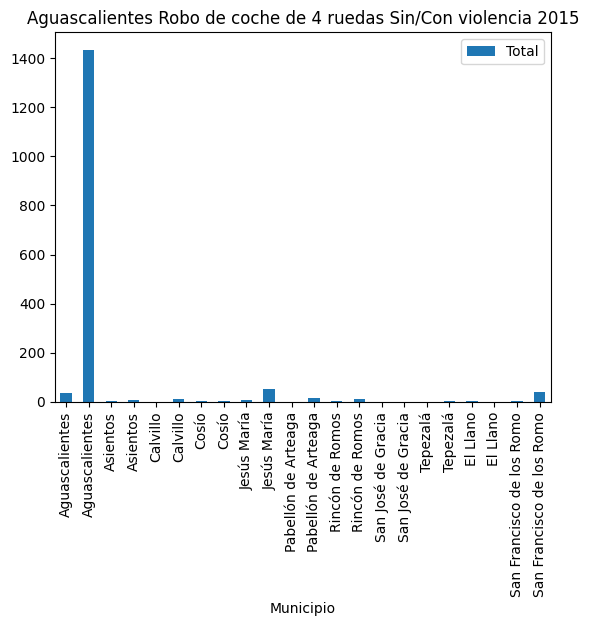

In [16]:
Aguas.plot(kind='bar',x='Municipio',y='Total', title='Aguascalientes Robo de coche de 4 ruedas Sin/Con violencia 2015')

In [17]:
# Calculamos el total de robo de autos en aguascalientes
total_Aguas_2015 = Aguas['Total'].sum()
total_Aguas_2015

1641

In [18]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2015 = cocher15.groupby('Entidad')['Total'].sum().reset_index()
totalrc2015.head()

Entidad  Total
0       Aguascalientes   1641
1      Baja California  14138
2  Baja California Sur   1157
3             Campeche     73
4              Chiapas   1488

In [19]:
totalrc2015.shape

(32, 2)

<Axes: title={'center': 'Total Robo de coche de 4 ruedas Sin/Con violencia 2015'}, xlabel='Entidad'>

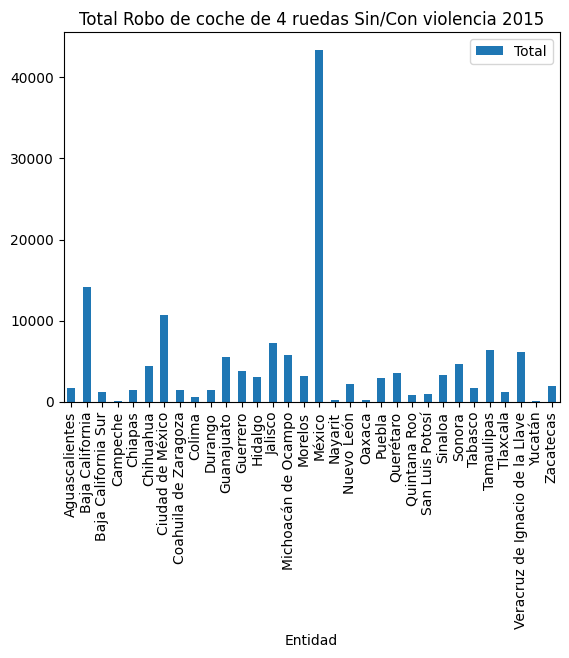

In [20]:
totalrc2015.plot(kind='bar',x='Entidad',y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2015')

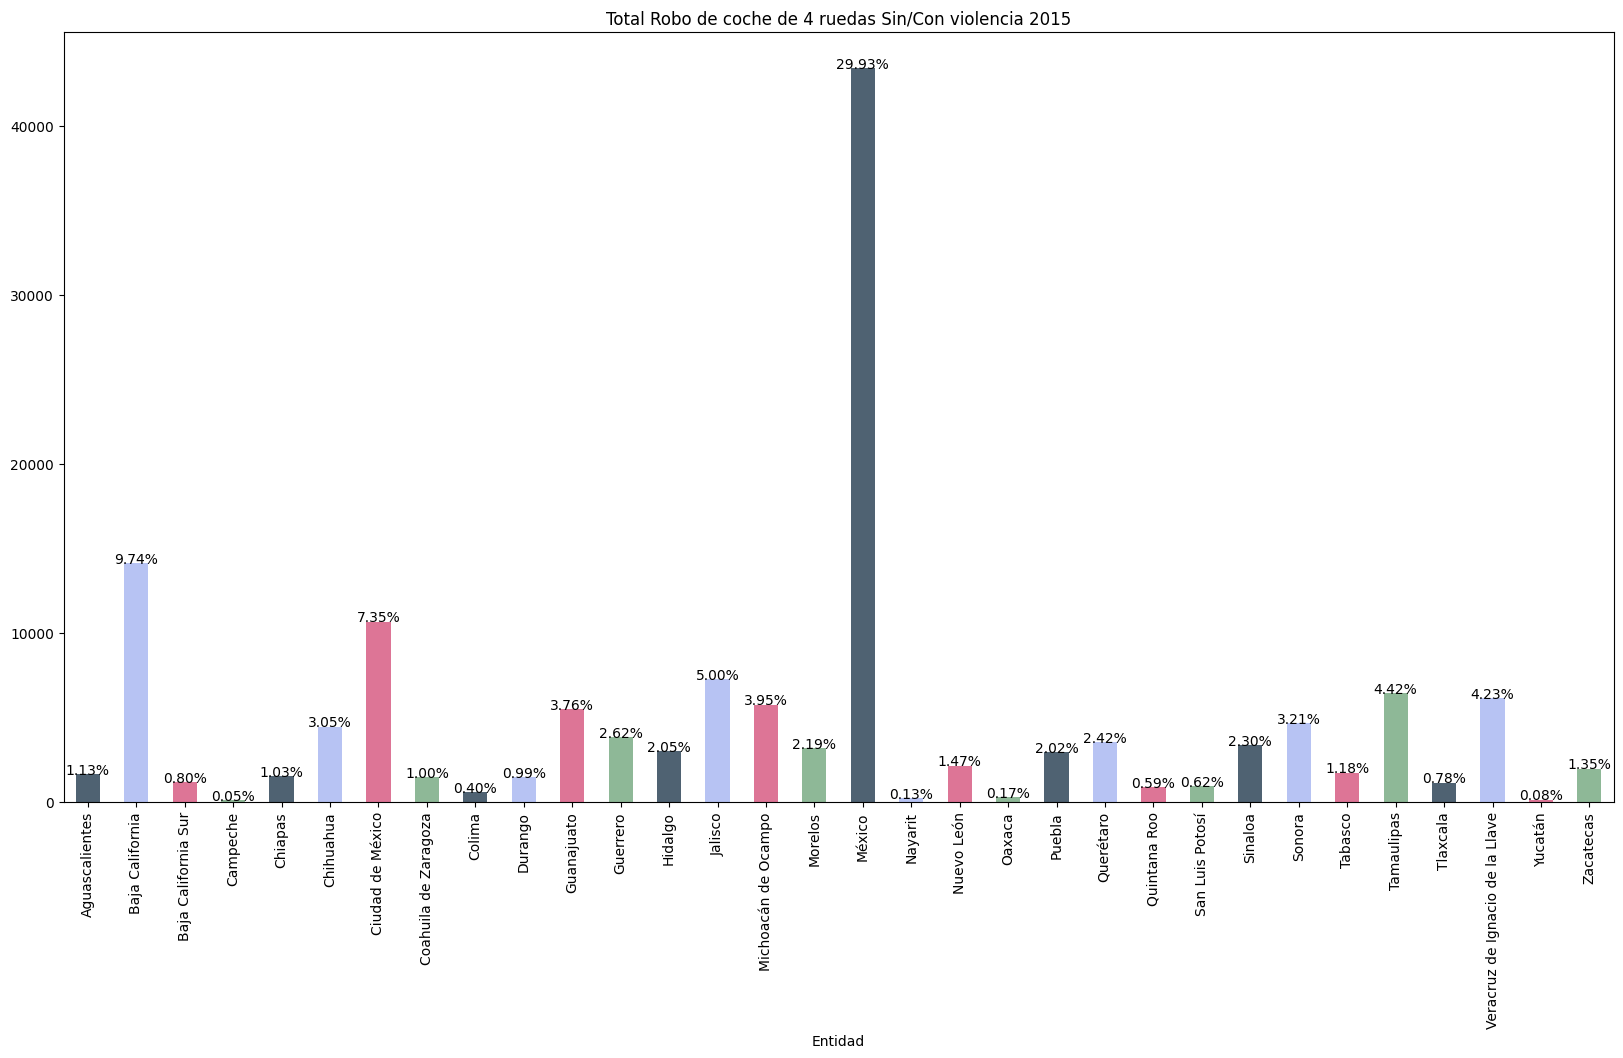

In [21]:
# Calcular los porcentajes
total = sum(totalrc2015['Total'])
totalrc2015['Porcentaje'] = 100 * totalrc2015['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2015.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2015', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2015['Porcentaje']):
    ax.text(i, totalrc2015['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

In [22]:
totalrc2015.loc[totalrc2015['Entidad'] == 'México']

Entidad  Total  Porcentaje
16  México  43431   29.928883

# Datos 2016

In [23]:
df2016 = pd.read_excel('/content/gdrive/MyDrive/ASE/2016.xlsx')
df2016.info()
df2016.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189238 entries, 0 to 189237
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     189238 non-null  int64 
 1   Clave_Ent               189238 non-null  int64 
 2   Entidad                 189238 non-null  object
 3   Cve. Municipio          189238 non-null  int64 
 4   Municipio               189238 non-null  object
 5   Bien jurídico afectado  189238 non-null  object
 6   Tipo de delito          189238 non-null  object
 7   Subtipo de delito       189238 non-null  object
 8   Modalidad               189238 non-null  object
 9   Enero                   189238 non-null  int64 
 10  Febrero                 189238 non-null  int64 
 11  Marzo                   189238 non-null  int64 
 12  Abril                   189238 non-null  int64 
 13  Mayo                    189238 non-null  int64 
 14  Junio                   189238 non-n

(189238, 21)

In [24]:
df2016b = df2016[(df2016['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2016['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2016b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2016          1  Aguascalientes            1001  Aguascalientes   
42   2016          1  Aguascalientes            1001  Aguascalientes   
139  2016          1  Aguascalientes            1002        Asientos   
140  2016          1  Aguascalientes            1002        Asientos   
237  2016          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      1  ...      4      3     1   
42   Robo de coche de 4 ruedas Sin violencia    132  ...    180    191   178   
139  Robo de coche de 4 ruedas Con violencia      1  ...      0      0     0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      1      1     1   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       2      4       3           2        3          5          5  
42     158    202     236         188      264        203        254  
139      0      2       1           1        0          0          0  
140      0      0       0           2        2          1          1  
237      0      1       0           0        0          0          0  

[5 rows x 21 columns]

In [25]:
print(df2016.shape)
print(df2016b.shape)

(189238, 21)
(3862, 21)


In [26]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher16 = df2016b.copy()
cocher16.loc[:,'Total'] = df2016b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher16.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2016          1  Aguascalientes            1001  Aguascalientes   
42   2016          1  Aguascalientes            1001  Aguascalientes   
139  2016          1  Aguascalientes            1002        Asientos   
140  2016          1  Aguascalientes            1002        Asientos   
237  2016          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      1  ...      3     1      2   
42   Robo de coche de 4 ruedas Sin violencia    132  ...    191   178    158   
139  Robo de coche de 4 ruedas Con violencia      1  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      1     1      0   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       4       3           2        3          5          5     38  
42     202     236         188      264        203        254   2336  
139      2       1           1        0          0          0      5  
140      0       0           2        2          1          1     11  
237      1       0           0        0          0          0      1  

[5 rows x 22 columns]

In [27]:
cocher16.shape

(3862, 22)

In [28]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2016 = cocher16.groupby('Entidad')['Total'].sum().reset_index()
totalrc2016.head()

Entidad  Total
0       Aguascalientes   2601
1      Baja California  16628
2  Baja California Sur   1746
3             Campeche    196
4              Chiapas   1813

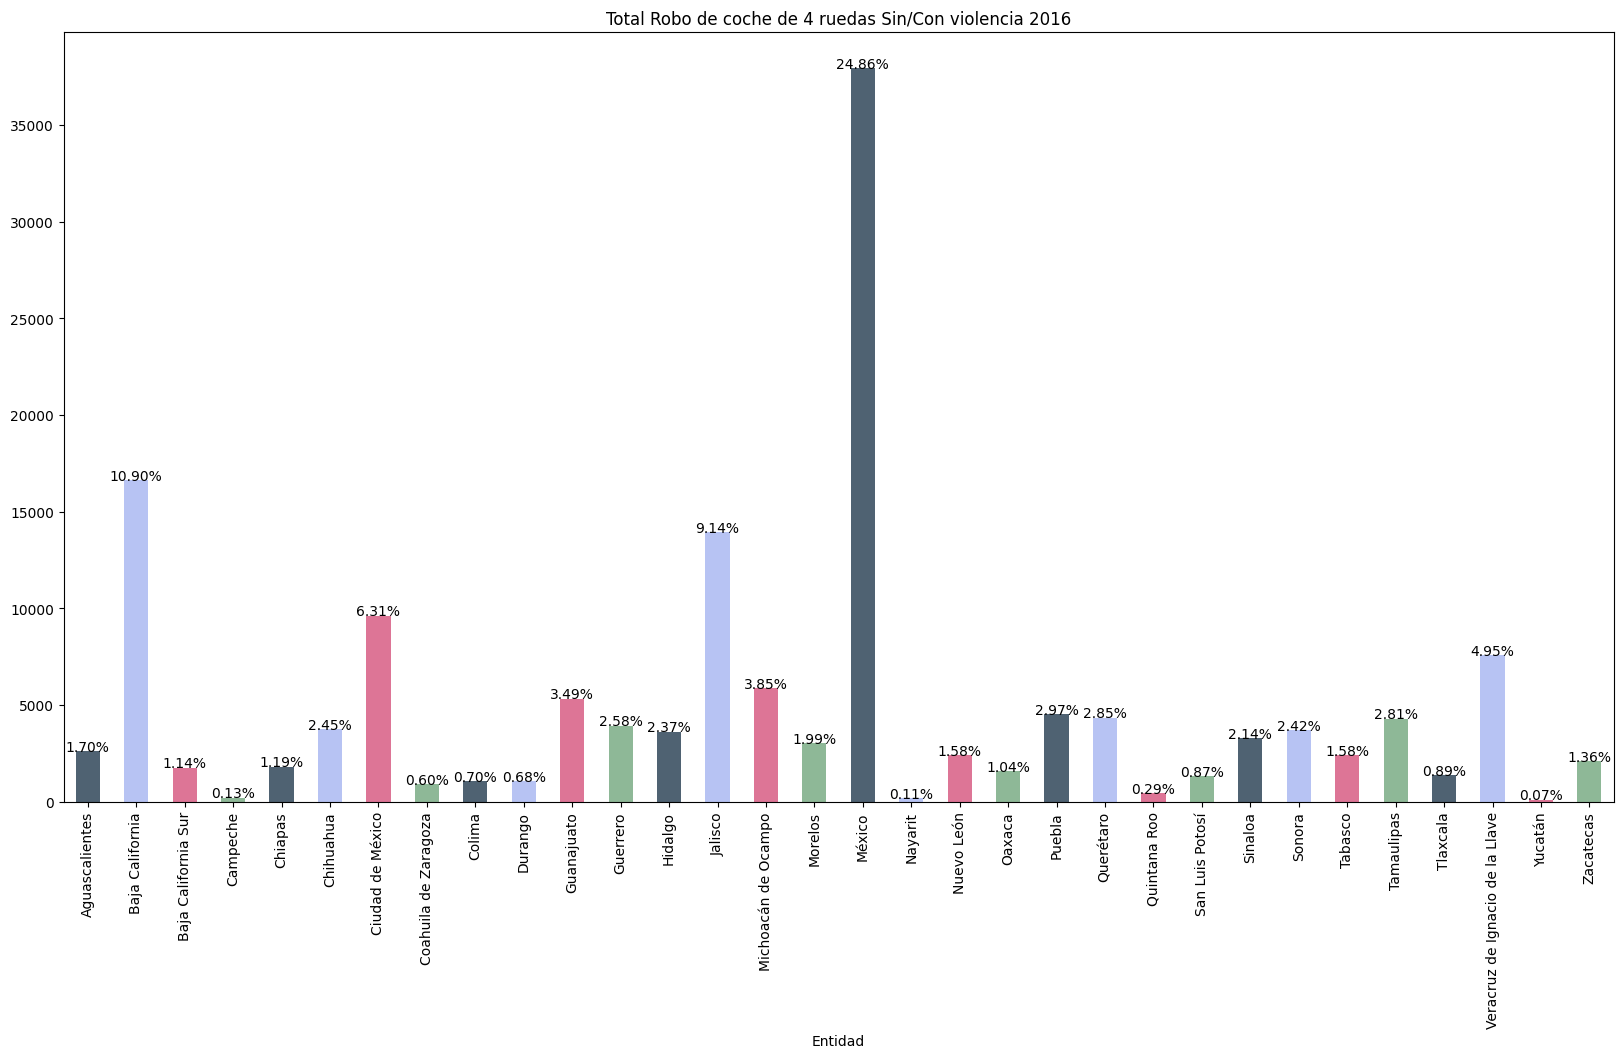

In [29]:
# Calcular los porcentajes
total = sum(totalrc2016['Total'])
totalrc2016['Porcentaje'] = 100 * totalrc2016['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2016.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2016', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2016['Porcentaje']):
    ax.text(i, totalrc2016['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

#Datos 2017

In [30]:
df2017 = pd.read_excel('/content/gdrive/MyDrive/ASE/2017.xlsx')
df2017.info()
df2017.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241668 entries, 0 to 241667
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     241668 non-null  int64 
 1   Clave_Ent               241668 non-null  int64 
 2   Entidad                 241668 non-null  object
 3   Cve. Municipio          241668 non-null  int64 
 4   Municipio               241668 non-null  object
 5   Bien jurídico afectado  241668 non-null  object
 6   Tipo de delito          241668 non-null  object
 7   Subtipo de delito       241668 non-null  object
 8   Modalidad               241668 non-null  object
 9   Enero                   241668 non-null  int64 
 10  Febrero                 241668 non-null  int64 
 11  Marzo                   241668 non-null  int64 
 12  Abril                   241668 non-null  int64 
 13  Mayo                    241668 non-null  int64 
 14  Junio                   241668 non-n

(241668, 21)

In [31]:
df2017.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2017          1  Aguascalientes            1001  Aguascalientes   
1  2017          1  Aguascalientes            1001  Aguascalientes   
2  2017          1  Aguascalientes            1001  Aguascalientes   
3  2017          1  Aguascalientes            1001  Aguascalientes   
4  2017          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      0  ...      0      2     3      3      0       3   
1    Con arma blanca      1  ...      0      1     0      2      0       1   
2  Con otro elemento      0  ...      2      1     4      4      2       1   
3    No especificado      0  ...      0      0     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     0      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           3        3          3          2  
1           0        2          0          0  
2           3        2          1          1  
3           0        0          0          0  
4           0        0          0          0  

[5 rows x 21 columns]

In [32]:
df2017b = df2017[(df2017['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2017['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2017b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2017          1  Aguascalientes            1001  Aguascalientes   
42   2017          1  Aguascalientes            1001  Aguascalientes   
139  2017          1  Aguascalientes            1002        Asientos   
140  2017          1  Aguascalientes            1002        Asientos   
237  2017          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      2  ...      4      5     2   
42   Robo de coche de 4 ruedas Sin violencia    217  ...    183    183   200   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      2      2     0   
237  Robo de coche de 4 ruedas Con violencia      1  ...      0      0     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       5      6       4           4        4          2          5  
42     182    181     232         218      230        210        181  
139      0      0       0           1        0          0          0  
140      0      1       2           0        0          0          0  
237      0      1       1           1        0          0          0  

[5 rows x 21 columns]

In [33]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher17 = df2017b.copy()
cocher17.loc[:,'Total'] = df2017b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher17.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2017          1  Aguascalientes            1001  Aguascalientes   
42   2017          1  Aguascalientes            1001  Aguascalientes   
139  2017          1  Aguascalientes            1002        Asientos   
140  2017          1  Aguascalientes            1002        Asientos   
237  2017          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      2  ...      5     2      5   
42   Robo de coche de 4 ruedas Sin violencia    217  ...    183   200    182   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      2     0      0   
237  Robo de coche de 4 ruedas Con violencia      1  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       6       4           4        4          2          5     46  
42     181     232         218      230        210        181   2389  
139      0       0           1        0          0          0      1  
140      1       2           0        0          0          0     10  
237      1       1           1        0          0          0      4  

[5 rows x 22 columns]

In [34]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2017 = cocher17.groupby('Entidad')['Total'].sum().reset_index()
totalrc2017.head()

Entidad  Total
0       Aguascalientes   2838
1      Baja California  19732
2  Baja California Sur   1412
3             Campeche    159
4              Chiapas   1832

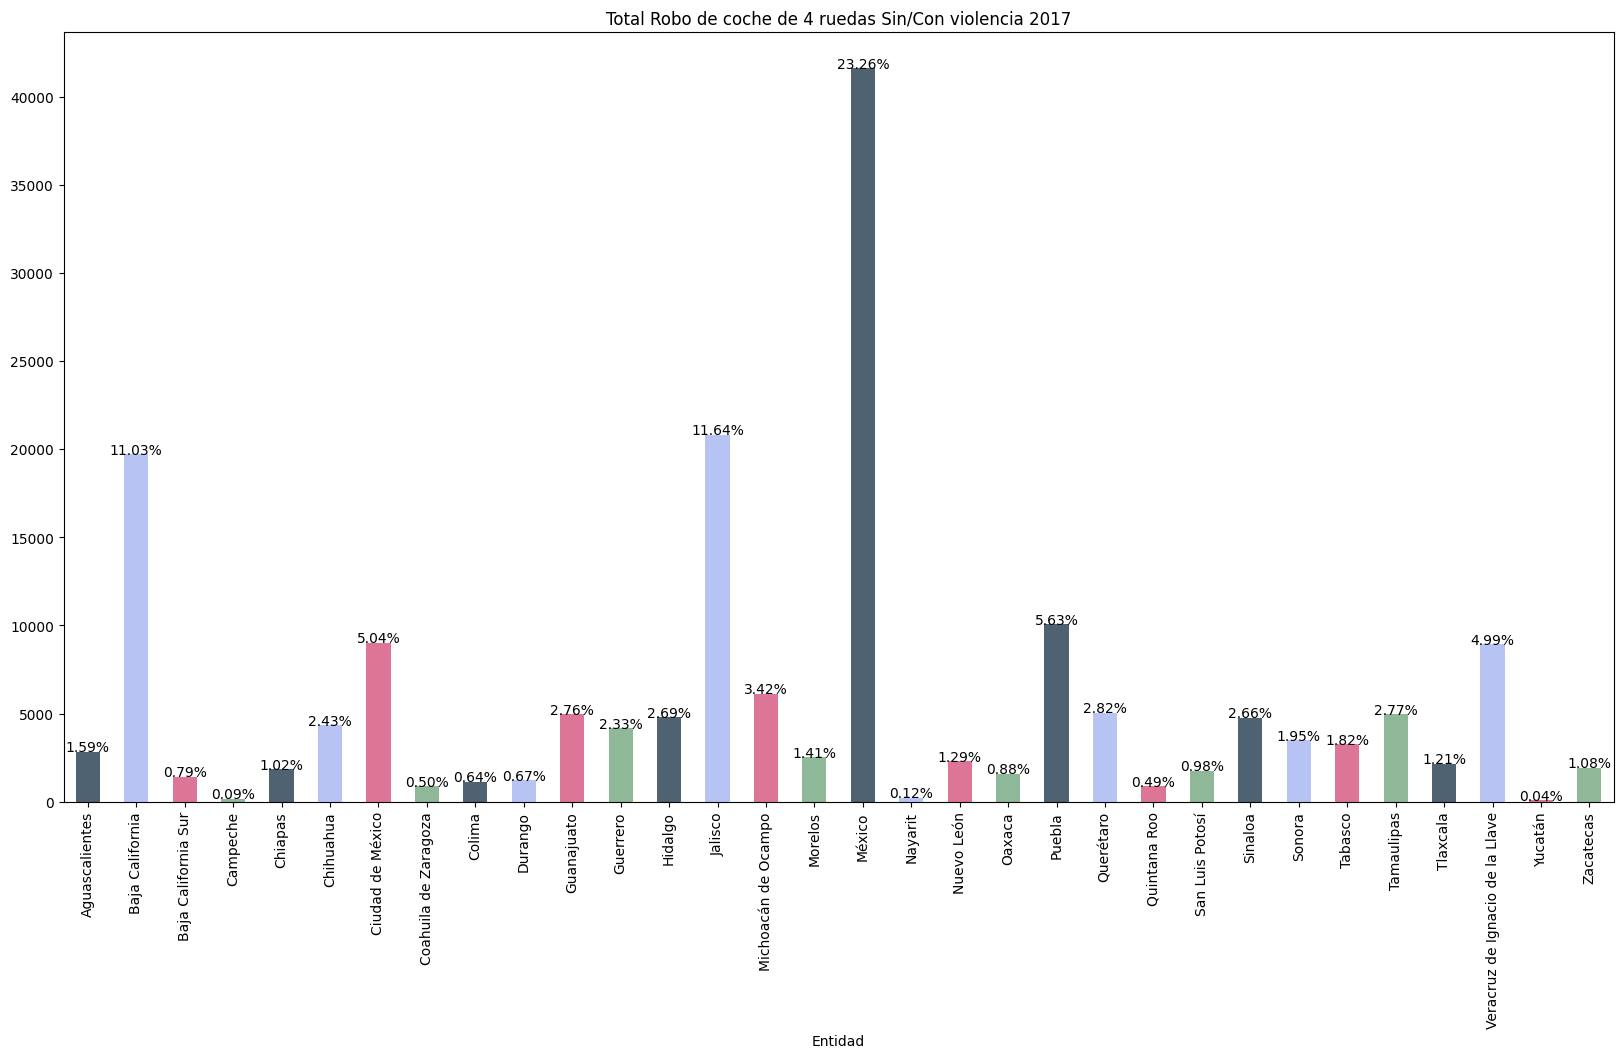

In [35]:
# Calcular los porcentajes
total = sum(totalrc2017['Total'])
totalrc2017['Porcentaje'] = 100 * totalrc2017['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2017.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2017', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2017['Porcentaje']):
    ax.text(i, totalrc2017['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2018

In [36]:
df2018 = pd.read_excel('/content/gdrive/MyDrive/ASE/2018.xlsx')
df2018.info()
df2018.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [37]:
df2018.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2018          1  Aguascalientes            1001  Aguascalientes   
1  2018          1  Aguascalientes            1001  Aguascalientes   
2  2018          1  Aguascalientes            1001  Aguascalientes   
3  2018          1  Aguascalientes            1001  Aguascalientes   
4  2018          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      4  ...      3      3     3      1      1       2   
1    Con arma blanca      1  ...      1      0     2      0      0       0   
2  Con otro elemento      2  ...      0      2     2      3      0       1   
3    No especificado      0  ...      0      1     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     0      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           4        2          4          3  
1           1        0          1          0  
2           0        1          0          0  
3           0        0          0          0  
4           0        0          0          1  

[5 rows x 21 columns]

In [38]:
df2018b = df2018[(df2018['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2018['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2018b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2018          1  Aguascalientes            1001  Aguascalientes   
42   2018          1  Aguascalientes            1001  Aguascalientes   
139  2018          1  Aguascalientes            1002        Asientos   
140  2018          1  Aguascalientes            1002        Asientos   
237  2018          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      3  ...      2      5     6   
42   Robo de coche de 4 ruedas Sin violencia    198  ...    188    222   189   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      2      1     0   
237  Robo de coche de 4 ruedas Con violencia      1  ...      1      0     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       6      5       8           3        9          3          4  
42     169    187     169         133      182        138        132  
139      0      0       0           1        0          0          0  
140      0      0       0           1        1          1          0  
237      1      0       0           0        0          0          0  

[5 rows x 21 columns]

In [39]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher18 = df2018b.copy()
cocher18.loc[:,'Total'] = df2018b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher18.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2018          1  Aguascalientes            1001  Aguascalientes   
42   2018          1  Aguascalientes            1001  Aguascalientes   
139  2018          1  Aguascalientes            1002        Asientos   
140  2018          1  Aguascalientes            1002        Asientos   
237  2018          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      3  ...      5     6      6   
42   Robo de coche de 4 ruedas Sin violencia    198  ...    222   189    169   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      1     0      0   
237  Robo de coche de 4 ruedas Con violencia      1  ...      0     0      1   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       5       8           3        9          3          4     62  
42     187     169         133      182        138        132   2070  
139      0       0           1        0          0          0      1  
140      0       0           1        1          1          0      7  
237      0       0           0        0          0          0      3  

[5 rows x 22 columns]

In [40]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2018 = cocher18.groupby('Entidad')['Total'].sum().reset_index()
totalrc2018.head()

Entidad  Total
0       Aguascalientes   2523
1      Baja California  15425
2  Baja California Sur   1233
3             Campeche    120
4              Chiapas   1134

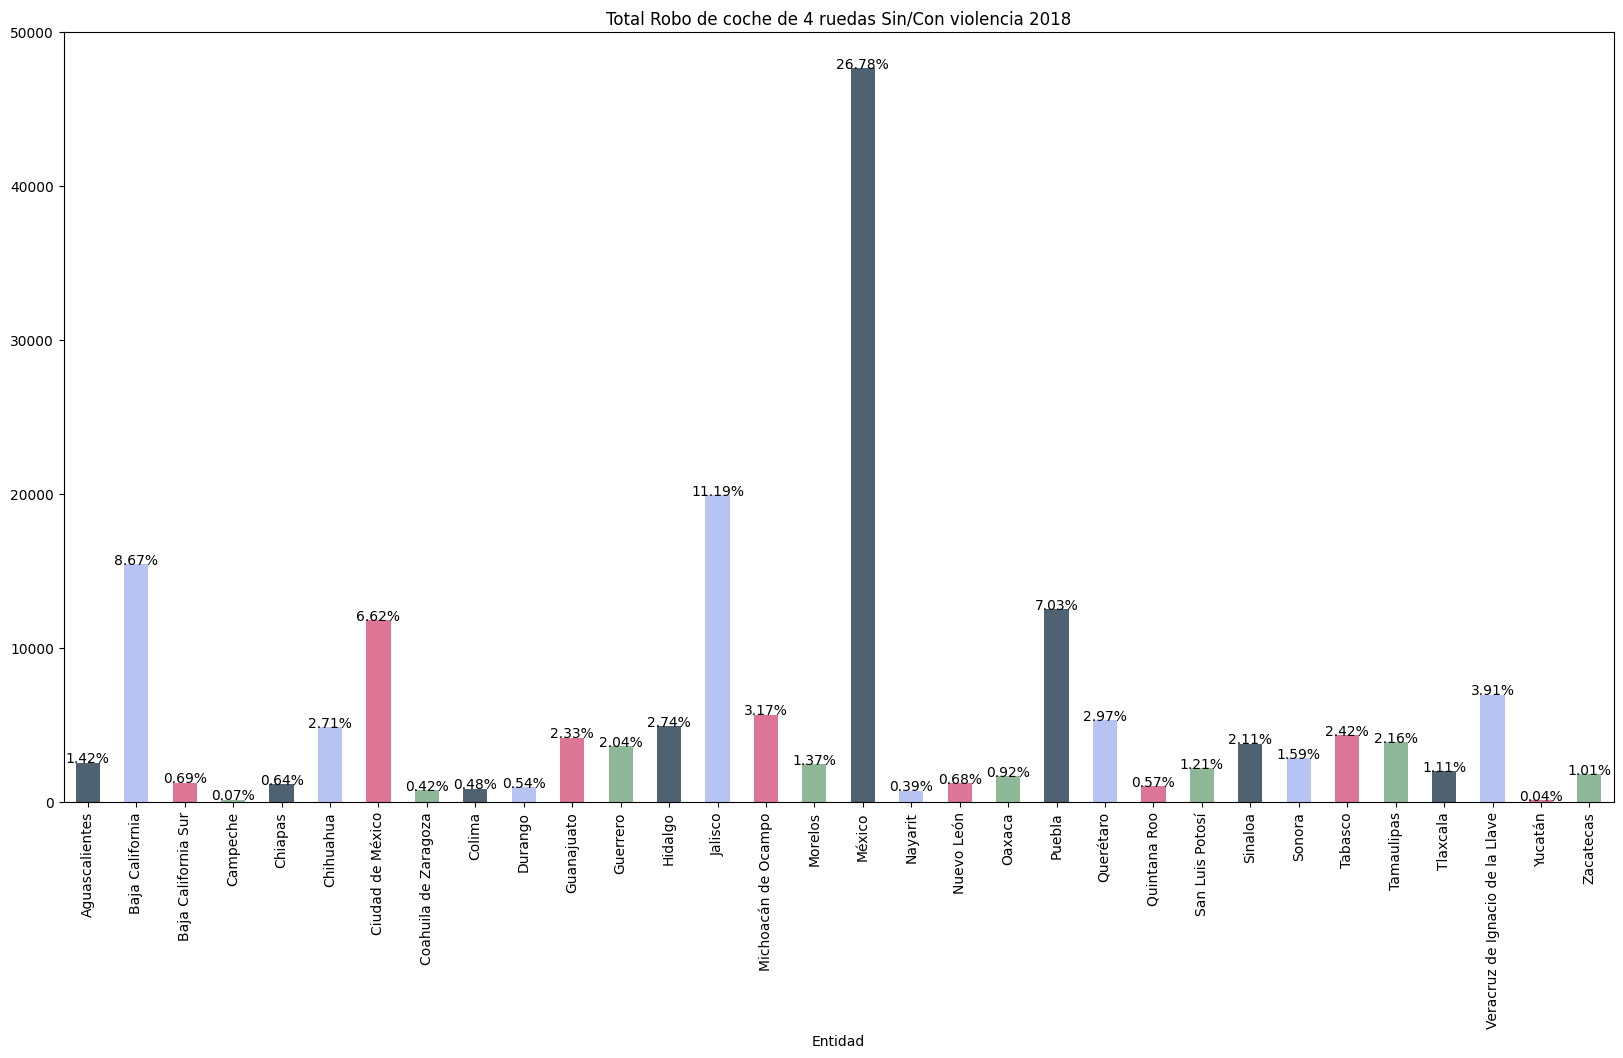

In [41]:
# Calcular los porcentajes
total = sum(totalrc2018['Total'])
totalrc2018['Porcentaje'] = 100 * totalrc2018['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2018.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2018', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2018['Porcentaje']):
    ax.text(i, totalrc2018['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2019

In [42]:
df2019 = pd.read_excel('/content/gdrive/MyDrive/ASE/2019.xlsx')
df2019.info()
df2019.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [43]:
df2019.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2019          1  Aguascalientes            1001  Aguascalientes   
1  2019          1  Aguascalientes            1001  Aguascalientes   
2  2019          1  Aguascalientes            1001  Aguascalientes   
3  2019          1  Aguascalientes            1001  Aguascalientes   
4  2019          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      5  ...      2      2     2      4      2       0   
1    Con arma blanca      1  ...      0      2     2      0      1       0   
2  Con otro elemento      1  ...      2      2     1      1      0       0   
3    No especificado      0  ...      0      0     2      0      0       0   
4  Con arma de fuego      0  ...      0      0     0      0      0       1   

   Septiembre  Octubre  Noviembre  Diciembre  
0           7        6          2          1  
1           0        0          2          2  
2           0        0          1          1  
3           0        0          0          0  
4           0        0          0          0  

[5 rows x 21 columns]

In [44]:
df2019b = df2019[(df2019['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2019['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2019b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2019          1  Aguascalientes            1001  Aguascalientes   
42   2019          1  Aguascalientes            1001  Aguascalientes   
139  2019          1  Aguascalientes            1002        Asientos   
140  2019          1  Aguascalientes            1002        Asientos   
237  2019          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      7     11     2   
42   Robo de coche de 4 ruedas Sin violencia    146  ...    114    100   120   
139  Robo de coche de 4 ruedas Con violencia      0  ...      1      2     0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      0      2     2   
237  Robo de coche de 4 ruedas Con violencia      1  ...      0      0     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       3      8       5           3        3          3          3  
42      94     68      64          82       87        142        141  
139      0      1       0           0        0          1          0  
140      1      0       0           0        1          0          2  
237      0      0       0           0        0          0          0  

[5 rows x 21 columns]

In [45]:
print(df2019b.shape)

(4942, 21)


In [46]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher19 = df2019b.copy()
cocher19.loc[:,'Total'] = df2019b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher19.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2019          1  Aguascalientes            1001  Aguascalientes   
42   2019          1  Aguascalientes            1001  Aguascalientes   
139  2019          1  Aguascalientes            1002        Asientos   
140  2019          1  Aguascalientes            1002        Asientos   
237  2019          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      4  ...     11     2      3   
42   Robo de coche de 4 ruedas Sin violencia    146  ...    100   120     94   
139  Robo de coche de 4 ruedas Con violencia      0  ...      2     0      0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      2     2      1   
237  Robo de coche de 4 ruedas Con violencia      1  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       8       5           3        3          3          3     54  
42      68      64          82       87        142        141   1277  
139      1       0           0        0          1          0      6  
140      0       0           0        1          0          2      9  
237      0       0           0        0          0          0      1  

[5 rows x 22 columns]

In [47]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2019 = cocher19.groupby('Entidad')['Total'].sum().reset_index()
totalrc2019.head()

Entidad  Total
0       Aguascalientes   1642
1      Baja California  13412
2  Baja California Sur    761
3             Campeche    153
4              Chiapas    905

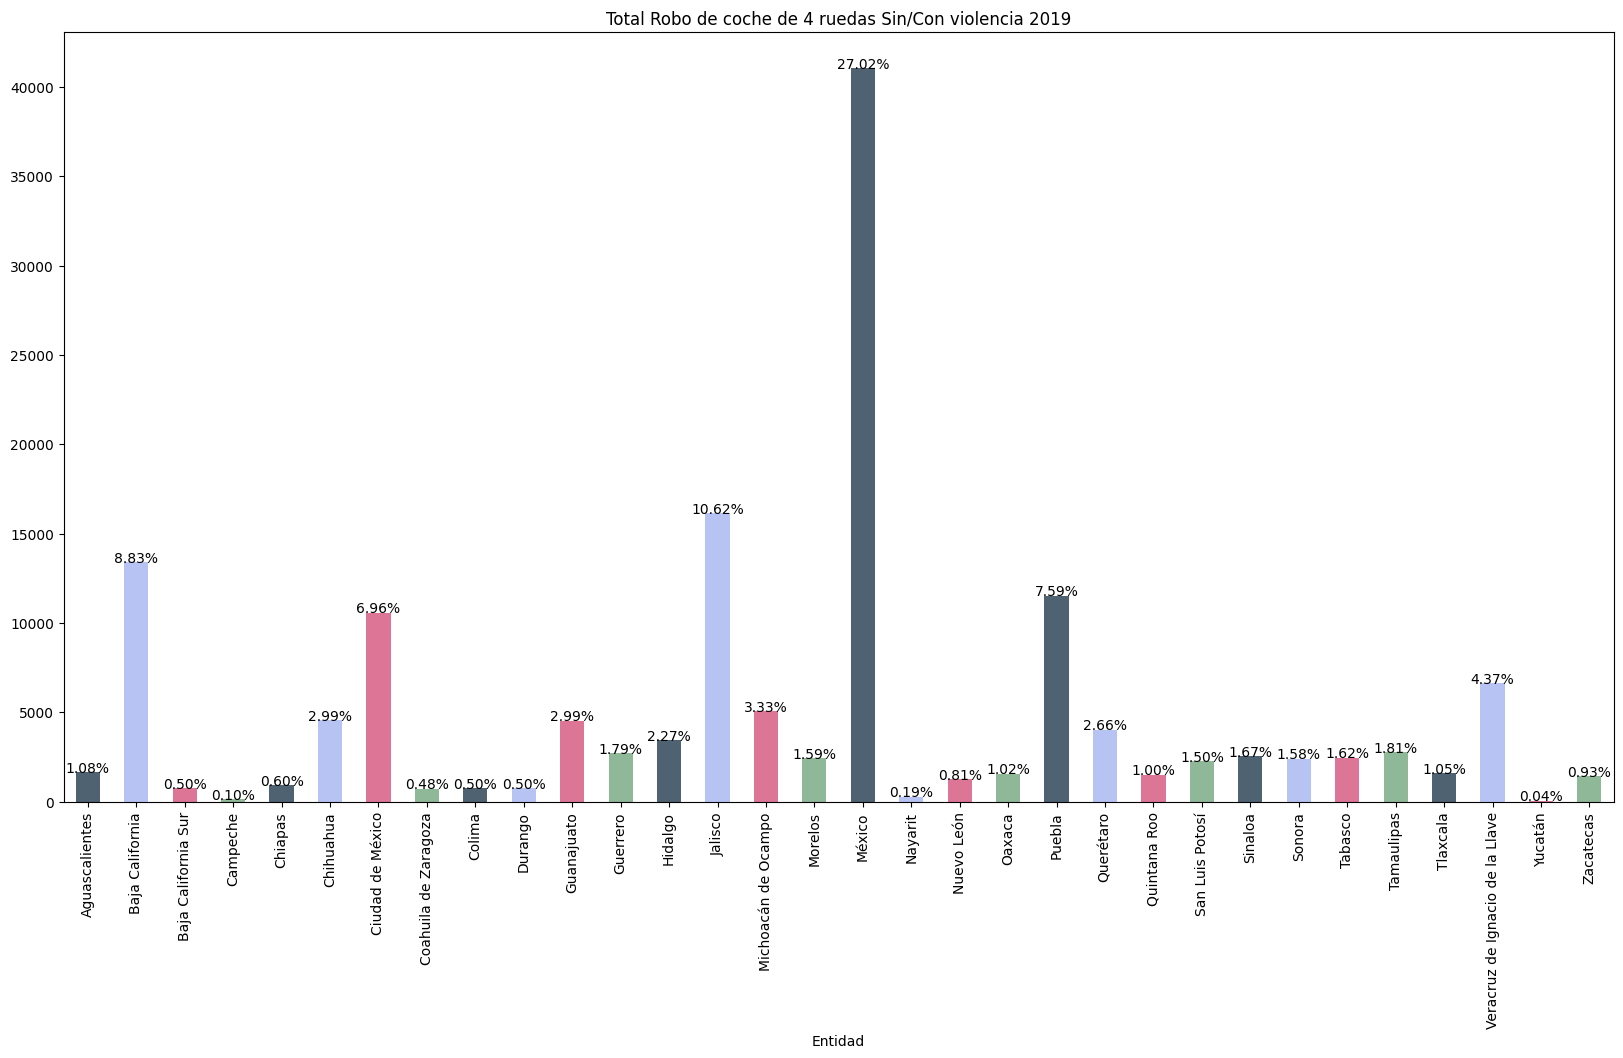

In [48]:
# Calcular los porcentajes
total = sum(totalrc2019['Total'])
totalrc2019['Porcentaje'] = 100 * totalrc2019['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2019.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2019', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2019['Porcentaje']):
    ax.text(i, totalrc2019['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2020

In [49]:
df2020 = pd.read_excel('/content/gdrive/MyDrive/ASE/2020.xlsx')
df2020.info()
df2020.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242158 entries, 0 to 242157
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242158 non-null  int64 
 1   Clave_Ent               242158 non-null  int64 
 2   Entidad                 242158 non-null  object
 3   Cve. Municipio          242158 non-null  int64 
 4   Municipio               242158 non-null  object
 5   Bien jurídico afectado  242158 non-null  object
 6   Tipo de delito          242158 non-null  object
 7   Subtipo de delito       242158 non-null  object
 8   Modalidad               242158 non-null  object
 9   Enero                   242158 non-null  int64 
 10  Febrero                 242158 non-null  int64 
 11  Marzo                   242158 non-null  int64 
 12  Abril                   242158 non-null  int64 
 13  Mayo                    242158 non-null  int64 
 14  Junio                   242158 non-n

(242158, 21)

In [50]:
df2020.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2020          1  Aguascalientes            1001  Aguascalientes   
1  2020          1  Aguascalientes            1001  Aguascalientes   
2  2020          1  Aguascalientes            1001  Aguascalientes   
3  2020          1  Aguascalientes            1001  Aguascalientes   
4  2020          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      2  ...      3      3     2      3      5       2   
1    Con arma blanca      0  ...      2      0     2      0      1       1   
2  Con otro elemento      1  ...      1      0     2      2      1       2   
3    No especificado      0  ...      0      0     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     0      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           1        1          1          1  
1           0        0          1          0  
2           0        2          0          0  
3           0        0          0          0  
4           0        0          0          0  

[5 rows x 21 columns]

In [51]:
df2020b = df2020[(df2020['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2020['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2020b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2020          1  Aguascalientes            1001  Aguascalientes   
42   2020          1  Aguascalientes            1001  Aguascalientes   
139  2020          1  Aguascalientes            1002        Asientos   
140  2020          1  Aguascalientes            1002        Asientos   
237  2020          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      4      0     4   
42   Robo de coche de 4 ruedas Sin violencia     98  ...    113     80    74   
139  Robo de coche de 4 ruedas Con violencia      1  ...      0      3     0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      1      0     1   
237  Robo de coche de 4 ruedas Con violencia      1  ...      0      0     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       3      2       5           2        4          4          2  
42      62     66      69          64       59         61         65  
139      0      0       0           0        0          0          0  
140      0      0       0           0        1          1          0  
237      0      0       0           0        1          0          0  

[5 rows x 21 columns]

In [52]:
print(df2020b.shape)

(4942, 21)


In [53]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher20 = df2020b.copy()
cocher20.loc[:,'Total'] = df2020b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher20.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2020          1  Aguascalientes            1001  Aguascalientes   
42   2020          1  Aguascalientes            1001  Aguascalientes   
139  2020          1  Aguascalientes            1002        Asientos   
140  2020          1  Aguascalientes            1002        Asientos   
237  2020          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      0     4      3   
42   Robo de coche de 4 ruedas Sin violencia     98  ...     80    74     62   
139  Robo de coche de 4 ruedas Con violencia      1  ...      3     0      0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0     1      0   
237  Robo de coche de 4 ruedas Con violencia      1  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       2       5           2        4          4          2     39  
42      66      69          64       59         61         65    906  
139      0       0           0        0          0          0      4  
140      0       0           0        1          1          0      4  
237      0       0           0        1          0          0      2  

[5 rows x 22 columns]

In [54]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2020 = cocher20.groupby('Entidad')['Total'].sum().reset_index()
totalrc2020.head()

Entidad  Total
0       Aguascalientes   1106
1      Baja California   9803
2  Baja California Sur    594
3             Campeche    100
4              Chiapas    872

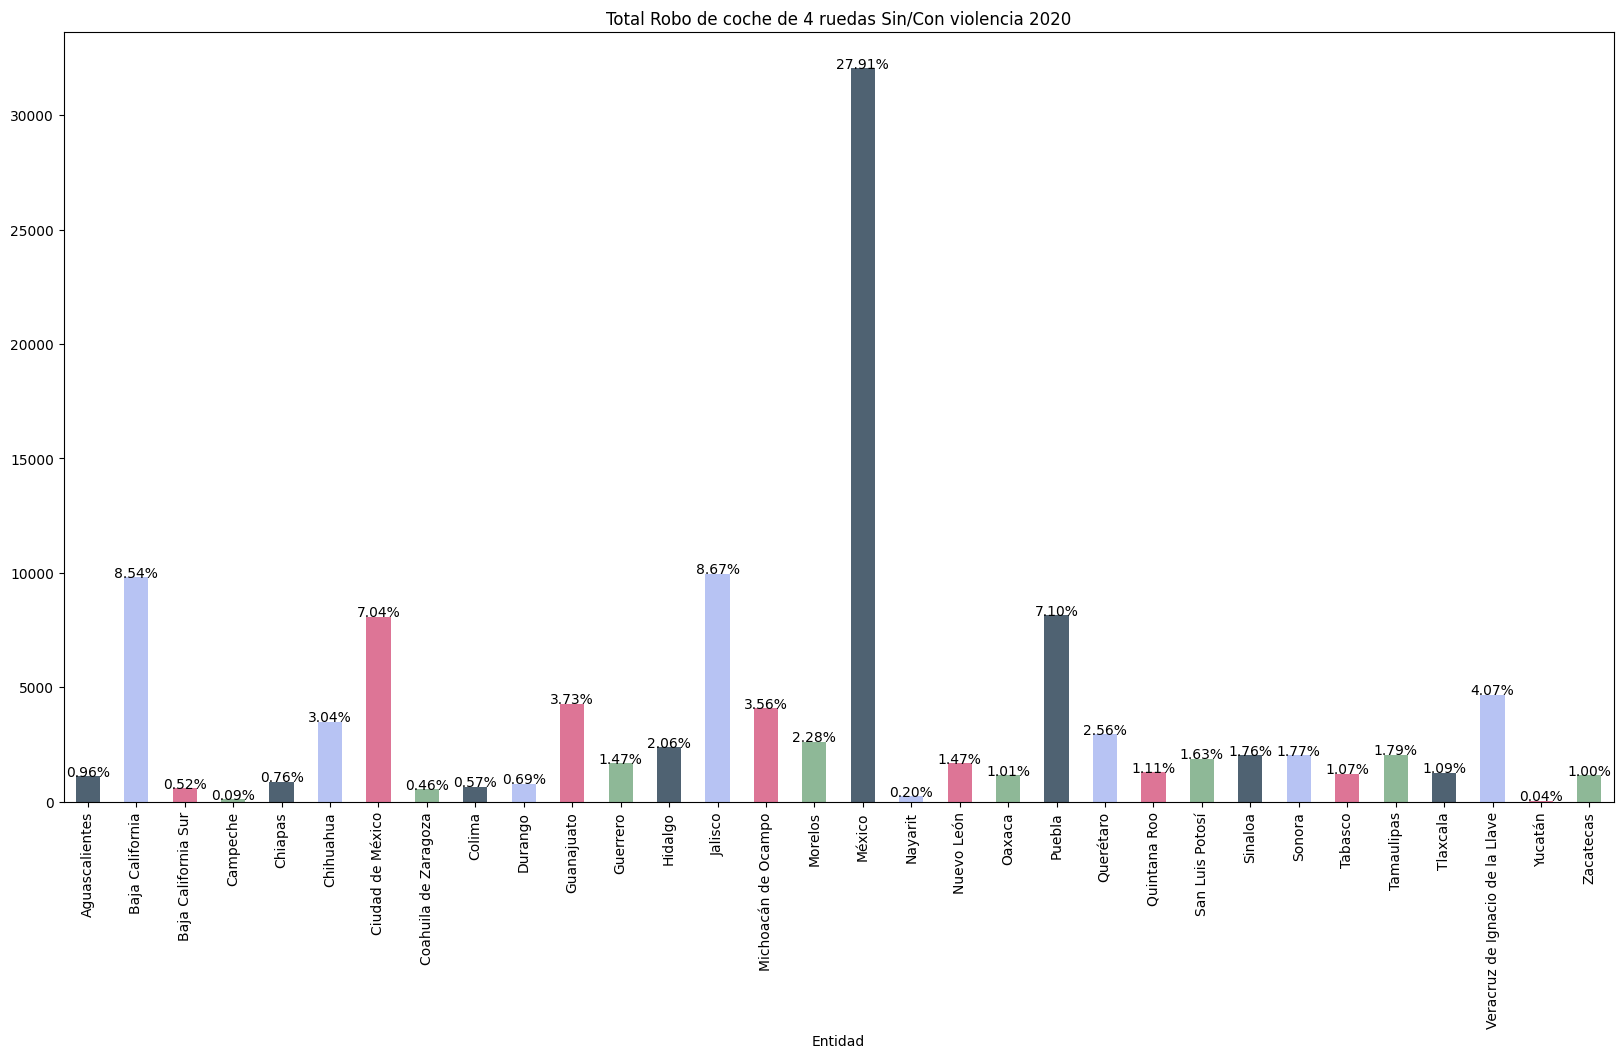

In [55]:
# Calcular los porcentajes
total = sum(totalrc2020['Total'])
totalrc2020['Porcentaje'] = 100 * totalrc2020['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2020.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2020', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2020['Porcentaje']):
    ax.text(i, totalrc2020['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2021

In [56]:
df2021 = pd.read_excel('/content/gdrive/MyDrive/ASE/2021.xlsx')
df2021.info()
df2021.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242844 entries, 0 to 242843
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242844 non-null  int64 
 1   Clave_Ent               242844 non-null  int64 
 2   Entidad                 242844 non-null  object
 3   Cve. Municipio          242844 non-null  int64 
 4   Municipio               242844 non-null  object
 5   Bien jurídico afectado  242844 non-null  object
 6   Tipo de delito          242844 non-null  object
 7   Subtipo de delito       242844 non-null  object
 8   Modalidad               242844 non-null  object
 9   Enero                   242844 non-null  int64 
 10  Febrero                 242844 non-null  int64 
 11  Marzo                   242844 non-null  int64 
 12  Abril                   242844 non-null  int64 
 13  Mayo                    242844 non-null  int64 
 14  Junio                   242844 non-n

(242844, 21)

In [57]:
df2021.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2021          1  Aguascalientes            1001  Aguascalientes   
1  2021          1  Aguascalientes            1001  Aguascalientes   
2  2021          1  Aguascalientes            1001  Aguascalientes   
3  2021          1  Aguascalientes            1001  Aguascalientes   
4  2021          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      1  ...      2      3     1      1      1       2   
1    Con arma blanca      0  ...      0      0     0      2      2       1   
2  Con otro elemento      0  ...      1      0     2      1      1       2   
3    No especificado      0  ...      0      0     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     0      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           2        6          0          1  
1           1        1          0          3  
2           1        2          1          1  
3           0        0          0          0  
4           1        0          0          0  

[5 rows x 21 columns]

In [58]:
df2021b = df2021[(df2021['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2021['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2021b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2021          1  Aguascalientes            1001  Aguascalientes   
42   2021          1  Aguascalientes            1001  Aguascalientes   
139  2021          1  Aguascalientes            1002        Asientos   
140  2021          1  Aguascalientes            1002        Asientos   
237  2021          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      9  ...      2      2     6   
42   Robo de coche de 4 ruedas Sin violencia     58  ...     51     46    56   
139  Robo de coche de 4 ruedas Con violencia      1  ...      0      0     0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0      0     0   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0      1     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       1      5       3           2        3          1          5  
42      42     50      39          39       48         41         47  
139      0      0       1           0        1          2          0  
140      0      0       0           1        1          2          1  
237      0      0       0           2        1          0          1  

[5 rows x 21 columns]

In [59]:
print(df2021b.shape)

(4956, 21)


In [60]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher21 = df2021b.copy()
cocher21.loc[:,'Total'] = df2021b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher21.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2021          1  Aguascalientes            1001  Aguascalientes   
42   2021          1  Aguascalientes            1001  Aguascalientes   
139  2021          1  Aguascalientes            1002        Asientos   
140  2021          1  Aguascalientes            1002        Asientos   
237  2021          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      9  ...      2     6      1   
42   Robo de coche de 4 ruedas Sin violencia     58  ...     46    56     42   
139  Robo de coche de 4 ruedas Con violencia      1  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0      0   
237  Robo de coche de 4 ruedas Con violencia      0  ...      1     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       5       3           2        3          1          5     47  
42      50      39          39       48         41         47    574  
139      0       1           0        1          2          0      6  
140      0       0           1        1          2          1      6  
237      0       0           2        1          0          1      5  

[5 rows x 22 columns]

In [61]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2021 = cocher21.groupby('Entidad')['Total'].sum().reset_index()
totalrc2021.head()

Entidad  Total
0       Aguascalientes    778
1      Baja California  10875
2  Baja California Sur    402
3             Campeche     76
4              Chiapas    665

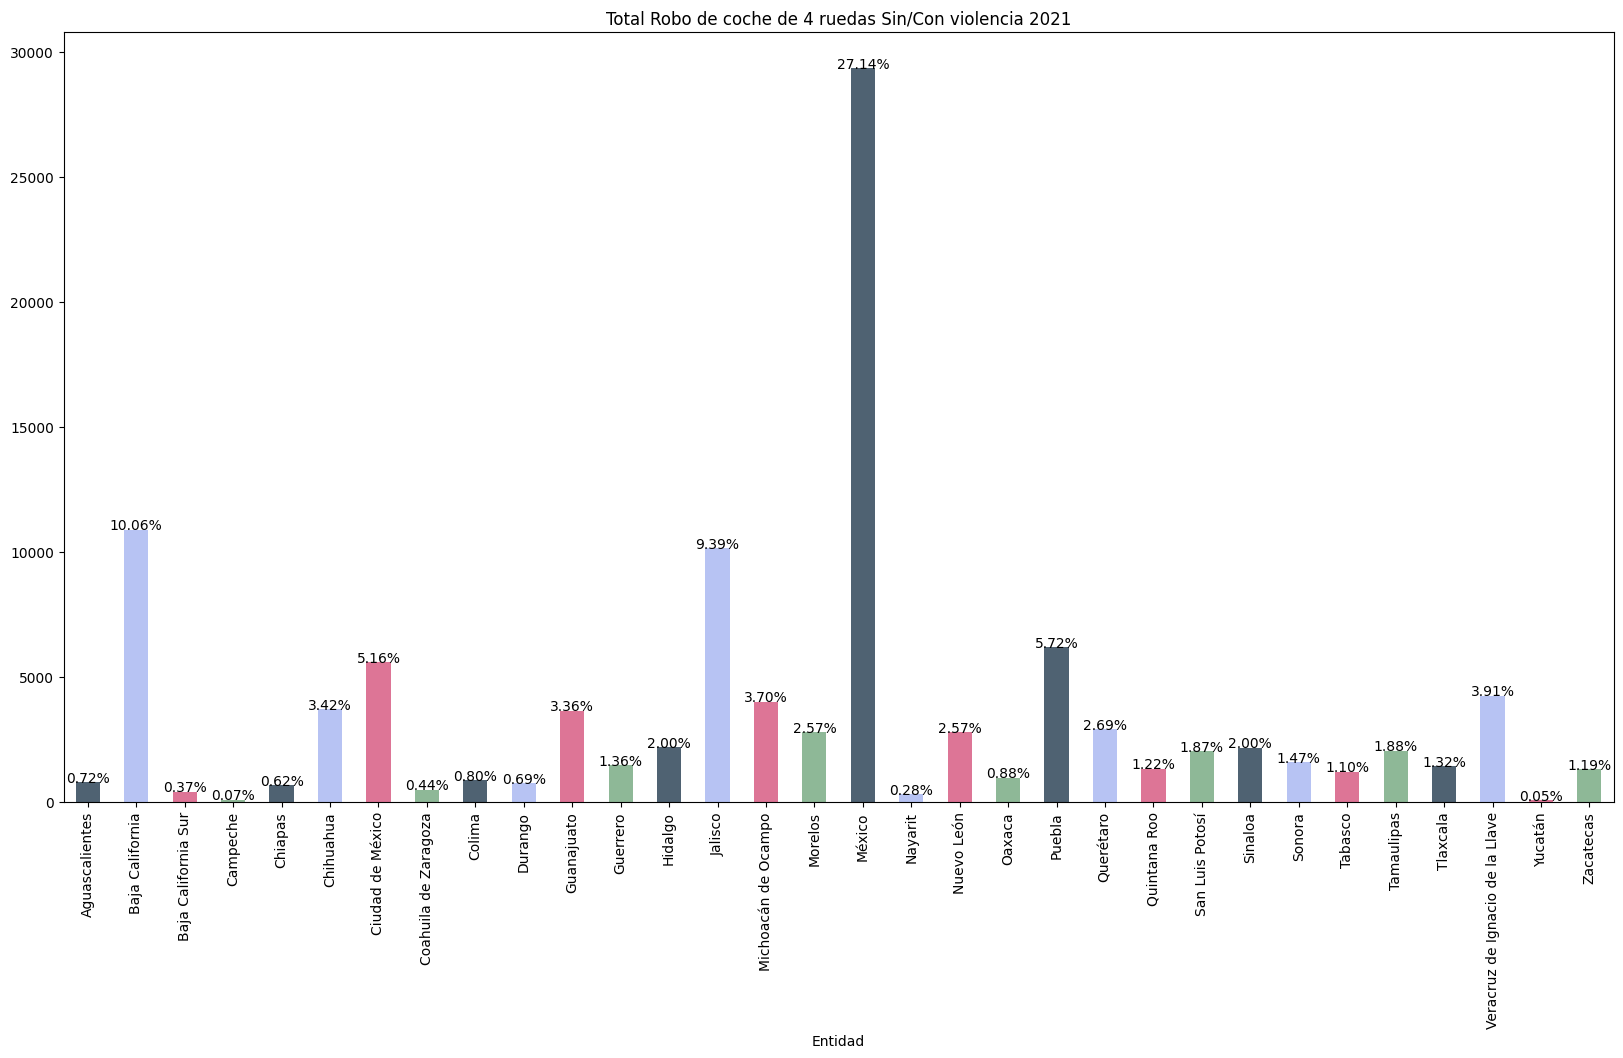

In [62]:
# Calcular los porcentajes
total = sum(totalrc2021['Total'])
totalrc2021['Porcentaje'] = 100 * totalrc2021['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2021.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2021', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2021['Porcentaje']):
    ax.text(i, totalrc2021['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Datos 2022

In [63]:
df2022 = pd.read_excel('/content/gdrive/MyDrive/ASE/2022.xlsx')
df2022.info()
df2022.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242942 entries, 0 to 242941
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Año                     242942 non-null  int64 
 1   Clave_Ent               242942 non-null  int64 
 2   Entidad                 242942 non-null  object
 3   Cve. Municipio          242942 non-null  int64 
 4   Municipio               242942 non-null  object
 5   Bien jurídico afectado  242942 non-null  object
 6   Tipo de delito          242942 non-null  object
 7   Subtipo de delito       242942 non-null  object
 8   Modalidad               242942 non-null  object
 9   Enero                   242942 non-null  int64 
 10  Febrero                 242942 non-null  int64 
 11  Marzo                   242942 non-null  int64 
 12  Abril                   242942 non-null  int64 
 13  Mayo                    242942 non-null  int64 
 14  Junio                   242942 non-n

(242942, 21)

In [64]:
df2022.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2022          1  Aguascalientes            1001  Aguascalientes   
1  2022          1  Aguascalientes            1001  Aguascalientes   
2  2022          1  Aguascalientes            1001  Aguascalientes   
3  2022          1  Aguascalientes            1001  Aguascalientes   
4  2022          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      2  ...      2      0     0      3      0       2   
1    Con arma blanca      2  ...      1      0     0      2      0       0   
2  Con otro elemento      0  ...      0      0     2      0      0       3   
3    No especificado      0  ...      0      0     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     0      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           5        1          1          1  
1           1        0          0          0  
2           1        3          0          1  
3           0        0          0          0  
4           0        0          0          0  

[5 rows x 21 columns]

In [65]:
df2022b = df2022[(df2022['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (df2022['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
df2022b.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2022          1  Aguascalientes            1001  Aguascalientes   
42   2022          1  Aguascalientes            1001  Aguascalientes   
139  2022          1  Aguascalientes            1002        Asientos   
140  2022          1  Aguascalientes            1002        Asientos   
237  2022          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      2  ...      2      3     2   
42   Robo de coche de 4 ruedas Sin violencia     35  ...     67     60    39   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      2      0     1   
237  Robo de coche de 4 ruedas Con violencia      0  ...      1      1     1   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       6      2       4           3        2          6         10  
42      40     42      45          46       54         31         36  
139      0      0       0           0        0          2          2  
140      1      0       0           0        0          0          2  
237      0      0       0           0        1          1          1  

[5 rows x 21 columns]

In [66]:
print(df2022b.shape)

(4958, 21)


In [67]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cocher22 = df2022b.copy()
cocher22.loc[:,'Total'] = df2022b[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cocher22.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2022          1  Aguascalientes            1001  Aguascalientes   
42   2022          1  Aguascalientes            1001  Aguascalientes   
139  2022          1  Aguascalientes            1002        Asientos   
140  2022          1  Aguascalientes            1002        Asientos   
237  2022          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      2  ...      3     2      6   
42   Robo de coche de 4 ruedas Sin violencia     35  ...     60    39     40   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      1  ...      0     1      1   
237  Robo de coche de 4 ruedas Con violencia      0  ...      1     1      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       2       4           3        2          6         10     48  
42      42      45          46       54         31         36    540  
139      0       0           0        0          2          2      4  
140      0       0           0        0          0          2      7  
237      0       0           0        1          1          1      6  

[5 rows x 22 columns]

In [68]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrc2022 = cocher22.groupby('Entidad')['Total'].sum().reset_index()
totalrc2022.head()

Entidad  Total
0       Aguascalientes    791
1      Baja California  11677
2  Baja California Sur    425
3             Campeche    152
4              Chiapas    624

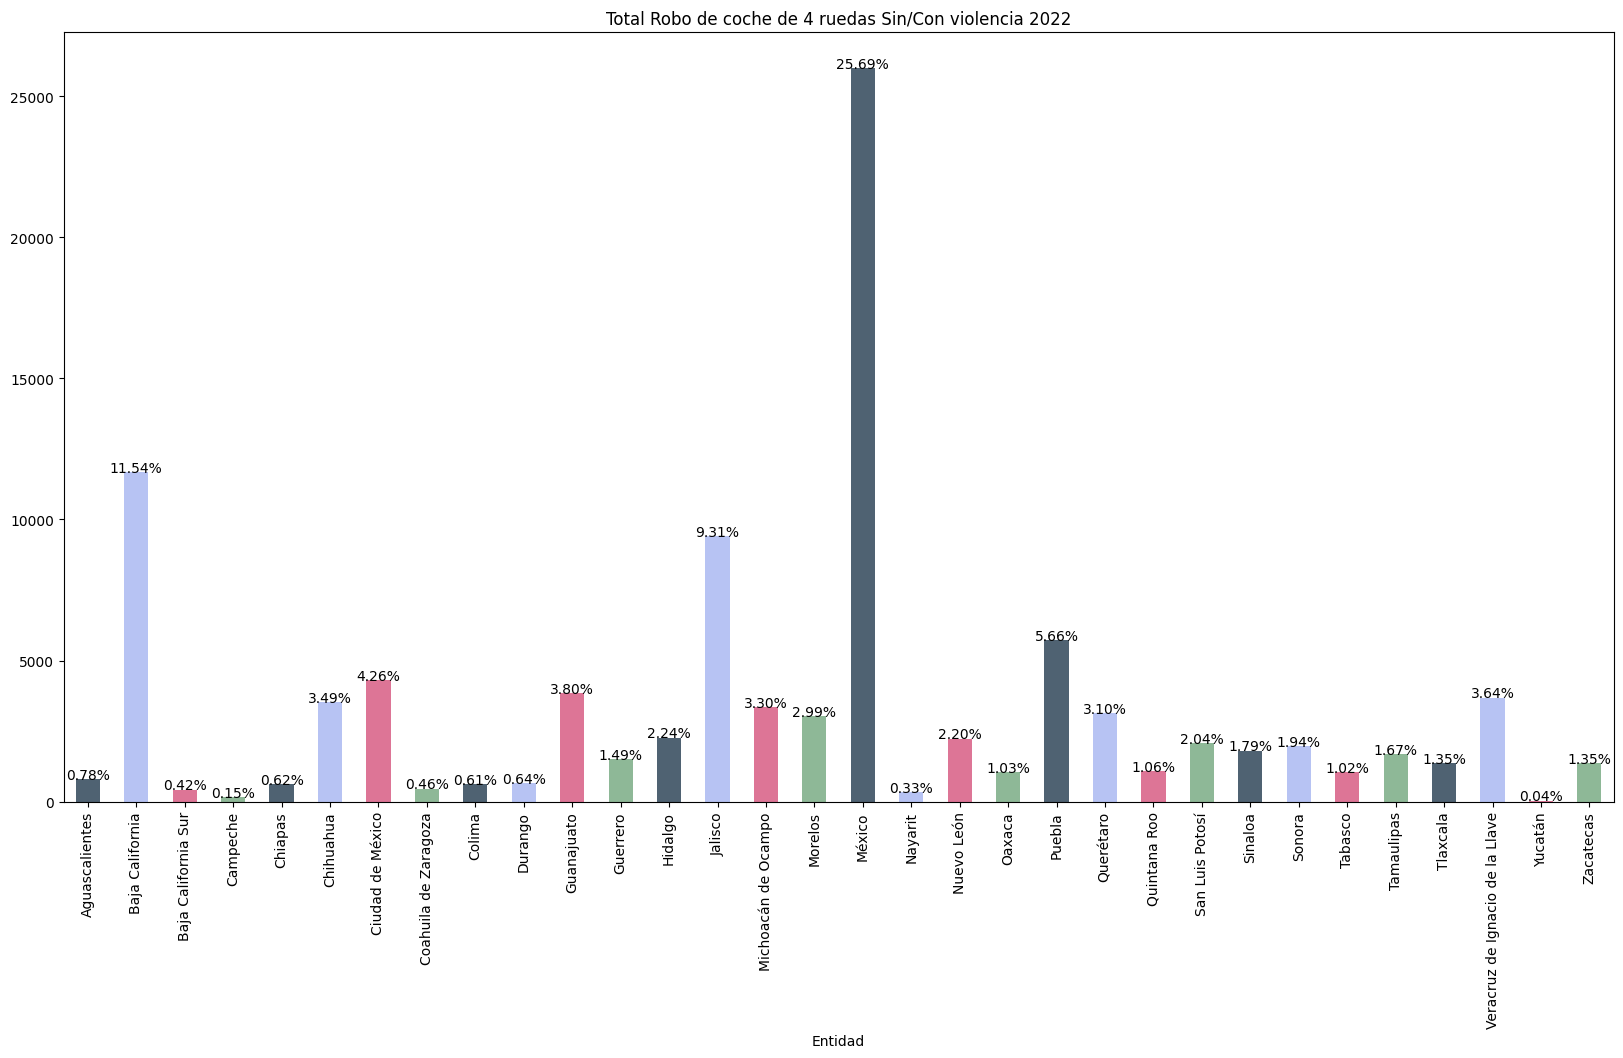

In [69]:
# Calcular los porcentajes
total = sum(totalrc2022['Total'])
totalrc2022['Porcentaje'] = 100 * totalrc2022['Total'] / total

# Crear la gráfica de barras
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
ax = totalrc2022.plot(kind='bar', x='Entidad', y='Total', title='Total Robo de coche de 4 ruedas Sin/Con violencia 2022', legend=False, 
                      figsize=(20, 10), color=colors)

# Agregar los porcentajes a las barras
for i, v in enumerate(totalrc2022['Porcentaje']):
    ax.text(i, totalrc2022['Total'][i] + 5, f"{v:.2f}%", color='black', ha='center')

# Mostrar la gráfica
plt.show()

# Cargamos el archivo csv que contiene todos los datos de 2015 a 2022
Para que sea más sencillo manipular los datos


## Anailzamos y limpiamos todos los datos

In [70]:
dftodo = pd.read_csv('/content/gdrive/MyDrive/ASE/Municipal-Delitos-2015-2022_dic2022.csv', encoding='ISO-8859-1')
dftodo.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
0  2015          1  Aguascalientes            1001  Aguascalientes   
1  2015          1  Aguascalientes            1001  Aguascalientes   
2  2015          1  Aguascalientes            1001  Aguascalientes   
3  2015          1  Aguascalientes            1001  Aguascalientes   
4  2015          1  Aguascalientes            1001  Aguascalientes   

             Bien jurídico afectado Tipo de delito  Subtipo de delito  \
0  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
1  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
2  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
3  La vida y la Integridad corporal      Homicidio   Homicidio doloso   
4  La vida y la Integridad corporal      Homicidio  Homicidio culposo   

           Modalidad  Enero  ...  Marzo  Abril  Mayo  Junio  Julio  Agosto  \
0  Con arma de fuego      2  ...      1      1     0      1      1       0   
1    Con arma blanca      1  ...      0      0     0      1      0       1   
2  Con otro elemento      0  ...      1      1     3      2      0       1   
3    No especificado      1  ...      0      1     0      0      0       0   
4  Con arma de fuego      0  ...      0      0     1      0      0       0   

   Septiembre  Octubre  Noviembre  Diciembre  
0           2        1          0          1  
1           0        0          0          0  
2           2        0          0          0  
3           0        0          0          0  
4           0        0          0          0  

[5 rows x 21 columns]

In [71]:
dftodo.tail()

Año  Clave_Ent    Entidad  Cve. Municipio              Municipio  \
1832399  2022         32  Zacatecas           32058  Santa María de la Paz   
1832400  2022         32  Zacatecas           32058  Santa María de la Paz   
1832401  2022         32  Zacatecas           32058  Santa María de la Paz   
1832402  2022         32  Zacatecas           32058  Santa María de la Paz   
1832403  2022         32  Zacatecas           32058  Santa María de la Paz   

                                    Bien jurídico afectado  \
1832399  Otros bienes jurídicos afectados (del fuero co...   
1832400  Otros bienes jurídicos afectados (del fuero co...   
1832401  Otros bienes jurídicos afectados (del fuero co...   
1832402  Otros bienes jurídicos afectados (del fuero co...   
1832403  Otros bienes jurídicos afectados (del fuero co...   

                                    Tipo de delito  \
1832399                              Falsificación   
1832400                   Contra el medio ambiente   
1832401  Delitos cometidos por servidores públicos   
1832402                                Electorales   
1832403              Otros delitos del Fuero Común   

                                 Subtipo de delito  \
1832399                              Falsificación   
1832400                   Contra el medio ambiente   
1832401  Delitos cometidos por servidores públicos   
1832402                                Electorales   
1832403              Otros delitos del Fuero Común   

                                         Modalidad  Enero  ...  Marzo  Abril  \
1832399                              Falsificación      0  ...      0      0   
1832400                   Contra el medio ambiente      0  ...      0      0   
1832401  Delitos cometidos por servidores públicos      0  ...      0      0   
1832402                                Electorales      0  ...      0      0   
1832403              Otros delitos del Fuero Común      0  ...      0      0   

         Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
1832399     0      0      0       0           0        0          0          0  
1832400     0      0      0       0           0        0          0          0  
1832401     0      0      0       0           0        0          0          0  
1832402     0      0      0       0           0        0          0          0  
1832403     0      0      0       1           0        0          0          0  

[5 rows x 21 columns]

In [72]:
dftodo.shape

(1832404, 21)

In [73]:
#Vemos que datos hacen falta
dftodo.isna().sum()

Año                       0
Clave_Ent                 0
Entidad                   0
Cve. Municipio            0
Municipio                 0
Bien jurídico afectado    0
Tipo de delito            0
Subtipo de delito         0
Modalidad                 0
Enero                     0
Febrero                   0
Marzo                     0
Abril                     0
Mayo                      0
Junio                     0
Julio                     0
Agosto                    0
Septiembre                0
Octubre                   0
Noviembre                 0
Diciembre                 0
dtype: int64

In [74]:
dftodob = dftodo[(dftodo['Modalidad'] == 'Robo de coche de 4 ruedas Con violencia') | (dftodo['Modalidad'] == 'Robo de coche de 4 ruedas Sin violencia')]
dftodob.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2015          1  Aguascalientes            1001  Aguascalientes   
42   2015          1  Aguascalientes            1001  Aguascalientes   
139  2015          1  Aguascalientes            1002        Asientos   
140  2015          1  Aguascalientes            1002        Asientos   
237  2015          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Marzo  Abril  Mayo  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      4      3     0   
42   Robo de coche de 4 ruedas Sin violencia    114  ...    122    124   138   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0      0     0   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0      0     0   

     Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
41       1      1       5           2        5          6          4  
42      94     89      93         126      105        152        171  
139      0      0       0           0        1          0          1  
140      1      2       0           1        1          1          3  
237      0      0       0           0        0          0          0  

[5 rows x 21 columns]

In [75]:
print(df2015b.shape)

(3862, 21)


In [76]:
dftodob.shape

(37396, 21)

In [77]:
# Hacemos un nuevo df en donde solo tengamos el robo de coches con y sin violencia
cochertodo = dftodob.copy()
cochertodo.loc[:,'Total'] = dftodob[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum(axis=1)
cochertodo.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2015          1  Aguascalientes            1001  Aguascalientes   
42   2015          1  Aguascalientes            1001  Aguascalientes   
139  2015          1  Aguascalientes            1002        Asientos   
140  2015          1  Aguascalientes            1002        Asientos   
237  2015          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      3     0      1   
42   Robo de coche de 4 ruedas Sin violencia    114  ...    124   138     94   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0      1   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       1       5           2        5          6          4     36  
42      89      93         126      105        152        171   1434  
139      0       0           0        1          0          1      2  
140      2       0           1        1          1          3      9  
237      0       0           0        0          0          0      0  

[5 rows x 22 columns]

In [78]:
#Hcaemos un df en donde pongamos como fue el total de robo de coches de la república 
totalrctodo = cochertodo.groupby('Año')['Total'].sum().reset_index()
totalrctodo.head()

Año   Total
0  2015  145114
1  2016  152596
2  2017  178929
3  2018  177987
4  2019  151878

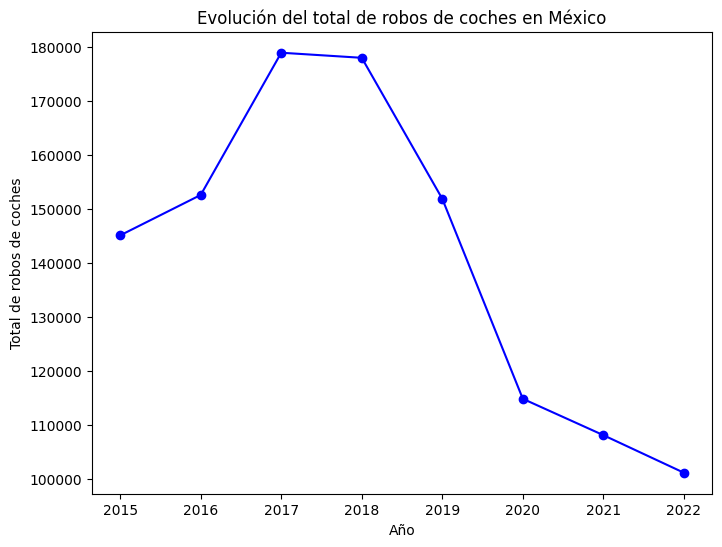

In [79]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(totalrctodo['Año'], totalrctodo['Total'], linestyle='-', color='blue', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en México')

# Muestra el gráfico
plt.show()

In [80]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=totalrctodo['Año'], y=totalrctodo['Total'], mode='lines+markers', line=dict(color='mediumturquoise'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en México', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

## Vamos a sacar y analizar los estados con menor y mayor número de robos desde 2015 a 2022

In [81]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
totalrctodoent = cochertodo.groupby('Entidad')['Total'].sum().reset_index()
totalrctodoent.head()

Entidad   Total
0       Aguascalientes   13920
1      Baja California  111690
2  Baja California Sur    7730
3             Campeche    1029
4              Chiapas    9333

In [82]:
# Sacamos los estados que tuvieron mayores robos de 2015 al 2022
tres_estados_mas_robados = totalrctodoent.nlargest(3, 'Total')
tres_estados_mas_robados.head()

Entidad   Total
16           México  299073
1   Baja California  111690
13          Jalisco  107595

In [83]:
# Sacamos los estados que tuvieron menor número de robos de 2015 al 2022
tres_estados_menos_robados = totalrctodoent.nsmallest(3, 'Total')
tres_estados_menos_robados

Entidad  Total
30   Yucatán    555
3   Campeche   1029
17   Nayarit   2425

###Estados con mayor número de robos

####Estado de México

In [84]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
em = cochertodo.loc[(cochertodo['Entidad'] == 'México')]
em.head()

Año  Clave_Ent Entidad  Cve. Municipio                  Municipio  \
64525  2015         15  México           15001  Acambay de Ruíz Castañeda   
64526  2015         15  México           15001  Acambay de Ruíz Castañeda   
64623  2015         15  México           15002                    Acolman   
64624  2015         15  México           15002                    Acolman   
64721  2015         15  México           15003                     Aculco   

      Bien jurídico afectado Tipo de delito           Subtipo de delito  \
64525          El patrimonio           Robo  Robo de vehículo automotor   
64526          El patrimonio           Robo  Robo de vehículo automotor   
64623          El patrimonio           Robo  Robo de vehículo automotor   
64624          El patrimonio           Robo  Robo de vehículo automotor   
64721          El patrimonio           Robo  Robo de vehículo automotor   

                                     Modalidad  Enero  ...  Abril  Mayo  \
64525  Robo de coche de 4 ruedas Con violencia      2  ...      0     1   
64526  Robo de coche de 4 ruedas Sin violencia      3  ...      1     2   
64623  Robo de coche de 4 ruedas Con violencia     18  ...      7    10   
64624  Robo de coche de 4 ruedas Sin violencia     24  ...     11    12   
64721  Robo de coche de 4 ruedas Con violencia      0  ...      2     1   

       Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
64525      0      0       2           0        0          3          0      9  
64526      2      0       1           7        0          2          0     25  
64623     11      6       8           9       13          9          8    129  
64624     15     16      19          21       14         15         22    198  
64721      1      0       0           0        2          2          0      9  

[5 rows x 22 columns]

In [85]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
emtodo = em.groupby('Año')['Total'].sum().reset_index()
emtodo.head()

Año  Total
0  2015  43431
1  2016  37932
2  2017  41625
3  2018  47657
4  2019  41042

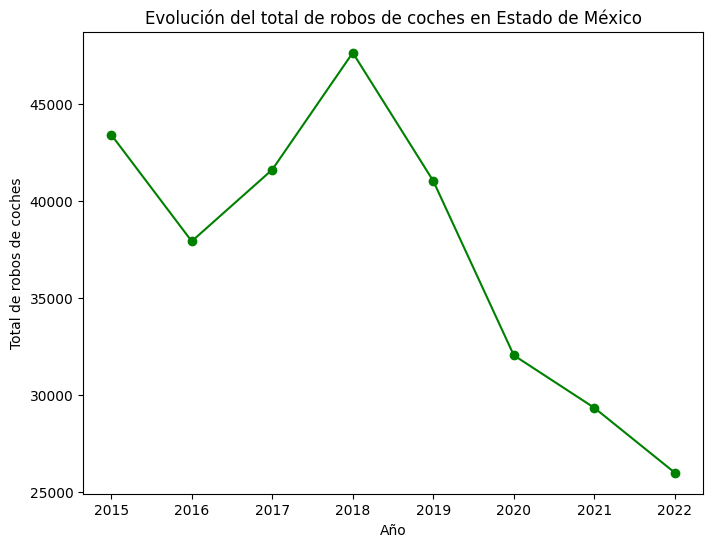

In [86]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(emtodo['Año'], emtodo['Total'], linestyle='-', color='green', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Estado de México')

# Muestra el gráfico
plt.show()

In [87]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=emtodo['Año'], y=emtodo['Total'], mode='lines+markers', line=dict(color='orange'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Estado de México', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)


In [88]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunem = cochertodo.loc[cochertodo['Entidad'] == 'México', ['Municipio','Modalidad', 'Total']].copy()
rcmunem.head()

Municipio                                Modalidad  \
64525  Acambay de Ruíz Castañeda  Robo de coche de 4 ruedas Con violencia   
64526  Acambay de Ruíz Castañeda  Robo de coche de 4 ruedas Sin violencia   
64623                    Acolman  Robo de coche de 4 ruedas Con violencia   
64624                    Acolman  Robo de coche de 4 ruedas Sin violencia   
64721                     Aculco  Robo de coche de 4 ruedas Con violencia   

       Total  
64525      9  
64526     25  
64623    129  
64624    198  
64721      9

In [89]:
total_rcmunem = rcmunem.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunem.head()

Municipio  Total
0  Acambay de Ruíz Castañeda    350
1                    Acolman   2479
2                     Aculco    254
3     Almoloya de Alquisiras     35
4         Almoloya de Juárez   1297

<ipython-input-90-ccdcd3384ff6>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



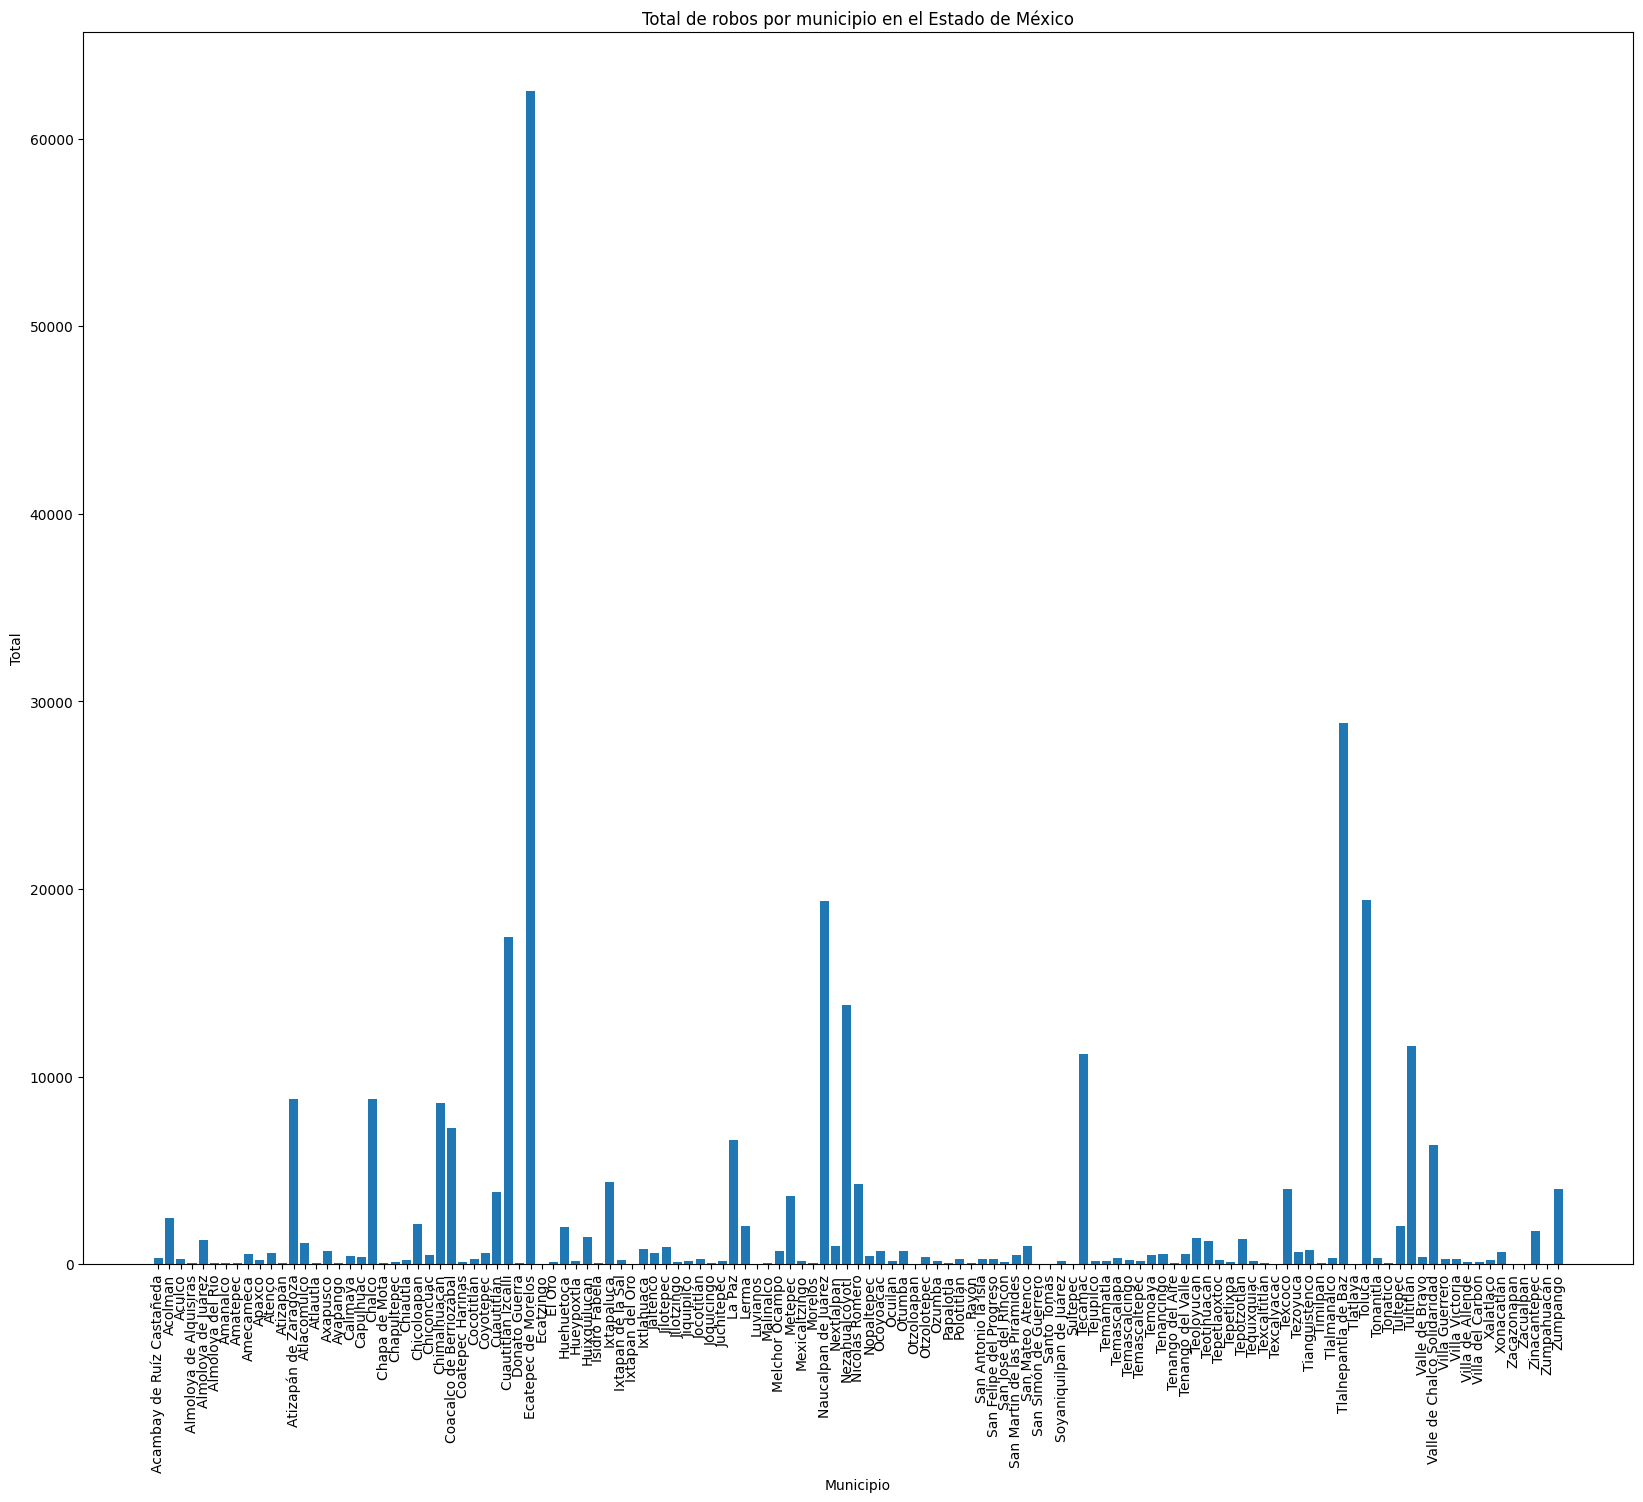

In [90]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmunem['Municipio'], total_rcmunem['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmunem['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en el Estado de México')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

####Baja California

In [91]:
# Hacemos un df en donde tenga todo lo relacionado con Baja California
bc = cochertodo.loc[(cochertodo['Entidad'] == 'Baja California')]
bc.head()

Año  Clave_Ent          Entidad  Cve. Municipio Municipio  \
1119  2015          2  Baja California            2001  Ensenada   
1120  2015          2  Baja California            2001  Ensenada   
1217  2015          2  Baja California            2002  Mexicali   
1218  2015          2  Baja California            2002  Mexicali   
1315  2015          2  Baja California            2003    Tecate   

     Bien jurídico afectado Tipo de delito           Subtipo de delito  \
1119          El patrimonio           Robo  Robo de vehículo automotor   
1120          El patrimonio           Robo  Robo de vehículo automotor   
1217          El patrimonio           Robo  Robo de vehículo automotor   
1218          El patrimonio           Robo  Robo de vehículo automotor   
1315          El patrimonio           Robo  Robo de vehículo automotor   

                                    Modalidad  Enero  ...  Abril  Mayo  Junio  \
1119  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
1120  Robo de coche de 4 ruedas Sin violencia    129  ...    117   125    114   
1217  Robo de coche de 4 ruedas Con violencia     38  ...     22    22     31   
1218  Robo de coche de 4 ruedas Sin violencia    357  ...    404   400    450   
1315  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   

      Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
1119      0       0           0        0          0          0      0  
1120    142     111         120      170        144        136   1477  
1217     32      31          31       25         33         30    342  
1218    430     392         443      511        523        448   5119  
1315      0       0           0        0          1          1      2  

[5 rows x 22 columns]

In [92]:
# Hacemos un df en donde tengamos el total de Baja California y poder graficar
bctodo = bc.groupby('Año')['Total'].sum().reset_index()
bctodo.head()

Año  Total
0  2015  14138
1  2016  16628
2  2017  19732
3  2018  15425
4  2019  13412

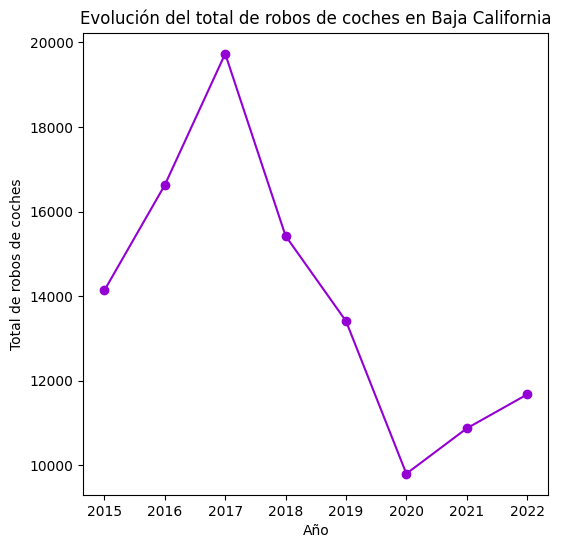

In [93]:
# Crea una figura
fig = plt.figure(figsize=(6, 6))

# Crea un gráfico de línea
plt.plot(bctodo['Año'], bctodo['Total'], linestyle='-', color='darkviolet', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Baja California')

# Muestra el gráfico
plt.show()


In [94]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=bctodo['Año'], y=bctodo['Total'], mode='lines+markers', line=dict(color='darkviolet'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Baja California', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [95]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunbc = cochertodo.loc[cochertodo['Entidad'] == 'Baja California', ['Municipio','Modalidad', 'Total']].copy()
rcmunbc.head()

Municipio                                Modalidad  Total
1119  Ensenada  Robo de coche de 4 ruedas Con violencia      0
1120  Ensenada  Robo de coche de 4 ruedas Sin violencia   1477
1217  Mexicali  Robo de coche de 4 ruedas Con violencia    342
1218  Mexicali  Robo de coche de 4 ruedas Sin violencia   5119
1315    Tecate  Robo de coche de 4 ruedas Con violencia      2

In [96]:
total_rcmunbc = rcmunbc.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunbc.head()

Municipio  Total
0            Ensenada  14141
1            Mexicali  28497
2  Playas de Rosarito   5507
3          San Felipe     33
4         San Quintín    120

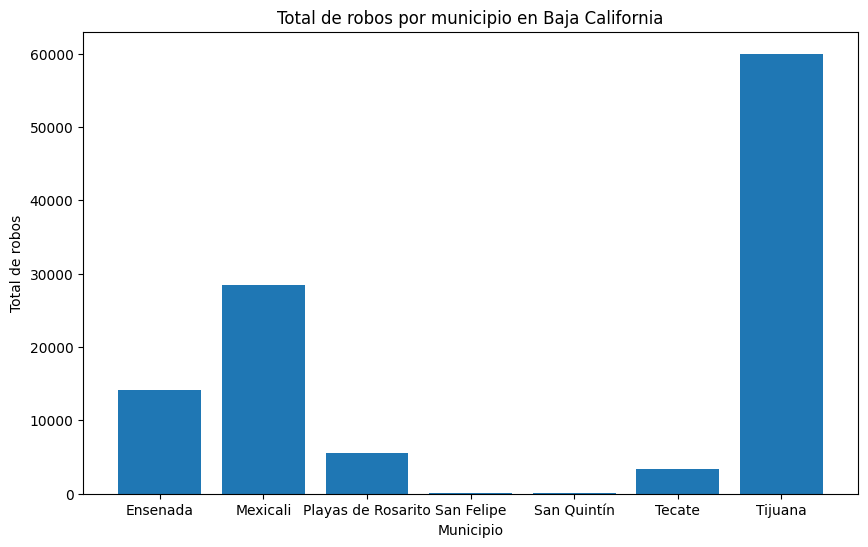

In [97]:
# Obtener los datos a graficar
data = total_rcmunbc['Total']
labels = total_rcmunbc['Municipio']

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, data)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Baja California')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total de robos')

# Mostrar el gráfico
plt.show()

####Jalisco

In [98]:
# Hacemos un df en donde tenga todo lo relacionado con Jalisco
j = cochertodo.loc[(cochertodo['Entidad'] == 'Jalisco')]
j.head()

Año  Clave_Ent  Entidad  Cve. Municipio             Municipio  \
52177  2015         14  Jalisco           14001                Acatic   
52178  2015         14  Jalisco           14001                Acatic   
52275  2015         14  Jalisco           14002     Acatlán de Juárez   
52276  2015         14  Jalisco           14002     Acatlán de Juárez   
52373  2015         14  Jalisco           14003  Ahualulco de Mercado   

      Bien jurídico afectado Tipo de delito           Subtipo de delito  \
52177          El patrimonio           Robo  Robo de vehículo automotor   
52178          El patrimonio           Robo  Robo de vehículo automotor   
52275          El patrimonio           Robo  Robo de vehículo automotor   
52276          El patrimonio           Robo  Robo de vehículo automotor   
52373          El patrimonio           Robo  Robo de vehículo automotor   

                                     Modalidad  Enero  ...  Abril  Mayo  \
52177  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   
52178  Robo de coche de 4 ruedas Sin violencia      0  ...      1     0   
52275  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   
52276  Robo de coche de 4 ruedas Sin violencia      0  ...      1     1   
52373  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   

       Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
52177      0      0       0           0        0          1          0      1  
52178      0      1       3           0        1          1          1      8  
52275      0      0       0           0        0          0          0      2  
52276      1      0       1           0        1          2          1     13  
52373      0      1       0           1        2          2          0      6  

[5 rows x 22 columns]

In [99]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
jtodo = j.groupby('Año')['Total'].sum().reset_index()
jtodo.head()

Año  Total
0  2015   7253
1  2016  13943
2  2017  20833
3  2018  19910
4  2019  16137

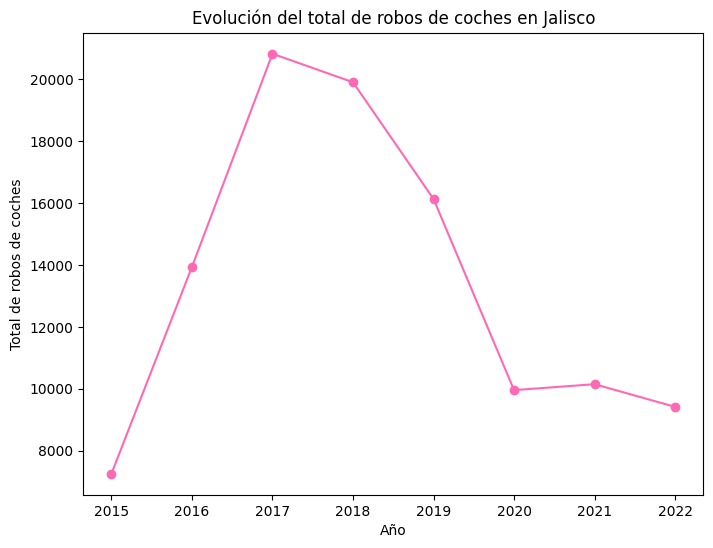

In [100]:
# Crea una figura
fig = plt.figure(figsize=(8, 6))

# Crea un gráfico de línea
plt.plot(jtodo['Año'], jtodo['Total'], linestyle='-', color='hotpink', marker='o')

# Añade etiquetas a los ejes X e Y y un título al gráfico
plt.xlabel('Año')
plt.ylabel('Total de robos de coches')
plt.title('Evolución del total de robos de coches en Jalisco')

# Muestra el gráfico
plt.show()

In [101]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=jtodo['Año'], y=jtodo['Total'], mode='lines+markers', line=dict(color='hotpink'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Jalisco', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [102]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunj = cochertodo.loc[cochertodo['Entidad'] == 'Jalisco', ['Municipio','Modalidad', 'Total']].copy()
rcmunj.head()

Municipio                                Modalidad  Total
52177                Acatic  Robo de coche de 4 ruedas Con violencia      1
52178                Acatic  Robo de coche de 4 ruedas Sin violencia      8
52275     Acatlán de Juárez  Robo de coche de 4 ruedas Con violencia      2
52276     Acatlán de Juárez  Robo de coche de 4 ruedas Sin violencia     13
52373  Ahualulco de Mercado  Robo de coche de 4 ruedas Con violencia      6

In [103]:
total_rcmunj = rcmunj.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunj.head()

Municipio  Total
0                Acatic    108
1     Acatlán de Juárez    186
2  Ahualulco de Mercado     82
3              Amacueca     13
4              Amatitán     78

<ipython-input-104-f2f87e9129fd>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



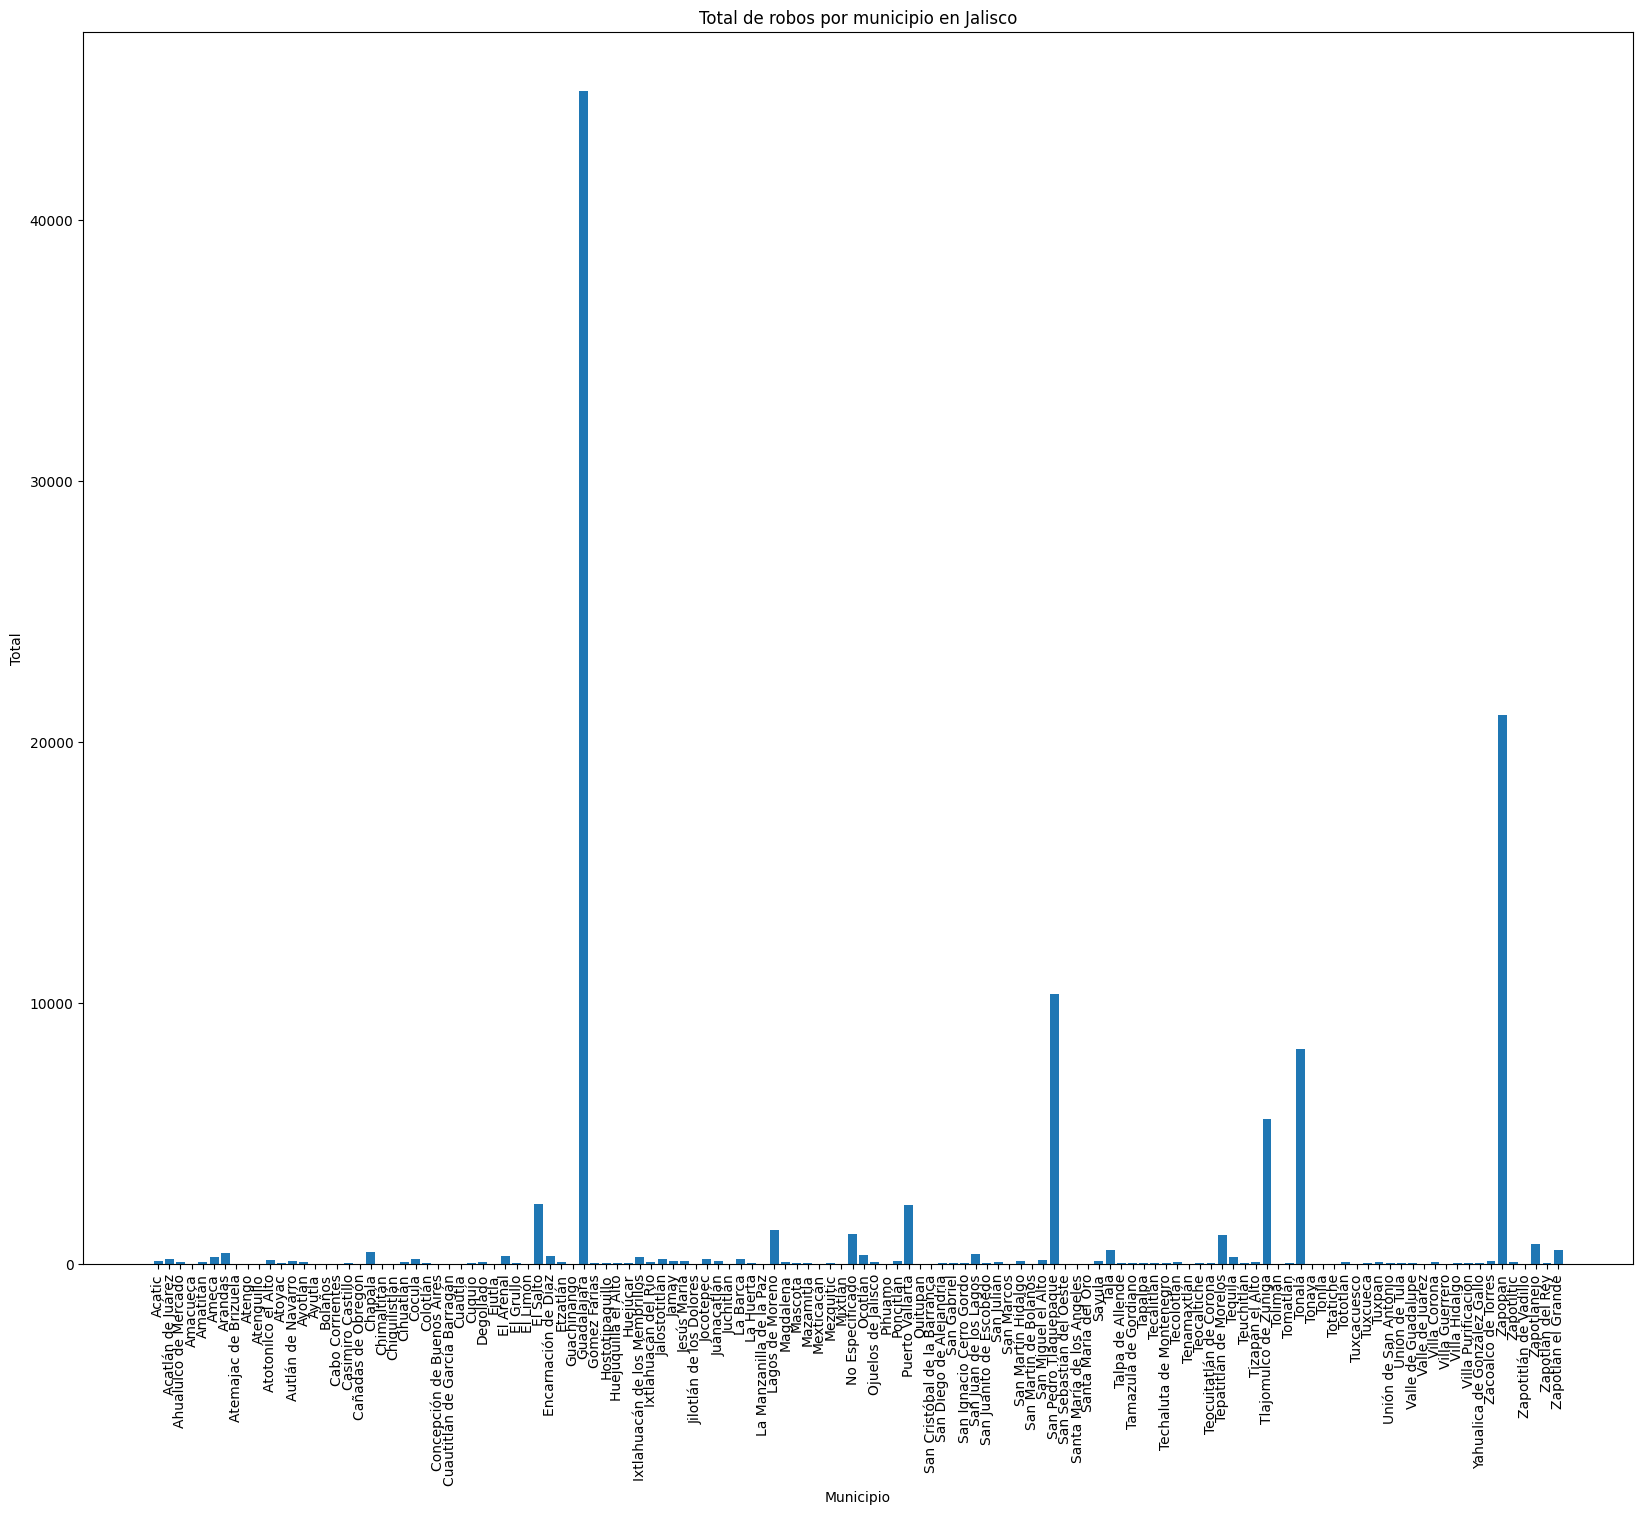

In [104]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmunj['Municipio'], total_rcmunj['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmunj['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Jalisco')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

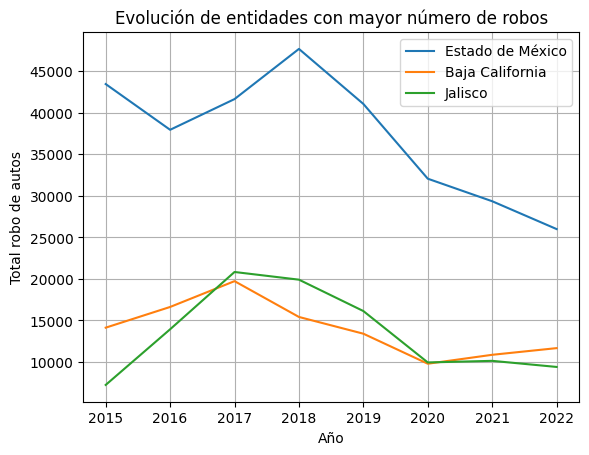

In [105]:
plt.plot(emtodo['Año'], emtodo['Total'], label='Estado de México')
plt.plot(bctodo['Año'], bctodo['Total'], label='Baja California')
plt.plot(jtodo['Año'], jtodo['Total'], label='Jalisco')
plt.xlabel('Año')
plt.ylabel('Total robo de autos')
plt.title('Evolución de entidades con mayor número de robos')
plt.grid(True)
plt.legend()

###Estados con menor número de robos

####Yucatán

In [106]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
y = cochertodo.loc[(cochertodo['Entidad'] == 'Yucatán')]
y.head()

Año  Clave_Ent  Entidad  Cve. Municipio Municipio  \
173207  2015         31  Yucatán           31001     Abalá   
173208  2015         31  Yucatán           31001     Abalá   
173305  2015         31  Yucatán           31002   Acanceh   
173306  2015         31  Yucatán           31002   Acanceh   
173403  2015         31  Yucatán           31003      Akil   

       Bien jurídico afectado Tipo de delito           Subtipo de delito  \
173207          El patrimonio           Robo  Robo de vehículo automotor   
173208          El patrimonio           Robo  Robo de vehículo automotor   
173305          El patrimonio           Robo  Robo de vehículo automotor   
173306          El patrimonio           Robo  Robo de vehículo automotor   
173403          El patrimonio           Robo  Robo de vehículo automotor   

                                      Modalidad  Enero  ...  Abril  Mayo  \
173207  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   
173208  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0   
173305  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   
173306  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0   
173403  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   

        Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
173207      0      0       0           0        0          0          0      0  
173208      0      0       0           0        0          0          0      0  
173305      0      0       0           0        0          0          0      0  
173306      0      0       0           0        0          0          0      0  
173403      0      0       0           0        0          0          0      0  

[5 rows x 22 columns]

In [107]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
ytodo = y.groupby('Año')['Total'].sum().reset_index()
ytodo.head()

Año  Total
0  2015    117
1  2016    105
2  2017     70
3  2018     75
4  2019     59

In [108]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=ytodo['Año'], y=ytodo['Total'], mode='lines+markers', line=dict(color='tomato'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Yucatán', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [109]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmuny = cochertodo.loc[cochertodo['Entidad'] == 'Yucatán', ['Municipio','Modalidad', 'Total']].copy()
rcmuny.head()

Municipio                                Modalidad  Total
173207     Abalá  Robo de coche de 4 ruedas Con violencia      0
173208     Abalá  Robo de coche de 4 ruedas Sin violencia      0
173305   Acanceh  Robo de coche de 4 ruedas Con violencia      0
173306   Acanceh  Robo de coche de 4 ruedas Sin violencia      0
173403      Akil  Robo de coche de 4 ruedas Con violencia      0

In [110]:
total_rcmuny = rcmuny.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmuny.head()

Municipio  Total
0     Abalá      0
1   Acanceh      0
2      Akil      0
3      Baca      0
4    Bokobá      0

<ipython-input-111-8b9ff900c7b6>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



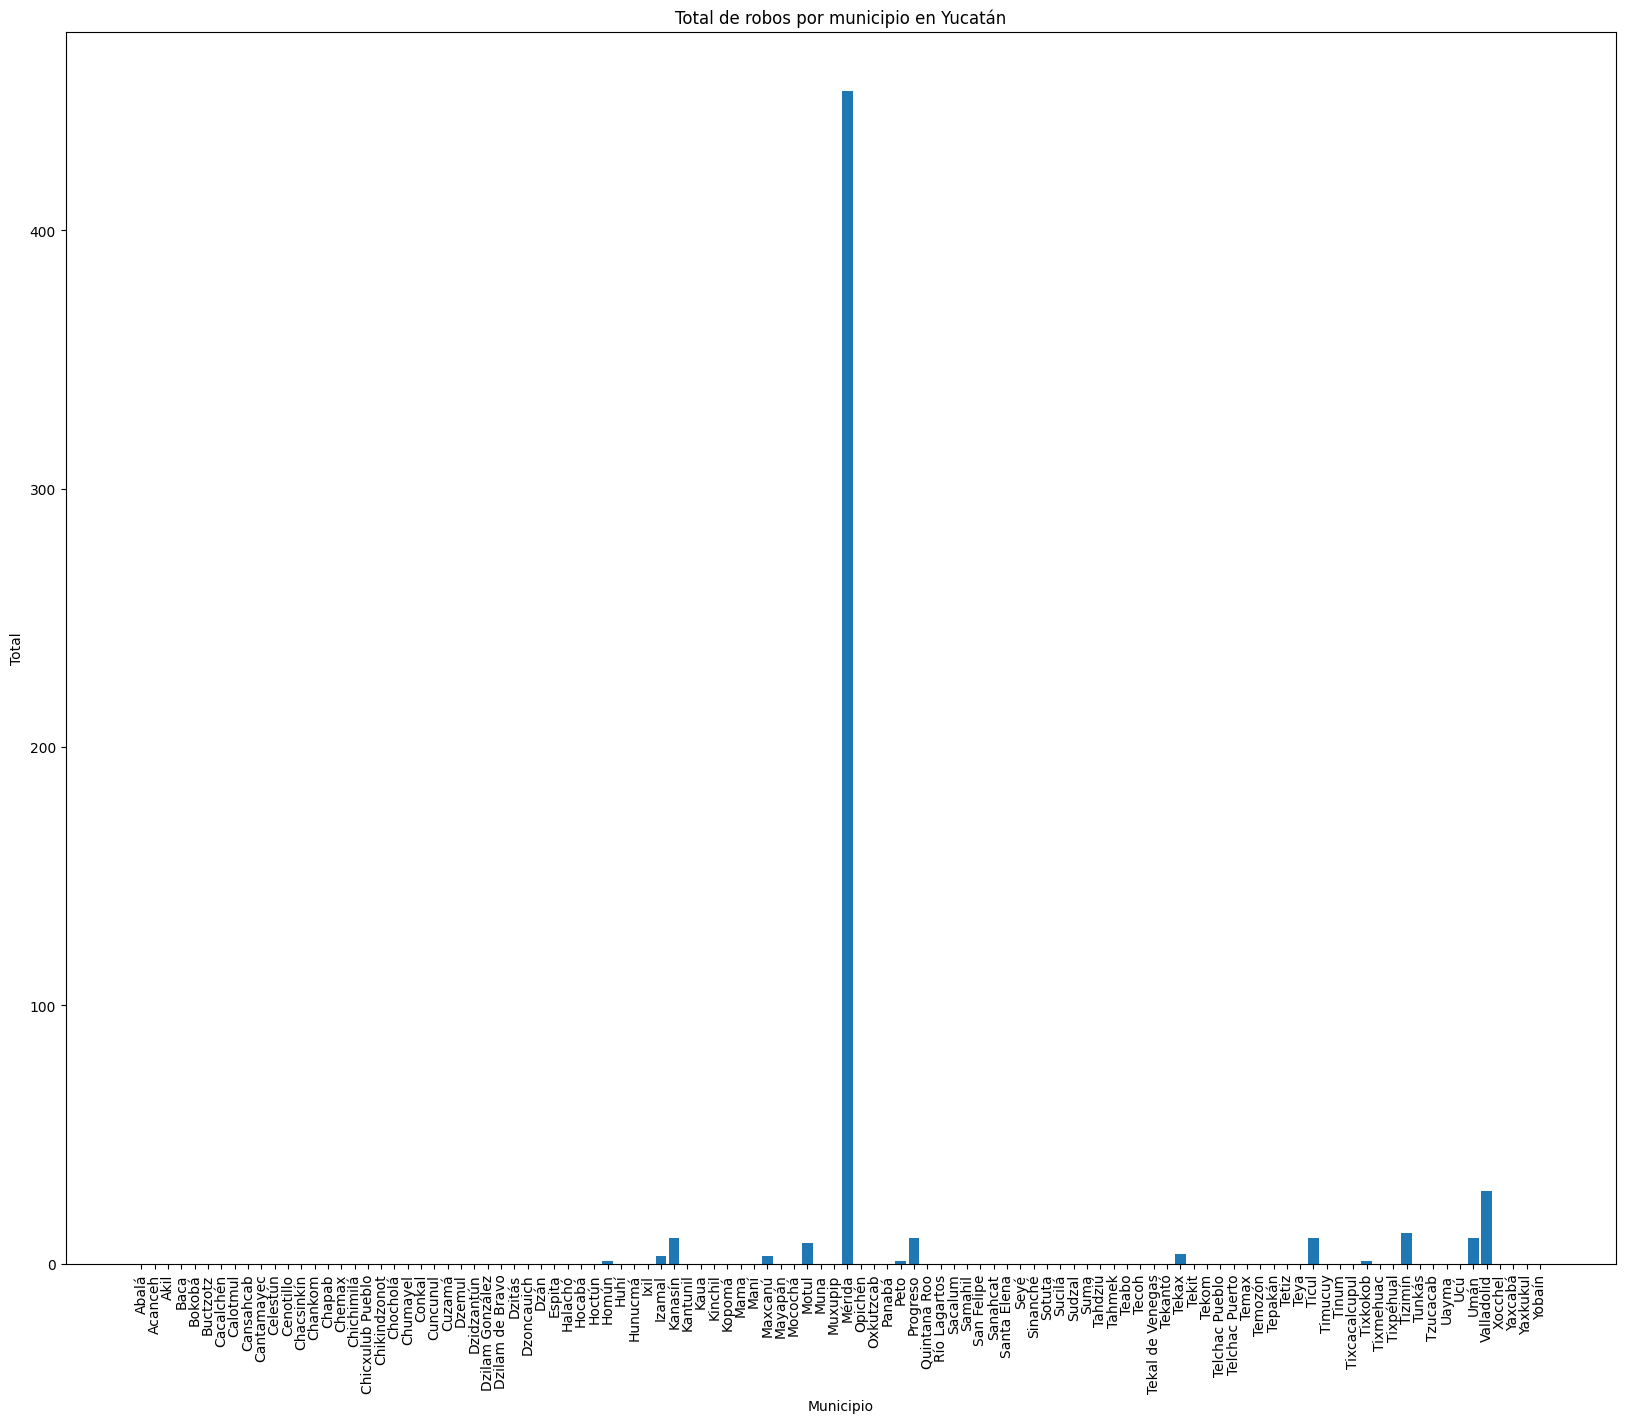

In [111]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmuny['Municipio'], total_rcmuny['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmuny['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Yucatán')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

####Campeche

In [112]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
cam = cochertodo.loc[(cochertodo['Entidad'] == 'Campeche')]
cam.head()

Año  Clave_Ent   Entidad  Cve. Municipio Municipio  \
2099  2015          4  Campeche            4001   Calkiní   
2100  2015          4  Campeche            4001   Calkiní   
2197  2015          4  Campeche            4002  Campeche   
2198  2015          4  Campeche            4002  Campeche   
2295  2015          4  Campeche            4003    Carmen   

     Bien jurídico afectado Tipo de delito           Subtipo de delito  \
2099          El patrimonio           Robo  Robo de vehículo automotor   
2100          El patrimonio           Robo  Robo de vehículo automotor   
2197          El patrimonio           Robo  Robo de vehículo automotor   
2198          El patrimonio           Robo  Robo de vehículo automotor   
2295          El patrimonio           Robo  Robo de vehículo automotor   

                                    Modalidad  Enero  ...  Abril  Mayo  Junio  \
2099  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
2100  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0      0   
2197  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
2198  Robo de coche de 4 ruedas Sin violencia      1  ...      2     2     11   
2295  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   

      Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
2099      0       0           0        0          0          0      0  
2100      0       0           0        0          0          1      1  
2197      0       0           0        0          0          0      0  
2198      7       2           9        8          9          6     64  
2295      0       0           0        0          0          0      0  

[5 rows x 22 columns]

In [113]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
camtodo = cam.groupby('Año')['Total'].sum().reset_index()
camtodo.head()

Año  Total
0  2015     73
1  2016    196
2  2017    159
3  2018    120
4  2019    153

In [114]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=camtodo['Año'], y=camtodo['Total'], mode='lines+markers', line=dict(color='darkolivegreen'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Campeche', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [115]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmuncam = cochertodo.loc[cochertodo['Entidad'] == 'Campeche', ['Municipio','Modalidad', 'Total']].copy()
rcmuncam.head()

Municipio                                Modalidad  Total
2099   Calkiní  Robo de coche de 4 ruedas Con violencia      0
2100   Calkiní  Robo de coche de 4 ruedas Sin violencia      1
2197  Campeche  Robo de coche de 4 ruedas Con violencia      0
2198  Campeche  Robo de coche de 4 ruedas Sin violencia     64
2295    Carmen  Robo de coche de 4 ruedas Con violencia      0

In [116]:
total_rcmuncam = rcmuncam.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmuncam.head()

Municipio  Total
0    Calakmul      6
1     Calkiní     19
2    Campeche    486
3  Candelaria     26
4      Carmen    397

<ipython-input-117-ac5e819cd7cc>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



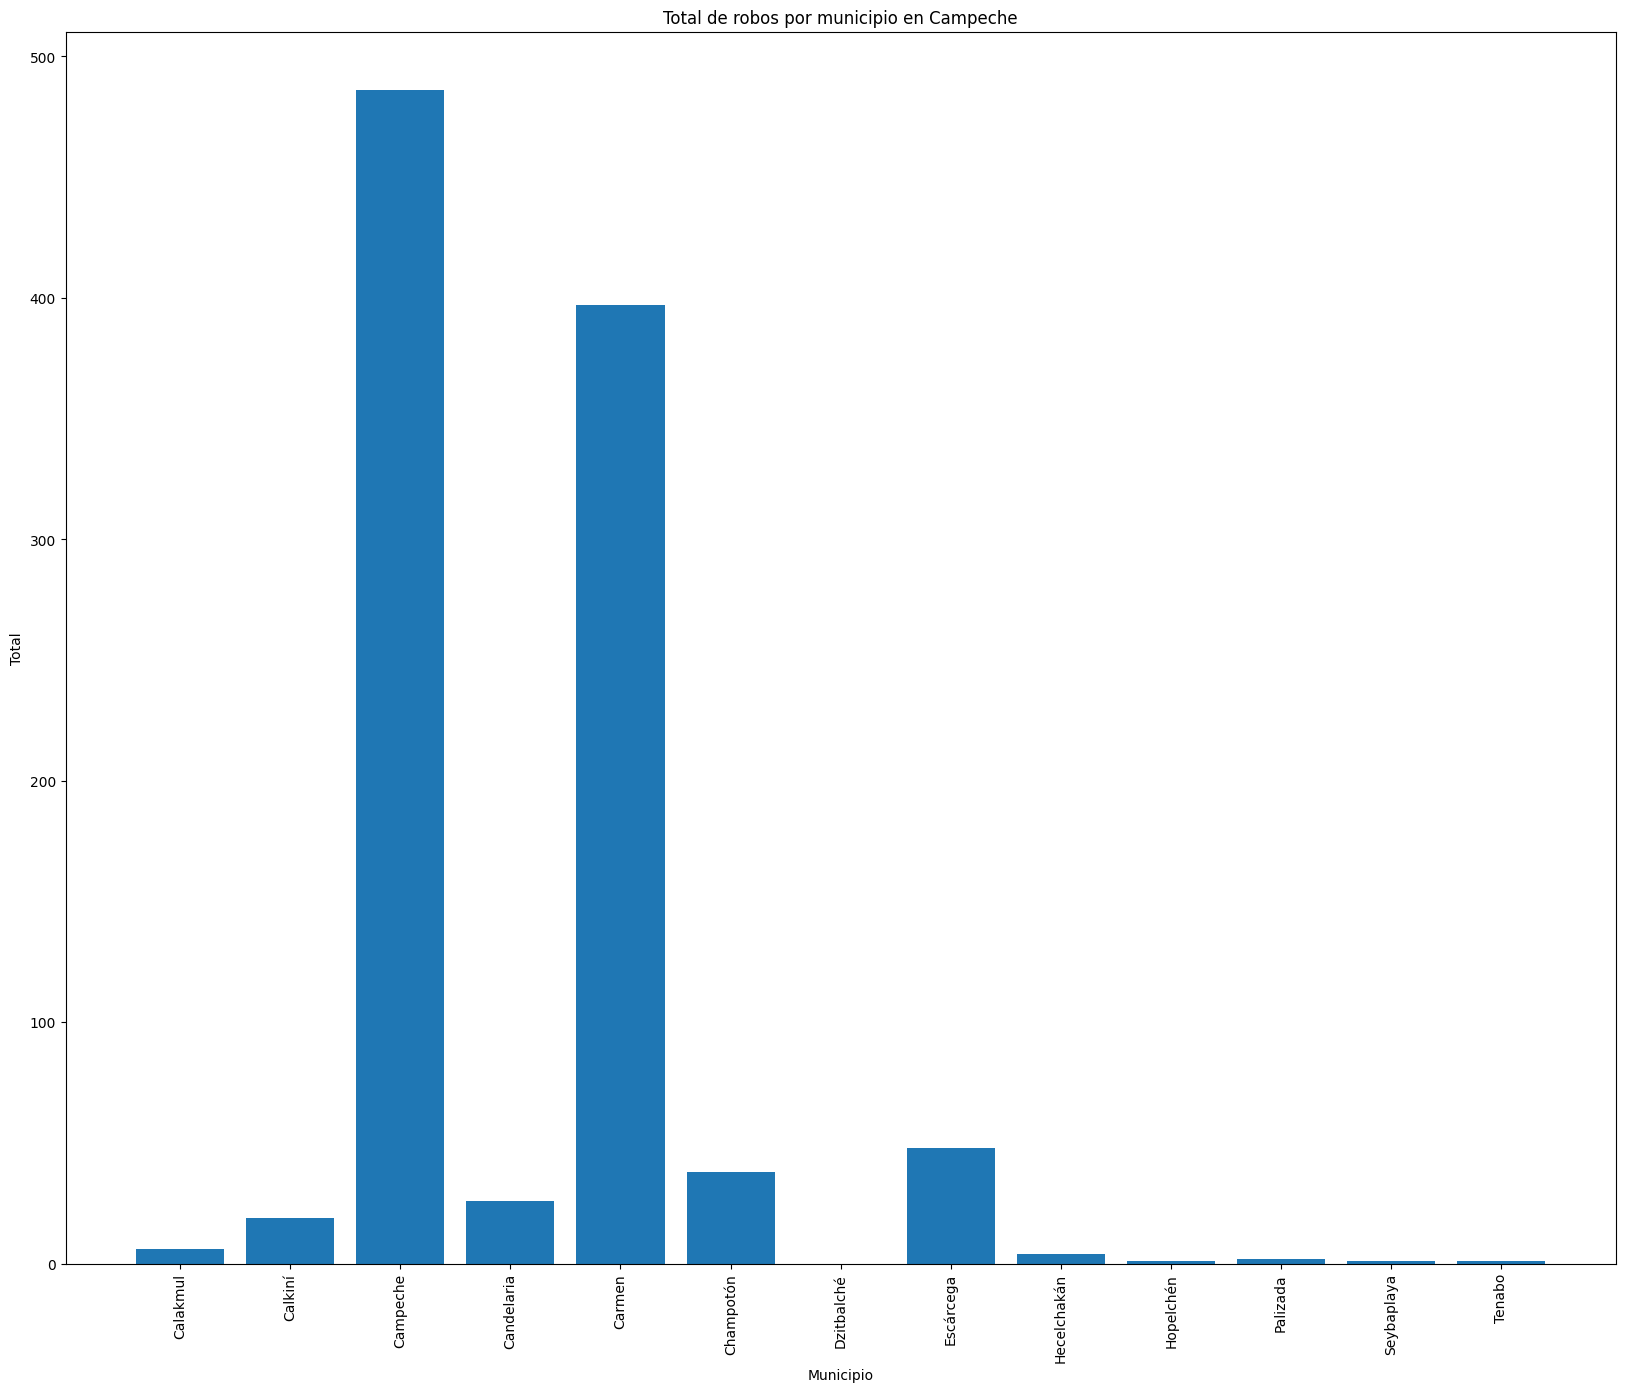

In [117]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmuncam['Municipio'], total_rcmuncam['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmuncam['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Campeche')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

####Nayarit

In [118]:
# Ejemplo de una entidad en caso de utilizar por municipio donde hay mas robos
na = cochertodo.loc[(cochertodo['Entidad'] == 'Nayarit')]
na.head()

Año  Clave_Ent  Entidad  Cve. Municipio         Municipio  \
91083  2015         18  Nayarit           18001         Acaponeta   
91084  2015         18  Nayarit           18001         Acaponeta   
91181  2015         18  Nayarit           18002        Ahuacatlán   
91182  2015         18  Nayarit           18002        Ahuacatlán   
91279  2015         18  Nayarit           18003  Amatlán de Cañas   

      Bien jurídico afectado Tipo de delito           Subtipo de delito  \
91083          El patrimonio           Robo  Robo de vehículo automotor   
91084          El patrimonio           Robo  Robo de vehículo automotor   
91181          El patrimonio           Robo  Robo de vehículo automotor   
91182          El patrimonio           Robo  Robo de vehículo automotor   
91279          El patrimonio           Robo  Robo de vehículo automotor   

                                     Modalidad  Enero  ...  Abril  Mayo  \
91083  Robo de coche de 4 ruedas Con violencia      0  ...      1     0   
91084  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0   
91181  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   
91182  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0   
91279  Robo de coche de 4 ruedas Con violencia      0  ...      0     0   

       Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
91083      0      0       0           0        0          0          0      2  
91084      1      0       0           0        0          0          0      2  
91181      0      0       0           1        0          0          0      1  
91182      0      0       0           0        1          0          0      1  
91279      0      0       0           0        0          0          0      0  

[5 rows x 22 columns]

In [119]:
# Hacemos un df en donde tengamos el total de cada entidad y ver que entidad federativa tiene más o menos robos de coches
natodo = na.groupby('Año')['Total'].sum().reset_index()
natodo.head()

Año  Total
0  2015    188
1  2016    168
2  2017    221
3  2018    703
4  2019    281

In [120]:
# Crea un objeto de traza de plotly
trace = go.Scatter(x=natodo['Año'], y=natodo['Total'], mode='lines+markers', line=dict(color='saddlebrown'))

# Crea un objeto de datos de plotly a partir del objeto de traza
data = [trace]

# Crea un objeto de diseño de plotly
layout = go.Layout(title='Evolución del total de robos de coches en Nayarit', hovermode='closest', xaxis_title='Año', yaxis_title='Total de robos de coches')

# Crea un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Muestra la figura en una ventana emergente
pyo.iplot(fig)

In [121]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
rcmunna = cochertodo.loc[cochertodo['Entidad'] == 'Nayarit', ['Municipio','Modalidad', 'Total']].copy()
rcmunna.head()

Municipio                                Modalidad  Total
91083         Acaponeta  Robo de coche de 4 ruedas Con violencia      2
91084         Acaponeta  Robo de coche de 4 ruedas Sin violencia      2
91181        Ahuacatlán  Robo de coche de 4 ruedas Con violencia      1
91182        Ahuacatlán  Robo de coche de 4 ruedas Sin violencia      1
91279  Amatlán de Cañas  Robo de coche de 4 ruedas Con violencia      0

In [122]:
total_rcmunna = rcmunna.groupby(['Municipio'])['Total'].sum().reset_index()
total_rcmunna.head()

Municipio  Total
0          Acaponeta     52
1         Ahuacatlán     18
2   Amatlán de Cañas     13
3  Bahía de Banderas    602
4         Compostela    137

<ipython-input-123-6170fdc08bde>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



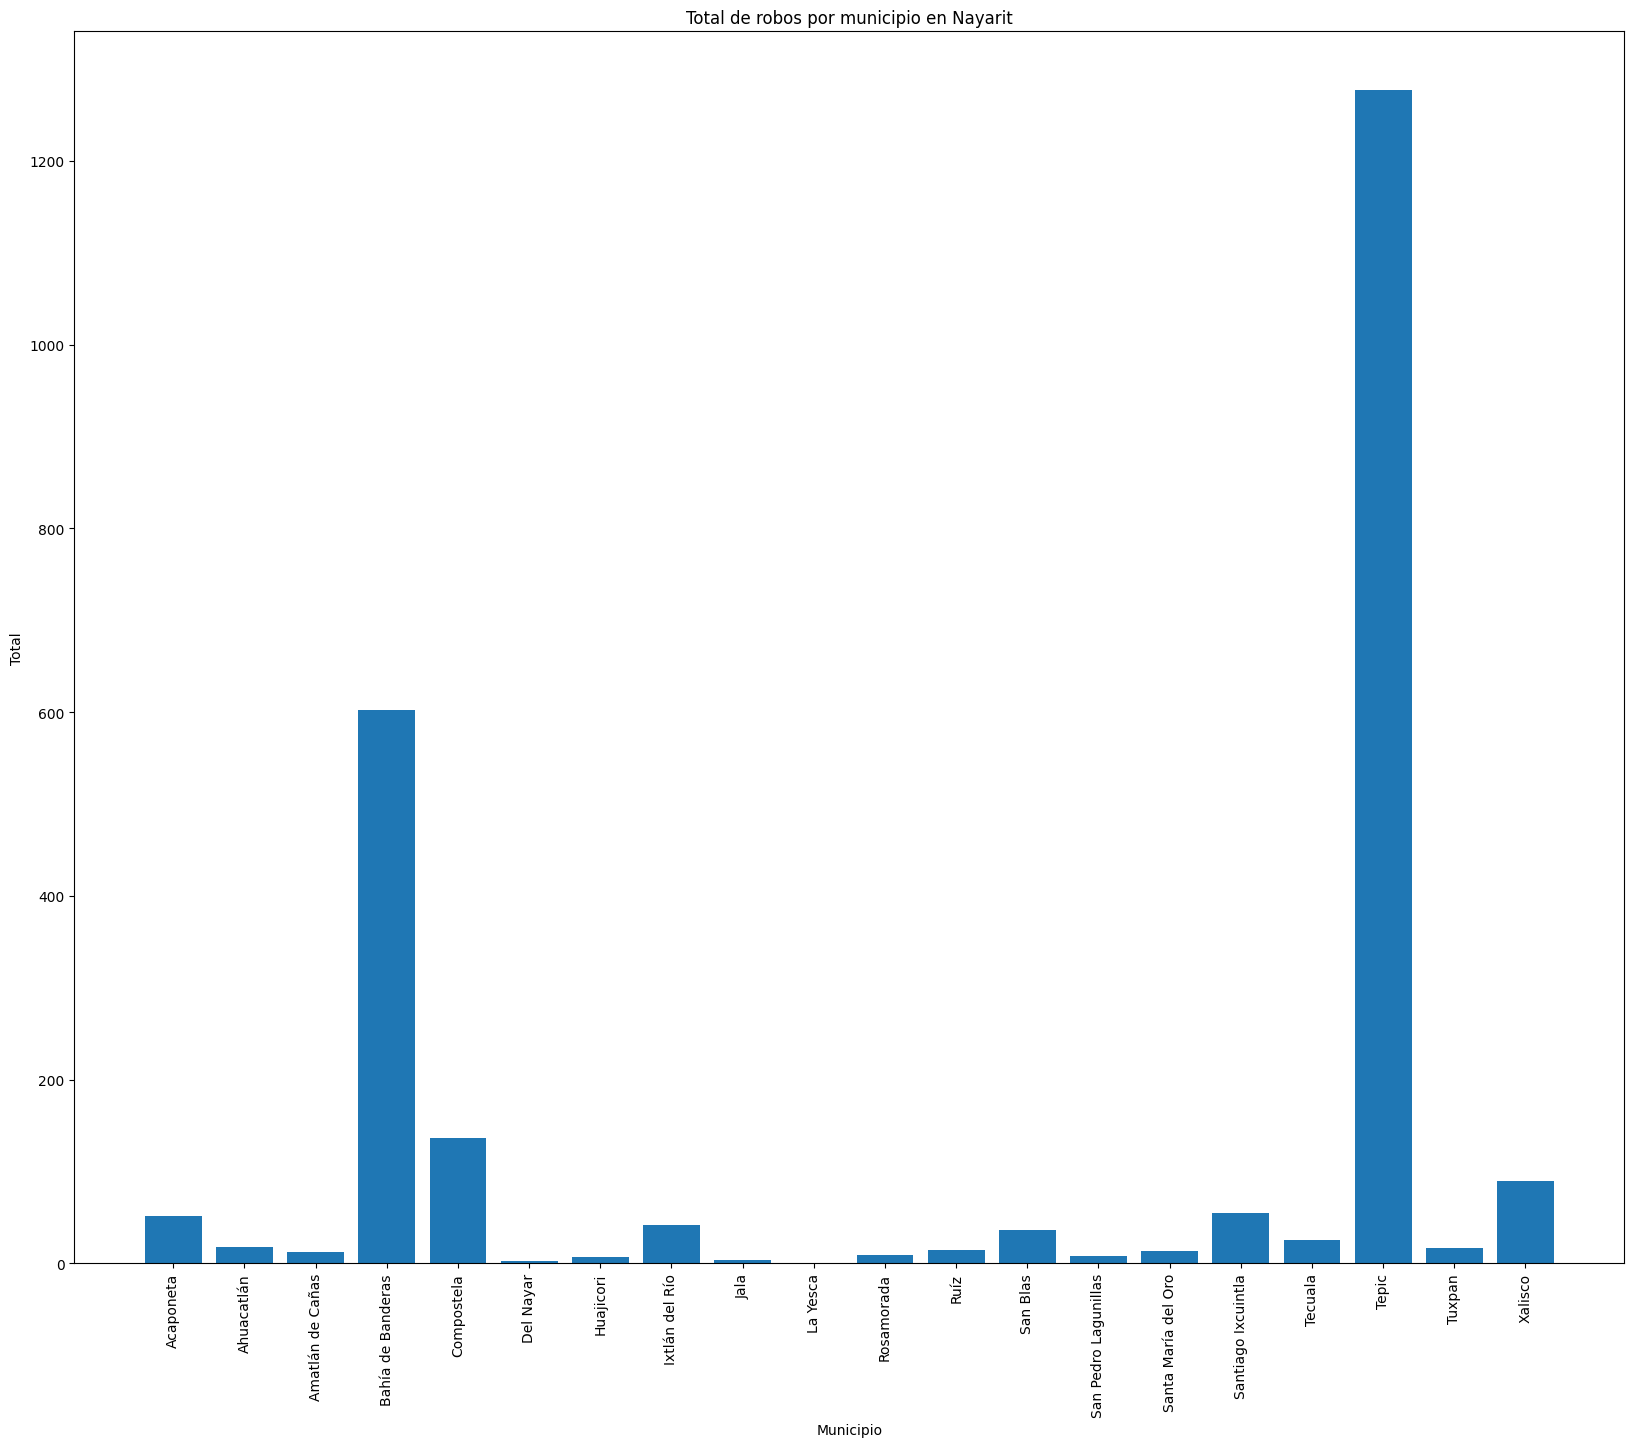

In [123]:
# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(20,16))

# Crear un gráfico de barras
ax.bar(total_rcmunna['Municipio'], total_rcmunna['Total'])

# Ajustar las etiquetas del eje x
ax.set_xticklabels(total_rcmunna['Municipio'], rotation=90)

# Añadir título y etiquetas de los ejes
ax.set_title('Total de robos por municipio en Nayarit')
ax.set_xlabel('Municipio')
ax.set_ylabel('Total')

# Mostrar el gráfico
plt.show()

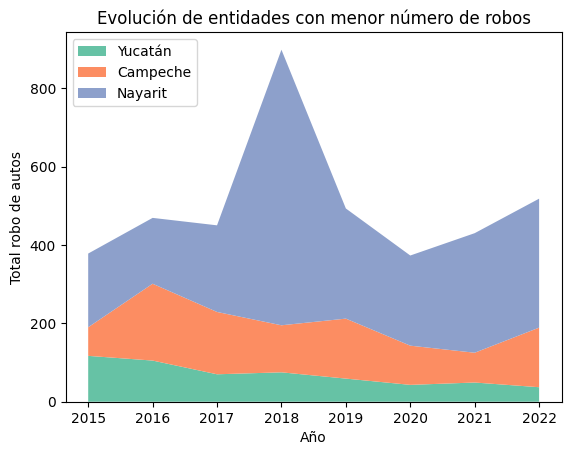

In [124]:
fig, ax = plt.subplots()
pal = sns.color_palette("Set2")
ax.stackplot(ytodo['Año'], ytodo['Total'], camtodo['Total'], natodo['Total'], labels=['Yucatán', 'Campeche', 'Nayarit'], colors=pal)
ax.set_xlabel('Año')
ax.set_ylabel('Total robo de autos')
ax.set_title('Evolución de entidades con menor número de robos')
ax.legend(loc='upper left')

In [125]:
print(df2015b.shape)
print(df2016b.shape)
print(df2017b.shape)
print(df2018b.shape)
print(df2019b.shape)
print(df2020b.shape)
print(df2021b.shape)
print(df2022b.shape)
print(dftodob.shape)

(3862, 21)
(3862, 21)
(4932, 21)
(4942, 21)
(4942, 21)
(4942, 21)
(4956, 21)
(4958, 21)
(37396, 21)


# Datos ENVIPE


Cargamos los datos del año que viene el csv pero es del año anterior

##ENVIPE 2016

In [126]:
# Cargamos los datos del cuestionario final 
tper_vic1_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016/tper_vic1_envipe2016.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2016.head()

<ipython-input-126-bfccb5ba6b82>:2: DtypeWarning:

Columns (114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.



ID_VIV           ID_HOG              ID_PER     UPM  VIV_SEL  HOGAR  \
0  100006.01  0100006.01.01\r  0100006.01.01.03\r  100006        1      1   
1  100006.02  0100006.02.01\r  0100006.02.01.01\r  100006        2      1   
2  100006.03  0100006.03.01\r  0100006.03.01.04\r  100006        3      1   
3  100006.04  0100006.04.01\r  0100006.04.01.01\r  100006        4      1   
4  100006.04  0100006.04.02\r  0100006.04.02.01\r  100006        4      2   

  RESUL_H  R_SEL AREAM  AP4_1  ...  AP5_6_10  AP5_8  FAC_HOG  FAC_ELE  \
0     B\r      3  14\r      1  ...        \r      1      168      841   
1     B\r      1  14\r      3  ...       1\r      1      168      336   
2     B\r      4  14\r      3  ...        \r      3      168      673   
3     A\r      1  14\r      3  ...       2\r      3      168      168   
4     B\r      1    \r      1  ...        \r      1      168      168   

   FAC_HOG_AM  FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0    000168\r    000841\r      U\r        3        2        1  
1    000168\r    000336\r      U\r        3        2        1  
2    000168\r    000673\r      U\r        3        2        1  
3    000168\r    000168\r      U\r        3        2        1  
4          \r          \r      U\r        3        2        1  

[5 rows x 180 columns]

In [127]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 Seguro
# 9 no sabe
tper_vic1_envipe2016['AP4_3_3'].unique()

array([1, 2, 9])

In [128]:
conteo_nueves = (tper_vic1_envipe2016['AP4_3_3'] == 9).sum()
print("El número 9 aparece {} veces en la columna 'AP4_3_3'.".format(conteo_nueves))

El número 9 aparece 2195 veces en la columna 'AP4_3_3'.


In [129]:
#Ahora cargamos el archivo que contiene los datos de las personas y los estados en donde viven
tvivienda_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016/tvivienda_envipe2016.csv', 
                                   encoding='ISO-8859-1', delimiter=',')
tvivienda_envipe2016.head()

ID_VIV     UPM  VIV_SEL  ENT  MUN AREAM  RESULT_V  AP1_1  AP1_2  AP2_1  \
0  100006.01  100006        1    1    1  14\r         2      1      2      7   
1  100006.02  100006        2    1    1  14\r         2      1      2      2   
2  100006.03  100006        3    1    1  14\r         2      3      2      8   
3  100006.04  100006        4    1    1  14\r         1      1      2      2   
4  100006.05  100006        5    1    1  14\r         2      1      2      3   

   AP2_2 AP2_3  NAP2_3  FAC_VIV FAC_VIV_AM DOMINIO  EST_DIS  UPM_DIS  
0      1    \r       1      168   000168\r     U\r        2        1  
1      1    \r       1      168   000168\r     U\r        2        1  
2      1    \r       1      168   000168\r     U\r        2        1  
3      2  02\r       2      168   000168\r     U\r        2        1  
4      1    \r       1      168   000168\r     U\r        2        1

In [130]:
# Comparamos las dimensiones que tienen ambos dfs
print(tper_vic1_envipe2016.shape)
print(tvivienda_envipe2016.shape)

(85744, 180)
(84140, 18)


In [131]:
#Checamos los datos que tienen las columnas que nos interesarn de ambos
print(tper_vic1_envipe2016['AP4_3_3'].unique())
print(tper_vic1_envipe2016['AP4_3_3'].dtype)
print(tvivienda_envipe2016['ENT'].unique())
print(tvivienda_envipe2016['ENT'].dtype)

[1 2 9]
int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
int64


In [132]:
union2016 = tper_vic1_envipe2016.merge(tvivienda_envipe2016[['ID_VIV', 'ENT']], on='ID_VIV', how='left')
union2016.head()

ID_VIV           ID_HOG              ID_PER     UPM  VIV_SEL  HOGAR  \
0  100006.01  0100006.01.01\r  0100006.01.01.03\r  100006        1      1   
1  100006.02  0100006.02.01\r  0100006.02.01.01\r  100006        2      1   
2  100006.03  0100006.03.01\r  0100006.03.01.04\r  100006        3      1   
3  100006.04  0100006.04.01\r  0100006.04.01.01\r  100006        4      1   
4  100006.04  0100006.04.02\r  0100006.04.02.01\r  100006        4      2   

  RESUL_H  R_SEL AREAM  AP4_1  ...  AP5_8  FAC_HOG  FAC_ELE  FAC_HOG_AM  \
0     B\r      3  14\r      1  ...      1      168      841    000168\r   
1     B\r      1  14\r      3  ...      1      168      336    000168\r   
2     B\r      4  14\r      3  ...      3      168      673    000168\r   
3     A\r      1  14\r      3  ...      3      168      168    000168\r   
4     B\r      1    \r      1  ...      1      168      168          \r   

   FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  ENT  
0    000841\r      U\r        3        2        1    1  
1    000336\r      U\r        3        2        1    1  
2    000673\r      U\r        3        2        1    1  
3    000168\r      U\r        3        2        1    1  
4          \r      U\r        3        2        1    1  

[5 rows x 181 columns]

In [133]:
print(union2016.shape)
print(union2016['AP4_3_3'].unique())
print(union2016['ENT'].unique())

(85744, 181)
[1 2 9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]


In [134]:
tper_vic1_envipe2016.tail(15)

ID_VIV           ID_HOG              ID_PER      UPM  VIV_SEL  \
85729  3260792.06  3260792.06.01\r  3260792.06.01.02\r  3260792        6   
85730  3260792.07  3260792.07.01\r  3260792.07.01.01\r  3260792        7   
85731  3260792.08  3260792.08.01\r  3260792.08.01.03\r  3260792        8   
85732  3260792.09  3260792.09.01\r  3260792.09.01.01\r  3260792        9   
85733  3260792.10  3260792.10.01\r  3260792.10.01.01\r  3260792       10   
85734  3260792.11  3260792.11.01\r  3260792.11.01.01\r  3260792       11   
85735  3260792.12  3260792.12.01\r  3260792.12.01.01\r  3260792       12   
85736  3260792.13  3260792.13.01\r  3260792.13.01.01\r  3260792       13   
85737  3260792.14  3260792.14.01\r  3260792.14.01.01\r  3260792       14   
85738  3260792.15  3260792.15.01\r  3260792.15.01.01\r  3260792       15   
85739  3260792.16  3260792.16.01\r  3260792.16.01.04\r  3260792       16   
85740  3260792.17  3260792.17.01\r  3260792.17.01.02\r  3260792       17   
85741  3260792.18  3260792.18.01\r  3260792.18.01.01\r  3260792       18   
85742  3260792.19  3260792.19.01\r  3260792.19.01.02\r  3260792       19   
85743  3260792.20  3260792.20.01\r  3260792.20.01.01\r  3260792       20   

       HOGAR RESUL_H  R_SEL AREAM  AP4_1  ...  AP5_6_10  AP5_8  FAC_HOG  \
85729      1     B\r      2    \r      3  ...        \r      2      218   
85730      1     A\r      1    \r      3  ...        \r      4      218   
85731      1     B\r      3    \r      3  ...        \r      2      218   
85732      1     B\r      1    \r      3  ...       2\r      2      218   
85733      1     B\r      1    \r      3  ...        \r      4      218   
85734      1     B\r      1    \r      3  ...        \r      4      218   
85735      1     B\r      1    \r      3  ...        \r      2      218   
85736      1     B\r      1    \r      3  ...        \r      4      218   
85737      1     B\r      1    \r      3  ...        \r      4      218   
85738      1     B\r      1    \r      3  ...        \r      4      218   
85739      1     B\r      4    \r      3  ...        \r      4      218   
85740      1     B\r      2    \r      3  ...       2\r      2      218   
85741      1     B\r      1    \r      3  ...        \r      3      218   
85742      1     B\r      2    \r      3  ...        \r      3      218   
85743      1     B\r      1    \r      3  ...        \r      4      218   

       FAC_ELE  FAC_HOG_AM  FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
85729      437          \r          \r      R\r        2      595    11906  
85730      218          \r          \r      R\r        2      595    11906  
85731      873          \r          \r      R\r        2      595    11906  
85732      218          \r          \r      R\r        2      595    11906  
85733      218          \r          \r      R\r        2      595    11906  
85734      437          \r          \r      R\r        2      595    11906  
85735      218          \r          \r      R\r        2      595    11906  
85736      218          \r          \r      R\r        2      595    11906  
85737      437          \r          \r      R\r        2      595    11906  
85738      437          \r          \r      R\r        2      595    11906  
85739      873          \r          \r      R\r        2      595    11906  
85740      437          \r          \r      R\r        2      595    11906  
85741      437          \r          \r      R\r        2      595    11906  
85742      437          \r          \r      R\r        2      595    11906  
85743      218          \r          \r      R\r        2      595    11906  

[15 rows x 180 columns]

In [135]:
tvivienda_envipe2016.tail(15)

ID_VIV      UPM  VIV_SEL  ENT  MUN AREAM  RESULT_V  AP1_1  AP1_2  \
84125  3260792.06  3260792        6   32   37    \r         2      1      2   
84126  3260792.07  3260792        7   32   37    \r         1      1      2   
84127  3260792.08  3260792        8   32   37    \r         2      1      2   
84128  3260792.09  3260792        9   32   37    \r         2      1      2   
84129  3260792.10  3260792       10   32   37    \r         2      1      2   
84130  3260792.11  3260792       11   32   37    \r         2      1      1   
84131  3260792.12  3260792       12   32   37    \r         2      1      2   
84132  3260792.13  3260792       13   32   37    \r         2      1      2   
84133  3260792.14  3260792       14   32   37    \r         2      1      2   
84134  3260792.15  3260792       15   32   37    \r         2      1      2   
84135  3260792.16  3260792       16   32   37    \r         2      1      2   
84136  3260792.17  3260792       17   32   37    \r         2      1      2   
84137  3260792.18  3260792       18   32   37    \r         2      1      2   
84138  3260792.19  3260792       19   32   37    \r         2      1      2   
84139  3260792.20  3260792       20   32   37    \r         2      1      2   

       AP2_1  AP2_2 AP2_3  NAP2_3  FAC_VIV FAC_VIV_AM DOMINIO  EST_DIS  \
84125      5      1    \r       1      218         \r     R\r      595   
84126      6      1    \r       1      218         \r     R\r      595   
84127      5      1    \r       1      218         \r     R\r      595   
84128      1      1    \r       1      218         \r     R\r      595   
84129      1      1    \r       1      218         \r     R\r      595   
84130      5      1    \r       1      218         \r     R\r      595   
84131      1      1    \r       1      218         \r     R\r      595   
84132      4      1    \r       1      218         \r     R\r      595   
84133      3      1    \r       1      218         \r     R\r      595   
84134      2      1    \r       1      218         \r     R\r      595   
84135      6      1    \r       1      218         \r     R\r      595   
84136      6      1    \r       1      218         \r     R\r      595   
84137      2      1    \r       1      218         \r     R\r      595   
84138      4      1    \r       1      218         \r     R\r      595   
84139      1      1    \r       1      218         \r     R\r      595   

       UPM_DIS  
84125    11906  
84126    11906  
84127    11906  
84128    11906  
84129    11906  
84130    11906  
84131    11906  
84132    11906  
84133    11906  
84134    11906  
84135    11906  
84136    11906  
84137    11906  
84138    11906  
84139    11906

In [136]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia2016 = union2016[['ENT', 'AP4_3_3']]
Incidencia2016.head(15)

ENT  AP4_3_3
0     1        1
1     1        1
2     1        1
3     1        1
4     1        1
5     1        1
6     1        2
7     1        1
8     1        1
9     1        2
10    1        1
11    1        2
12    1        2
13    1        1
14    1        1

In [137]:
print(Incidencia2016['AP4_3_3'].unique())
print(Incidencia2016.shape)

[1 2 9]
(85744, 2)


In [138]:
# Vamos a quitar los valores que son 9, ya que son pocos y necesitamos quedarnos con los otros datos
#df = df.rename(columns={'Antiguo_Nombre': 'Nuevo_Nombre'}) 
Incidencia2016 = Incidencia2016.loc[Incidencia2016['AP4_3_3'] != 9]
print(Incidencia2016['AP4_3_3'].unique())
print(Incidencia2016.shape)

[1 2]
(83549, 2)


In [139]:
IncidenciaSI2016 = Incidencia2016[['ENT', 'AP4_3_3']]
IncidenciaSI2016['Incidencia'] = 1
IncidenciaSI2016 = IncidenciaSI2016.pivot_table(index='ENT', columns='AP4_3_3', values='Incidencia', 
                                                aggfunc='sum', fill_value=0).reset_index()
IncidenciaSI2016.columns.name = None
IncidenciaSI2016.rename(columns={1: 'IncidenciaS'}, inplace=True)
IncidenciaSI2016.rename(columns={2: 'IncidenciaI'}, inplace=True)
IncidenciaSI2016

ENT  IncidenciaS  IncidenciaI
0     1         1011          785
1     2         1041         1459
2     3         1413         1207
3     4          924         1206
4     5          871         1251
5     6          847         2222
6     7         1450         2145
7     8          862         1678
8     9          296         1635
9    10         1057         1486
10   11          864         1388
11   12          335         2215
12   13         1133         1592
13   14          802         1878
14   15          213         2486
15   16          920         2664
16   17          384         2268
17   18          893          894
18   19          685         1973
19   20          601         2030
20   21         1002         2367
21   22          974         1719
22   23          959         1481
23   24          464         1282
24   25          984         2574
25   26          834          924
26   27          349         2842
27   28          395         2721
28   29          961         1298
29   30          446         3032
30   31         2106         1005
31   32          264         1502

In [140]:
Incidencia2016.loc[(Incidencia2016['ENT'] == 2) & (Incidencia2016['AP4_3_3'] == 2), 'AP4_3_3'].sum()

2918

In [141]:
IncidenciaSI2016['Incidencia Final'] = IncidenciaSI2016['IncidenciaS'] - IncidenciaSI2016['IncidenciaI']
IncidenciaSI2016.head()

ENT  IncidenciaS  IncidenciaI  Incidencia Final
0    1         1011          785               226
1    2         1041         1459              -418
2    3         1413         1207               206
3    4          924         1206              -282
4    5          871         1251              -380

In [142]:
IncidenciaSI2016['Resultado'] = np.where(IncidenciaSI2016['Incidencia Final'] >= 0, 'S', 'I')
IncidenciaSI2016.head()

ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado
0    1         1011          785               226         S
1    2         1041         1459              -418         I
2    3         1413         1207               206         S
3    4          924         1206              -282         I
4    5          871         1251              -380         I

In [143]:
factor_inseguridad = []
for i, row in IncidenciaSI2016.iterrows():
  max = row[["IncidenciaS","IncidenciaI"]].max()
  factor_inseguridad.append((row["Incidencia Final"] * 100)/max)

IncidenciaSI2016["Factor_Inseguridad"] = factor_inseguridad
IncidenciaSI2016

ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0     1         1011          785               226         S   
1     2         1041         1459              -418         I   
2     3         1413         1207               206         S   
3     4          924         1206              -282         I   
4     5          871         1251              -380         I   
5     6          847         2222             -1375         I   
6     7         1450         2145              -695         I   
7     8          862         1678              -816         I   
8     9          296         1635             -1339         I   
9    10         1057         1486              -429         I   
10   11          864         1388              -524         I   
11   12          335         2215             -1880         I   
12   13         1133         1592              -459         I   
13   14          802         1878             -1076         I   
14   15          213         2486             -2273         I   
15   16          920         2664             -1744         I   
16   17          384         2268             -1884         I   
17   18          893          894                -1         I   
18   19          685         1973             -1288         I   
19   20          601         2030             -1429         I   
20   21         1002         2367             -1365         I   
21   22          974         1719              -745         I   
22   23          959         1481              -522         I   
23   24          464         1282              -818         I   
24   25          984         2574             -1590         I   
25   26          834          924               -90         I   
26   27          349         2842             -2493         I   
27   28          395         2721             -2326         I   
28   29          961         1298              -337         I   
29   30          446         3032             -2586         I   
30   31         2106         1005              1101         S   
31   32          264         1502             -1238         I   

    Factor_Inseguridad  
0            22.354105  
1           -28.649760  
2            14.578910  
3           -23.383085  
4           -30.375699  
5           -61.881188  
6           -32.400932  
7           -48.629321  
8           -81.896024  
9           -28.869448  
10          -37.752161  
11          -84.875847  
12          -28.831658  
13          -57.294995  
14          -91.432019  
15          -65.465465  
16          -83.068783  
17           -0.111857  
18          -65.281298  
19          -70.394089  
20          -57.667934  
21          -43.339151  
22          -35.246455  
23          -63.806552  
24          -61.771562  
25           -9.740260  
26          -87.719916  
27          -85.483278  
28          -25.963020  
29          -85.290237  
30           52.279202  
31          -82.423435

In [144]:
IncidenciaSI2016.insert(0, 'Año', 2015)
IncidenciaSI2016

Año  ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0   2015    1         1011          785               226         S   
1   2015    2         1041         1459              -418         I   
2   2015    3         1413         1207               206         S   
3   2015    4          924         1206              -282         I   
4   2015    5          871         1251              -380         I   
5   2015    6          847         2222             -1375         I   
6   2015    7         1450         2145              -695         I   
7   2015    8          862         1678              -816         I   
8   2015    9          296         1635             -1339         I   
9   2015   10         1057         1486              -429         I   
10  2015   11          864         1388              -524         I   
11  2015   12          335         2215             -1880         I   
12  2015   13         1133         1592              -459         I   
13  2015   14          802         1878             -1076         I   
14  2015   15          213         2486             -2273         I   
15  2015   16          920         2664             -1744         I   
16  2015   17          384         2268             -1884         I   
17  2015   18          893          894                -1         I   
18  2015   19          685         1973             -1288         I   
19  2015   20          601         2030             -1429         I   
20  2015   21         1002         2367             -1365         I   
21  2015   22          974         1719              -745         I   
22  2015   23          959         1481              -522         I   
23  2015   24          464         1282              -818         I   
24  2015   25          984         2574             -1590         I   
25  2015   26          834          924               -90         I   
26  2015   27          349         2842             -2493         I   
27  2015   28          395         2721             -2326         I   
28  2015   29          961         1298              -337         I   
29  2015   30          446         3032             -2586         I   
30  2015   31         2106         1005              1101         S   
31  2015   32          264         1502             -1238         I   

    Factor_Inseguridad  
0            22.354105  
1           -28.649760  
2            14.578910  
3           -23.383085  
4           -30.375699  
5           -61.881188  
6           -32.400932  
7           -48.629321  
8           -81.896024  
9           -28.869448  
10          -37.752161  
11          -84.875847  
12          -28.831658  
13          -57.294995  
14          -91.432019  
15          -65.465465  
16          -83.068783  
17           -0.111857  
18          -65.281298  
19          -70.394089  
20          -57.667934  
21          -43.339151  
22          -35.246455  
23          -63.806552  
24          -61.771562  
25           -9.740260  
26          -87.719916  
27          -85.483278  
28          -25.963020  
29          -85.290237  
30           52.279202  
31          -82.423435

In [145]:
# Vamos a ponerle nombre a los números de las entidades, usaremos los mismos nombres que los de los datos de SESNSP
IncidenciaSI2016['ENT'] = IncidenciaSI2016['ENT'].astype(str)
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '1', 'ENT'] = 'Aguascalientes'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '2', 'ENT'] = 'Baja California'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '3', 'ENT'] = 'Baja California Sur'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '4', 'ENT'] = 'Campeche'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '5', 'ENT'] = 'Coahuila de Zaragoza'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '6', 'ENT'] = 'Colima'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '7', 'ENT'] = 'Chiapas'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '8', 'ENT'] = 'Chihuahua'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '9', 'ENT'] = 'Ciudad de México'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '10', 'ENT'] = 'Durango'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '11', 'ENT'] = 'Guanajuato'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '12', 'ENT'] = 'Guerrero'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '13', 'ENT'] = 'Hidalgo'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '14', 'ENT'] = 'Jalisco'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '15', 'ENT'] = 'México'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '16', 'ENT'] = 'Michoacán de Ocampo'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '17', 'ENT'] = 'Morelos'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '18', 'ENT'] = 'Nayarit'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '19', 'ENT'] = 'Nuevo León'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '20', 'ENT'] = 'Oaxaca'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '21', 'ENT'] = 'Puebla'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '22', 'ENT'] = 'Querétaro'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '23', 'ENT'] = 'Quintana Roo'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '24', 'ENT'] = 'San Luis Potosí'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '25', 'ENT'] = 'Sinaloa'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '26', 'ENT'] = 'Sonora'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '27', 'ENT'] = 'Tabasco'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '28', 'ENT'] = 'Tamaulipas'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '29', 'ENT'] = 'Tlaxcala'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '30', 'ENT'] = 'Veracruz de Ignacio de la Llave'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '31', 'ENT'] = 'Yucatán'
IncidenciaSI2016.loc[IncidenciaSI2016['ENT'] == '32', 'ENT'] = 'Zacatecas'
IncidenciaSI2016

Año                              ENT  IncidenciaS  IncidenciaI  \
0   2015                   Aguascalientes         1011          785   
1   2015                  Baja California         1041         1459   
2   2015              Baja California Sur         1413         1207   
3   2015                         Campeche          924         1206   
4   2015             Coahuila de Zaragoza          871         1251   
5   2015                           Colima          847         2222   
6   2015                          Chiapas         1450         2145   
7   2015                        Chihuahua          862         1678   
8   2015                 Ciudad de México          296         1635   
9   2015                          Durango         1057         1486   
10  2015                       Guanajuato          864         1388   
11  2015                         Guerrero          335         2215   
12  2015                          Hidalgo         1133         1592   
13  2015                          Jalisco          802         1878   
14  2015                           México          213         2486   
15  2015              Michoacán de Ocampo          920         2664   
16  2015                          Morelos          384         2268   
17  2015                          Nayarit          893          894   
18  2015                       Nuevo León          685         1973   
19  2015                           Oaxaca          601         2030   
20  2015                           Puebla         1002         2367   
21  2015                        Querétaro          974         1719   
22  2015                     Quintana Roo          959         1481   
23  2015                  San Luis Potosí          464         1282   
24  2015                          Sinaloa          984         2574   
25  2015                           Sonora          834          924   
26  2015                          Tabasco          349         2842   
27  2015                       Tamaulipas          395         2721   
28  2015                         Tlaxcala          961         1298   
29  2015  Veracruz de Ignacio de la Llave          446         3032   
30  2015                          Yucatán         2106         1005   
31  2015                        Zacatecas          264         1502   

    Incidencia Final Resultado  Factor_Inseguridad  
0                226         S           22.354105  
1               -418         I          -28.649760  
2                206         S           14.578910  
3               -282         I          -23.383085  
4               -380         I          -30.375699  
5              -1375         I          -61.881188  
6               -695         I          -32.400932  
7               -816         I          -48.629321  
8              -1339         I          -81.896024  
9               -429         I          -28.869448  
10              -524         I          -37.752161  
11             -1880         I          -84.875847  
12              -459         I          -28.831658  
13             -1076         I          -57.294995  
14             -2273         I          -91.432019  
15             -1744         I          -65.465465  
16             -1884         I          -83.068783  
17                -1         I           -0.111857  
18             -1288         I          -65.281298  
19             -1429         I          -70.394089  
20             -1365         I          -57.667934  
21              -745         I          -43.339151  
22              -522         I          -35.246455  
23              -818         I          -63.806552  
24             -1590         I          -61.771562  
25               -90         I           -9.740260  
26             -2493         I          -87.719916  
27             -2326         I          -85.483278  
28              -337         I          -25.963020  
29             -2586         I          -85.290237  
30              11

In [146]:
IncidenciaSI2016 = IncidenciaSI2016.rename(columns={'ENT': 'CVE_ENT'})

In [147]:
env2016 = IncidenciaSI2016.pivot(index='Año', columns='CVE_ENT')
env2016.columns.name = None
env2016

IncidenciaS                                                       \
CVE_ENT Aguascalientes Baja California Baja California Sur Campeche Chiapas   
Año                                                                           
2015              1011            1041                1413      924    1450   

                                                                        ...  \
CVE_ENT Chihuahua Ciudad de México Coahuila de Zaragoza Colima Durango  ...   
Año                                                                     ...   
2015          862              296                  871    847    1057  ...   

        Factor_Inseguridad                                                 \
CVE_ENT       Quintana Roo San Luis Potosí    Sinaloa   Sonora    Tabasco   
Año                                                                         
2015            -35.246455      -63.806552 -61.771562 -9.74026 -87.719916   

                                                                         \
CVE_ENT Tamaulipas  Tlaxcala Veracruz de Ignacio de la Llave    Yucatán   
Año                                                                       
2015    -85.483278 -25.96302                      -85.290237  52.279202   

                    
CVE_ENT  Zacatecas  
Año                 
2015    -82.423435  

[1 rows x 160 columns]

In [148]:
env2016['Incidencia Final']

CVE_ENT  Aguascalientes  Baja California  Baja California Sur  Campeche  \
Año                                                                       
2015                226             -418                  206      -282   

CVE_ENT  Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  Colima  \
Año                                                                           
2015        -695       -816             -1339                  -380   -1375   

CVE_ENT  Durango  ...  Quintana Roo  San Luis Potosí  Sinaloa  Sonora  \
Año               ...                                                   
2015        -429  ...          -522             -818    -1590     -90   

CVE_ENT  Tabasco  Tamaulipas  Tlaxcala  Veracruz de Ignacio de la Llave  \
Año                                                                       
2015       -2493       -2326      -337                            -2586   

CVE_ENT  Yucatán  Zacatecas  
Año                          
2015        1101      -1238  

[1 rows x 32 columns]

 Durante 2021, para protegerse de la delincuencia, ¿en este hogar se realizó algún tipo de medida como…
 contratar seguros? AP4_11_07

In [433]:
seguros2016 = tper_vic1_envipe2016[['AP4_11_07']]
seguros2016.head()

AP4_11_07
0          2
1          2
2          2
3          2
4          2

In [437]:
print(seguros2016['AP4_11_07'].unique())
print(seguros2016['AP4_11_07'].dtype)

[2 1 9]
int64


In [440]:
print('Total de sí (1):', seguros2016.loc[seguros2016['AP4_11_07'] == 1].sum())
print('Total de no (2):', seguros2016.loc[seguros2016['AP4_11_07'] == 2].sum())
print('Total de no sabe (9):', seguros2016.loc[seguros2016['AP4_11_07'] == 9].sum())

Total de sí (1): AP4_11_07    1400
dtype: int64
Total de no (2): AP4_11_07    168216
dtype: int64
Total de no sabe (9): AP4_11_07    2124
dtype: int64


In [459]:
# Creamos una lista con los años que nos interesan
anios = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Creamos un diccionario vacío para cada año
datos_por_anio = [{'Si': '', 'No': '', 'No_sabe': ''} for _ in range(len(anios))]

# Creamos el dataframe con los años y las columnas correspondientes
seguros = pd.DataFrame(datos_por_anio, index=anios, columns=['Si', 'No', 'No_sabe'])
seguros = seguros.reset_index().rename_axis(None, axis=1)
seguros = seguros.rename(columns={'index': 'Año'})
seguros

Año Si No No_sabe
0  2015              
1  2016              
2  2017              
3  2018              
4  2019              
5  2020              
6  2021

In [460]:
seguros.loc[0, 'Si'] = 1400
seguros.loc[0, 'No'] = 168216
seguros.loc[0, 'No_sabe'] = 2124
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016                      
2  2017                      
3  2018                      
4  2019                      
5  2020                      
6  2021

##ENVIPE 2017

In [149]:
# Cargamos los datos del cuestionario final 
tper_vic1_envipe2017 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2017/tper_vic1_envipe2017.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2017.head()

ID_VIV           ID_HOG              ID_PER     UPM  VIV_SEL  HOGAR  \
0  100008.01  0100008.01.01\r  0100008.01.01.01\r  100008        1      1   
1  100008.02  0100008.02.01\r  0100008.02.01.02\r  100008        2      1   
2  100008.04  0100008.04.01\r  0100008.04.01.01\r  100008        4      1   
3  100008.05  0100008.05.01\r  0100008.05.01.01\r  100008        5      1   
4  100022.01  0100022.01.01\r  0100022.01.01.03\r  100022        1      1   

  RESUL_H  R_SEL  SEXO  EDAD  ... AP5_6_10  AP5_8 FAC_HOG  FAC_ELE FAC_HOG_AM  \
0     B\r      1     1    40  ...      4\r      9     204      408   000204\r   
1     B\r      2     2    70  ...      2\r      4     204      611   000204\r   
2     B\r      1     1    85  ...       \r      3     204      408   000204\r   
3     A\r      1     1    28  ...      2\r      1     204      408   000204\r   
4     A\r      3     1    22  ...       \r      4     198      595   000198\r   

   FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0    000408\r      U\r        4        3        1  
1    000611\r      U\r        4        3        1  
2    000408\r      U\r        4        3        1  
3    000408\r      U\r        4        3        1  
4    000595\r      U\r        3        2        2  

[5 rows x 186 columns]

In [150]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 inseguro
# 9 no sabe
tper_vic1_envipe2017['AP4_3_3'].unique()

array([1, 2, 9])

In [151]:
conteo_nueves = (tper_vic1_envipe2017['AP4_3_3'] == 9).sum()
print("El número 9 aparece {} veces en la columna 'AP4_3_3'.".format(conteo_nueves))

El número 9 aparece 1966 veces en la columna 'AP4_3_3'.


In [152]:
tper_vic1_envipe2017['CVE_ENT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [153]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia2017 = tper_vic1_envipe2017[['CVE_ENT', 'AP4_3_3']]
Incidencia2017.shape

(92551, 2)

In [154]:
# Vamos a quitar los valores que son 9, ya que son pocos y necesitamos quedarnos con los otros datos
#df = df.rename(columns={'Antiguo_Nombre': 'Nuevo_Nombre'}) 
Incidencia2017 = Incidencia2017.loc[Incidencia2017['AP4_3_3'] != 9]
print(Incidencia2017['AP4_3_3'].unique())
print(Incidencia2017.shape)

[1 2]
(90585, 2)


In [155]:
IncidenciaSI2017 = Incidencia2017[['CVE_ENT', 'AP4_3_3']]
IncidenciaSI2017['Incidencia'] = 1
IncidenciaSI2017 = IncidenciaSI2017.pivot_table(index='CVE_ENT', columns='AP4_3_3', values='Incidencia', 
                                                aggfunc='sum', fill_value=0).reset_index()
IncidenciaSI2017.columns.name = None
IncidenciaSI2017.rename(columns={1: 'IncidenciaS'}, inplace=True)
IncidenciaSI2017.rename(columns={2: 'IncidenciaI'}, inplace=True)
IncidenciaSI2017

CVE_ENT  IncidenciaS  IncidenciaI
0         1         1017          802
1         2         1045         1524
2         3          972         1651
3         4          875         1297
4         5         1028         1527
5         6          763         2362
6         7         1353         2237
7         8          823         2529
8         9          830         5317
9        10         1102         1649
10       11          554         1799
11       12          385         2113
12       13         1199         1539
13       14          894         1821
14       15          246         2444
15       16          740         2868
16       17          348         2327
17       18          753         1090
18       19          765         1870
19       20          644         2082
20       21         1052         2457
21       22         1180         1506
22       23          787         1755
23       24          399         1316
24       25          907         2732
25       26          773         1037
26       27          344         2721
27       28          497         3194
28       29          902         1360
29       30          310         3203
30       31         2246          884
31       32          265         1574

In [156]:
IncidenciaSI2017['Incidencia Final'] = IncidenciaSI2017['IncidenciaS'] - IncidenciaSI2017['IncidenciaI']
IncidenciaSI2017.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final
0        1         1017          802               215
1        2         1045         1524              -479
2        3          972         1651              -679
3        4          875         1297              -422
4        5         1028         1527              -499

In [157]:
IncidenciaSI2017['Resultado'] = np.where(IncidenciaSI2017['Incidencia Final'] >= 0, 'S', 'I')
IncidenciaSI2017.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado
0        1         1017          802               215         S
1        2         1045         1524              -479         I
2        3          972         1651              -679         I
3        4          875         1297              -422         I
4        5         1028         1527              -499         I

In [158]:
factor_inseguridad = []
for i, row in IncidenciaSI2017.iterrows():
  max = row[["IncidenciaS","IncidenciaI"]].max()
  factor_inseguridad.append((row["Incidencia Final"] * 100)/max)

IncidenciaSI2017["Factor_Inseguridad"] = factor_inseguridad
IncidenciaSI2017.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0        1         1017          802               215         S   
1        2         1045         1524              -479         I   
2        3          972         1651              -679         I   
3        4          875         1297              -422         I   
4        5         1028         1527              -499         I   

   Factor_Inseguridad  
0           21.140610  
1          -31.430446  
2          -41.126590  
3          -32.536623  
4          -32.678454

In [159]:
IncidenciaSI2017.insert(0, 'Año', 2016)
IncidenciaSI2017

Año  CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0   2016        1         1017          802               215         S   
1   2016        2         1045         1524              -479         I   
2   2016        3          972         1651              -679         I   
3   2016        4          875         1297              -422         I   
4   2016        5         1028         1527              -499         I   
5   2016        6          763         2362             -1599         I   
6   2016        7         1353         2237              -884         I   
7   2016        8          823         2529             -1706         I   
8   2016        9          830         5317             -4487         I   
9   2016       10         1102         1649              -547         I   
10  2016       11          554         1799             -1245         I   
11  2016       12          385         2113             -1728         I   
12  2016       13         1199         1539              -340         I   
13  2016       14          894         1821              -927         I   
14  2016       15          246         2444             -2198         I   
15  2016       16          740         2868             -2128         I   
16  2016       17          348         2327             -1979         I   
17  2016       18          753         1090              -337         I   
18  2016       19          765         1870             -1105         I   
19  2016       20          644         2082             -1438         I   
20  2016       21         1052         2457             -1405         I   
21  2016       22         1180         1506              -326         I   
22  2016       23          787         1755              -968         I   
23  2016       24          399         1316              -917         I   
24  2016       25          907         2732             -1825         I   
25  2016       26          773         1037              -264         I   
26  2016       27          344         2721             -2377         I   
27  2016       28          497         3194             -2697         I   
28  2016       29          902         1360              -458         I   
29  2016       30          310         3203             -2893         I   
30  2016       31         2246          884              1362         S   
31  2016       32          265         1574             -1309         I   

    Factor_Inseguridad  
0            21.140610  
1           -31.430446  
2           -41.126590  
3           -32.536623  
4           -32.678454  
5           -67.696867  
6           -39.517211  
7           -67.457493  
8           -84.389693  
9           -33.171619  
10          -69.205114  
11          -81.779460  
12          -22.092268  
13          -50.906096  
14          -89.934534  
15          -74.198047  
16          -85.045122  
17          -30.917431  
18          -59.090909  
19          -69.068204  
20          -57.183557  
21          -21.646746  
22          -55.156695  
23          -69.680851  
24          -66.800878  
25          -25.458052  
26          -87.357589  
27          -84.439574  
28          -33.676471  
29          -90.321574  
30           60.641140  
31          -83.163914

In [160]:
IncidenciaSI2017['CVE_ENT'] = IncidenciaSI2017['CVE_ENT'].astype(str)

In [161]:
# Vamos a ponerle nombre a los números de las entidades, usaremos los mismos nombres que los de los datos de SESNSP
IncidenciaSI2017['CVE_ENT'] = IncidenciaSI2017['CVE_ENT'].astype(str)

IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '1', 'CVE_ENT'] = 'Aguascalientes'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '2', 'CVE_ENT'] = 'Baja California'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '3', 'CVE_ENT'] = 'Baja California Sur'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '4', 'CVE_ENT'] = 'Campeche'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '5', 'CVE_ENT'] = 'Coahuila de Zaragoza'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '6', 'CVE_ENT'] = 'Colima'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '7', 'CVE_ENT'] = 'Chiapas'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '8', 'CVE_ENT'] = 'Chihuahua'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '9', 'CVE_ENT'] = 'Ciudad de México'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '10', 'CVE_ENT'] = 'Durango'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '11', 'CVE_ENT'] = 'Guanajuato'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '12', 'CVE_ENT'] = 'Guerrero'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '13', 'CVE_ENT'] = 'Hidalgo'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '14', 'CVE_ENT'] = 'Jalisco'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '15', 'CVE_ENT'] = 'México'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '16', 'CVE_ENT'] = 'Michoacán de Ocampo'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '17', 'CVE_ENT'] = 'Morelos'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '18', 'CVE_ENT'] = 'Nayarit'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '19', 'CVE_ENT'] = 'Nuevo León'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '20', 'CVE_ENT'] = 'Oaxaca'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '21', 'CVE_ENT'] = 'Puebla'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '22', 'CVE_ENT'] = 'Querétaro'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '23', 'CVE_ENT'] = 'Quintana Roo'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '24', 'CVE_ENT'] = 'San Luis Potosí'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '25', 'CVE_ENT'] = 'Sinaloa'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '26', 'CVE_ENT'] = 'Sonora'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '27', 'CVE_ENT'] = 'Tabasco'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '28', 'CVE_ENT'] = 'Tamaulipas'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '29', 'CVE_ENT'] = 'Tlaxcala'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '30', 'CVE_ENT'] = 'Veracruz de Ignacio de la Llave'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '31', 'CVE_ENT'] = 'Yucatán'
IncidenciaSI2017.loc[IncidenciaSI2017['CVE_ENT'] == '32', 'CVE_ENT'] = 'Zacatecas'

In [162]:
IncidenciaSI2017

Año                          CVE_ENT  IncidenciaS  IncidenciaI  \
0   2016                   Aguascalientes         1017          802   
1   2016                  Baja California         1045         1524   
2   2016              Baja California Sur          972         1651   
3   2016                         Campeche          875         1297   
4   2016             Coahuila de Zaragoza         1028         1527   
5   2016                           Colima          763         2362   
6   2016                          Chiapas         1353         2237   
7   2016                        Chihuahua          823         2529   
8   2016                 Ciudad de México          830         5317   
9   2016                          Durango         1102         1649   
10  2016                       Guanajuato          554         1799   
11  2016                         Guerrero          385         2113   
12  2016                          Hidalgo         1199         1539   
13  2016                          Jalisco          894         1821   
14  2016                           México          246         2444   
15  2016              Michoacán de Ocampo          740         2868   
16  2016                          Morelos          348         2327   
17  2016                          Nayarit          753         1090   
18  2016                       Nuevo León          765         1870   
19  2016                           Oaxaca          644         2082   
20  2016                           Puebla         1052         2457   
21  2016                        Querétaro         1180         1506   
22  2016                     Quintana Roo          787         1755   
23  2016                  San Luis Potosí          399         1316   
24  2016                          Sinaloa          907         2732   
25  2016                           Sonora          773         1037   
26  2016                          Tabasco          344         2721   
27  2016                       Tamaulipas          497         3194   
28  2016                         Tlaxcala          902         1360   
29  2016  Veracruz de Ignacio de la Llave          310         3203   
30  2016                          Yucatán         2246          884   
31  2016                        Zacatecas          265         1574   

    Incidencia Final Resultado  Factor_Inseguridad  
0                215         S           21.140610  
1               -479         I          -31.430446  
2               -679         I          -41.126590  
3               -422         I          -32.536623  
4               -499         I          -32.678454  
5              -1599         I          -67.696867  
6               -884         I          -39.517211  
7              -1706         I          -67.457493  
8              -4487         I          -84.389693  
9               -547         I          -33.171619  
10             -1245         I          -69.205114  
11             -1728         I          -81.779460  
12              -340         I          -22.092268  
13              -927         I          -50.906096  
14             -2198         I          -89.934534  
15             -2128         I          -74.198047  
16             -1979         I          -85.045122  
17              -337         I          -30.917431  
18             -1105         I          -59.090909  
19             -1438         I          -69.068204  
20             -1405         I          -57.183557  
21              -326         I          -21.646746  
22              -968         I          -55.156695  
23              -917         I          -69.680851  
24             -1825         I          -66.800878  
25              -264         I          -25.458052  
26             -2377         I          -87.357589  
27             -2697         I          -84.439574  
28              -458         I          -33.676471  
29             -2893         I          -90.321574  
30              13

In [163]:
env2017 = IncidenciaSI2017.pivot(index='Año', columns='CVE_ENT')
env2017.columns.name = None
env2017

IncidenciaS                                                       \
CVE_ENT Aguascalientes Baja California Baja California Sur Campeche Chiapas   
Año                                                                           
2016              1017            1045                 972      875    1353   

                                                                        ...  \
CVE_ENT Chihuahua Ciudad de México Coahuila de Zaragoza Colima Durango  ...   
Año                                                                     ...   
2016          823              830                 1028    763    1102  ...   

        Factor_Inseguridad                                                   \
CVE_ENT       Quintana Roo San Luis Potosí    Sinaloa     Sonora    Tabasco   
Año                                                                           
2016            -55.156695      -69.680851 -66.800878 -25.458052 -87.357589   

                                                                         \
CVE_ENT Tamaulipas   Tlaxcala Veracruz de Ignacio de la Llave   Yucatán   
Año                                                                       
2016    -84.439574 -33.676471                      -90.321574  60.64114   

                    
CVE_ENT  Zacatecas  
Año                 
2016    -83.163914  

[1 rows x 160 columns]

Durante 2017, para protegerse de la delincuencia, ¿en este hogar se realizó algún tipo de medida como…
 contratar seguros? AP4_11_07

In [444]:
seguros2017 = tper_vic1_envipe2017[['AP4_11_07']]
seguros2017.head()

AP4_11_07
0          2
1          2
2          2
3          2
4          2

In [445]:
print(seguros2017['AP4_11_07'].unique())
print(seguros2017['AP4_11_07'].dtype)

[2 1 9]
int64


In [446]:
print('Total de sí (1):', seguros2017.loc[seguros2017['AP4_11_07'] == 1].sum())
print('Total de no (2):', seguros2017.loc[seguros2017['AP4_11_07'] == 2].sum())
print('Total de no sabe (9):', seguros2017.loc[seguros2017['AP4_11_07'] == 9].sum())

Total de sí (1): AP4_11_07    1580
dtype: int64
Total de no (2): AP4_11_07    181366
dtype: int64
Total de no sabe (9): AP4_11_07    2592
dtype: int64


In [461]:
seguros.loc[1, 'Si'] = 1580
seguros.loc[1, 'No'] = 181366
seguros.loc[1, 'No_sabe'] = 2592
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016  1580  181366    2592
2  2017                      
3  2018                      
4  2019                      
5  2020                      
6  2021

##ENVIPE 2018


In [164]:
# Cargamos los datos del cuestionario final 
tper_vic1_envipe2018 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2018/tper_vic1_envipe_2018.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2018.head()

ï»¿ID_VIV           ID_HOG              ID_PER     UPM  VIV_SEL  HOGAR  \
0  100008.01  0100008.01.01\r  0100008.01.01.04\r  100008        1      1   
1  100008.02  0100008.02.01\r  0100008.02.01.01\r  100008        2      1   
2  100008.04  0100008.04.01\r  0100008.04.01.02\r  100008        4      1   
3  100008.05  0100008.05.01\r  0100008.05.01.01\r  100008        5      1   
4  100022.02  0100022.02.01\r  0100022.02.01.01\r  100022        2      1   

  RESUL_H  R_SEL  SEXO  EDAD  ... AP5_8  FAC_HOG FAC_ELE  FAC_HOG_AM  \
0     B\r      4     2    37  ...     3      226     903    000226\r   
1     B\r      1     1    68  ...     9      226     226    000226\r   
2     B\r      2     1    25  ...     3      226     452    000226\r   
3     B\r      1     2    56  ...     4      226     677    000226\r   
4     A\r      1     2    41  ...     4      215     215    000215\r   

  FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  llave  
0   000903\r      U\r        4        3        1  1.001  
1   000226\r      U\r        4        3        1  1.001  
2   000452\r      U\r        4        3        1  1.001  
3   000677\r      U\r        4        3        1  1.001  
4   000215\r      U\r        3        2        2  1.001  

[5 rows x 187 columns]

In [165]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 Seguro
# 9 no sabe
tper_vic1_envipe2018['AP4_3_3'].unique()

array([1, 2, 9])

In [166]:
conteo_nueves = (tper_vic1_envipe2018['AP4_3_3'] == 9).sum()
print("El número 9 aparece {} veces en la columna 'AP4_3_3'.".format(conteo_nueves))

El número 9 aparece 1787 veces en la columna 'AP4_3_3'.


In [167]:
tper_vic1_envipe2018['CVE_ENT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [168]:
print(tper_vic1_envipe2018.shape)

(91541, 187)


In [169]:
#Checamos los datos que tienen las columnas que nos interesarn de ambos
print(tper_vic1_envipe2018['AP4_3_3'].unique())
print(tper_vic1_envipe2018['AP4_3_3'].dtype)
print(tper_vic1_envipe2018['CVE_ENT'].unique())
print(tper_vic1_envipe2018['CVE_ENT'].dtype)

[1 2 9]
int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
int64


In [170]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia2018 = tper_vic1_envipe2018[['CVE_ENT', 'AP4_3_3']]
Incidencia2018.head(15)

CVE_ENT  AP4_3_3
0         1        1
1         1        2
2         1        1
3         1        2
4         1        2
5         1        2
6         1        2
7         1        1
8         1        2
9         1        2
10        1        1
11        1        2
12        1        2
13        1        2
14        1        2

In [171]:
# Vamos a quitar los valores que son 9, ya que son pocos y necesitamos quedarnos con los otros datos
#df = df.rename(columns={'Antiguo_Nombre': 'Nuevo_Nombre'}) 
Incidencia2018 = Incidencia2018.loc[Incidencia2018['AP4_3_3'] != 9]
print(Incidencia2018['AP4_3_3'].unique())
print(Incidencia2018.shape)

[1 2]
(89754, 2)


In [172]:
IncidenciaSI2018 = Incidencia2018[['CVE_ENT', 'AP4_3_3']]
IncidenciaSI2018['Incidencia'] = 1
IncidenciaSI2018 = IncidenciaSI2018.pivot_table(index='CVE_ENT', columns='AP4_3_3', values='Incidencia', 
                                                aggfunc='sum', fill_value=0).reset_index()
IncidenciaSI2018.columns.name = None
IncidenciaSI2018.rename(columns={1: 'IncidenciaS'}, inplace=True)
IncidenciaSI2018.rename(columns={2: 'IncidenciaI'}, inplace=True)
IncidenciaSI2018

CVE_ENT  IncidenciaS  IncidenciaI
0         1          659         1099
1         2          664         1874
2         3          909         1759
3         4          882         1313
4         5          922         1676
5         6          582         2498
6         7          933         2617
7         8          607         2719
8         9          639         5013
9        10         1067         1745
10       11          345         2002
11       12          332         2117
12       13          853         1652
13       14          701         1988
14       15          227         2394
15       16          543         3111
16       17          330         2298
17       18          280         1557
18       19          642         2021
19       20          619         2169
20       21          630         2893
21       22          944         1692
22       23          617         1899
23       24          260         1472
24       25          987         2692
25       26          594         1212
26       27          243         2871
27       28          467         3247
28       29          678         1593
29       30          328         3188
30       31         2093          987
31       32          167         1642

In [173]:
suma1 = Incidencia2018.loc[(Incidencia2018['CVE_ENT'] == 32) & (Incidencia2018['AP4_3_3'] == 1), 'AP4_3_3'].sum()
suma2 = (Incidencia2018.loc[(Incidencia2018['CVE_ENT'] == 32) & (Incidencia2018['AP4_3_3'] == 2), 'AP4_3_3'].sum())/2
print(suma1)
print(suma2)

167
1642.0


In [174]:
IncidenciaSI2018['Incidencia Final'] = IncidenciaSI2018['IncidenciaS'] - IncidenciaSI2018['IncidenciaI']
IncidenciaSI2018.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final
0        1          659         1099              -440
1        2          664         1874             -1210
2        3          909         1759              -850
3        4          882         1313              -431
4        5          922         1676              -754

In [175]:
IncidenciaSI2018['Resultado'] = np.where(IncidenciaSI2018['Incidencia Final'] >= 0, 'S', 'I')
IncidenciaSI2018.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado
0        1          659         1099              -440         I
1        2          664         1874             -1210         I
2        3          909         1759              -850         I
3        4          882         1313              -431         I
4        5          922         1676              -754         I

In [176]:
factor_inseguridad = []
for i, row in IncidenciaSI2018.iterrows():
  max = row[["IncidenciaS","IncidenciaI"]].max()
  factor_inseguridad.append((row["Incidencia Final"] * 100)/max)


IncidenciaSI2018["Factor_Inseguridad"] = factor_inseguridad
IncidenciaSI2018.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0        1          659         1099              -440         I   
1        2          664         1874             -1210         I   
2        3          909         1759              -850         I   
3        4          882         1313              -431         I   
4        5          922         1676              -754         I   

   Factor_Inseguridad  
0          -40.036397  
1          -64.567769  
2          -48.322911  
3          -32.825590  
4          -44.988067

In [177]:
IncidenciaSI2018.insert(0, 'Año', 2017)
IncidenciaSI2018

Año  CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0   2017        1          659         1099              -440         I   
1   2017        2          664         1874             -1210         I   
2   2017        3          909         1759              -850         I   
3   2017        4          882         1313              -431         I   
4   2017        5          922         1676              -754         I   
5   2017        6          582         2498             -1916         I   
6   2017        7          933         2617             -1684         I   
7   2017        8          607         2719             -2112         I   
8   2017        9          639         5013             -4374         I   
9   2017       10         1067         1745              -678         I   
10  2017       11          345         2002             -1657         I   
11  2017       12          332         2117             -1785         I   
12  2017       13          853         1652              -799         I   
13  2017       14          701         1988             -1287         I   
14  2017       15          227         2394             -2167         I   
15  2017       16          543         3111             -2568         I   
16  2017       17          330         2298             -1968         I   
17  2017       18          280         1557             -1277         I   
18  2017       19          642         2021             -1379         I   
19  2017       20          619         2169             -1550         I   
20  2017       21          630         2893             -2263         I   
21  2017       22          944         1692              -748         I   
22  2017       23          617         1899             -1282         I   
23  2017       24          260         1472             -1212         I   
24  2017       25          987         2692             -1705         I   
25  2017       26          594         1212              -618         I   
26  2017       27          243         2871             -2628         I   
27  2017       28          467         3247             -2780         I   
28  2017       29          678         1593              -915         I   
29  2017       30          328         3188             -2860         I   
30  2017       31         2093          987              1106         S   
31  2017       32          167         1642             -1475         I   

    Factor_Inseguridad  
0           -40.036397  
1           -64.567769  
2           -48.322911  
3           -32.825590  
4           -44.988067  
5           -76.701361  
6           -64.348491  
7           -77.675616  
8           -87.253142  
9           -38.853868  
10          -82.767233  
11          -84.317430  
12          -48.365617  
13          -64.738431  
14          -90.517962  
15          -82.545805  
16          -85.639687  
17          -82.016699  
18          -68.233548  
19          -71.461503  
20          -78.223298  
21          -44.208038  
22          -67.509215  
23          -82.336957  
24          -63.335810  
25          -50.990099  
26          -91.536050  
27          -85.617493  
28          -57.438795  
29          -89.711418  
30           52.842809  
31          -89.829476

In [178]:
# Vamos a ponerle nombre a los números de las CVE_ENTidades, usaremos los mismos nombres que los de los datos de SESNSP
IncidenciaSI2018['CVE_ENT'] = IncidenciaSI2018['CVE_ENT'].astype(str)
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '1', 'CVE_ENT'] = 'Aguascalientes'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '2', 'CVE_ENT'] = 'Baja California'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '3', 'CVE_ENT'] = 'Baja California Sur'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '4', 'CVE_ENT'] = 'Campeche'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '5', 'CVE_ENT'] = 'Coahuila de Zaragoza'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '6', 'CVE_ENT'] = 'Colima'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '7', 'CVE_ENT'] = 'Chiapas'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '8', 'CVE_ENT'] = 'Chihuahua'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '9', 'CVE_ENT'] = 'Ciudad de México'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '10', 'CVE_ENT'] = 'Durango'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '11', 'CVE_ENT'] = 'Guanajuato'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '12', 'CVE_ENT'] = 'Guerrero'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '13', 'CVE_ENT'] = 'Hidalgo'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '14', 'CVE_ENT'] = 'Jalisco'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '15', 'CVE_ENT'] = 'México'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '16', 'CVE_ENT'] = 'Michoacán de Ocampo'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '17', 'CVE_ENT'] = 'Morelos'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '18', 'CVE_ENT'] = 'Nayarit'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '19', 'CVE_ENT'] = 'Nuevo León'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '20', 'CVE_ENT'] = 'Oaxaca'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '21', 'CVE_ENT'] = 'Puebla'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '22', 'CVE_ENT'] = 'Querétaro'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '23', 'CVE_ENT'] = 'Quintana Roo'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '24', 'CVE_ENT'] = 'San Luis Potosí'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '25', 'CVE_ENT'] = 'Sinaloa'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '26', 'CVE_ENT'] = 'Sonora'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '27', 'CVE_ENT'] = 'Tabasco'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '28', 'CVE_ENT'] = 'Tamaulipas'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '29', 'CVE_ENT'] = 'Tlaxcala'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '30', 'CVE_ENT'] = 'Veracruz de Ignacio de la Llave'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '31', 'CVE_ENT'] = 'Yucatán'
IncidenciaSI2018.loc[IncidenciaSI2018['CVE_ENT'] == '32', 'CVE_ENT'] = 'Zacatecas'
IncidenciaSI2018

Año                          CVE_ENT  IncidenciaS  IncidenciaI  \
0   2017                   Aguascalientes          659         1099   
1   2017                  Baja California          664         1874   
2   2017              Baja California Sur          909         1759   
3   2017                         Campeche          882         1313   
4   2017             Coahuila de Zaragoza          922         1676   
5   2017                           Colima          582         2498   
6   2017                          Chiapas          933         2617   
7   2017                        Chihuahua          607         2719   
8   2017                 Ciudad de México          639         5013   
9   2017                          Durango         1067         1745   
10  2017                       Guanajuato          345         2002   
11  2017                         Guerrero          332         2117   
12  2017                          Hidalgo          853         1652   
13  2017                          Jalisco          701         1988   
14  2017                           México          227         2394   
15  2017              Michoacán de Ocampo          543         3111   
16  2017                          Morelos          330         2298   
17  2017                          Nayarit          280         1557   
18  2017                       Nuevo León          642         2021   
19  2017                           Oaxaca          619         2169   
20  2017                           Puebla          630         2893   
21  2017                        Querétaro          944         1692   
22  2017                     Quintana Roo          617         1899   
23  2017                  San Luis Potosí          260         1472   
24  2017                          Sinaloa          987         2692   
25  2017                           Sonora          594         1212   
26  2017                          Tabasco          243         2871   
27  2017                       Tamaulipas          467         3247   
28  2017                         Tlaxcala          678         1593   
29  2017  Veracruz de Ignacio de la Llave          328         3188   
30  2017                          Yucatán         2093          987   
31  2017                        Zacatecas          167         1642   

    Incidencia Final Resultado  Factor_Inseguridad  
0               -440         I          -40.036397  
1              -1210         I          -64.567769  
2               -850         I          -48.322911  
3               -431         I          -32.825590  
4               -754         I          -44.988067  
5              -1916         I          -76.701361  
6              -1684         I          -64.348491  
7              -2112         I          -77.675616  
8              -4374         I          -87.253142  
9               -678         I          -38.853868  
10             -1657         I          -82.767233  
11             -1785         I          -84.317430  
12              -799         I          -48.365617  
13             -1287         I          -64.738431  
14             -2167         I          -90.517962  
15             -2568         I          -82.545805  
16             -1968         I          -85.639687  
17             -1277         I          -82.016699  
18             -1379         I          -68.233548  
19             -1550         I          -71.461503  
20             -2263         I          -78.223298  
21              -748         I          -44.208038  
22             -1282         I          -67.509215  
23             -1212         I          -82.336957  
24             -1705         I          -63.335810  
25              -618         I          -50.990099  
26             -2628         I          -91.536050  
27             -2780         I          -85.617493  
28              -915         I          -57.438795  
29             -2860         I          -89.711418  
30              11

In [179]:
env2018 = IncidenciaSI2018.pivot(index='Año', columns='CVE_ENT')
env2018.columns.name = None
env2018

IncidenciaS                                                       \
CVE_ENT Aguascalientes Baja California Baja California Sur Campeche Chiapas   
Año                                                                           
2017               659             664                 909      882     933   

                                                                        ...  \
CVE_ENT Chihuahua Ciudad de México Coahuila de Zaragoza Colima Durango  ...   
Año                                                                     ...   
2017          607              639                  922    582    1067  ...   

        Factor_Inseguridad                                                 \
CVE_ENT       Quintana Roo San Luis Potosí   Sinaloa     Sonora   Tabasco   
Año                                                                         
2017            -67.509215      -82.336957 -63.33581 -50.990099 -91.53605   

                                                                          \
CVE_ENT Tamaulipas   Tlaxcala Veracruz de Ignacio de la Llave    Yucatán   
Año                                                                        
2017    -85.617493 -57.438795                      -89.711418  52.842809   

                    
CVE_ENT  Zacatecas  
Año                 
2017    -89.829476  

[1 rows x 160 columns]

Durante 2018, para protegerse de la delincuencia, ¿en este hogar se realizó algún tipo de medida como…
 contratar seguros? AP4_11_07

In [462]:
seguros2018 = tper_vic1_envipe2018[['AP4_11_07']]
seguros2018.head()

AP4_11_07
0          2
1          2
2          2
3          2
4          2

In [463]:
print(seguros2018['AP4_11_07'].unique())
print(seguros2018['AP4_11_07'].dtype)

[2 1 9]
int64


In [464]:
print('Total de sí (1):', seguros2018.loc[seguros2018['AP4_11_07'] == 1].sum())
print('Total de no (2):', seguros2018.loc[seguros2018['AP4_11_07'] == 2].sum())
print('Total de no sabe (9):', seguros2018.loc[seguros2018['AP4_11_07'] == 9].sum())

Total de sí (1): AP4_11_07    1477
dtype: int64
Total de no (2): AP4_11_07    179486
dtype: int64
Total de no sabe (9): AP4_11_07    2889
dtype: int64


In [465]:
seguros.loc[2, 'Si'] = 1477
seguros.loc[2, 'No'] = 179486
seguros.loc[2, 'No_sabe'] = 2889
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016  1580  181366    2592
2  2017  1477  179486    2889
3  2018                      
4  2019                      
5  2020                      
6  2021

##ENVIPE 2019


In [180]:
# Cargamos los datos del cuestionario final 
tper_vic1_envipe2019 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2019/tper_vic1_envipe_2019.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2019.head()

ID_VIV           ID_HOG              ID_PER     UPM  VIV_SEL  HOGAR  \
0  100013.01  0100013.01.01\r  0100013.01.01.01\r  100013        1      1   
1  100013.02  0100013.02.01\r  0100013.02.01.02\r  100013        2      1   
2  100013.03  0100013.03.01\r  0100013.03.01.01\r  100013        3      1   
3  100013.04  0100013.04.01\r  0100013.04.01.02\r  100013        4      1   
4  100013.05  0100013.05.01\r  0100013.05.01.03\r  100013        5      1   

  RESUL_H  R_SEL  SEXO  EDAD  ... AP5_6_10  AP5_8 FAC_HOG  FAC_ELE FAC_HOG_AM  \
0     B\r      1     2    53  ...     NA\r      4     184      184   000184\r   
1     A\r      2     2    42  ...      3\r      3     184      368   000184\r   
2     B\r      1     2    44  ...      3\r      4     184      184   000184\r   
3     B\r      2     2    62  ...     NA\r      2     184      551   000184\r   
4     B\r      3     1    19  ...     NA\r      2     184      551   000184\r   

   FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0    000184\r      U\r        3        1        1  
1    000368\r      U\r        3        1        1  
2    000184\r      U\r        3        1        1  
3    000551\r      U\r        3        1        1  
4    000551\r      U\r        3        1        1  

[5 rows x 186 columns]

In [181]:
tper_vic1_envipe2019['CVE_ENT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [182]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 Seguro
# 9 no sabe
tper_vic1_envipe2019['AP4_3_3'].unique()

array([1, 2, 9])

In [183]:
conteo_nueves = (tper_vic1_envipe2019['AP4_3_3'] == 9).sum()
print("El número 9 aparece {} veces en la columna 'AP4_3_3'.".format(conteo_nueves))

El número 9 aparece 1960 veces en la columna 'AP4_3_3'.


In [184]:
print(tper_vic1_envipe2019.shape)

(91896, 186)


In [185]:
#Checamos los datos que tienen las columnas que nos interesarn de ambos
print(tper_vic1_envipe2019['AP4_3_3'].unique())
print(tper_vic1_envipe2019['AP4_3_3'].dtype)
print(tper_vic1_envipe2019['CVE_ENT'].unique())
print(tper_vic1_envipe2019['CVE_ENT'].dtype)

[1 2 9]
int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
int64


In [186]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia2019 = tper_vic1_envipe2019[['CVE_ENT', 'AP4_3_3']]
Incidencia2019.head(15)

CVE_ENT  AP4_3_3
0         1        1
1         1        2
2         1        2
3         1        2
4         1        1
5         1        1
6         1        1
7         1        1
8         1        1
9         1        1
10        1        1
11        1        2
12        1        2
13        1        1
14        1        1

In [187]:
# Vamos a quitar los valores que son 9, ya que son pocos y necesitamos quedarnos con los otros datos
#df = df.rename(columns={'Antiguo_Nombre': 'Nuevo_Nombre'}) 
Incidencia2019 = Incidencia2019.loc[Incidencia2019['AP4_3_3'] != 9]
print(Incidencia2019['AP4_3_3'].unique())
print(Incidencia2019.shape)

[1 2]
(89936, 2)


In [188]:
IncidenciaSI2019 = Incidencia2019[['CVE_ENT', 'AP4_3_3']]
IncidenciaSI2019['Incidencia'] = 1
IncidenciaSI2019 = IncidenciaSI2019.pivot_table(index='CVE_ENT', columns='AP4_3_3', values='Incidencia', 
                                                aggfunc='sum', fill_value=0).reset_index()
IncidenciaSI2019.columns.name = None
IncidenciaSI2019.rename(columns={1: 'IncidenciaS'}, inplace=True)
IncidenciaSI2019.rename(columns={2: 'IncidenciaI'}, inplace=True)
IncidenciaSI2019


CVE_ENT  IncidenciaS  IncidenciaI
0         1          756         1017
1         2          796         1741
2         3         1368         1270
3         4          817         1380
4         5         1025         1517
5         6          637         2414
6         7         1015         2522
7         8          611         2775
8         9          602         5149
9        10          955         1896
10       11          246         2089
11       12          318         2157
12       13          853         1755
13       14          601         2116
14       15          256         2351
15       16          595         2919
16       17          304         2411
17       18          727         1137
18       19          472         2199
19       20          691         1999
20       21          387         3100
21       22          996         1669
22       23          440         2119
23       24          369         1414
24       25         1287         2380
25       26          515         1235
26       27          302         2831
27       28          552         3020
28       29          659         1645
29       30          417         3156
30       31         1988         1160
31       32          311         1525

In [189]:
suma1 = Incidencia2019.loc[(Incidencia2019['CVE_ENT'] == 32) & (Incidencia2019['AP4_3_3'] == 1), 'AP4_3_3'].sum()
suma2 = (Incidencia2019.loc[(Incidencia2019['CVE_ENT'] == 32) & (Incidencia2019['AP4_3_3'] == 2), 'AP4_3_3'].sum())/2
print(suma1)
print(suma2)

311
1525.0


In [190]:
IncidenciaSI2019['Incidencia Final'] = IncidenciaSI2019['IncidenciaS'] - IncidenciaSI2019['IncidenciaI']
IncidenciaSI2019.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final
0        1          756         1017              -261
1        2          796         1741              -945
2        3         1368         1270                98
3        4          817         1380              -563
4        5         1025         1517              -492

In [191]:
IncidenciaSI2019['Resultado'] = np.where(IncidenciaSI2019['Incidencia Final'] >= 0, 'S', 'I')
IncidenciaSI2019.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado
0        1          756         1017              -261         I
1        2          796         1741              -945         I
2        3         1368         1270                98         S
3        4          817         1380              -563         I
4        5         1025         1517              -492         I

In [192]:
factor_inseguridad = []
for i, row in IncidenciaSI2019.iterrows():
  max = row[["IncidenciaS","IncidenciaI"]].max()
  factor_inseguridad.append((row["Incidencia Final"] * 100)/max)


IncidenciaSI2019["Factor_Inseguridad"] = factor_inseguridad
IncidenciaSI2019.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0        1          756         1017              -261         I   
1        2          796         1741              -945         I   
2        3         1368         1270                98         S   
3        4          817         1380              -563         I   
4        5         1025         1517              -492         I   

   Factor_Inseguridad  
0          -25.663717  
1          -54.279150  
2            7.163743  
3          -40.797101  
4          -32.432432

In [193]:
IncidenciaSI2019.insert(0, 'Año', 2018)
IncidenciaSI2019

Año  CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0   2018        1          756         1017              -261         I   
1   2018        2          796         1741              -945         I   
2   2018        3         1368         1270                98         S   
3   2018        4          817         1380              -563         I   
4   2018        5         1025         1517              -492         I   
5   2018        6          637         2414             -1777         I   
6   2018        7         1015         2522             -1507         I   
7   2018        8          611         2775             -2164         I   
8   2018        9          602         5149             -4547         I   
9   2018       10          955         1896              -941         I   
10  2018       11          246         2089             -1843         I   
11  2018       12          318         2157             -1839         I   
12  2018       13          853         1755              -902         I   
13  2018       14          601         2116             -1515         I   
14  2018       15          256         2351             -2095         I   
15  2018       16          595         2919             -2324         I   
16  2018       17          304         2411             -2107         I   
17  2018       18          727         1137              -410         I   
18  2018       19          472         2199             -1727         I   
19  2018       20          691         1999             -1308         I   
20  2018       21          387         3100             -2713         I   
21  2018       22          996         1669              -673         I   
22  2018       23          440         2119             -1679         I   
23  2018       24          369         1414             -1045         I   
24  2018       25         1287         2380             -1093         I   
25  2018       26          515         1235              -720         I   
26  2018       27          302         2831             -2529         I   
27  2018       28          552         3020             -2468         I   
28  2018       29          659         1645              -986         I   
29  2018       30          417         3156             -2739         I   
30  2018       31         1988         1160               828         S   
31  2018       32          311         1525             -1214         I   

    Factor_Inseguridad  
0           -25.663717  
1           -54.279150  
2             7.163743  
3           -40.797101  
4           -32.432432  
5           -73.612262  
6           -59.754163  
7           -77.981982  
8           -88.308409  
9           -49.630802  
10          -88.224031  
11          -85.257302  
12          -51.396011  
13          -71.597353  
14          -89.111017  
15          -79.616307  
16          -87.391124  
17          -36.059807  
18          -78.535698  
19          -65.432716  
20          -87.516129  
21          -40.323547  
22          -79.235488  
23          -73.903819  
24          -45.924370  
25          -58.299595  
26          -89.332391  
27          -81.721854  
28          -59.939210  
29          -86.787072  
30           41.649899  
31          -79.606557

In [194]:
# Vamos a ponerle nombre a los números de las CVE_ENTidades, usaremos los mismos nombres que los de los datos de SESNSP
IncidenciaSI2019['CVE_ENT'] = IncidenciaSI2019['CVE_ENT'].astype(str)
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '1', 'CVE_ENT'] = 'Aguascalientes'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '2', 'CVE_ENT'] = 'Baja California'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '3', 'CVE_ENT'] = 'Baja California Sur'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '4', 'CVE_ENT'] = 'Campeche'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '5', 'CVE_ENT'] = 'Coahuila de Zaragoza'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '6', 'CVE_ENT'] = 'Colima'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '7', 'CVE_ENT'] = 'Chiapas'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '8', 'CVE_ENT'] = 'Chihuahua'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '9', 'CVE_ENT'] = 'Ciudad de México'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '10', 'CVE_ENT'] = 'Durango'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '11', 'CVE_ENT'] = 'Guanajuato'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '12', 'CVE_ENT'] = 'Guerrero'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '13', 'CVE_ENT'] = 'Hidalgo'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '14', 'CVE_ENT'] = 'Jalisco'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '15', 'CVE_ENT'] = 'México'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '16', 'CVE_ENT'] = 'Michoacán de Ocampo'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '17', 'CVE_ENT'] = 'Morelos'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '18', 'CVE_ENT'] = 'Nayarit'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '19', 'CVE_ENT'] = 'Nuevo León'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '20', 'CVE_ENT'] = 'Oaxaca'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '21', 'CVE_ENT'] = 'Puebla'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '22', 'CVE_ENT'] = 'Querétaro'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '23', 'CVE_ENT'] = 'Quintana Roo'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '24', 'CVE_ENT'] = 'San Luis Potosí'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '25', 'CVE_ENT'] = 'Sinaloa'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '26', 'CVE_ENT'] = 'Sonora'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '27', 'CVE_ENT'] = 'Tabasco'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '28', 'CVE_ENT'] = 'Tamaulipas'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '29', 'CVE_ENT'] = 'Tlaxcala'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '30', 'CVE_ENT'] = 'Veracruz de Ignacio de la Llave'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '31', 'CVE_ENT'] = 'Yucatán'
IncidenciaSI2019.loc[IncidenciaSI2019['CVE_ENT'] == '32', 'CVE_ENT'] = 'Zacatecas'
IncidenciaSI2019

Año                          CVE_ENT  IncidenciaS  IncidenciaI  \
0   2018                   Aguascalientes          756         1017   
1   2018                  Baja California          796         1741   
2   2018              Baja California Sur         1368         1270   
3   2018                         Campeche          817         1380   
4   2018             Coahuila de Zaragoza         1025         1517   
5   2018                           Colima          637         2414   
6   2018                          Chiapas         1015         2522   
7   2018                        Chihuahua          611         2775   
8   2018                 Ciudad de México          602         5149   
9   2018                          Durango          955         1896   
10  2018                       Guanajuato          246         2089   
11  2018                         Guerrero          318         2157   
12  2018                          Hidalgo          853         1755   
13  2018                          Jalisco          601         2116   
14  2018                           México          256         2351   
15  2018              Michoacán de Ocampo          595         2919   
16  2018                          Morelos          304         2411   
17  2018                          Nayarit          727         1137   
18  2018                       Nuevo León          472         2199   
19  2018                           Oaxaca          691         1999   
20  2018                           Puebla          387         3100   
21  2018                        Querétaro          996         1669   
22  2018                     Quintana Roo          440         2119   
23  2018                  San Luis Potosí          369         1414   
24  2018                          Sinaloa         1287         2380   
25  2018                           Sonora          515         1235   
26  2018                          Tabasco          302         2831   
27  2018                       Tamaulipas          552         3020   
28  2018                         Tlaxcala          659         1645   
29  2018  Veracruz de Ignacio de la Llave          417         3156   
30  2018                          Yucatán         1988         1160   
31  2018                        Zacatecas          311         1525   

    Incidencia Final Resultado  Factor_Inseguridad  
0               -261         I          -25.663717  
1               -945         I          -54.279150  
2                 98         S            7.163743  
3               -563         I          -40.797101  
4               -492         I          -32.432432  
5              -1777         I          -73.612262  
6              -1507         I          -59.754163  
7              -2164         I          -77.981982  
8              -4547         I          -88.308409  
9               -941         I          -49.630802  
10             -1843         I          -88.224031  
11             -1839         I          -85.257302  
12              -902         I          -51.396011  
13             -1515         I          -71.597353  
14             -2095         I          -89.111017  
15             -2324         I          -79.616307  
16             -2107         I          -87.391124  
17              -410         I          -36.059807  
18             -1727         I          -78.535698  
19             -1308         I          -65.432716  
20             -2713         I          -87.516129  
21              -673         I          -40.323547  
22             -1679         I          -79.235488  
23             -1045         I          -73.903819  
24             -1093         I          -45.924370  
25              -720         I          -58.299595  
26             -2529         I          -89.332391  
27             -2468         I          -81.721854  
28              -986         I          -59.939210  
29             -2739         I          -86.787072  
30               8

In [195]:
env2019 = IncidenciaSI2019.pivot(index='Año', columns='CVE_ENT')
env2019.columns.name = None
env2019

IncidenciaS                                                       \
CVE_ENT Aguascalientes Baja California Baja California Sur Campeche Chiapas   
Año                                                                           
2018               756             796                1368      817    1015   

                                                                        ...  \
CVE_ENT Chihuahua Ciudad de México Coahuila de Zaragoza Colima Durango  ...   
Año                                                                     ...   
2018          611              602                 1025    637     955  ...   

        Factor_Inseguridad                                                  \
CVE_ENT       Quintana Roo San Luis Potosí   Sinaloa     Sonora    Tabasco   
Año                                                                          
2018            -79.235488      -73.903819 -45.92437 -58.299595 -89.332391   

                                                                         \
CVE_ENT Tamaulipas  Tlaxcala Veracruz de Ignacio de la Llave    Yucatán   
Año                                                                       
2018    -81.721854 -59.93921                      -86.787072  41.649899   

                    
CVE_ENT  Zacatecas  
Año                 
2018    -79.606557  

[1 rows x 160 columns]

Durante 2019, para protegerse de la delincuencia, ¿en este hogar se realizó algún tipo de medida como…
 contratar seguros? AP4_11_07

In [466]:
seguros2019 = tper_vic1_envipe2019[['AP4_11_07']]
seguros2019.head()

AP4_11_07
0          2
1          2
2          2
3          2
4          2

In [ ]:
print(seguros2019['AP4_11_07'].unique())
print(seguros2019['AP4_11_07'].dtype)

[2 1 9]
int64


In [467]:
print('Total de sí (1):', seguros2019.loc[seguros2019['AP4_11_07'] == 1].sum())
print('Total de no (2):', seguros2019.loc[seguros2019['AP4_11_07'] == 2].sum())
print('Total de no sabe (9):', seguros2019.loc[seguros2019['AP4_11_07'] == 9].sum())

Total de sí (1): AP4_11_07    1687
dtype: int64
Total de no (2): AP4_11_07    179726
dtype: int64
Total de no sabe (9): AP4_11_07    3114
dtype: int64


In [468]:
seguros.loc[3, 'Si'] = 1687
seguros.loc[3, 'No'] = 179726
seguros.loc[3, 'No_sabe'] = 3114
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016  1580  181366    2592
2  2017  1477  179486    2889
3  2018  1687  179726    3114
4  2019                      
5  2020                      
6  2021

##ENVIPE 2020

In [196]:
# Cargamos los datos del cuestionario final 
tper_vic1_envipe2020 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2020/tper_vic1_envipe_2020.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2020.head()

ID_VIV           ID_HOG              ID_PER     UPM  VIV_SEL  HOGAR  \
0  100017.01  0100017.01.01\r  0100017.01.01.05\r  100017        1      1   
1  100017.02  0100017.02.01\r  0100017.02.01.04\r  100017        2      1   
2  100021.02  0100021.02.01\r  0100021.02.01.01\r  100021        2      1   
3  100021.04  0100021.04.01\r  0100021.04.01.02\r  100021        4      1   
4  100028.03  0100028.03.01\r  0100028.03.01.03\r  100028        3      1   

  RESUL_H  R_SEL  SEXO  EDAD  ... AP5_6_11  AP5_8 FAC_HOG  FAC_ELE FAC_HOG_AM  \
0     A\r      5     1    24  ...      2\r      3     185     1110   000185\r   
1     B\r      4     2    26  ...      2\r      3     185      740   000185\r   
2     B\r      1     2    57  ...     NA\r      3     164      329   000164\r   
3     B\r      2     2    46  ...      3\r      4     164      329   000164\r   
4     B\r      3     1    30  ...      2\r      3     172      515   000172\r   

   FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0    001110\r      U\r        3        2        1  
1    000740\r      U\r        3        2        1  
2    000329\r      U\r        3        2        2  
3    000329\r      U\r        3        2        2  
4    000515\r      U\r        3        2        3  

[5 rows x 184 columns]

In [197]:
tper_vic1_envipe2020['CVE_ENT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [198]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 Seguro
# 9 no sabe
tper_vic1_envipe2020['AP4_3_3'].unique()

array([1, 2, 9])

In [199]:
conteo_nueves = (tper_vic1_envipe2020['AP4_3_3'] == 9).sum()
print("El número 9 aparece {} veces en la columna 'AP4_3_3'.".format(conteo_nueves))

El número 9 aparece 2083 veces en la columna 'AP4_3_3'.


In [200]:
print(tper_vic1_envipe2020.shape)

(90571, 184)


In [201]:
#Checamos los datos que tienen las columnas que nos interesarn de ambos
print(tper_vic1_envipe2020['AP4_3_3'].unique())
print(tper_vic1_envipe2020['AP4_3_3'].dtype)
print(tper_vic1_envipe2020['CVE_ENT'].unique())
print(tper_vic1_envipe2020['CVE_ENT'].dtype)

[1 2 9]
int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
int64


In [202]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia2020 = tper_vic1_envipe2020[['CVE_ENT', 'AP4_3_3']]
Incidencia2020.head(15)

CVE_ENT  AP4_3_3
0         1        1
1         1        1
2         1        2
3         1        2
4         1        1
5         1        2
6         1        2
7         1        2
8         1        2
9         1        2
10        1        2
11        1        2
12        1        2
13        1        2
14        1        2

In [203]:
# Vamos a quitar los valores que son 9, ya que son pocos y necesitamos quedarnos con los otros datos
#df = df.rename(columns={'Antiguo_Nombre': 'Nuevo_Nombre'}) 
Incidencia2020 = Incidencia2020.loc[Incidencia2020['AP4_3_3'] != 9]
print(Incidencia2020['AP4_3_3'].unique())
print(Incidencia2020.shape)

[1 2]
(88488, 2)


In [204]:
IncidenciaSI2020 = Incidencia2020[['CVE_ENT', 'AP4_3_3']]
IncidenciaSI2020['Incidencia'] = 1
IncidenciaSI2020 = IncidenciaSI2020.pivot_table(index='CVE_ENT', columns='AP4_3_3', values='Incidencia', 
                                                aggfunc='sum', fill_value=0).reset_index()
IncidenciaSI2020.columns.name = None
IncidenciaSI2020.rename(columns={1: 'IncidenciaS'}, inplace=True)
IncidenciaSI2020.rename(columns={2: 'IncidenciaI'}, inplace=True)
IncidenciaSI2020

CVE_ENT  IncidenciaS  IncidenciaI
0         1          792          976
1         2          843         1756
2         3         1676          928
3         4          972         1179
4         5         1099         1420
5         6          772         2143
6         7         1091         2403
7         8          745         2594
8         9          843         4875
9        10         1109         1666
10       11          266         2006
11       12          439         1946
12       13          865         1775
13       14          608         1984
14       15          203         2460
15       16          586         2892
16       17          320         2345
17       18          808         1008
18       19          754         1857
19       20          566         2063
20       21          399         3109
21       22         1264         1464
22       23          486         1985
23       24          258         1475
24       25         1146         2292
25       26          509         1200
26       27          334         2789
27       28          793         2983
28       29          735         1511
29       30          428         2938
30       31         2140          875
31       32          263         1479

In [205]:
suma1 = Incidencia2020.loc[(Incidencia2020['CVE_ENT'] == 32) & (Incidencia2020['AP4_3_3'] == 1), 'AP4_3_3'].sum()
suma2 = (Incidencia2020.loc[(Incidencia2020['CVE_ENT'] == 32) & (Incidencia2020['AP4_3_3'] == 2), 'AP4_3_3'].sum())/2
print(suma1)
print(suma2)

263
1479.0


In [206]:
IncidenciaSI2020['Incidencia Final'] = IncidenciaSI2020['IncidenciaS'] - IncidenciaSI2020['IncidenciaI']
IncidenciaSI2020.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final
0        1          792          976              -184
1        2          843         1756              -913
2        3         1676          928               748
3        4          972         1179              -207
4        5         1099         1420              -321

In [207]:
IncidenciaSI2020['Resultado'] = np.where(IncidenciaSI2020['Incidencia Final'] >= 0, 'S', 'I')
IncidenciaSI2020.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado
0        1          792          976              -184         I
1        2          843         1756              -913         I
2        3         1676          928               748         S
3        4          972         1179              -207         I
4        5         1099         1420              -321         I

In [208]:
factor_inseguridad = []
for i, row in IncidenciaSI2020.iterrows():
  max = row[["IncidenciaS","IncidenciaI"]].max()
  factor_inseguridad.append((row["Incidencia Final"] * 100)/max)


IncidenciaSI2020["Factor_Inseguridad"] = factor_inseguridad
IncidenciaSI2020.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0        1          792          976              -184         I   
1        2          843         1756              -913         I   
2        3         1676          928               748         S   
3        4          972         1179              -207         I   
4        5         1099         1420              -321         I   

   Factor_Inseguridad  
0          -18.852459  
1          -51.993166  
2           44.630072  
3          -17.557252  
4          -22.605634

In [209]:
IncidenciaSI2020.insert(0, 'Año', 2019)
IncidenciaSI2020

Año  CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0   2019        1          792          976              -184         I   
1   2019        2          843         1756              -913         I   
2   2019        3         1676          928               748         S   
3   2019        4          972         1179              -207         I   
4   2019        5         1099         1420              -321         I   
5   2019        6          772         2143             -1371         I   
6   2019        7         1091         2403             -1312         I   
7   2019        8          745         2594             -1849         I   
8   2019        9          843         4875             -4032         I   
9   2019       10         1109         1666              -557         I   
10  2019       11          266         2006             -1740         I   
11  2019       12          439         1946             -1507         I   
12  2019       13          865         1775              -910         I   
13  2019       14          608         1984             -1376         I   
14  2019       15          203         2460             -2257         I   
15  2019       16          586         2892             -2306         I   
16  2019       17          320         2345             -2025         I   
17  2019       18          808         1008              -200         I   
18  2019       19          754         1857             -1103         I   
19  2019       20          566         2063             -1497         I   
20  2019       21          399         3109             -2710         I   
21  2019       22         1264         1464              -200         I   
22  2019       23          486         1985             -1499         I   
23  2019       24          258         1475             -1217         I   
24  2019       25         1146         2292             -1146         I   
25  2019       26          509         1200              -691         I   
26  2019       27          334         2789             -2455         I   
27  2019       28          793         2983             -2190         I   
28  2019       29          735         1511              -776         I   
29  2019       30          428         2938             -2510         I   
30  2019       31         2140          875              1265         S   
31  2019       32          263         1479             -1216         I   

    Factor_Inseguridad  
0           -18.852459  
1           -51.993166  
2            44.630072  
3           -17.557252  
4           -22.605634  
5           -63.975735  
6           -54.598419  
7           -71.279877  
8           -82.707692  
9           -33.433373  
10          -86.739781  
11          -77.440904  
12          -51.267606  
13          -69.354839  
14          -91.747967  
15          -79.737206  
16          -86.353945  
17          -19.841270  
18          -59.396877  
19          -72.564227  
20          -87.166291  
21          -13.661202  
22          -75.516373  
23          -82.508475  
24          -50.000000  
25          -57.583333  
26          -88.024381  
27          -73.416024  
28          -51.356717  
29          -85.432267  
30           59.112150  
31          -82.217715

In [210]:
# Vamos a ponerle nombre a los números de las CVE_ENTidades, usaremos los mismos nombres que los de los datos de SESNSP
IncidenciaSI2020['CVE_ENT'] = IncidenciaSI2020['CVE_ENT'].astype(str)
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '1', 'CVE_ENT'] = 'Aguascalientes'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '2', 'CVE_ENT'] = 'Baja California'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '3', 'CVE_ENT'] = 'Baja California Sur'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '4', 'CVE_ENT'] = 'Campeche'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '5', 'CVE_ENT'] = 'Coahuila de Zaragoza'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '6', 'CVE_ENT'] = 'Colima'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '7', 'CVE_ENT'] = 'Chiapas'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '8', 'CVE_ENT'] = 'Chihuahua'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '9', 'CVE_ENT'] = 'Ciudad de México'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '10', 'CVE_ENT'] = 'Durango'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '11', 'CVE_ENT'] = 'Guanajuato'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '12', 'CVE_ENT'] = 'Guerrero'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '13', 'CVE_ENT'] = 'Hidalgo'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '14', 'CVE_ENT'] = 'Jalisco'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '15', 'CVE_ENT'] = 'México'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '16', 'CVE_ENT'] = 'Michoacán de Ocampo'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '17', 'CVE_ENT'] = 'Morelos'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '18', 'CVE_ENT'] = 'Nayarit'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '19', 'CVE_ENT'] = 'Nuevo León'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '20', 'CVE_ENT'] = 'Oaxaca'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '21', 'CVE_ENT'] = 'Puebla'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '22', 'CVE_ENT'] = 'Querétaro'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '23', 'CVE_ENT'] = 'Quintana Roo'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '24', 'CVE_ENT'] = 'San Luis Potosí'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '25', 'CVE_ENT'] = 'Sinaloa'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '26', 'CVE_ENT'] = 'Sonora'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '27', 'CVE_ENT'] = 'Tabasco'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '28', 'CVE_ENT'] = 'Tamaulipas'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '29', 'CVE_ENT'] = 'Tlaxcala'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '30', 'CVE_ENT'] = 'Veracruz de Ignacio de la Llave'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '31', 'CVE_ENT'] = 'Yucatán'
IncidenciaSI2020.loc[IncidenciaSI2020['CVE_ENT'] == '32', 'CVE_ENT'] = 'Zacatecas'
IncidenciaSI2020

Año                          CVE_ENT  IncidenciaS  IncidenciaI  \
0   2019                   Aguascalientes          792          976   
1   2019                  Baja California          843         1756   
2   2019              Baja California Sur         1676          928   
3   2019                         Campeche          972         1179   
4   2019             Coahuila de Zaragoza         1099         1420   
5   2019                           Colima          772         2143   
6   2019                          Chiapas         1091         2403   
7   2019                        Chihuahua          745         2594   
8   2019                 Ciudad de México          843         4875   
9   2019                          Durango         1109         1666   
10  2019                       Guanajuato          266         2006   
11  2019                         Guerrero          439         1946   
12  2019                          Hidalgo          865         1775   
13  2019                          Jalisco          608         1984   
14  2019                           México          203         2460   
15  2019              Michoacán de Ocampo          586         2892   
16  2019                          Morelos          320         2345   
17  2019                          Nayarit          808         1008   
18  2019                       Nuevo León          754         1857   
19  2019                           Oaxaca          566         2063   
20  2019                           Puebla          399         3109   
21  2019                        Querétaro         1264         1464   
22  2019                     Quintana Roo          486         1985   
23  2019                  San Luis Potosí          258         1475   
24  2019                          Sinaloa         1146         2292   
25  2019                           Sonora          509         1200   
26  2019                          Tabasco          334         2789   
27  2019                       Tamaulipas          793         2983   
28  2019                         Tlaxcala          735         1511   
29  2019  Veracruz de Ignacio de la Llave          428         2938   
30  2019                          Yucatán         2140          875   
31  2019                        Zacatecas          263         1479   

    Incidencia Final Resultado  Factor_Inseguridad  
0               -184         I          -18.852459  
1               -913         I          -51.993166  
2                748         S           44.630072  
3               -207         I          -17.557252  
4               -321         I          -22.605634  
5              -1371         I          -63.975735  
6              -1312         I          -54.598419  
7              -1849         I          -71.279877  
8              -4032         I          -82.707692  
9               -557         I          -33.433373  
10             -1740         I          -86.739781  
11             -1507         I          -77.440904  
12              -910         I          -51.267606  
13             -1376         I          -69.354839  
14             -2257         I          -91.747967  
15             -2306         I          -79.737206  
16             -2025         I          -86.353945  
17              -200         I          -19.841270  
18             -1103         I          -59.396877  
19             -1497         I          -72.564227  
20             -2710         I          -87.166291  
21              -200         I          -13.661202  
22             -1499         I          -75.516373  
23             -1217         I          -82.508475  
24             -1146         I          -50.000000  
25              -691         I          -57.583333  
26             -2455         I          -88.024381  
27             -2190         I          -73.416024  
28              -776         I          -51.356717  
29             -2510         I          -85.432267  
30              12

In [211]:
env2020 = IncidenciaSI2020.pivot(index='Año', columns='CVE_ENT')
env2020.columns.name = None
env2020

IncidenciaS                                                       \
CVE_ENT Aguascalientes Baja California Baja California Sur Campeche Chiapas   
Año                                                                           
2019               792             843                1676      972    1091   

                                                                        ...  \
CVE_ENT Chihuahua Ciudad de México Coahuila de Zaragoza Colima Durango  ...   
Año                                                                     ...   
2019          745              843                 1099    772    1109  ...   

        Factor_Inseguridad                                                \
CVE_ENT       Quintana Roo San Luis Potosí Sinaloa     Sonora    Tabasco   
Año                                                                        
2019            -75.516373      -82.508475   -50.0 -57.583333 -88.024381   

                                                                         \
CVE_ENT Tamaulipas   Tlaxcala Veracruz de Ignacio de la Llave   Yucatán   
Año                                                                       
2019    -73.416024 -51.356717                      -85.432267  59.11215   

                    
CVE_ENT  Zacatecas  
Año                 
2019    -82.217715  

[1 rows x 160 columns]

Durante 2020, para protegerse de la delincuencia, ¿en este hogar se realizó algún tipo de medida como…
 contratar seguros? AP4_11_07

In [469]:
seguros2020 = tper_vic1_envipe2020[['AP4_11_07']]
seguros2020.head()

AP4_11_07
0          2
1          2
2          1
3          2
4          2

In [470]:
print(seguros2020['AP4_11_07'].unique())
print(seguros2020['AP4_11_07'].dtype)

[2 1 9]
int64


In [471]:
print('Total de sí (1):', seguros2020.loc[seguros2020['AP4_11_07'] == 1].sum())
print('Total de no (2):', seguros2020.loc[seguros2020['AP4_11_07'] == 2].sum())
print('Total de no sabe (9):', seguros2020.loc[seguros2020['AP4_11_07'] == 9].sum())

Total de sí (1): AP4_11_07    1494
dtype: int64
Total de no (2): AP4_11_07    177436
dtype: int64
Total de no sabe (9): AP4_11_07    3231
dtype: int64


In [472]:
seguros.loc[4, 'Si'] = 1494
seguros.loc[4, 'No'] = 177436
seguros.loc[4, 'No_sabe'] = 3231
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016  1580  181366    2592
2  2017  1477  179486    2889
3  2018  1687  179726    3114
4  2019  1494  177436    3231
5  2020                      
6  2021

##ENVIPE 2021

In [212]:
# Cargamos los datos del cuestionario final 
tper_vic1_envipe2021 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2021/tper_vic1_envipe_2021.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2021.head()

ID_VIV           ID_HOG              ID_PER      UPM  VIV_SEL  HOGAR  \
0  1904750.04  1904750.04.01\r  1904750.04.01.01\r  1904750        4      1   
1  1910402.03  1910402.03.01\r  1910402.03.01.02\r  1910402        3      1   
2  1904508.02  1904508.02.01\r  1904508.02.01.02\r  1904508        2      1   
3  1910402.01  1910402.01.01\r  1910402.01.01.02\r  1910402        1      1   
4  1910402.02  1910402.02.01\r  1910402.02.01.01\r  1910402        2      1   

  RESUL_H  R_SEL  SEXO  EDAD  ... AP5_6_10  AP5_8 FAC_HOG  FAC_ELE FAC_HOG_AM  \
0     A\r      1     2    33  ...       \r      4     562     1125      562\r   
1     B\r      2     2    36  ...       \r      4     841     1682      841\r   
2     A\r      2     1    18  ...       \r      1     577     1730      577\r   
3     A\r      2     1    47  ...       \r      4     841     1682      841\r   
4     B\r      1     2    62  ...       \r      9     841      841      841\r   

   FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0      1125\r      U\r        2      333     7999  
1      1682\r      U\r        2      336     8242  
2      1730\r      U\r        3      334     7990  
3      1682\r      U\r        2      336     8242  
4       841\r      U\r        2      336     8242  

[5 rows x 180 columns]

In [213]:
tper_vic1_envipe2021['CVE_ENT'].unique()

array([19,  2, 14, 23, 27,  8, 28, 31, 22, 15, 25, 18, 24,  9, 32, 16,  7,
       20, 11,  4,  3, 30, 26,  6, 17, 21, 13, 10, 29,  1,  5, 12])

In [214]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 Seguro
# 9 no sabe
tper_vic1_envipe2021['AP4_3_3'].unique()

array([2, 1, 9])

In [215]:
conteo_nueves = (tper_vic1_envipe2021['AP4_3_3'] == 9).sum()
print("El número 9 aparece {} veces en la columna 'AP4_3_3'.".format(conteo_nueves))

El número 9 aparece 2133 veces en la columna 'AP4_3_3'.


In [216]:
print(tper_vic1_envipe2021.shape)

(92051, 180)


In [217]:
#Checamos los datos que tienen las columnas que nos interesarn de ambos
print(tper_vic1_envipe2021['AP4_3_3'].unique())
print(tper_vic1_envipe2021['AP4_3_3'].dtype)
print(tper_vic1_envipe2021['CVE_ENT'].unique())
print(tper_vic1_envipe2021['CVE_ENT'].dtype)

[2 1 9]
int64
[19  2 14 23 27  8 28 31 22 15 25 18 24  9 32 16  7 20 11  4  3 30 26  6
 17 21 13 10 29  1  5 12]
int64


In [218]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia2021 = tper_vic1_envipe2021[['CVE_ENT', 'AP4_3_3']]
Incidencia2021.head(15)

CVE_ENT  AP4_3_3
0        19        2
1        19        2
2        19        2
3        19        2
4        19        2
5        19        2
6        19        2
7        19        2
8        19        1
9        19        2
10       19        2
11       19        2
12       19        2
13       19        2
14       19        1

In [219]:
# Vamos a quitar los valores que son 9, ya que son pocos y necesitamos quedarnos con los otros datos
#df = df.rename(columns={'Antiguo_Nombre': 'Nuevo_Nombre'}) 
Incidencia2021 = Incidencia2021.loc[Incidencia2021['AP4_3_3'] != 9]
print(Incidencia2021['AP4_3_3'].unique())
print(Incidencia2021.shape)

[2 1]
(89918, 2)


In [220]:
IncidenciaSI2021 = Incidencia2021[['CVE_ENT', 'AP4_3_3']]
IncidenciaSI2021['Incidencia'] = 1
IncidenciaSI2021 = IncidenciaSI2021.pivot_table(index='CVE_ENT', columns='AP4_3_3', values='Incidencia', 
                                                aggfunc='sum', fill_value=0).reset_index()
IncidenciaSI2021.columns.name = None
IncidenciaSI2021.rename(columns={1: 'IncidenciaS'}, inplace=True)
IncidenciaSI2021.rename(columns={2: 'IncidenciaI'}, inplace=True)
IncidenciaSI2021

CVE_ENT  IncidenciaS  IncidenciaI
0         1          879          929
1         2          796         1872
2         3         1733          889
3         4          994         1212
4         5         1111         1446
5         6          817         2243
6         7         1175         2451
7         8          803         2564
8         9          820         4961
9        10         1042         1726
10       11          343         2018
11       12          489         1895
12       13          908         1757
13       14          591         2007
14       15          220         2473
15       16          658         2931
16       17          303         2312
17       18          824          969
18       19          980         1672
19       20          681         2065
20       21          438         3052
21       22         1150         1519
22       23          571         1955
23       24          273         1511
24       25         1406         2200
25       26          355         1361
26       27          483         2665
27       28          871         2977
28       29          768         1467
29       30          553         2853
30       31         2268          870
31       32          274         1519

In [221]:
suma1 = Incidencia2021.loc[(Incidencia2021['CVE_ENT'] == 32) & (Incidencia2021['AP4_3_3'] == 1), 'AP4_3_3'].sum()
suma2 = (Incidencia2021.loc[(Incidencia2021['CVE_ENT'] == 32) & (Incidencia2021['AP4_3_3'] == 2), 'AP4_3_3'].sum())/2
print(suma1)
print(suma2)

274
1519.0


In [222]:
IncidenciaSI2021['Incidencia Final'] = IncidenciaSI2021['IncidenciaS'] - IncidenciaSI2021['IncidenciaI']
IncidenciaSI2021.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final
0        1          879          929               -50
1        2          796         1872             -1076
2        3         1733          889               844
3        4          994         1212              -218
4        5         1111         1446              -335

In [223]:
IncidenciaSI2021['Resultado'] = np.where(IncidenciaSI2021['Incidencia Final'] >= 0, 'S', 'I')
IncidenciaSI2021.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado
0        1          879          929               -50         I
1        2          796         1872             -1076         I
2        3         1733          889               844         S
3        4          994         1212              -218         I
4        5         1111         1446              -335         I

In [224]:
factor_inseguridad = []
for i, row in IncidenciaSI2021.iterrows():
  max = row[["IncidenciaS","IncidenciaI"]].max()
  factor_inseguridad.append((row["Incidencia Final"] * 100)/max)


IncidenciaSI2021["Factor_Inseguridad"] = factor_inseguridad
IncidenciaSI2021.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0        1          879          929               -50         I   
1        2          796         1872             -1076         I   
2        3         1733          889               844         S   
3        4          994         1212              -218         I   
4        5         1111         1446              -335         I   

   Factor_Inseguridad  
0           -5.382131  
1          -57.478632  
2           48.701673  
3          -17.986799  
4          -23.167358

In [225]:
# Vamos a ponerle nombre a los números de las CVE_ENTidades, usaremos los mismos nombres que los de los datos de SESNSP
IncidenciaSI2021['CVE_ENT'] = IncidenciaSI2021['CVE_ENT'].astype(str)
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '1', 'CVE_ENT'] = 'Aguascalientes'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '2', 'CVE_ENT'] = 'Baja California'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '3', 'CVE_ENT'] = 'Baja California Sur'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '4', 'CVE_ENT'] = 'Campeche'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '5', 'CVE_ENT'] = 'Coahuila de Zaragoza'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '6', 'CVE_ENT'] = 'Colima'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '7', 'CVE_ENT'] = 'Chiapas'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '8', 'CVE_ENT'] = 'Chihuahua'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '9', 'CVE_ENT'] = 'Ciudad de México'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '10', 'CVE_ENT'] = 'Durango'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '11', 'CVE_ENT'] = 'Guanajuato'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '12', 'CVE_ENT'] = 'Guerrero'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '13', 'CVE_ENT'] = 'Hidalgo'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '14', 'CVE_ENT'] = 'Jalisco'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '15', 'CVE_ENT'] = 'México'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '16', 'CVE_ENT'] = 'Michoacán de Ocampo'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '17', 'CVE_ENT'] = 'Morelos'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '18', 'CVE_ENT'] = 'Nayarit'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '19', 'CVE_ENT'] = 'Nuevo León'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '20', 'CVE_ENT'] = 'Oaxaca'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '21', 'CVE_ENT'] = 'Puebla'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '22', 'CVE_ENT'] = 'Querétaro'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '23', 'CVE_ENT'] = 'Quintana Roo'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '24', 'CVE_ENT'] = 'San Luis Potosí'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '25', 'CVE_ENT'] = 'Sinaloa'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '26', 'CVE_ENT'] = 'Sonora'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '27', 'CVE_ENT'] = 'Tabasco'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '28', 'CVE_ENT'] = 'Tamaulipas'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '29', 'CVE_ENT'] = 'Tlaxcala'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '30', 'CVE_ENT'] = 'Veracruz de Ignacio de la Llave'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '31', 'CVE_ENT'] = 'Yucatán'
IncidenciaSI2021.loc[IncidenciaSI2021['CVE_ENT'] == '32', 'CVE_ENT'] = 'Zacatecas'
IncidenciaSI2021

CVE_ENT  IncidenciaS  IncidenciaI  \
0                    Aguascalientes          879          929   
1                   Baja California          796         1872   
2               Baja California Sur         1733          889   
3                          Campeche          994         1212   
4              Coahuila de Zaragoza         1111         1446   
5                            Colima          817         2243   
6                           Chiapas         1175         2451   
7                         Chihuahua          803         2564   
8                  Ciudad de México          820         4961   
9                           Durango         1042         1726   
10                       Guanajuato          343         2018   
11                         Guerrero          489         1895   
12                          Hidalgo          908         1757   
13                          Jalisco          591         2007   
14                           México          220         2473   
15              Michoacán de Ocampo          658         2931   
16                          Morelos          303         2312   
17                          Nayarit          824          969   
18                       Nuevo León          980         1672   
19                           Oaxaca          681         2065   
20                           Puebla          438         3052   
21                        Querétaro         1150         1519   
22                     Quintana Roo          571         1955   
23                  San Luis Potosí          273         1511   
24                          Sinaloa         1406         2200   
25                           Sonora          355         1361   
26                          Tabasco          483         2665   
27                       Tamaulipas          871         2977   
28                         Tlaxcala          768         1467   
29  Veracruz de Ignacio de la Llave          553         2853   
30                          Yucatán         2268          870   
31                        Zacatecas          274         1519   

    Incidencia Final Resultado  Factor_Inseguridad  
0                -50         I           -5.382131  
1              -1076         I          -57.478632  
2                844         S           48.701673  
3               -218         I          -17.986799  
4               -335         I          -23.167358  
5              -1426         I          -63.575568  
6              -1276         I          -52.060384  
7              -1761         I          -68.681747  
8              -4141         I          -83.471074  
9               -684         I          -39.629200  
10             -1675         I          -83.002973  
11             -1406         I          -74.195251  
12              -849         I          -48.321002  
13             -1416         I          -70.553064  
14             -2253         I          -91.103922  
15             -2273         I          -77.550324  
16             -2009         I          -86.894464  
17              -145         I          -14.963880  
18              -692         I          -41.387560  
19             -1384         I          -67.021792  
20             -2614         I          -85.648755  
21              -369         I          -24.292298  
22             -1384         I          -70.792839  
23             -1238         I          -81.932495  
24              -794         I          -36.090909  
25             -1006         I          -73.916238  
26             -2182         I          -81.876173  
27             -2106         I          -70.742358  
28              -699         I          -47.648262  
29             -2300         I          -80.616894  
30              1398         S           61.640212  
31             -1245         I          -81.961817

In [226]:
IncidenciaSI2021.insert(0, 'Año', 2020)
IncidenciaSI2021

Año                          CVE_ENT  IncidenciaS  IncidenciaI  \
0   2020                   Aguascalientes          879          929   
1   2020                  Baja California          796         1872   
2   2020              Baja California Sur         1733          889   
3   2020                         Campeche          994         1212   
4   2020             Coahuila de Zaragoza         1111         1446   
5   2020                           Colima          817         2243   
6   2020                          Chiapas         1175         2451   
7   2020                        Chihuahua          803         2564   
8   2020                 Ciudad de México          820         4961   
9   2020                          Durango         1042         1726   
10  2020                       Guanajuato          343         2018   
11  2020                         Guerrero          489         1895   
12  2020                          Hidalgo          908         1757   
13  2020                          Jalisco          591         2007   
14  2020                           México          220         2473   
15  2020              Michoacán de Ocampo          658         2931   
16  2020                          Morelos          303         2312   
17  2020                          Nayarit          824          969   
18  2020                       Nuevo León          980         1672   
19  2020                           Oaxaca          681         2065   
20  2020                           Puebla          438         3052   
21  2020                        Querétaro         1150         1519   
22  2020                     Quintana Roo          571         1955   
23  2020                  San Luis Potosí          273         1511   
24  2020                          Sinaloa         1406         2200   
25  2020                           Sonora          355         1361   
26  2020                          Tabasco          483         2665   
27  2020                       Tamaulipas          871         2977   
28  2020                         Tlaxcala          768         1467   
29  2020  Veracruz de Ignacio de la Llave          553         2853   
30  2020                          Yucatán         2268          870   
31  2020                        Zacatecas          274         1519   

    Incidencia Final Resultado  Factor_Inseguridad  
0                -50         I           -5.382131  
1              -1076         I          -57.478632  
2                844         S           48.701673  
3               -218         I          -17.986799  
4               -335         I          -23.167358  
5              -1426         I          -63.575568  
6              -1276         I          -52.060384  
7              -1761         I          -68.681747  
8              -4141         I          -83.471074  
9               -684         I          -39.629200  
10             -1675         I          -83.002973  
11             -1406         I          -74.195251  
12              -849         I          -48.321002  
13             -1416         I          -70.553064  
14             -2253         I          -91.103922  
15             -2273         I          -77.550324  
16             -2009         I          -86.894464  
17              -145         I          -14.963880  
18              -692         I          -41.387560  
19             -1384         I          -67.021792  
20             -2614         I          -85.648755  
21              -369         I          -24.292298  
22             -1384         I          -70.792839  
23             -1238         I          -81.932495  
24              -794         I          -36.090909  
25             -1006         I          -73.916238  
26             -2182         I          -81.876173  
27             -2106         I          -70.742358  
28              -699         I          -47.648262  
29             -2300         I          -80.616894  
30              13

In [227]:
env2021 = IncidenciaSI2021.pivot(index='Año', columns='CVE_ENT')
env2021.columns.name = None
env2021

IncidenciaS                                                       \
CVE_ENT Aguascalientes Baja California Baja California Sur Campeche Chiapas   
Año                                                                           
2020               879             796                1733      994    1175   

                                                                        ...  \
CVE_ENT Chihuahua Ciudad de México Coahuila de Zaragoza Colima Durango  ...   
Año                                                                     ...   
2020          803              820                 1111    817    1042  ...   

        Factor_Inseguridad                                                   \
CVE_ENT       Quintana Roo San Luis Potosí    Sinaloa     Sonora    Tabasco   
Año                                                                           
2020            -70.792839      -81.932495 -36.090909 -73.916238 -81.876173   

                                                                          \
CVE_ENT Tamaulipas   Tlaxcala Veracruz de Ignacio de la Llave    Yucatán   
Año                                                                        
2020    -70.742358 -47.648262                      -80.616894  61.640212   

                    
CVE_ENT  Zacatecas  
Año                 
2020    -81.961817  

[1 rows x 160 columns]

Durante 2021, para protegerse de la delincuencia, ¿en este hogar se realizó algún tipo de medida como…
 contratar seguros? AP4_11_07

In [473]:
seguros2021 = tper_vic1_envipe2021[['AP4_11_07']]
seguros2021.head()

AP4_11_07
0          2
1          2
2          2
3          2
4          2

In [474]:
print(seguros2021['AP4_11_07'].unique())
print(seguros2021['AP4_11_07'].dtype)

[2 1 9]
int64


In [475]:
print('Total de sí (1):', seguros2021.loc[seguros2021['AP4_11_07'] == 1].sum())
print('Total de no (2):', seguros2021.loc[seguros2021['AP4_11_07'] == 2].sum())
print('Total de no sabe (9):', seguros2021.loc[seguros2021['AP4_11_07'] == 9].sum())

Total de sí (1): AP4_11_07    1326
dtype: int64
Total de no (2): AP4_11_07    180898
dtype: int64
Total de no sabe (9): AP4_11_07    2484
dtype: int64


In [476]:
seguros.loc[5, 'Si'] = 1326
seguros.loc[5, 'No'] = 180898
seguros.loc[5, 'No_sabe'] = 2484
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016  1580  181366    2592
2  2017  1477  179486    2889
3  2018  1687  179726    3114
4  2019  1494  177436    3231
5  2020  1326  180898    2484
6  2021

##ENVIPE 2022

In [228]:
# Cargamos los datos del cuestionario final 
tper_vic1_envipe2022 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2022/tper_vic1_envipe_2022.csv', encoding='ISO-8859-1', delimiter=',')
tper_vic1_envipe2022.head()

ID_VIV           ID_HOG              ID_PER     UPM  VIV_SEL  HOGAR  \
0  100005.01  0100005.01.01\r  0100005.01.01.02\r  100005        1      1   
1  100005.02  0100005.02.01\r  0100005.02.01.01\r  100005        2      1   
2  100005.04  0100005.04.01\r  0100005.04.01.02\r  100005        4      1   
3  100005.05  0100005.05.01\r  0100005.05.01.01\r  100005        5      1   
4  100012.01  0100012.01.01\r  0100012.01.01.01\r  100012        1      1   

  RESUL_H  R_SEL  SEXO  EDAD  ... AP5_6_10  AP5_8 FAC_HOG  FAC_ELE FAC_HOG_AM  \
0     B\r      2     1    32  ...       \r      4     236      472      236\r   
1     B\r      1     2    51  ...       \r      4     236      472      236\r   
2     B\r      2     2    42  ...       \r      9     236      472      236\r   
3     A\r      1     2    28  ...       \r      9     236      236      236\r   
4     B\r      1     2    82  ...       \r      3     182      365      182\r   

   FAC_ELE_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0       472\r      U\r        4        3        1  
1       472\r      U\r        4        3        1  
2       472\r      U\r        4        3        1  
3       236\r      U\r        4        3        1  
4       365\r      U\r        3        2        2  

[5 rows x 181 columns]

In [229]:
tper_vic1_envipe2022['CVE_ENT'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [230]:
# Nos quedamos con la columna AP4_3_3 ya que tiene la pregunta que si se siente seguro o inseguro la persona en ese estado
# 1 Seguro
# 2 Seguro
# 9 no sabe
tper_vic1_envipe2022['AP4_3_3'].unique()

array([1, 2, 9])

In [231]:
conteo_nueves = (tper_vic1_envipe2022['AP4_3_3'] == 9).sum()
print("El número 9 aparece {} veces en la columna 'AP4_3_3'.".format(conteo_nueves))

El número 9 aparece 1678 veces en la columna 'AP4_3_3'.


In [232]:
print(tper_vic1_envipe2022.shape)

(92103, 181)


In [233]:
#Checamos los datos que tienen las columnas que nos interesarn de ambos
print(tper_vic1_envipe2022['AP4_3_3'].unique())
print(tper_vic1_envipe2022['AP4_3_3'].dtype)
print(tper_vic1_envipe2022['CVE_ENT'].unique())
print(tper_vic1_envipe2022['CVE_ENT'].dtype)

[1 2 9]
int64
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
int64


In [234]:
# Hacemos un df con las columnas que nos van a interesar que la AP4_3_3 
# (¿En términos de delincuencia, considera que vivir en (ÁMBITO GEOGRÁFICO) es…)
Incidencia2022 = tper_vic1_envipe2022[['CVE_ENT', 'AP4_3_3']]
Incidencia2022.head(15)

CVE_ENT  AP4_3_3
0         1        1
1         1        1
2         1        1
3         1        1
4         1        2
5         1        1
6         1        1
7         1        2
8         1        1
9         1        2
10        1        1
11        1        1
12        1        1
13        1        1
14        1        1

In [235]:
# Vamos a quitar los valores que son 9, ya que son pocos y necesitamos quedarnos con los otros datos
#df = df.rename(columns={'Antiguo_Nombre': 'Nuevo_Nombre'}) 
Incidencia2022 = Incidencia2022.loc[Incidencia2022['AP4_3_3'] != 9]
print(Incidencia2022['AP4_3_3'].unique())
print(Incidencia2022.shape)

[1 2]
(90425, 2)


In [236]:
IncidenciaSI2022 = Incidencia2022[['CVE_ENT', 'AP4_3_3']]
IncidenciaSI2022['Incidencia'] = 1
IncidenciaSI2022 = IncidenciaSI2022.pivot_table(index='CVE_ENT', columns='AP4_3_3', values='Incidencia', 
                                                aggfunc='sum', fill_value=0).reset_index()
IncidenciaSI2022.columns.name = None
IncidenciaSI2022.rename(columns={1: 'IncidenciaS'}, inplace=True)
IncidenciaSI2022.rename(columns={2: 'IncidenciaI'}, inplace=True)
IncidenciaSI2022

CVE_ENT  IncidenciaS  IncidenciaI
0         1          807          981
1         2          617         2063
2         3         1757          902
3         4         1046         1286
4         5         1301         1354
5         6          409         2699
6         7          868         2650
7         8          919         2525
8         9          968         4821
9        10         1214         1589
10       11          251         1994
11       12          591         1933
12       13          937         1733
13       14          516         2129
14       15          254         2456
15       16          539         3008
16       17          324         2273
17       18          832          999
18       19          852         1825
19       20          704         1946
20       21          687         2704
21       22         1174         1538
22       23          516         2091
23       24          410         1379
24       25         1477         2055
25       26          353         1430
26       27          484         2655
27       28          825         3012
28       29          864         1423
29       30          680         2774
30       31         2243          946
31       32          164         1669

In [237]:
suma1 = Incidencia2022.loc[(Incidencia2022['CVE_ENT'] == 32) & (Incidencia2022['AP4_3_3'] == 1), 'AP4_3_3'].sum()
suma2 = (Incidencia2022.loc[(Incidencia2022['CVE_ENT'] == 32) & (Incidencia2022['AP4_3_3'] == 2), 'AP4_3_3'].sum())/2
print(suma1)
print(suma2)

164
1669.0


In [238]:
IncidenciaSI2022['Incidencia Final'] = IncidenciaSI2022['IncidenciaS'] - IncidenciaSI2022['IncidenciaI']
IncidenciaSI2022.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final
0        1          807          981              -174
1        2          617         2063             -1446
2        3         1757          902               855
3        4         1046         1286              -240
4        5         1301         1354               -53

In [239]:
IncidenciaSI2022['Resultado'] = np.where(IncidenciaSI2022['Incidencia Final'] >= 0, 'S', 'I')
IncidenciaSI2022.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado
0        1          807          981              -174         I
1        2          617         2063             -1446         I
2        3         1757          902               855         S
3        4         1046         1286              -240         I
4        5         1301         1354               -53         I

In [240]:
factor_inseguridad = []
for i, row in IncidenciaSI2022.iterrows():
  max = row[["IncidenciaS","IncidenciaI"]].max()
  factor_inseguridad.append((row["Incidencia Final"] * 100)/max)


IncidenciaSI2022["Factor_Inseguridad"] = factor_inseguridad
IncidenciaSI2022.head()

CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0        1          807          981              -174         I   
1        2          617         2063             -1446         I   
2        3         1757          902               855         S   
3        4         1046         1286              -240         I   
4        5         1301         1354               -53         I   

   Factor_Inseguridad  
0          -17.737003  
1          -70.092099  
2           48.662493  
3          -18.662519  
4           -3.914328

In [241]:
IncidenciaSI2022.insert(0, 'Año', 2021)
IncidenciaSI2022

Año  CVE_ENT  IncidenciaS  IncidenciaI  Incidencia Final Resultado  \
0   2021        1          807          981              -174         I   
1   2021        2          617         2063             -1446         I   
2   2021        3         1757          902               855         S   
3   2021        4         1046         1286              -240         I   
4   2021        5         1301         1354               -53         I   
5   2021        6          409         2699             -2290         I   
6   2021        7          868         2650             -1782         I   
7   2021        8          919         2525             -1606         I   
8   2021        9          968         4821             -3853         I   
9   2021       10         1214         1589              -375         I   
10  2021       11          251         1994             -1743         I   
11  2021       12          591         1933             -1342         I   
12  2021       13          937         1733              -796         I   
13  2021       14          516         2129             -1613         I   
14  2021       15          254         2456             -2202         I   
15  2021       16          539         3008             -2469         I   
16  2021       17          324         2273             -1949         I   
17  2021       18          832          999              -167         I   
18  2021       19          852         1825              -973         I   
19  2021       20          704         1946             -1242         I   
20  2021       21          687         2704             -2017         I   
21  2021       22         1174         1538              -364         I   
22  2021       23          516         2091             -1575         I   
23  2021       24          410         1379              -969         I   
24  2021       25         1477         2055              -578         I   
25  2021       26          353         1430             -1077         I   
26  2021       27          484         2655             -2171         I   
27  2021       28          825         3012             -2187         I   
28  2021       29          864         1423              -559         I   
29  2021       30          680         2774             -2094         I   
30  2021       31         2243          946              1297         S   
31  2021       32          164         1669             -1505         I   

    Factor_Inseguridad  
0           -17.737003  
1           -70.092099  
2            48.662493  
3           -18.662519  
4            -3.914328  
5           -84.846239  
6           -67.245283  
7           -63.603960  
8           -79.921178  
9           -23.599748  
10          -87.412237  
11          -69.425763  
12          -45.931910  
13          -75.763269  
14          -89.657980  
15          -82.081117  
16          -85.745711  
17          -16.716717  
18          -53.315068  
19          -63.823227  
20          -74.593195  
21          -23.667100  
22          -75.322812  
23          -70.268310  
24          -28.126521  
25          -75.314685  
26          -81.770245  
27          -72.609562  
28          -39.283204  
29          -75.486662  
30           57.824342  
31          -90.173757

In [242]:
# Vamos a ponerle nombre a los números de las CVE_ENTidades, usaremos los mismos nombres que los de los datos de SESNSP
IncidenciaSI2022['CVE_ENT'] = IncidenciaSI2022['CVE_ENT'].astype(str)
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '1', 'CVE_ENT'] = 'Aguascalientes'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '2', 'CVE_ENT'] = 'Baja California'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '3', 'CVE_ENT'] = 'Baja California Sur'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '4', 'CVE_ENT'] = 'Campeche'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '5', 'CVE_ENT'] = 'Coahuila de Zaragoza'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '6', 'CVE_ENT'] = 'Colima'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '7', 'CVE_ENT'] = 'Chiapas'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '8', 'CVE_ENT'] = 'Chihuahua'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '9', 'CVE_ENT'] = 'Ciudad de México'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '10', 'CVE_ENT'] = 'Durango'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '11', 'CVE_ENT'] = 'Guanajuato'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '12', 'CVE_ENT'] = 'Guerrero'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '13', 'CVE_ENT'] = 'Hidalgo'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '14', 'CVE_ENT'] = 'Jalisco'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '15', 'CVE_ENT'] = 'México'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '16', 'CVE_ENT'] = 'Michoacán de Ocampo'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '17', 'CVE_ENT'] = 'Morelos'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '18', 'CVE_ENT'] = 'Nayarit'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '19', 'CVE_ENT'] = 'Nuevo León'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '20', 'CVE_ENT'] = 'Oaxaca'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '21', 'CVE_ENT'] = 'Puebla'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '22', 'CVE_ENT'] = 'Querétaro'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '23', 'CVE_ENT'] = 'Quintana Roo'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '24', 'CVE_ENT'] = 'San Luis Potosí'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '25', 'CVE_ENT'] = 'Sinaloa'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '26', 'CVE_ENT'] = 'Sonora'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '27', 'CVE_ENT'] = 'Tabasco'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '28', 'CVE_ENT'] = 'Tamaulipas'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '29', 'CVE_ENT'] = 'Tlaxcala'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '30', 'CVE_ENT'] = 'Veracruz de Ignacio de la Llave'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '31', 'CVE_ENT'] = 'Yucatán'
IncidenciaSI2022.loc[IncidenciaSI2022['CVE_ENT'] == '32', 'CVE_ENT'] = 'Zacatecas'
IncidenciaSI2022

Año                          CVE_ENT  IncidenciaS  IncidenciaI  \
0   2021                   Aguascalientes          807          981   
1   2021                  Baja California          617         2063   
2   2021              Baja California Sur         1757          902   
3   2021                         Campeche         1046         1286   
4   2021             Coahuila de Zaragoza         1301         1354   
5   2021                           Colima          409         2699   
6   2021                          Chiapas          868         2650   
7   2021                        Chihuahua          919         2525   
8   2021                 Ciudad de México          968         4821   
9   2021                          Durango         1214         1589   
10  2021                       Guanajuato          251         1994   
11  2021                         Guerrero          591         1933   
12  2021                          Hidalgo          937         1733   
13  2021                          Jalisco          516         2129   
14  2021                           México          254         2456   
15  2021              Michoacán de Ocampo          539         3008   
16  2021                          Morelos          324         2273   
17  2021                          Nayarit          832          999   
18  2021                       Nuevo León          852         1825   
19  2021                           Oaxaca          704         1946   
20  2021                           Puebla          687         2704   
21  2021                        Querétaro         1174         1538   
22  2021                     Quintana Roo          516         2091   
23  2021                  San Luis Potosí          410         1379   
24  2021                          Sinaloa         1477         2055   
25  2021                           Sonora          353         1430   
26  2021                          Tabasco          484         2655   
27  2021                       Tamaulipas          825         3012   
28  2021                         Tlaxcala          864         1423   
29  2021  Veracruz de Ignacio de la Llave          680         2774   
30  2021                          Yucatán         2243          946   
31  2021                        Zacatecas          164         1669   

    Incidencia Final Resultado  Factor_Inseguridad  
0               -174         I          -17.737003  
1              -1446         I          -70.092099  
2                855         S           48.662493  
3               -240         I          -18.662519  
4                -53         I           -3.914328  
5              -2290         I          -84.846239  
6              -1782         I          -67.245283  
7              -1606         I          -63.603960  
8              -3853         I          -79.921178  
9               -375         I          -23.599748  
10             -1743         I          -87.412237  
11             -1342         I          -69.425763  
12              -796         I          -45.931910  
13             -1613         I          -75.763269  
14             -2202         I          -89.657980  
15             -2469         I          -82.081117  
16             -1949         I          -85.745711  
17              -167         I          -16.716717  
18              -973         I          -53.315068  
19             -1242         I          -63.823227  
20             -2017         I          -74.593195  
21              -364         I          -23.667100  
22             -1575         I          -75.322812  
23              -969         I          -70.268310  
24              -578         I          -28.126521  
25             -1077         I          -75.314685  
26             -2171         I          -81.770245  
27             -2187         I          -72.609562  
28              -559         I          -39.283204  
29             -2094         I          -75.486662  
30              12

In [243]:
env2022 = IncidenciaSI2022.pivot(index='Año', columns='CVE_ENT')
env2022.columns.name = None
env2022

IncidenciaS                                                       \
CVE_ENT Aguascalientes Baja California Baja California Sur Campeche Chiapas   
Año                                                                           
2021               807             617                1757     1046     868   

                                                                        ...  \
CVE_ENT Chihuahua Ciudad de México Coahuila de Zaragoza Colima Durango  ...   
Año                                                                     ...   
2021          919              968                 1301    409    1214  ...   

        Factor_Inseguridad                                                   \
CVE_ENT       Quintana Roo San Luis Potosí    Sinaloa     Sonora    Tabasco   
Año                                                                           
2021            -75.322812       -70.26831 -28.126521 -75.314685 -81.770245   

                                                                          \
CVE_ENT Tamaulipas   Tlaxcala Veracruz de Ignacio de la Llave    Yucatán   
Año                                                                        
2021    -72.609562 -39.283204                      -75.486662  57.824342   

                    
CVE_ENT  Zacatecas  
Año                 
2021    -90.173757  

[1 rows x 160 columns]

Durante 2022, para protegerse de la delincuencia, ¿en este hogar se realizó algún tipo de medida como… contratar seguros? AP4_11_07

In [477]:
seguros2022 = tper_vic1_envipe2022[['AP4_11_07']]
seguros2022.head()

AP4_11_07
0          2
1          2
2          2
3          2
4          2

In [478]:
print(seguros2022['AP4_11_07'].unique())
print(seguros2022['AP4_11_07'].dtype)

[2 9 1]
int64


In [479]:
print('Total de sí (1):', seguros2022.loc[seguros2022['AP4_11_07'] == 1].sum())
print('Total de no (2):', seguros2022.loc[seguros2022['AP4_11_07'] == 2].sum())
print('Total de no sabe (9):', seguros2022.loc[seguros2022['AP4_11_07'] == 9].sum())

Total de sí (1): AP4_11_07    1233
dtype: int64
Total de no (2): AP4_11_07    181240
dtype: int64
Total de no sabe (9): AP4_11_07    2250
dtype: int64


In [480]:
seguros.loc[6, 'Si'] = 1233
seguros.loc[6, 'No'] = 181240
seguros.loc[6, 'No_sabe'] = 2250
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016  1580  181366    2592
2  2017  1477  179486    2889
3  2018  1687  179726    3114
4  2019  1494  177436    3231
5  2020  1326  180898    2484
6  2021  1233  181240    2250

##ENVIPE TODO


In [244]:
print(IncidenciaSI2016.shape)
print(IncidenciaSI2017.shape)
print(IncidenciaSI2018.shape)
print(IncidenciaSI2019.shape)
print(IncidenciaSI2020.shape)
print(IncidenciaSI2021.shape)
print(IncidenciaSI2022.shape)

(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)
(32, 7)


In [245]:
print(env2016.shape)
print(env2017.shape)
print(env2018.shape)
print(env2019.shape)
print(env2020.shape)
print(env2021.shape)
print(env2022.shape)

(1, 160)
(1, 160)
(1, 160)
(1, 160)
(1, 160)
(1, 160)
(1, 160)


In [484]:
seguros

Año    Si      No No_sabe
0  2015  1400  168216    2124
1  2016  1580  181366    2592
2  2017  1477  179486    2889
3  2018  1687  179726    3114
4  2019  1494  177436    3231
5  2020  1326  180898    2484
6  2021  1233  181240    2250

In [488]:
print(totals)
print(si)
print(no)
print(no_sabe)

[171740, 185538, 183852, 184527, 182161, 184708, 184723]
[0.8151857458949575, 0.8515775744052431, 0.8033635750494964, 0.9142293539698797, 0.8201536003864713, 0.7178898585876086, 0.6674859113375162]
[97.94806102247584, 97.75140402505147, 97.62526379914279, 97.39821272767671, 97.40614072166929, 97.93728479546094, 98.11447410446993]
[1.236753231629207, 1.3970184005432849, 1.571372625807715, 1.6875579183534117, 1.7737056779442362, 1.3448253459514476, 1.2180399841925478]


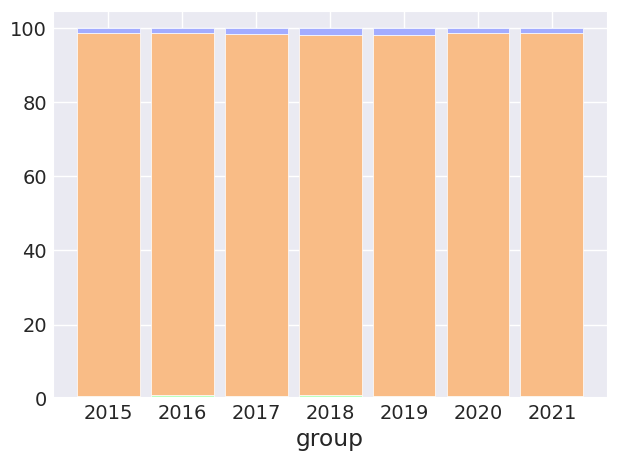

In [487]:
totals = [i+j+k for i,j,k in zip(seguros['Si'], seguros['No'], seguros['No_sabe'])]
si = [i / j * 100 for i,j in zip(seguros['Si'], totals)]
no = [i / j * 100 for i,j in zip(seguros['No'], totals)]
no_sabe = [i / j * 100 for i,j in zip(seguros['No_sabe'], totals)]
# plot
r = [2015,2016,2017,2018,2019,2020,2021]
barWidth = 0.85
names = ('2015','2016','2017','2018','2019','2020','2021')
# Create green Bars
plt.bar(r, si, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, no, bottom=si, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, no_sabe, bottom=[i+j for i,j in zip(si, no)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("Año")
 
# Show graphic
plt.show()

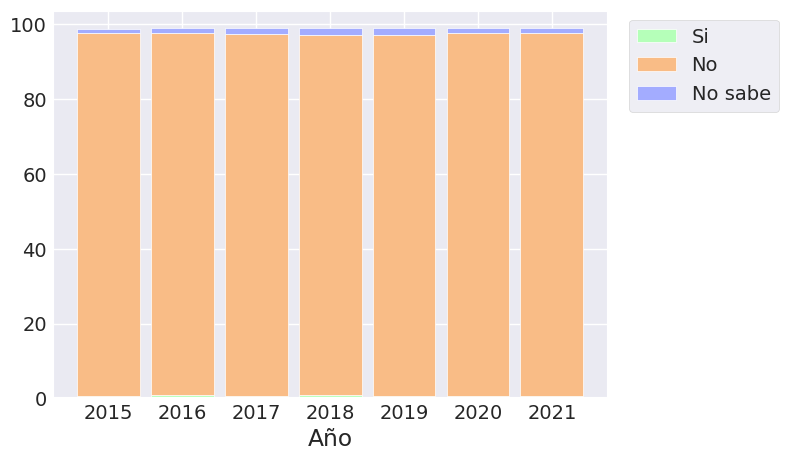

In [494]:
# Plot
r = [2015,2016,2017,2018,2019,2020,2021]
barWidth = 0.85
names = ('2015','2016','2017','2018','2019','2020','2021')

# Calculate percentages
si = [i / j * 100 for i,j in zip(seguros['Si'], totals)]
no = [i / j * 100 for i,j in zip(seguros['No'], totals)]
no_sabe = [i / j * 100 for i,j in zip(seguros['No_sabe'], totals)]

# Create green Bars
plt.bar(r, si, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, no, bottom=si, color='#f9bc86', edgecolor='white', width=barWidth)
# Create blue Bars
plt.bar(r, no_sabe, bottom=[i+j for i,j in zip(si, no)], color='#a3acff', edgecolor='white', width=barWidth)

# Add legend
plt.legend(['Si', 'No', 'No sabe'], bbox_to_anchor=(1.02, 1), loc='upper left')

# Custom x axis
plt.xticks(r, names)
plt.xlabel("Año")

# Show graphic
plt.show()

#TMOD_VIC TODOS

In [496]:
tmod_vic_envipe2016 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2016/tmod_vic_envipe2016.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2016.head()

ID_VIV           ID_HOG              ID_PER                   ID_DEL  \
0  101318.05  0101318.05.01\r  0101318.05.01.03\r  0101318.05.01.03.03.1\r   
1  101989.02  0101989.02.01\r  0101989.02.01.02\r  0101989.02.01.02.02.1\r   
2  100777.01  0100777.01.02\r  0100777.01.02.01\r  0100777.01.02.01.02.2\r   
3  101318.03  0101318.03.01\r  0101318.03.01.01\r  0101318.03.01.01.04.1\r   
4  100457.03  0100457.03.01\r  0100457.03.01.03\r  0100457.03.01.03.02.3\r   

      UPM  VIV_SEL  HOGAR  ND_TIPO  TD_TIPO  BPCOD  ...  BP6_1 BP6_2 BP6_3  \
0  101318        5      1        1        1      3  ...     \r    \r    \r   
1  101989        2      1        1        1      2  ...     \r    \r    \r   
2  100777        1      2        2        2      2  ...     \r    \r    \r   
3  101318        3      1        1        1      4  ...     \r    \r    \r   
4  100457        3      1        3        3      2  ...     \r    \r    \r   

   BP7_1  FAC_DEL  FAC_DEL_AM  DOMINIO  ESTRATO EST_DIS UPM_DIS  
0     \r      206    000206\r      U\r        4       3     176  
1     \r      286    000286\r      U\r        2       1     256  
2     \r      195    000195\r      U\r        2       1      99  
3     \r      206    000206\r      U\r        4       3     176  
4     \r      202    000202\r      U\r        2       1      62  

[5 rows x 127 columns]

In [497]:
tmod_vic_envipe2017 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2017/tmod_vic_envipe2017.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2017.head()

ID_VIV           ID_HOG              ID_PER                 ID_DEL  \
0   100172.02  0100172.02.01\r  0100172.02.01.02\r  0100172.02.01.02.09\r   
1   100931.01  0100931.01.01\r  0100931.01.01.01\r  0100931.01.01.01.03\r   
2   160114.20  0160114.20.01\r  0160114.20.01.01\r  0160114.20.01.01.02\r   
3   100208.04  0100208.04.01\r  0100208.04.01.01\r  0100208.04.01.01.03\r   
4  1409568.04  1409568.04.01\r  1409568.04.01.01\r  1409568.04.01.01.02\r   

       UPM  VIV_SEL  HOGAR  ND_TIPO  TD_TIPO  BPCOD  ...  BP6_1 BP6_2  BP6_3  \
0   100172        2      1        1        1      9  ...     \r    \r     \r   
1   100931        1      1        1        1      3  ...     \r    \r     \r   
2   160114       20      1        4        4      2  ...     \r    \r     \r   
3   100208        4      1        1        2      3  ...     \r    \r     \r   
4  1409568        4      1        1        1      2  ...     \r    \r     \r   

   BP7_1 FAC_DEL  FAC_DEL_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0     \r     364    000364\r      U\r        3        2       11  
1     \r     182    000182\r      U\r        3        2      111  
2     \r     211    000211\r      R\r        2       11      295  
3     \r     147    000147\r      U\r        3        2       15  
4     \r    1026    001026\r      U\r        4      233     6238  

[5 rows x 132 columns]

In [498]:
tmod_vic_envipe2018 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2018/tmod_vic_envipe2018.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2018.head()

ï»¿ID_VIV           ID_HOG              ID_PER                   ID_DEL  \
0  100721.03  0100721.03.01\r  0100721.03.01.03\r  0100721.03.01.03.02.2\r   
1  100721.03  0100721.03.01\r  0100721.03.01.03\r  0100721.03.01.03.01.1\r   
2  100721.03  0100721.03.01\r  0100721.03.01.03\r  0100721.03.01.03.02.3\r   
3  100721.03  0100721.03.01\r  0100721.03.01.03\r  0100721.03.01.03.11.1\r   
4  100721.03  0100721.03.01\r  0100721.03.01.03\r  0100721.03.01.03.07.1\r   

      UPM  VIV_SEL  HOGAR  ND_TIPO  TD_TIPO  BPCOD  ...  BP6_1 BP6_2  BP6_3  \
0  100721        3      1        2        5      2  ...     \r    \r     \r   
1  100721        3      1        1        1      1  ...     \r    \r     \r   
2  100721        3      1        3        5      2  ...     \r    \r     \r   
3  100721        3      1        1        1     11  ...     \r    \r     \r   
4  100721        3      1        1        1      7  ...     \r    \r     \r   

   BP7_1 FAC_DEL  FAC_DEL_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0     \r     201    000201\r      U\r        3        2       79  
1     \r     201    000201\r      U\r        3        2       79  
2     \r     201    000201\r      U\r        3        2       79  
3     \r     602    000602\r      U\r        3        2       79  
4     \r     602    000602\r      U\r        3        2       79  

[5 rows x 129 columns]

In [499]:
tmod_vic_envipe2019 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2019/tmod_vic_envipe2019.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2019.head()

ID_VIV           ID_HOG              ID_PER                   ID_DEL  \
0  101430.05  0101430.05.01\r  0101430.05.01.01\r  0101430.05.01.01.07.1\r   
1  101430.05  0101430.05.01\r  0101430.05.01.01\r  0101430.05.01.01.04.1\r   
2  100397.01  0100397.01.01\r  0100397.01.01.03\r  0100397.01.01.03.02.1\r   
3  100397.01  0100397.01.01\r  0100397.01.01.03\r  0100397.01.01.03.03.1\r   
4  100586.05  0100586.05.01\r  0100586.05.01.01\r  0100586.05.01.01.07.1\r   

      UPM  VIV_SEL  HOGAR  ND_TIPO  TD_TIPO  BPCOD  ...  BP6_1 BP6_2  BP6_3  \
0  101430        5      1        1        1      7  ...   NA\r  NA\r   NA\r   
1  101430        5      1        1        1      4  ...   NA\r  NA\r   NA\r   
2  100397        1      1        1        1      2  ...   NA\r  NA\r   NA\r   
3  100397        1      1        1        1      3  ...   NA\r  NA\r   NA\r   
4  100586        5      1        1        2      7  ...   NA\r  NA\r   NA\r   

   BP7_1 FAC_DEL  FAC_DEL_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0   NA\r     390    000390\r      U\r        4        1      195  
1   NA\r     195    000195\r      U\r        4        1      195  
2   NA\r     331    000331\r      U\r        2        1       59  
3   NA\r     331    000331\r      U\r        2        1       59  
4   NA\r     603    000603\r      U\r        4        1       92  

[5 rows x 129 columns]

In [500]:
tmod_vic_envipe2020 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2020/tmod_vic_envipe2020.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2020.head()

<ipython-input-500-bb4be59449ff>:1: DtypeWarning:

Columns (14,125) have mixed types. Specify dtype option on import or set low_memory=False.



ID_VIV           ID_HOG              ID_PER                   ID_DEL  \
0  101520.03  0101520.03.01\r  0101520.03.01.03\r  0101520.03.01.03.04.1\r   
1  160019.04  0160019.04.01\r  0160019.04.01.01\r  0160019.04.01.01.03.2\r   
2  102339.17  0102339.17.01\r  0102339.17.01.03\r  0102339.17.01.03.13.1\r   
3  102339.17  0102339.17.01\r  0102339.17.01.03\r  0102339.17.01.03.06.1\r   
4  100990.01  0100990.01.01\r  0100990.01.01.02\r  0100990.01.01.02.02.1\r   

      UPM  VIV_SEL  HOGAR  ND_TIPO  TD_TIPO  BPCOD  ...  BP6_1 BP6_2  BP6_3  \
0  101520        3      1        1        1      4  ...   NA\r  NA\r   NA\r   
1  160019        4      1        2        2      3  ...   NA\r  NA\r   NA\r   
2  102339       17      1        1        1     13  ...   NA\r  NA\r   NA\r   
3  102339       17      1        1        1      6  ...   NA\r  NA\r   NA\r   
4  100990        1      1        1        4      2  ...   NA\r  NA\r   NA\r   

   BP7_1 FAC_DEL  FAC_DEL_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0   NA\r     240         240      U\r        2        1      207  
1   NA\r     297         297      R\r        2       11      288  
2    2\r     965         965      C\r        2        9      285  
3   NA\r     965         965      C\r        2        9      285  
4   NA\r     198         198      U\r        3        2      133  

[5 rows x 130 columns]

In [501]:
tmod_vic_envipe2021 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2021/tmod_vic_envipe2021.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2021.head()

<ipython-input-501-920666631a8c>:1: DtypeWarning:

Columns (14,124) have mixed types. Specify dtype option on import or set low_memory=False.



ID_VIV           ID_HOG              ID_PER                   ID_DEL  \
0  206374.01  0206374.01.01\r  0206374.01.01.02\r  0206374.01.01.02.07.1\r   
1  208069.18  0208069.18.01\r  0208069.18.01.02\r  0208069.18.01.02.08.1\r   
2  208098.11  0208098.11.01\r  0208098.11.01.01\r  0208098.11.01.01.01.1\r   
3  204439.03  0204439.03.01\r  0204439.03.01.08\r  0204439.03.01.08.01.1\r   
4  208189.03  0208189.03.01\r  0208189.03.01.01\r  0208189.03.01.01.09.1\r   

      UPM  VIV_SEL  HOGAR  ND_TIPO  TD_TIPO  BPCOD  ...  BP6_1 BP6_2  BP6_3  \
0  206374        1      1        1        2      7  ...     \r    \r     \r   
1  208069       18      1        1        1      8  ...     \r    \r     \r   
2  208098       11      1        1        1      1  ...     \r    \r     \r   
3  204439        3      1        1        1      1  ...     \r    \r     \r   
4  208189        3      1        1        1      9  ...     \r    \r     \r   

   BP7_1 FAC_DEL  FAC_DEL_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0     \r    1043        1043      U\r        4       15      714  
1     \r    1078        1078      C\r        2       32      781  
2     \r     377         377      C\r        2       31      782  
3     \r     345         345      U\r        3       14      572  
4     \r     542         542      U\r        3       14      783  

[5 rows x 129 columns]

In [502]:
tmod_vic_envipe2022 = pd.read_csv('/content/gdrive/MyDrive/ASE/ENVIPE/2022/tmod_vic_envipe2022.csv', encoding='ISO-8859-1', delimiter=',')
tmod_vic_envipe2022.head()

<ipython-input-502-1e46a8f306b2>:1: DtypeWarning:

Columns (14,124) have mixed types. Specify dtype option on import or set low_memory=False.



ID_VIV           ID_HOG              ID_PER                   ID_DEL  \
0  100075.04  0100075.04.01\r  0100075.04.01.02\r  0100075.04.01.02.13.1\r   
1  160086.17  0160086.17.01\r  0160086.17.01.03\r  0160086.17.01.03.13.1\r   
2  101491.01  0101491.01.01\r  0101491.01.01.01\r  0101491.01.01.01.03.1\r   
3  102217.02  0102217.02.01\r  0102217.02.01.03\r  0102217.02.01.03.02.3\r   
4  101491.01  0101491.01.01\r  0101491.01.01.01\r  0101491.01.01.01.02.1\r   

      UPM  VIV_SEL  HOGAR  ND_TIPO  TD_TIPO  BPCOD  ...  BP6_1 BP6_2  BP6_3  \
0  100075        4      1        1        1     13  ...     \r    \r     \r   
1  160086       17      1        1        1     13  ...     \r    \r     \r   
2  101491        1      1        1        1      3  ...     \r    \r     \r   
3  102217        2      1        3        5      2  ...     \r    \r     \r   
4  101491        1      1        1        1      2  ...     \r    \r     \r   

   BP7_1 FAC_DEL  FAC_DEL_AM  DOMINIO  ESTRATO  EST_DIS  UPM_DIS  
0    3\r     662         662      U\r        3        2       13  
1    3\r    1106        1106      R\r        2       11      290  
2     \r     244         244      U\r        4        3      187  
3     \r     244         244      C\r        2       10      273  
4     \r     244         244      U\r        4        3      187  

[5 rows x 129 columns]

In [505]:
BP2_1_2016 = tmod_vic_envipe2021[['BP1_28','BP2_1']]
BP2_1_2016.dtypes

BP1_28    object
BP2_1     object
dtype: object

In [509]:
# Reemplazar el carácter "\r" por una cadena vacía en la columna "AREAM_OCU"
juntos = BP2_1_2016.copy()
juntos['BP1_28'] = juntos['BP1_28'].apply(lambda x: str(x).replace('\r', ''))
juntos['BP2_1'] = juntos['BP2_1'].apply(lambda x: str(x).replace('\r', ''))
# Verificar el resultado
print(juntos['BP1_28'].unique())
print(juntos['BP2_1'].unique())

['' '2' '6' '4' '3' '5' '1' '9']
['' '2' '1' '9']


In [513]:
print(juntos['BP1_28'].dtype)
print(juntos['BP2_1'].dtype)

object
object


In [518]:
juntos['BP1_28'] = juntos['BP1_28'].fillna(0)
juntos['BP2_1'] = juntos['BP2_1'].fillna(0)
print(juntos['BP1_28'].unique())
print(juntos['BP2_1'].unique())

['' '2' '6' '4' '3' '5' '1' '9']
['' '2' '1' '9']


In [521]:
juntos['BP1_28'] = juntos['BP1_28'].replace([''], 0)
juntos['BP2_1'] = juntos['BP2_1'].replace([''], 0)

# Convertir las columnas a enteros
juntos['BP1_28'] = juntos['BP1_28'].astype(int)
juntos['BP2_1'] = juntos['BP2_1'].astype(int)

print(juntos['BP1_28'].dtype)
print(juntos['BP2_1'].dtype)

int64
int64


In [528]:
juntos.loc[juntos['BP1_28'] == 1].sum()

BP1_28    227
BP2_1     106
dtype: int64

In [525]:
print('Por el seguro', juntos.loc[juntos['BP1_28'] == 1].sum())
print('Vehículos asegurados si: ', juntos.loc[juntos['BP2_1'] == 1].sum())
print('Veículos no asegurados no: ', juntos.loc[juntos['BP2_1'] == 2].sum())

Por el seguro BP1_28    227
BP2_1     106
dtype: int64
Vehículos asegurados si:  BP1_28    609
BP2_1     346
dtype: int64
Veículos no asegurados no:  BP1_28    1221
BP2_1     1288
dtype: int64


In [524]:
# Creamos una lista con los años que nos interesan
anios = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Creamos un diccionario vacío para cada año
datos_por_anio = [{'Si': '', 'No': '', 'Por_Seguro': ''} for _ in range(len(anios))]

# Creamos el dataframe con los años y las columnas correspondientes
denuncia_asegurado = pd.DataFrame(datos_por_anio, index=anios, columns=['Si', 'No', 'Por_Seguro'])
denuncia_asegurado = denuncia_asegurado.reset_index().rename_axis(None, axis=1)
denuncia_asegurado = denuncia_asegurado.rename(columns={'index': 'Año'})
denuncia_asegurado

Año Si No Por_Seguro
0  2015                 
1  2016                 
2  2017                 
3  2018                 
4  2019                 
5  2020                 
6  2021

In [529]:
denuncia_asegurado.loc[0, 'Si'] = 609
denuncia_asegurado.loc[0, 'No'] = 1221
denuncia_asegurado.loc[0, 'Por_Seguro'] = 227
denuncia_asegurado

Año   Si    No Por_Seguro
0  2015  609  1221        227
1  2016                      
2  2017                      
3  2018                      
4  2019                      
5  2020                      
6  2021

#Pregunta 1 de investigación

¿Existe una correlación entre la incidencia de robos de coche y la creencia general?

In [246]:
# Vamos hacer un df en donde tengan los datos por cada estado usando la modalidad de robo de coches con y sin violencia por cada estado
rcmuntodo = cochertodo[['Año', 'Entidad', 'Municipio','Modalidad', 'Total']]
rcmuntodo.head()

Año         Entidad       Municipio  \
41   2015  Aguascalientes  Aguascalientes   
42   2015  Aguascalientes  Aguascalientes   
139  2015  Aguascalientes        Asientos   
140  2015  Aguascalientes        Asientos   
237  2015  Aguascalientes        Calvillo   

                                   Modalidad  Total  
41   Robo de coche de 4 ruedas Con violencia     36  
42   Robo de coche de 4 ruedas Sin violencia   1434  
139  Robo de coche de 4 ruedas Con violencia      2  
140  Robo de coche de 4 ruedas Sin violencia      9  
237  Robo de coche de 4 ruedas Con violencia      0

In [247]:
# Vamos hacer un df en donde vamos a sumar el robo de coches con y sin violencia de acuerdo a su municipio y entidad
Robos1 = rcmuntodo.groupby(['Año', 'Entidad', 'Municipio']).agg({'Total': 'sum'}).reset_index()
Robos1.head()

Año         Entidad       Municipio  Total
0  2015  Aguascalientes  Aguascalientes   1470
1  2015  Aguascalientes        Asientos     11
2  2015  Aguascalientes        Calvillo     13
3  2015  Aguascalientes           Cosío      4
4  2015  Aguascalientes        El Llano      3

In [248]:
# Checamos que sea la mitad de datos que había al tener con y sin violencia
print(cochertodo.shape)
print(Robos1.shape)

(37396, 22)
(18698, 4)


In [249]:
Robos2 = Robos1.groupby(['Año', 'Entidad']).agg({'Total': 'sum'}).reset_index()
Robos2.head()

Año              Entidad  Total
0  2015       Aguascalientes   1641
1  2015      Baja California  14138
2  2015  Baja California Sur   1157
3  2015             Campeche     73
4  2015              Chiapas   1488

In [250]:
Robos2.shape

(256, 3)

In [251]:
Robos = Robos2.pivot(index='Año', columns='Entidad', values='Total').reset_index()
Robos.columns.name = None
Robos

Año  Aguascalientes  Baja California  Baja California Sur  Campeche  \
0  2015            1641            14138                 1157        73   
1  2016            2601            16628                 1746       196   
2  2017            2838            19732                 1412       159   
3  2018            2523            15425                 1233       120   
4  2019            1642            13412                  761       153   
5  2020            1106             9803                  594       100   
6  2021             778            10875                  402        76   
7  2022             791            11677                  425       152   

   Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  Colima  ...  \
0     1488       4427             10665                  1451     575  ...   
1     1813       3746              9624                   915    1070  ...   
2     1832       4350              9012                   889    1139  ...   
3     1134       4818             11782                   744     847  ...   
4      905       4540             10578                   729     762  ...   
5      872       3496              8085                   532     649  ...   
6      665       3702              5576                   472     867  ...   
7      624       3526              4307                   463     619  ...   

   Quintana Roo  San Luis Potosí  Sinaloa  Sonora  Tabasco  Tamaulipas  \
0           851              903     3337    4651     1708        6416   
1           446             1328     3266    3691     2410        4284   
2           870             1750     4759    3483     3252        4949   
3          1012             2158     3764    2825     4308        3851   
4          1516             2276     2535    2399     2460        2751   
5          1274             1871     2018    2029     1225        2054   
6          1315             2017     2161    1587     1193        2037   
7          1069             2068     1807    1962     1035        1689   

   Tlaxcala  Veracruz de Ignacio de la Llave  Yucatán  Zacatecas  
0      1131                             6144      117       1959  
1      1352                             7560      105       2077  
2      2157                             8927       70       1924  
3      1983                             6952       75       1802  
4      1595                             6635       59       1418  
5      1256                             4675       43       1145  
6      1424                             4231       49       1286  
7      1369                             3687       37       1361  

[8 rows x 33 columns]

In [252]:
Robos = Robos[Robos['Año'] != 2022]
Robos

Año  Aguascalientes  Baja California  Baja California Sur  Campeche  \
0  2015            1641            14138                 1157        73   
1  2016            2601            16628                 1746       196   
2  2017            2838            19732                 1412       159   
3  2018            2523            15425                 1233       120   
4  2019            1642            13412                  761       153   
5  2020            1106             9803                  594       100   
6  2021             778            10875                  402        76   

   Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  Colima  ...  \
0     1488       4427             10665                  1451     575  ...   
1     1813       3746              9624                   915    1070  ...   
2     1832       4350              9012                   889    1139  ...   
3     1134       4818             11782                   744     847  ...   
4      905       4540             10578                   729     762  ...   
5      872       3496              8085                   532     649  ...   
6      665       3702              5576                   472     867  ...   

   Quintana Roo  San Luis Potosí  Sinaloa  Sonora  Tabasco  Tamaulipas  \
0           851              903     3337    4651     1708        6416   
1           446             1328     3266    3691     2410        4284   
2           870             1750     4759    3483     3252        4949   
3          1012             2158     3764    2825     4308        3851   
4          1516             2276     2535    2399     2460        2751   
5          1274             1871     2018    2029     1225        2054   
6          1315             2017     2161    1587     1193        2037   

   Tlaxcala  Veracruz de Ignacio de la Llave  Yucatán  Zacatecas  
0      1131                             6144      117       1959  
1      1352                             7560      105       2077  
2      2157                             8927       70       1924  
3      1983                             6952       75       1802  
4      1595                             6635       59       1418  
5      1256                             4675       43       1145  
6      1424                             4231       49       1286  

[7 rows x 33 columns]

##2015

In [253]:
R2015 = Robos2.loc[Robos2['Año'] == 2015]
R2015 = R2015.rename(columns={'Entidad': 'CVE_ENT'})

R2015

Año                          CVE_ENT  Total
0   2015                   Aguascalientes   1641
1   2015                  Baja California  14138
2   2015              Baja California Sur   1157
3   2015                         Campeche     73
4   2015                          Chiapas   1488
5   2015                        Chihuahua   4427
6   2015                 Ciudad de México  10665
7   2015             Coahuila de Zaragoza   1451
8   2015                           Colima    575
9   2015                          Durango   1443
10  2015                       Guanajuato   5457
11  2015                         Guerrero   3805
12  2015                          Hidalgo   2976
13  2015                          Jalisco   7253
14  2015              Michoacán de Ocampo   5734
15  2015                          Morelos   3175
16  2015                           México  43431
17  2015                          Nayarit    188
18  2015                       Nuevo León   2134
19  2015                           Oaxaca    243
20  2015                           Puebla   2935
21  2015                        Querétaro   3508
22  2015                     Quintana Roo    851
23  2015                  San Luis Potosí    903
24  2015                          Sinaloa   3337
25  2015                           Sonora   4651
26  2015                          Tabasco   1708
27  2015                       Tamaulipas   6416
28  2015                         Tlaxcala   1131
29  2015  Veracruz de Ignacio de la Llave   6144
30  2015                          Yucatán    117
31  2015                        Zacatecas   1959

In [254]:
Factor_Inseguridad2015 = env2016.loc[:, 'Factor_Inseguridad']  # o df.iloc[:, <indice de columna>]
Factor_Inseguridad2015

CVE_ENT  Aguascalientes  Baja California  Baja California Sur   Campeche  \
Año                                                                        
2015          22.354105        -28.64976             14.57891 -23.383085   

CVE_ENT    Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  \
Año                                                                     
2015    -32.400932 -48.629321        -81.896024            -30.375699   

CVE_ENT     Colima    Durango  ...  Quintana Roo  San Luis Potosí    Sinaloa  \
Año                            ...                                             
2015    -61.881188 -28.869448  ...    -35.246455       -63.806552 -61.771562   

CVE_ENT   Sonora    Tabasco  Tamaulipas  Tlaxcala  \
Año                                                 
2015    -9.74026 -87.719916  -85.483278 -25.96302   

CVE_ENT  Veracruz de Ignacio de la Llave    Yucatán  Zacatecas  
Año                                                             
2015                          -85.290237  52.279202 -82.423435  

[1 rows x 32 columns]

In [255]:
Factor_Inseguridad2015 = Factor_Inseguridad2015.T
Factor_Inseguridad2015.head()

Año                       2015
CVE_ENT                       
Aguascalientes       22.354105
Baja California     -28.649760
Baja California Sur  14.578910
Campeche            -23.383085
Chiapas             -32.400932

In [256]:
cor2015 = pd.merge(R2015, Factor_Inseguridad2015, on='CVE_ENT')
cor2015 = cor2015.rename(columns={2015: 'Factor_Inseguridad'})

cor2015.head()

Año              CVE_ENT  Total  Factor_Inseguridad
0  2015       Aguascalientes   1641           22.354105
1  2015      Baja California  14138          -28.649760
2  2015  Baja California Sur   1157           14.578910
3  2015             Campeche     73          -23.383085
4  2015              Chiapas   1488          -32.400932

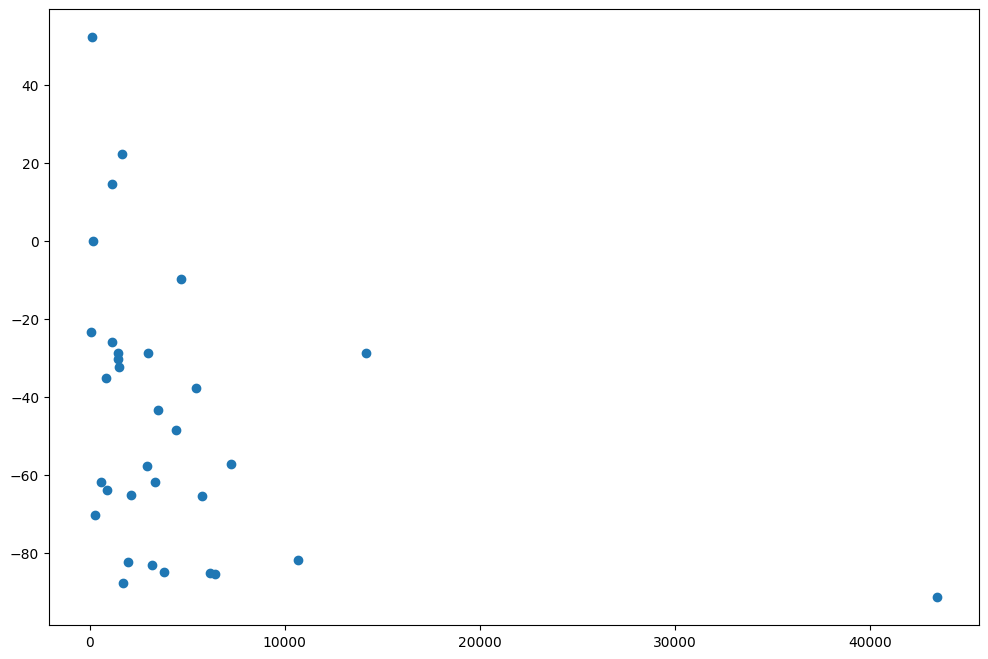

In [257]:
Total = cor2015['Total'].values
Factor_Inseguridad = cor2015['Factor_Inseguridad'].values

fig, ax = plt.subplots(figsize=(12, 8));
ax.scatter(Total, Factor_Inseguridad);
# otra forma es ax.scatter("cpi", "hdi", data=corrupt)

In [258]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], c[1] * amount, c[2])

In [259]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2015["CVE_ENT"]).codes

In [260]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2015["CVE_ENT"]).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS]

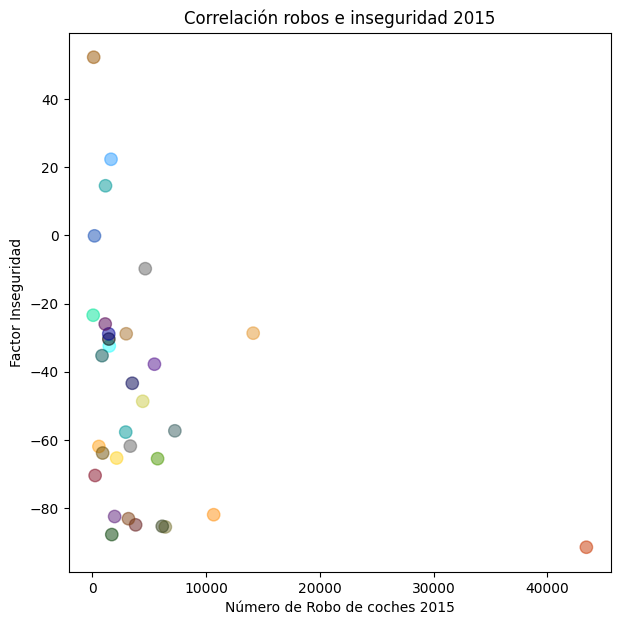

In [261]:
fig, ax = plt.subplots(figsize=(7, 7));
ax.scatter(
    Total, Factor_Inseguridad, color=EDGECOLORS, edgecolors=EDGECOLORS,
    s=80, alpha=0.5
);
ax.set_xlabel('Número de Robo de coches 2015');
ax.set_ylabel('Factor Inseguridad');
ax.set_title('Correlación robos e inseguridad 2015');

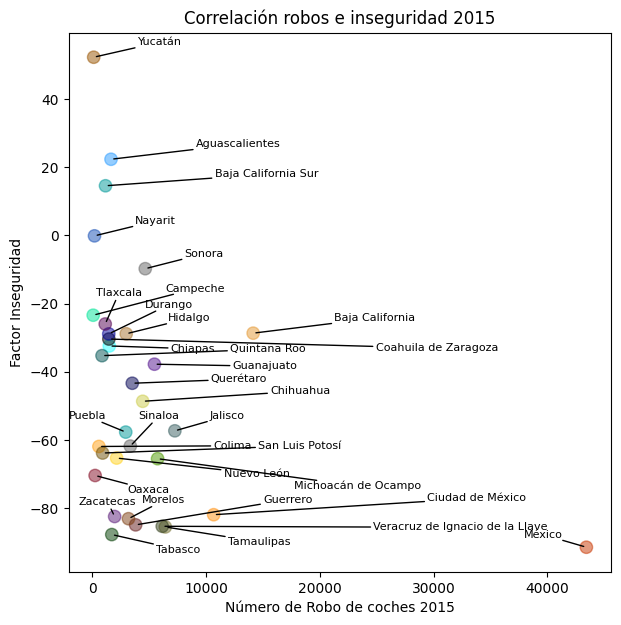

<Figure size 640x480 with 0 Axes>

In [262]:
# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = cor2015["CVE_ENT"].values

# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']


# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    if country in COUNTRY_HIGHLIGHT:
        x, y = Total[idx], Factor_Inseguridad[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=8));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(3, 3),
    arrowprops=dict(arrowstyle="-", lw=1),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
# ax.set_facecolor("white") # set axis background color to white
# fig.set_facecolor("white") # set figure background color to white
# fig.savefig("plot.png", dpi=300)

fig

##2016

In [263]:
R2016 = Robos2.loc[Robos2['Año'] == 2016]
R2016 = R2016.rename(columns={'Entidad': 'CVE_ENT'})

R2016.head()

Año              CVE_ENT  Total
32  2016       Aguascalientes   2601
33  2016      Baja California  16628
34  2016  Baja California Sur   1746
35  2016             Campeche    196
36  2016              Chiapas   1813

In [264]:
Factor_Inseguridad2016 = env2017.loc[:, 'Factor_Inseguridad']  # o df.iloc[:, <indice de columna>]
Factor_Inseguridad2016.head()

CVE_ENT  Aguascalientes  Baja California  Baja California Sur   Campeche  \
Año                                                                        
2016           21.14061       -31.430446            -41.12659 -32.536623   

CVE_ENT    Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  \
Año                                                                     
2016    -39.517211 -67.457493        -84.389693            -32.678454   

CVE_ENT     Colima    Durango  ...  Quintana Roo  San Luis Potosí    Sinaloa  \
Año                            ...                                             
2016    -67.696867 -33.171619  ...    -55.156695       -69.680851 -66.800878   

CVE_ENT     Sonora    Tabasco  Tamaulipas   Tlaxcala  \
Año                                                    
2016    -25.458052 -87.357589  -84.439574 -33.676471   

CVE_ENT  Veracruz de Ignacio de la Llave   Yucatán  Zacatecas  
Año                                                            
2016                          -90.321574  60.64114 -83.163914  

[1 rows x 32 columns]

In [265]:
Factor_Inseguridad2016 = Factor_Inseguridad2016.T
Factor_Inseguridad2016.head()

Año                       2016
CVE_ENT                       
Aguascalientes       21.140610
Baja California     -31.430446
Baja California Sur -41.126590
Campeche            -32.536623
Chiapas             -39.517211

In [266]:
cor2016 = pd.merge(R2016, Factor_Inseguridad2016, on='CVE_ENT')
cor2016 = cor2016.rename(columns={2016: 'Factor_Inseguridad'})

cor2016.head()

Año              CVE_ENT  Total  Factor_Inseguridad
0  2016       Aguascalientes   2601           21.140610
1  2016      Baja California  16628          -31.430446
2  2016  Baja California Sur   1746          -41.126590
3  2016             Campeche    196          -32.536623
4  2016              Chiapas   1813          -39.517211

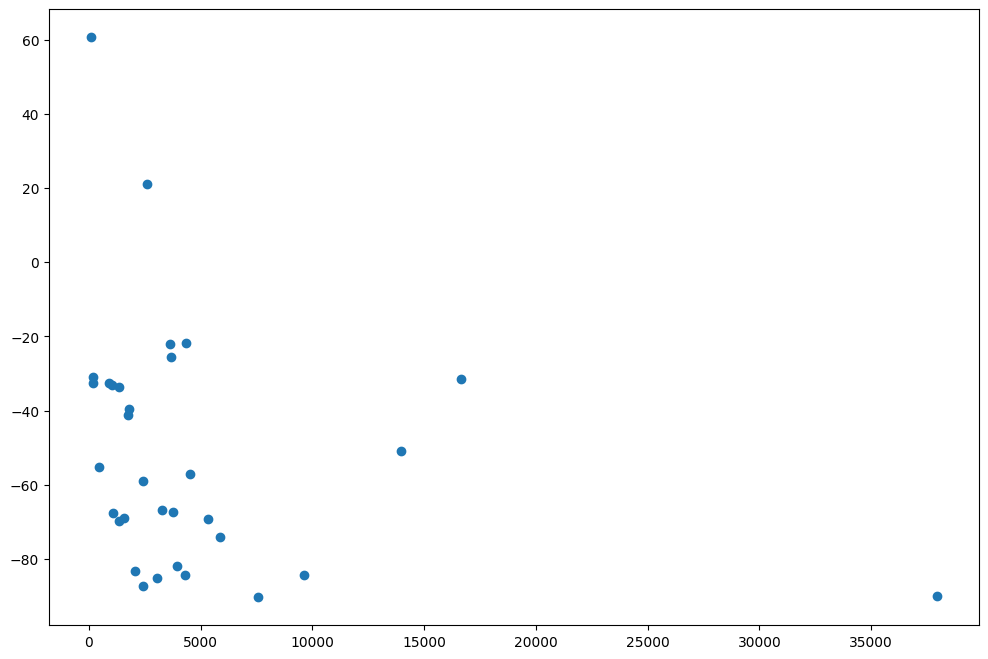

In [267]:
Total = cor2016['Total'].values
Factor_Inseguridad = cor2016['Factor_Inseguridad'].values

fig, ax = plt.subplots(figsize=(12, 8));
ax.scatter(Total, Factor_Inseguridad);

In [268]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2016["CVE_ENT"]).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS]

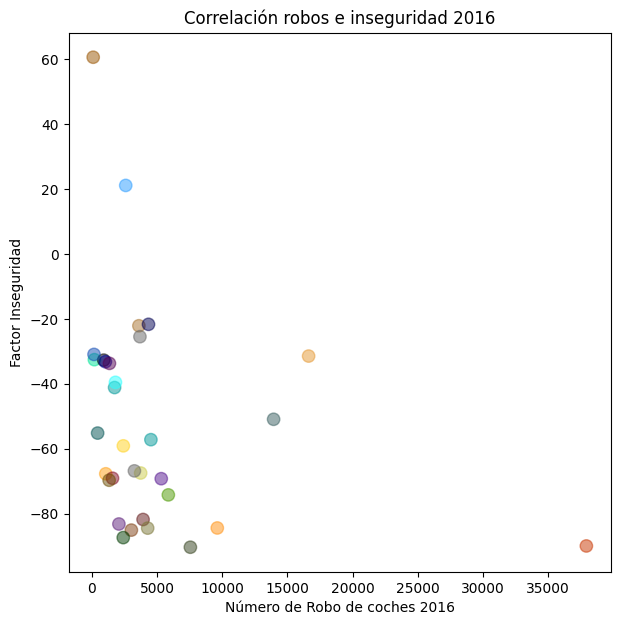

In [269]:
fig, ax = plt.subplots(figsize=(7, 7));
ax.scatter(
    Total, Factor_Inseguridad, color=EDGECOLORS, edgecolors=EDGECOLORS,
    s=80, alpha=0.5
);
ax.set_xlabel('Número de Robo de coches 2016');
ax.set_ylabel('Factor Inseguridad');
ax.set_title('Correlación robos e inseguridad 2016');

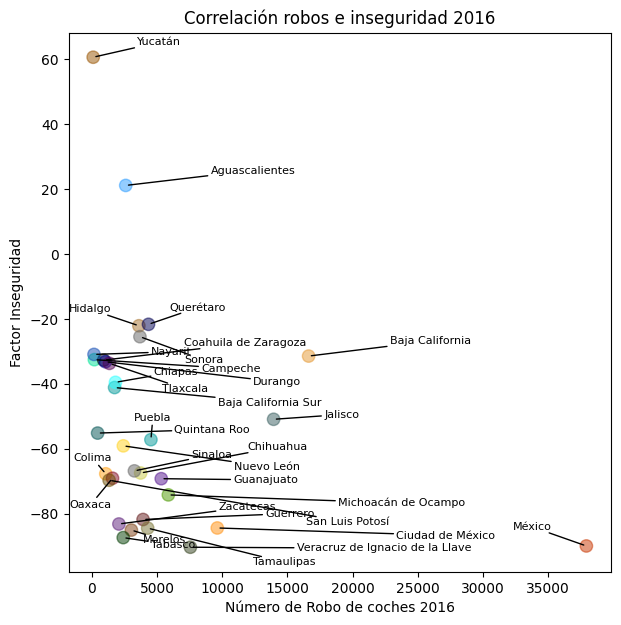

<Figure size 640x480 with 0 Axes>

In [270]:
# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = cor2016["CVE_ENT"].values

# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']


# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    if country in COUNTRY_HIGHLIGHT:
        x, y = Total[idx], Factor_Inseguridad[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=8));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(3, 3),
    arrowprops=dict(arrowstyle="-", lw=1),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
# ax.set_facecolor("white") # set axis background color to white
# fig.set_facecolor("white") # set figure background color to white
#fig.savefig("plot.png", dpi=300)

fig

##2017

In [271]:
R2017 = Robos2.loc[Robos2['Año'] == 2017]
R2017 = R2017.rename(columns={'Entidad': 'CVE_ENT'})

R2017.head()

Año              CVE_ENT  Total
64  2017       Aguascalientes   2838
65  2017      Baja California  19732
66  2017  Baja California Sur   1412
67  2017             Campeche    159
68  2017              Chiapas   1832

In [272]:
Factor_Inseguridad2017 = env2018.loc[:, 'Factor_Inseguridad']  # o df.iloc[:, <indice de columna>]
Factor_Inseguridad2017.head()

CVE_ENT  Aguascalientes  Baja California  Baja California Sur  Campeche  \
Año                                                                       
2017         -40.036397       -64.567769           -48.322911 -32.82559   

CVE_ENT    Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  \
Año                                                                     
2017    -64.348491 -77.675616        -87.253142            -44.988067   

CVE_ENT     Colima    Durango  ...  Quintana Roo  San Luis Potosí   Sinaloa  \
Año                            ...                                            
2017    -76.701361 -38.853868  ...    -67.509215       -82.336957 -63.33581   

CVE_ENT     Sonora   Tabasco  Tamaulipas   Tlaxcala  \
Año                                                   
2017    -50.990099 -91.53605  -85.617493 -57.438795   

CVE_ENT  Veracruz de Ignacio de la Llave    Yucatán  Zacatecas  
Año                                                             
2017                          -89.711418  52.842809 -89.829476  

[1 rows x 32 columns]

In [273]:
Factor_Inseguridad2017 = Factor_Inseguridad2017.T
Factor_Inseguridad2017.head()

Año                       2017
CVE_ENT                       
Aguascalientes      -40.036397
Baja California     -64.567769
Baja California Sur -48.322911
Campeche            -32.825590
Chiapas             -64.348491

In [274]:
cor2017 = pd.merge(R2017, Factor_Inseguridad2017, on='CVE_ENT')
cor2017 = cor2017.rename(columns={2017: 'Factor_Inseguridad'})

cor2017.head()

Año              CVE_ENT  Total  Factor_Inseguridad
0  2017       Aguascalientes   2838          -40.036397
1  2017      Baja California  19732          -64.567769
2  2017  Baja California Sur   1412          -48.322911
3  2017             Campeche    159          -32.825590
4  2017              Chiapas   1832          -64.348491

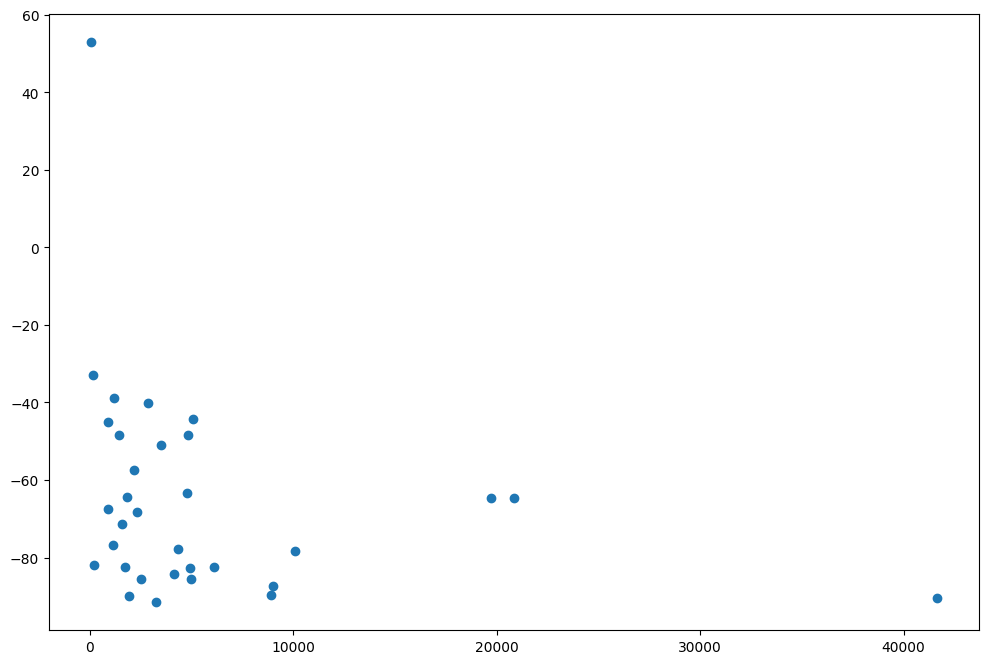

In [275]:
Total = cor2017['Total'].values
Factor_Inseguridad = cor2017['Factor_Inseguridad'].values

fig, ax = plt.subplots(figsize=(12, 8));
ax.scatter(Total, Factor_Inseguridad);

In [276]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2017["CVE_ENT"]).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS]


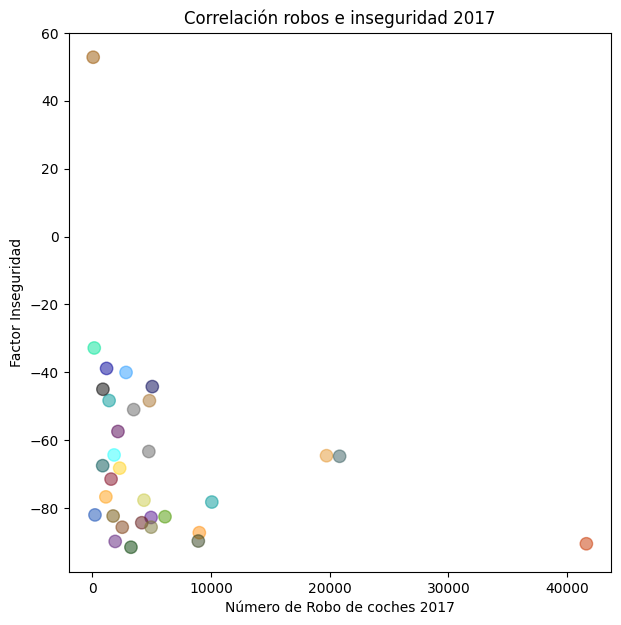

In [277]:
fig, ax = plt.subplots(figsize=(7, 7));
ax.scatter(
    Total, Factor_Inseguridad, color=EDGECOLORS, edgecolors=EDGECOLORS,
    s=80, alpha=0.5
);
ax.set_xlabel('Número de Robo de coches 2017');
ax.set_ylabel('Factor Inseguridad');
ax.set_title('Correlación robos e inseguridad 2017');

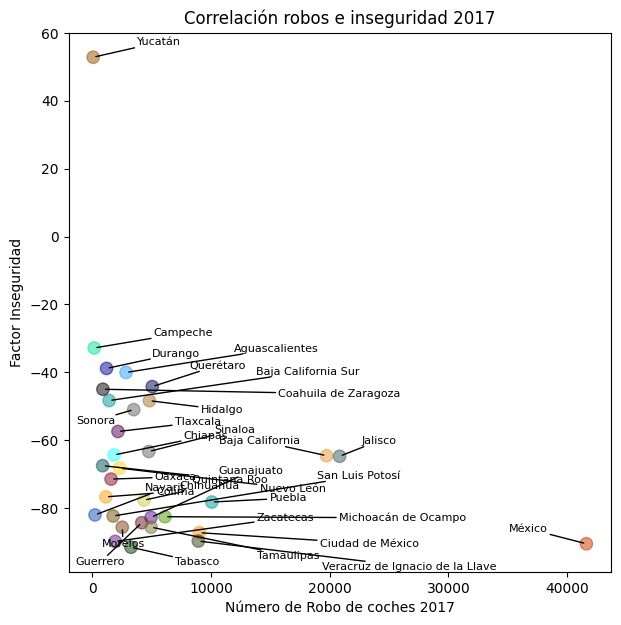

<Figure size 640x480 with 0 Axes>

In [278]:
# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = cor2017["CVE_ENT"].values

# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']


# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    if country in COUNTRY_HIGHLIGHT:
        x, y = Total[idx], Factor_Inseguridad[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=8));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(3, 3),
    arrowprops=dict(arrowstyle="-", lw=1),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
# ax.set_facecolor("white") # set axis background color to white
# fig.set_facecolor("white") # set figure background color to white
#fig.savefig("plot.png", dpi=300)

fig

##2018

In [279]:
R2018 = Robos2.loc[Robos2['Año'] == 2018]
R2018 = R2018.rename(columns={'Entidad': 'CVE_ENT'})

R2018.head()

Año              CVE_ENT  Total
96   2018       Aguascalientes   2523
97   2018      Baja California  15425
98   2018  Baja California Sur   1233
99   2018             Campeche    120
100  2018              Chiapas   1134

In [280]:
Factor_Inseguridad2018 = env2019.loc[:, 'Factor_Inseguridad']  # o df.iloc[:, <indice de columna>]
Factor_Inseguridad2018.head()

CVE_ENT  Aguascalientes  Baja California  Baja California Sur   Campeche  \
Año                                                                        
2018         -25.663717        -54.27915             7.163743 -40.797101   

CVE_ENT    Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  \
Año                                                                     
2018    -59.754163 -77.981982        -88.308409            -32.432432   

CVE_ENT     Colima    Durango  ...  Quintana Roo  San Luis Potosí   Sinaloa  \
Año                            ...                                            
2018    -73.612262 -49.630802  ...    -79.235488       -73.903819 -45.92437   

CVE_ENT     Sonora    Tabasco  Tamaulipas  Tlaxcala  \
Año                                                   
2018    -58.299595 -89.332391  -81.721854 -59.93921   

CVE_ENT  Veracruz de Ignacio de la Llave    Yucatán  Zacatecas  
Año                                                             
2018                          -86.787072  41.649899 -79.606557  

[1 rows x 32 columns]

In [281]:
Factor_Inseguridad2018 = Factor_Inseguridad2018.T
Factor_Inseguridad2018.head()

Año                       2018
CVE_ENT                       
Aguascalientes      -25.663717
Baja California     -54.279150
Baja California Sur   7.163743
Campeche            -40.797101
Chiapas             -59.754163

In [282]:
cor2018 = pd.merge(R2018, Factor_Inseguridad2018, on='CVE_ENT')
cor2018 = cor2018.rename(columns={2018: 'Factor_Inseguridad'})

cor2018.head()

Año              CVE_ENT  Total  Factor_Inseguridad
0  2018       Aguascalientes   2523          -25.663717
1  2018      Baja California  15425          -54.279150
2  2018  Baja California Sur   1233            7.163743
3  2018             Campeche    120          -40.797101
4  2018              Chiapas   1134          -59.754163

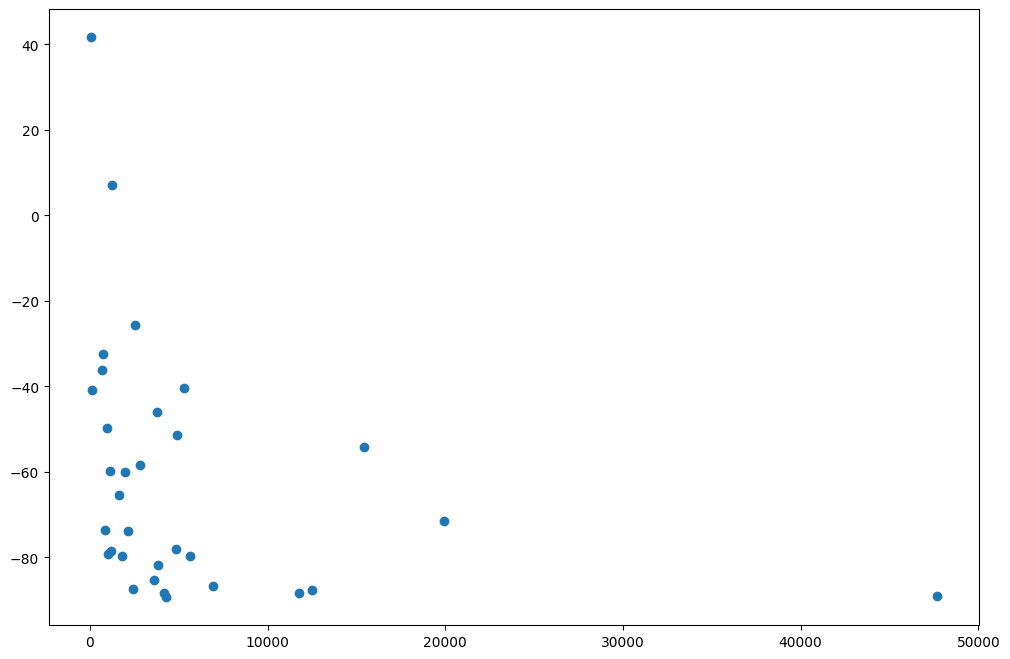

In [283]:
Total = cor2018['Total'].values
Factor_Inseguridad = cor2018['Factor_Inseguridad'].values

fig, ax = plt.subplots(figsize=(12, 8));
ax.scatter(Total, Factor_Inseguridad);

In [284]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2018["CVE_ENT"]).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS]

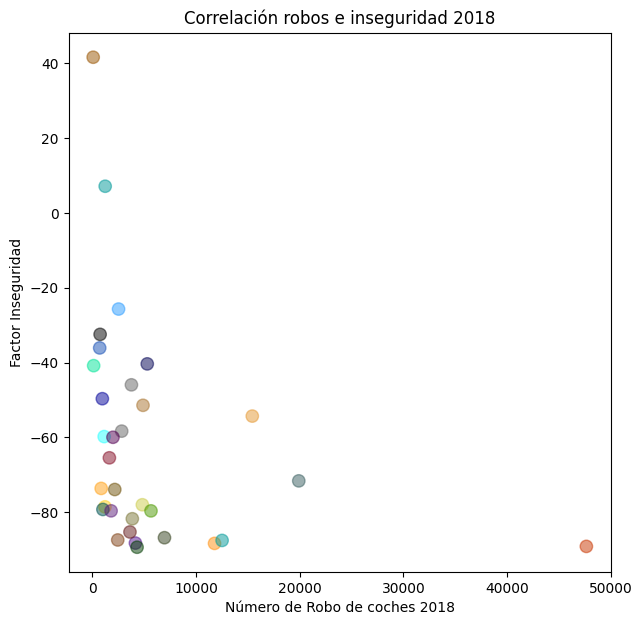

In [285]:
fig, ax = plt.subplots(figsize=(7, 7));
ax.scatter(
    Total, Factor_Inseguridad, color=EDGECOLORS, edgecolors=EDGECOLORS,
    s=80, alpha=0.5
);
ax.set_xlabel('Número de Robo de coches 2018');
ax.set_ylabel('Factor Inseguridad');
ax.set_title('Correlación robos e inseguridad 2018');

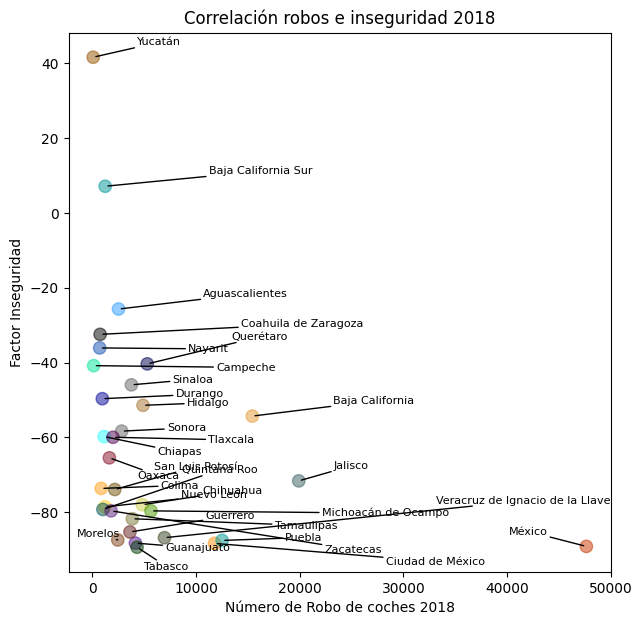

<Figure size 640x480 with 0 Axes>

In [286]:

# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = cor2018["CVE_ENT"].values

# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']


# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    if country in COUNTRY_HIGHLIGHT:
        x, y = Total[idx], Factor_Inseguridad[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=8));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(3, 3),
    arrowprops=dict(arrowstyle="-", lw=1),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
# ax.set_facecolor("white") # set axis background color to white
# fig.set_facecolor("white") # set figure background color to white
#fig.savefig("plot.png", dpi=300)

fig

##2019

In [287]:
R2019 = Robos2.loc[Robos2['Año'] == 2019]
R2019 = R2019.rename(columns={'Entidad': 'CVE_ENT'})

R2019.head()

Año              CVE_ENT  Total
128  2019       Aguascalientes   1642
129  2019      Baja California  13412
130  2019  Baja California Sur    761
131  2019             Campeche    153
132  2019              Chiapas    905

In [288]:
Factor_Inseguridad2019 = env2020.loc[:, 'Factor_Inseguridad']  # o df.iloc[:, <indice de columna>]
Factor_Inseguridad2019.head()

CVE_ENT  Aguascalientes  Baja California  Baja California Sur   Campeche  \
Año                                                                        
2019         -18.852459       -51.993166            44.630072 -17.557252   

CVE_ENT    Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  \
Año                                                                     
2019    -54.598419 -71.279877        -82.707692            -22.605634   

CVE_ENT     Colima    Durango  ...  Quintana Roo  San Luis Potosí  Sinaloa  \
Año                            ...                                           
2019    -63.975735 -33.433373  ...    -75.516373       -82.508475    -50.0   

CVE_ENT     Sonora    Tabasco  Tamaulipas   Tlaxcala  \
Año                                                    
2019    -57.583333 -88.024381  -73.416024 -51.356717   

CVE_ENT  Veracruz de Ignacio de la Llave   Yucatán  Zacatecas  
Año                                                            
2019                          -85.432267  59.11215 -82.217715  

[1 rows x 32 columns]

In [289]:
Factor_Inseguridad2019 = Factor_Inseguridad2019.T
Factor_Inseguridad2019.head()

Año                       2019
CVE_ENT                       
Aguascalientes      -18.852459
Baja California     -51.993166
Baja California Sur  44.630072
Campeche            -17.557252
Chiapas             -54.598419

In [290]:
cor2019 = pd.merge(R2019, Factor_Inseguridad2019, on='CVE_ENT')
cor2019 = cor2019.rename(columns={2019: 'Factor_Inseguridad'})

cor2019.head()

Año              CVE_ENT  Total  Factor_Inseguridad
0  2019       Aguascalientes   1642          -18.852459
1  2019      Baja California  13412          -51.993166
2  2019  Baja California Sur    761           44.630072
3  2019             Campeche    153          -17.557252
4  2019              Chiapas    905          -54.598419

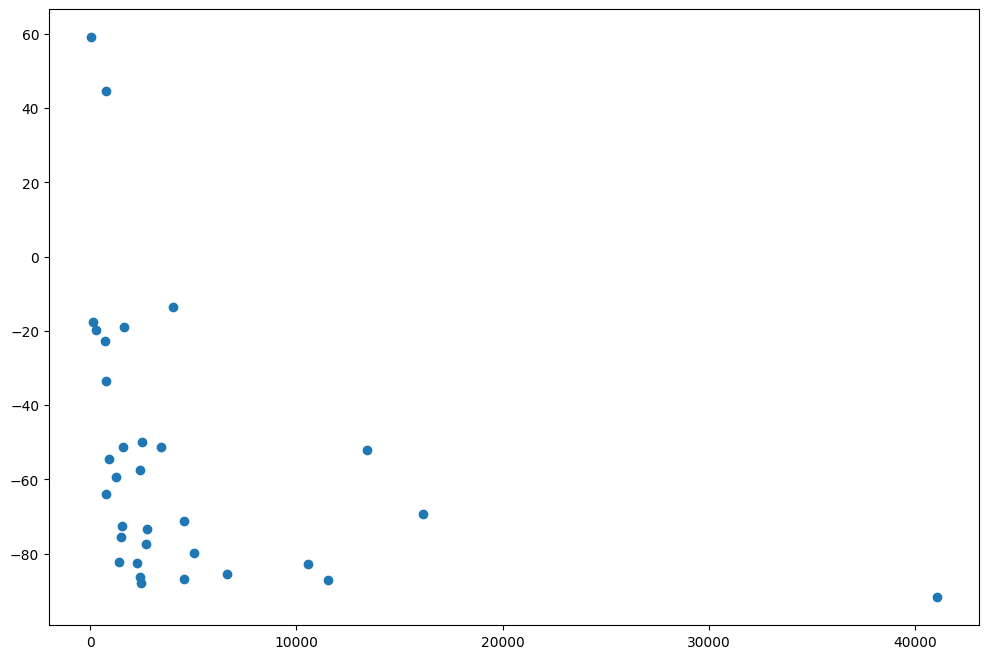

In [291]:
Total = cor2019['Total'].values
Factor_Inseguridad = cor2019['Factor_Inseguridad'].values

fig, ax = plt.subplots(figsize=(12, 8));
ax.scatter(Total, Factor_Inseguridad);

In [292]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2019["CVE_ENT"]).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS]

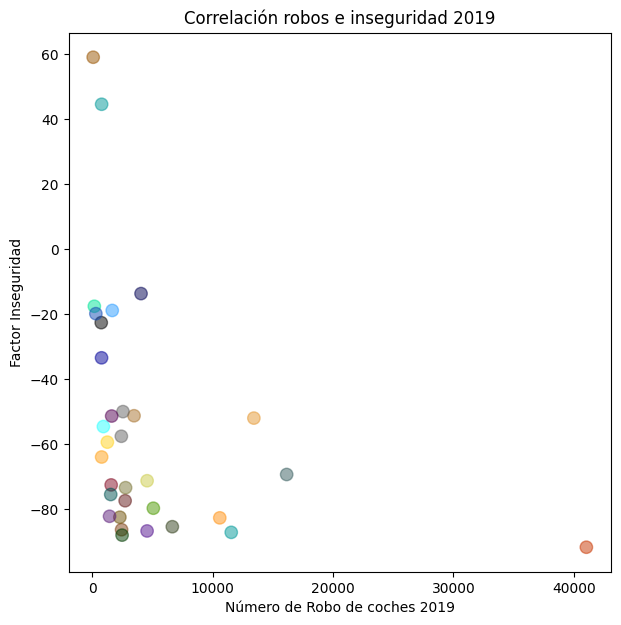

In [293]:
fig, ax = plt.subplots(figsize=(7, 7));
ax.scatter(
    Total, Factor_Inseguridad, color=EDGECOLORS, edgecolors=EDGECOLORS,
    s=80, alpha=0.5
);
ax.set_xlabel('Número de Robo de coches 2019');
ax.set_ylabel('Factor Inseguridad');
ax.set_title('Correlación robos e inseguridad 2019');

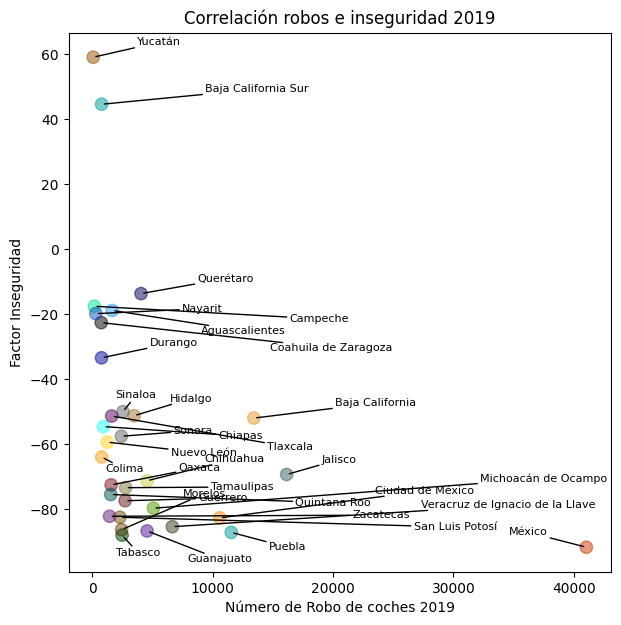

<Figure size 640x480 with 0 Axes>

In [294]:
# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = cor2019["CVE_ENT"].values

# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']


# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    if country in COUNTRY_HIGHLIGHT:
        x, y = Total[idx], Factor_Inseguridad[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=8));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(3, 3),
    arrowprops=dict(arrowstyle="-", lw=1),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
# ax.set_facecolor("white") # set axis background color to white
# fig.set_facecolor("white") # set figure background color to white
#fig.savefig("plot.png", dpi=300)

fig

##2020

In [295]:
R2020 = Robos2.loc[Robos2['Año'] == 2020]
R2020 = R2020.rename(columns={'Entidad': 'CVE_ENT'})

R2020.head()

Año              CVE_ENT  Total
160  2020       Aguascalientes   1106
161  2020      Baja California   9803
162  2020  Baja California Sur    594
163  2020             Campeche    100
164  2020              Chiapas    872

In [296]:
Factor_Inseguridad2020 = env2021.loc[:, 'Factor_Inseguridad']  # o df.iloc[:, <indice de columna>]
Factor_Inseguridad2020.head()

CVE_ENT  Aguascalientes  Baja California  Baja California Sur   Campeche  \
Año                                                                        
2020          -5.382131       -57.478632            48.701673 -17.986799   

CVE_ENT    Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  \
Año                                                                     
2020    -52.060384 -68.681747        -83.471074            -23.167358   

CVE_ENT     Colima  Durango  ...  Quintana Roo  San Luis Potosí    Sinaloa  \
Año                          ...                                             
2020    -63.575568 -39.6292  ...    -70.792839       -81.932495 -36.090909   

CVE_ENT     Sonora    Tabasco  Tamaulipas   Tlaxcala  \
Año                                                    
2020    -73.916238 -81.876173  -70.742358 -47.648262   

CVE_ENT  Veracruz de Ignacio de la Llave    Yucatán  Zacatecas  
Año                                                             
2020                          -80.616894  61.640212 -81.961817  

[1 rows x 32 columns]

In [297]:
Factor_Inseguridad2020 = Factor_Inseguridad2020.T
Factor_Inseguridad2020.head()

Año                       2020
CVE_ENT                       
Aguascalientes       -5.382131
Baja California     -57.478632
Baja California Sur  48.701673
Campeche            -17.986799
Chiapas             -52.060384

In [298]:
cor2020 = pd.merge(R2020, Factor_Inseguridad2020, on='CVE_ENT')
cor2020 = cor2020.rename(columns={2020: 'Factor_Inseguridad'})

cor2020.head()

Año              CVE_ENT  Total  Factor_Inseguridad
0  2020       Aguascalientes   1106           -5.382131
1  2020      Baja California   9803          -57.478632
2  2020  Baja California Sur    594           48.701673
3  2020             Campeche    100          -17.986799
4  2020              Chiapas    872          -52.060384

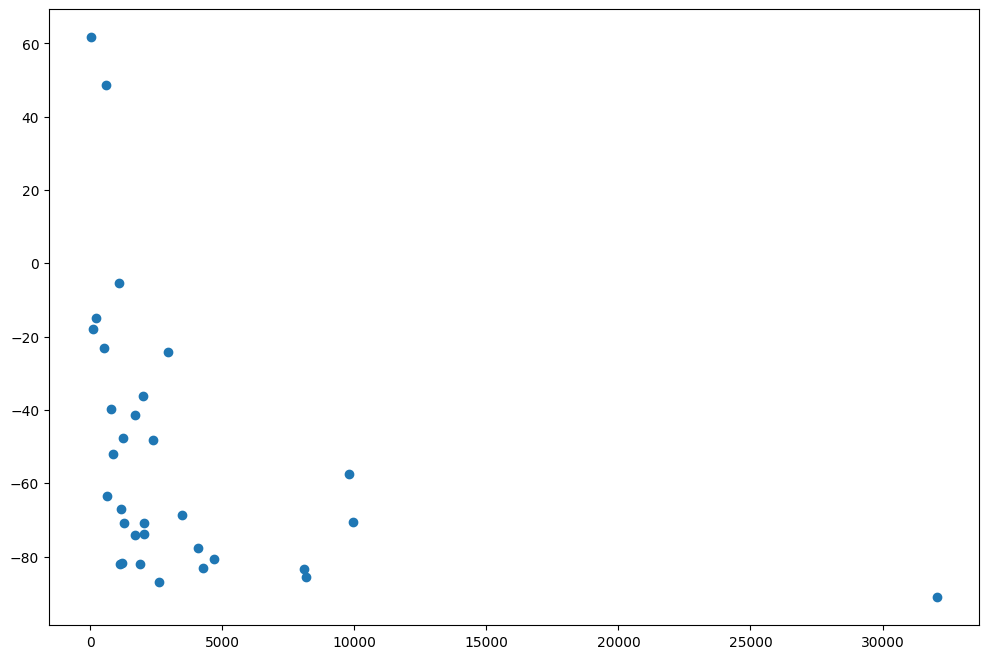

In [299]:
Total = cor2020['Total'].values
Factor_Inseguridad = cor2020['Factor_Inseguridad'].values

fig, ax = plt.subplots(figsize=(12, 8));
ax.scatter(Total, Factor_Inseguridad);

In [300]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2020["CVE_ENT"]).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS]

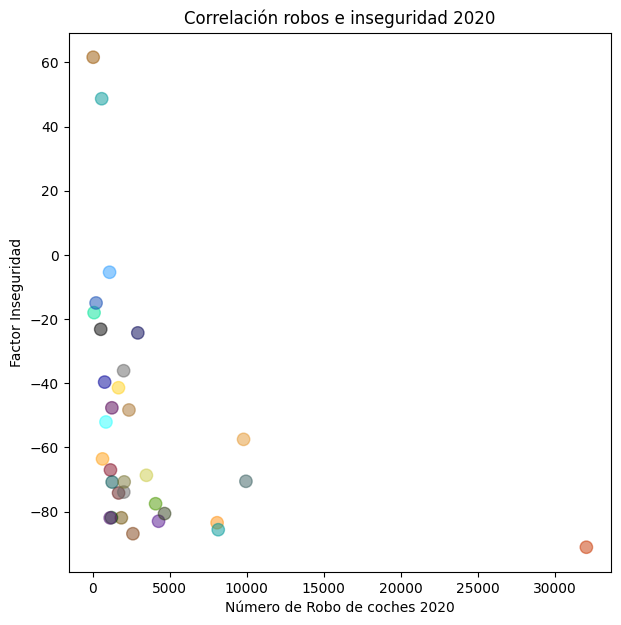

In [301]:
fig, ax = plt.subplots(figsize=(7, 7));
ax.scatter(
    Total, Factor_Inseguridad, color=EDGECOLORS, edgecolors=EDGECOLORS,
    s=80, alpha=0.5
);
ax.set_xlabel('Número de Robo de coches 2020');
ax.set_ylabel('Factor Inseguridad');
ax.set_title('Correlación robos e inseguridad 2020');

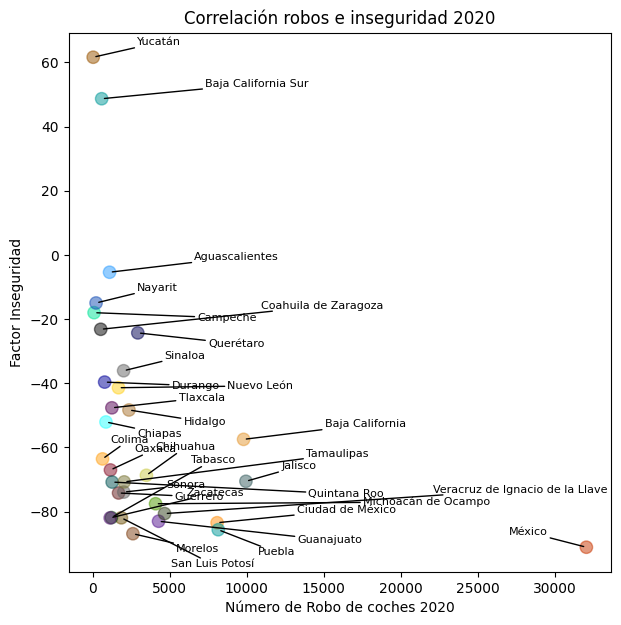

<Figure size 640x480 with 0 Axes>

In [302]:
# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = cor2020["CVE_ENT"].values

# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']


# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    if country in COUNTRY_HIGHLIGHT:
        x, y = Total[idx], Factor_Inseguridad[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=8));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(3, 3),
    arrowprops=dict(arrowstyle="-", lw=1),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
# ax.set_facecolor("white") # set axis background color to white
# fig.set_facecolor("white") # set figure background color to white
#fig.savefig("plot.png", dpi=300)

fig

##2021

In [303]:
R2021 = Robos2.loc[Robos2['Año'] == 2021]
R2021 = R2021.rename(columns={'Entidad': 'CVE_ENT'})

R2021.head()

Año              CVE_ENT  Total
192  2021       Aguascalientes    778
193  2021      Baja California  10875
194  2021  Baja California Sur    402
195  2021             Campeche     76
196  2021              Chiapas    665

In [304]:
Factor_Inseguridad2021 = env2022.loc[:, 'Factor_Inseguridad']  # o df.iloc[:, <indice de columna>]
Factor_Inseguridad2021.head()

CVE_ENT  Aguascalientes  Baja California  Baja California Sur   Campeche  \
Año                                                                        
2021         -17.737003       -70.092099            48.662493 -18.662519   

CVE_ENT    Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  \
Año                                                                     
2021    -67.245283  -63.60396        -79.921178             -3.914328   

CVE_ENT     Colima    Durango  ...  Quintana Roo  San Luis Potosí    Sinaloa  \
Año                            ...                                             
2021    -84.846239 -23.599748  ...    -75.322812        -70.26831 -28.126521   

CVE_ENT     Sonora    Tabasco  Tamaulipas   Tlaxcala  \
Año                                                    
2021    -75.314685 -81.770245  -72.609562 -39.283204   

CVE_ENT  Veracruz de Ignacio de la Llave    Yucatán  Zacatecas  
Año                                                             
2021                          -75.486662  57.824342 -90.173757  

[1 rows x 32 columns]

In [305]:
Factor_Inseguridad2021 = Factor_Inseguridad2021.T
Factor_Inseguridad2021.head()

Año                       2021
CVE_ENT                       
Aguascalientes      -17.737003
Baja California     -70.092099
Baja California Sur  48.662493
Campeche            -18.662519
Chiapas             -67.245283

In [306]:
cor2021 = pd.merge(R2021, Factor_Inseguridad2021, on='CVE_ENT')
cor2021 = cor2021.rename(columns={2021: 'Factor_Inseguridad'})

cor2021.head()

Año              CVE_ENT  Total  Factor_Inseguridad
0  2021       Aguascalientes    778          -17.737003
1  2021      Baja California  10875          -70.092099
2  2021  Baja California Sur    402           48.662493
3  2021             Campeche     76          -18.662519
4  2021              Chiapas    665          -67.245283

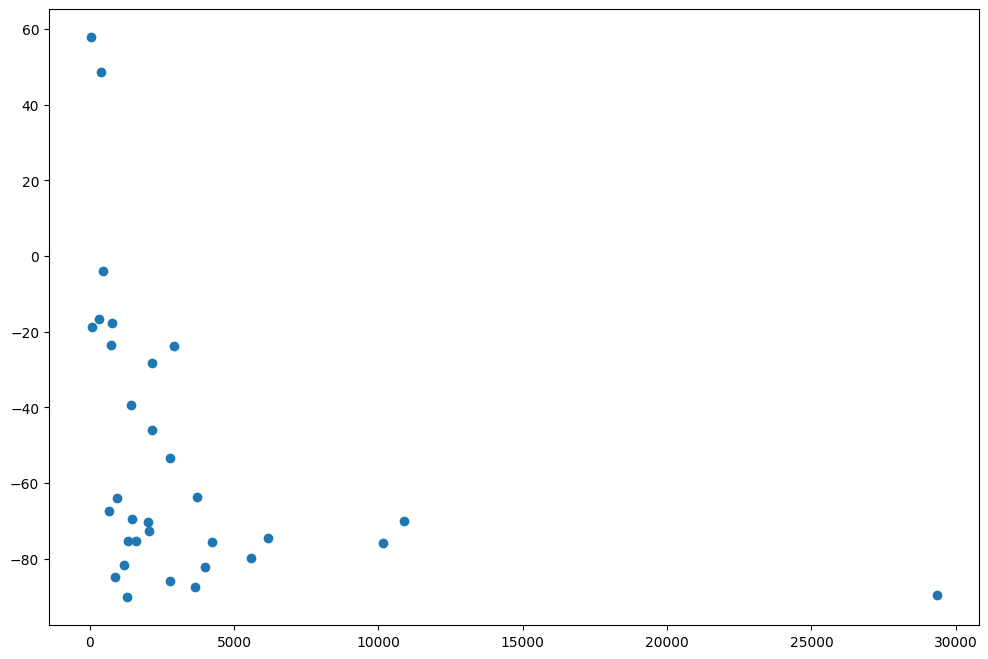

In [307]:
Total = cor2021['Total'].values
Factor_Inseguridad = cor2021['Factor_Inseguridad'].values

fig, ax = plt.subplots(figsize=(12, 8));
ax.scatter(Total, Factor_Inseguridad);

In [308]:
# Okabe Ito colors
REGION_COLS = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 
               'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 
               'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 
               'darkorange', 'darkorchid']

# Category values for the colors
CATEGORY_CODES = pd.Categorical(cor2021["CVE_ENT"]).codes

# Select colors for each region according to its category.
COLORS = np.array(REGION_COLS)[CATEGORY_CODES]

# Compute colors for the edges: simply darker versions of the original colors
EDGECOLORS = [adjust_lightness(color, 0.6) for color in COLORS]

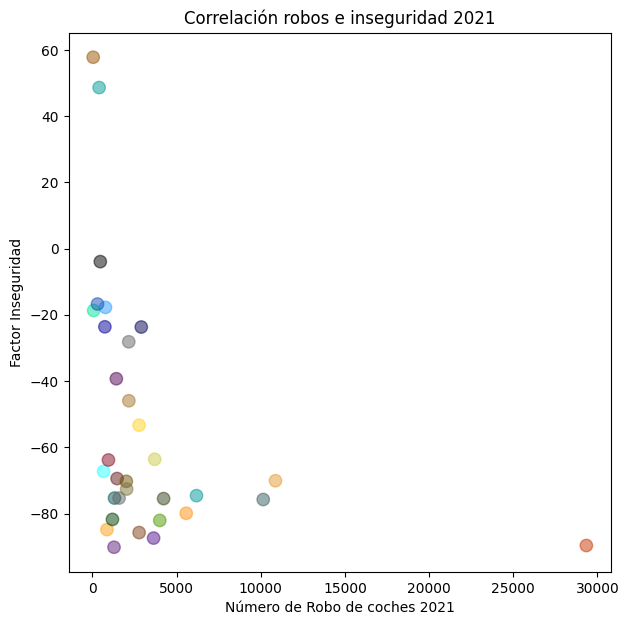

In [309]:
fig, ax = plt.subplots(figsize=(7, 7));
ax.scatter(
    Total, Factor_Inseguridad, color=EDGECOLORS, edgecolors=EDGECOLORS,
    s=80, alpha=0.5
);
ax.set_xlabel('Número de Robo de coches 2021');
ax.set_ylabel('Factor Inseguridad');
ax.set_title('Correlación robos e inseguridad 2021');

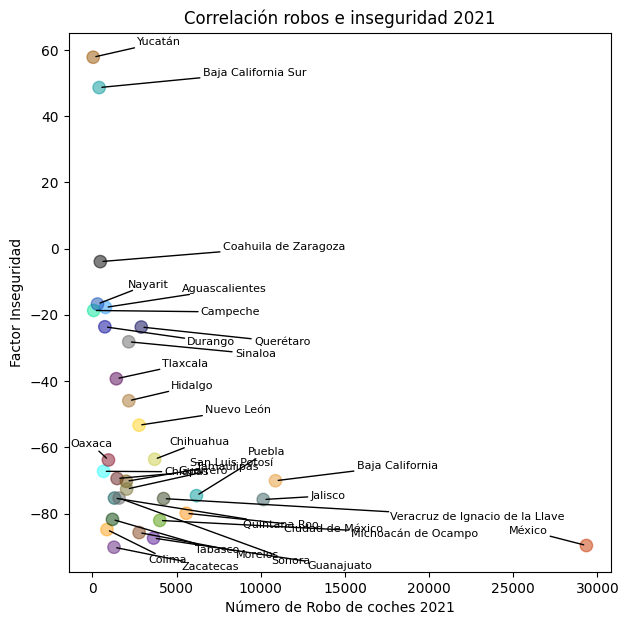

<Figure size 640x480 with 0 Axes>

In [310]:
# Specify countries ----------------------------------------------
# All the countries, in the order they appear in the dataset 
COUNTRIES = cor2021["CVE_ENT"].values

# Countries that are going to be highlighted
COUNTRY_HIGHLIGHT = ['Aguascalientes', 'Baja California', 'Baja California Sur',
       'Campeche', 'Chiapas', 'Chihuahua', 'Ciudad de México',
       'Coahuila de Zaragoza', 'Colima', 'Durango', 'Guanajuato',
       'Guerrero', 'Hidalgo', 'Jalisco', 'Michoacán de Ocampo', 'Morelos',
       'México', 'Nayarit', 'Nuevo León', 'Oaxaca', 'Puebla', 'Querétaro',
       'Quintana Roo', 'San Luis Potosí', 'Sinaloa', 'Sonora', 'Tabasco',
       'Tamaulipas', 'Tlaxcala', 'Veracruz de Ignacio de la Llave',
       'Yucatán', 'Zacatecas']


# Add labels -----------------------------------------------------
# Iterate through all the countries in COUNTRIES
# `ax.text()` outputs are appended to the `TEXTS` list. 
# This list is passed to `adjust_text()` to adjust the position of
# the legends and add connecting lines
TEXTS = []
for idx, country in enumerate(COUNTRIES):
    # Only append selected countries
    if country in COUNTRY_HIGHLIGHT:
        x, y = Total[idx], Factor_Inseguridad[idx]
        TEXTS.append(ax.text(x, y, country, fontsize=8));

# Adjust text position and add lines -----------------------------
# 'expand_points' is a tuple with two multipliers by which to expand
# the bounding box of texts when repelling them from points

# 'arrowprops' indicates all the properties we want for the arrows
# arrowstyle="-" means the arrow does not have a head (it's just a line!)
adjust_text(
    TEXTS, 
    expand_points=(3, 3),
    arrowprops=dict(arrowstyle="-", lw=1),
    ax=ax
);

# Save it! -------------------------------------------------------
# Optional:
# ax.set_facecolor("white") # set axis background color to white
# fig.set_facecolor("white") # set figure background color to white
#fig.savefig("plot.png", dpi=300)

fig

##Prueba Bubble animada

In [311]:
bubble = pd.concat([cor2015, cor2016, cor2017, cor2018, cor2019, cor2020, cor2021])
bubble['pop'] = 1

In [312]:
bubble

Año                          CVE_ENT  Total  Factor_Inseguridad  pop
0   2015                   Aguascalientes   1641           22.354105    1
1   2015                  Baja California  14138          -28.649760    1
2   2015              Baja California Sur   1157           14.578910    1
3   2015                         Campeche     73          -23.383085    1
4   2015                          Chiapas   1488          -32.400932    1
..   ...                              ...    ...                 ...  ...
27  2021                       Tamaulipas   2037          -72.609562    1
28  2021                         Tlaxcala   1424          -39.283204    1
29  2021  Veracruz de Ignacio de la Llave   4231          -75.486662    1
30  2021                          Yucatán     49           57.824342    1
31  2021                        Zacatecas   1286          -90.173757    1

[224 rows x 5 columns]

In [313]:
fig = px.scatter(bubble, x="Total", y="Factor_Inseguridad", size="pop", color="CVE_ENT", log_x=True,
           animation_frame="Año", 
           title="Correlación entre robos de coches y creencia general")

In [314]:
fig.show()

In [315]:
#Descargar video de la figura anterior
#import plotly.express as px

#fig = px.scatter(prueba, x="Total", y="Factor_Inseguridad", size="pop", color="CVE_ENT", log_x=True,
#           animation_frame="Año", 
#           title="Correlación entre robos de coches y creencia general")

#fig.write_html('animation.html', auto_play=False)

In [316]:
pip install imageio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Pregunta 2 de investigación

¿Cuáles son los estados y los municipios con más incidencia de robo de coches? 

In [317]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [318]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [319]:
Robos

Año  Aguascalientes  Baja California  Baja California Sur  Campeche  \
0  2015            1641            14138                 1157        73   
1  2016            2601            16628                 1746       196   
2  2017            2838            19732                 1412       159   
3  2018            2523            15425                 1233       120   
4  2019            1642            13412                  761       153   
5  2020            1106             9803                  594       100   
6  2021             778            10875                  402        76   

   Chiapas  Chihuahua  Ciudad de México  Coahuila de Zaragoza  Colima  ...  \
0     1488       4427             10665                  1451     575  ...   
1     1813       3746              9624                   915    1070  ...   
2     1832       4350              9012                   889    1139  ...   
3     1134       4818             11782                   744     847  ...   
4      905       4540             10578                   729     762  ...   
5      872       3496              8085                   532     649  ...   
6      665       3702              5576                   472     867  ...   

   Quintana Roo  San Luis Potosí  Sinaloa  Sonora  Tabasco  Tamaulipas  \
0           851              903     3337    4651     1708        6416   
1           446             1328     3266    3691     2410        4284   
2           870             1750     4759    3483     3252        4949   
3          1012             2158     3764    2825     4308        3851   
4          1516             2276     2535    2399     2460        2751   
5          1274             1871     2018    2029     1225        2054   
6          1315             2017     2161    1587     1193        2037   

   Tlaxcala  Veracruz de Ignacio de la Llave  Yucatán  Zacatecas  
0      1131                             6144      117       1959  
1      1352                             7560      105       2077  
2      2157                             8927       70       1924  
3      1983                             6952       75       1802  
4      1595                             6635       59       1418  
5      1256                             4675       43       1145  
6      1424                             4231       49       1286  

[7 rows x 33 columns]

In [320]:
Robos.T.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [321]:
df = Robos.copy()
df = df.T
df

0      1      2      3      4      5  \
Año                               2015   2016   2017   2018   2019   2020   
Aguascalientes                    1641   2601   2838   2523   1642   1106   
Baja California                  14138  16628  19732  15425  13412   9803   
Baja California Sur               1157   1746   1412   1233    761    594   
Campeche                            73    196    159    120    153    100   
Chiapas                           1488   1813   1832   1134    905    872   
Chihuahua                         4427   3746   4350   4818   4540   3496   
Ciudad de México                 10665   9624   9012  11782  10578   8085   
Coahuila de Zaragoza              1451    915    889    744    729    532   
Colima                             575   1070   1139    847    762    649   
Durango                           1443   1042   1198    958    754    787   
Guanajuato                        5457   5326   4944   4150   4538   4285   
Guerrero                          3805   3931   4162   3623   2714   1690   
Hidalgo                           2976   3610   4808   4881   3454   2365   
Jalisco                           7253  13943  20833  19910  16137   9956   
Michoacán de Ocampo               5734   5869   6120   5651   5057   4093   
Morelos                           3175   3034   2520   2445   2419   2621   
México                           43431  37932  41625  47657  41042  32051   
Nayarit                            188    168    221    703    281    230   
Nuevo León                        2134   2417   2301   1213   1237   1685   
Oaxaca                             243   1587   1577   1637   1553   1163   
Puebla                            2935   4532  10066  12512  11531   8159   
Querétaro                         3508   4347   5050   5291   4035   2939   
Quintana Roo                       851    446    870   1012   1516   1274   
San Luis Potosí                    903   1328   1750   2158   2276   1871   
Sinaloa                           3337   3266   4759   3764   2535   2018   
Sonora                            4651   3691   3483   2825   2399   2029   
Tabasco                           1708   2410   3252   4308   2460   1225   
Tamaulipas                        6416   4284   4949   3851   2751   2054   
Tlaxcala                          1131   1352   2157   1983   1595   1256   
Veracruz de Ignacio de la Llave   6144   7560   8927   6952   6635   4675   
Yucatán                            117    105     70     75     59     43   
Zacatecas                         1959   2077   1924   1802   1418   1145   

                                     6  
Año                               2021  
Aguascalientes                     778  
Baja California                  10875  
Baja California Sur                402  
Campeche                            76  
Chiapas                            665  
Chihuahua                         3702  
Ciudad de México                  5576  
Coahuila de Zaragoza               472  
Colima                             867  
Durango                            743  
Guanajuato                        3636  
Guerrero                          1468  
Hidalgo                           2167  
Jalisco                          10148  
Michoacán de Ocampo               4004  
Morelos                           2777  
México                           29341  
Nayarit                            305  
Nuevo León                        2774  
Oaxaca                             955  
Puebla                            6184  
Querétaro                         2905  
Quintana Roo                      1315  
San Luis Potosí                   2017  
Sinaloa                           2161  
Sonora                            1587  
Tabasco                           1193  
Tamaulipas                        2037  
Tlaxcala                          1424  
Veracruz de Ignacio de la Llave   4231  
Yucatán                             49  
Zacatecas                         1286

In [322]:
df_t = Robos.set_index('Año').T
df_t

Año                               2015   2016   2017   2018   2019   2020  \
Aguascalientes                    1641   2601   2838   2523   1642   1106   
Baja California                  14138  16628  19732  15425  13412   9803   
Baja California Sur               1157   1746   1412   1233    761    594   
Campeche                            73    196    159    120    153    100   
Chiapas                           1488   1813   1832   1134    905    872   
Chihuahua                         4427   3746   4350   4818   4540   3496   
Ciudad de México                 10665   9624   9012  11782  10578   8085   
Coahuila de Zaragoza              1451    915    889    744    729    532   
Colima                             575   1070   1139    847    762    649   
Durango                           1443   1042   1198    958    754    787   
Guanajuato                        5457   5326   4944   4150   4538   4285   
Guerrero                          3805   3931   4162   3623   2714   1690   
Hidalgo                           2976   3610   4808   4881   3454   2365   
Jalisco                           7253  13943  20833  19910  16137   9956   
Michoacán de Ocampo               5734   5869   6120   5651   5057   4093   
Morelos                           3175   3034   2520   2445   2419   2621   
México                           43431  37932  41625  47657  41042  32051   
Nayarit                            188    168    221    703    281    230   
Nuevo León                        2134   2417   2301   1213   1237   1685   
Oaxaca                             243   1587   1577   1637   1553   1163   
Puebla                            2935   4532  10066  12512  11531   8159   
Querétaro                         3508   4347   5050   5291   4035   2939   
Quintana Roo                       851    446    870   1012   1516   1274   
San Luis Potosí                    903   1328   1750   2158   2276   1871   
Sinaloa                           3337   3266   4759   3764   2535   2018   
Sonora                            4651   3691   3483   2825   2399   2029   
Tabasco                           1708   2410   3252   4308   2460   1225   
Tamaulipas                        6416   4284   4949   3851   2751   2054   
Tlaxcala                          1131   1352   2157   1983   1595   1256   
Veracruz de Ignacio de la Llave   6144   7560   8927   6952   6635   4675   
Yucatán                            117    105     70     75     59     43   
Zacatecas                         1959   2077   1924   1802   1418   1145   

Año                               2021  
Aguascalientes                     778  
Baja California                  10875  
Baja California Sur                402  
Campeche                            76  
Chiapas                            665  
Chihuahua                         3702  
Ciudad de México                  5576  
Coahuila de Zaragoza               472  
Colima                             867  
Durango                            743  
Guanajuato                        3636  
Guerrero                          1468  
Hidalgo                           2167  
Jalisco                          10148  
Michoacán de Ocampo               4004  
Morelos                           2777  
México                           29341  
Nayarit                            305  
Nuevo León                        2774  
Oaxaca                             955  
Puebla                            6184  
Querétaro                         2905  
Quintana Roo                      1315  
San Luis Potosí                   2017  
Sinaloa                           2161  
Sonora                            1587  
Tabasco                           1193  
Tamaulipas                        2037  
Tlaxcala                          1424  
Veracruz de Ignacio de la Llave   4231  
Yucatán                             49  
Zacatecas                         1286

In [323]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_t)

In [324]:
scaled_features[:5]

array([[-0.37878458, -0.30976271, -0.3417248 , -0.34473443, -0.40841103,
        -0.43038072, -0.48939461],
       [ 1.2570059 ,  1.69475447,  1.75489162,  1.11878201,  1.14014164,
         1.07702154,  1.41060245],
       [-0.4421376 , -0.4319458 , -0.5186974 , -0.49106339, -0.52432224,
        -0.51912281, -0.56014819],
       [-0.5840274 , -0.65344731, -0.67419997, -0.61731466, -0.60431544,
        -0.60474506, -0.62149305],
       [-0.39881147, -0.42237122, -0.46657363, -0.50229329, -0.50537648,
        -0.47093863, -0.51065832]])

In [325]:
scaled_features.shape

(32, 7)

In [326]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [327]:
#Ejecutamos el agrupamiento
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [328]:
kmeans.inertia_

17.156310682849035

In [329]:
#Encontramos la ubicación de los centroides
kmeans.cluster_centers_

array([[ 5.09130297,  4.7391855 ,  4.47190495,  4.77496415,  4.77535916,
         4.93314266,  4.88543119],
       [-0.28875927, -0.33861287, -0.36584875, -0.35280129, -0.35856203,
        -0.34127865, -0.33352106],
       [ 0.4832876 ,  0.81294983,  1.00803252,  0.87957387,  0.90945071,
         0.78802044,  0.75722325]])

In [330]:
#Número de iteraciones para que converga
kmeans.n_iter_

11

In [331]:
#Clusters obtenidos
kmeans.labels_[:5]

array([1, 2, 1, 1, 1], dtype=int32)

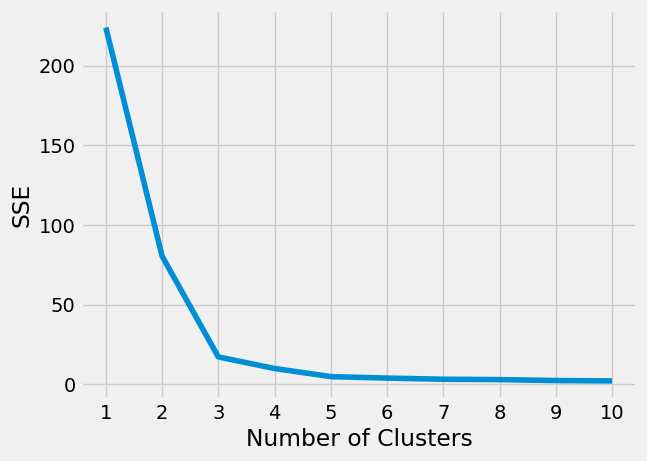

In [332]:
#Escogemos el número apropiado de Clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [333]:
#Verificamos el número de k obtenido
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

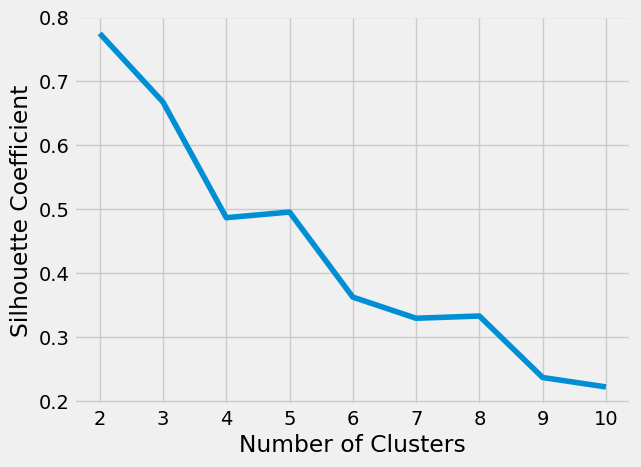

In [334]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [335]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3, init='k-means++', n_init= 10, random_state=0)
y_kmeans=kmeans.fit_predict(scaled_features)

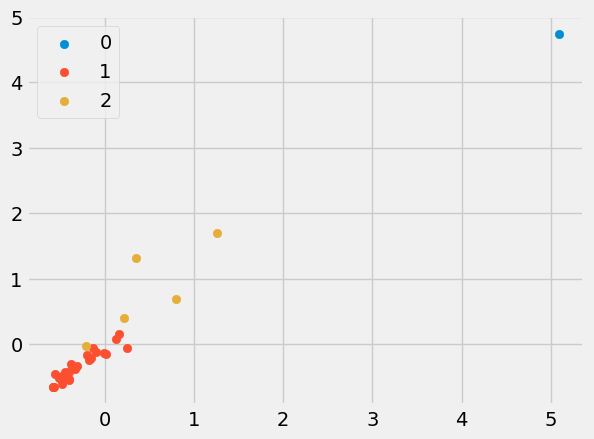

In [336]:
#Importing required modules
 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#Import KMeans module
from sklearn.cluster import KMeans
 
# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_t)

# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
label = kmeans.labels_
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.legend()
plt.show()

In [337]:
import plotly.graph_objs as go
import plotly.offline as pyo

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_t)

# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Crear un objeto de traza de plotly para cada etiqueta de grupo
traces = []
for label_ in set(labels):
    x_vals = scaled_features[labels == label_, 0]
    y_vals = scaled_features[labels == label_, 1]
    nombres_entidades = df_t.index[labels == label_].tolist()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', name=f'Grupo {label_}', marker=dict(color=label_, colorscale='Viridis'), text=nombres_entidades, textposition='top center')
    traces.append(trace)


# Crear un objeto de datos de plotly a partir de los objetos de traza
data = traces

# Crear un objeto de diseño de plotly con leyenda habilitada
layout = go.Layout(title='Agrupamiento K-Means', hovermode='closest', xaxis_title='Feature 1', yaxis_title='Feature 2', legend=dict(orientation='h'))

# Crear un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura en una ventana emergente
pyo.iplot(fig)


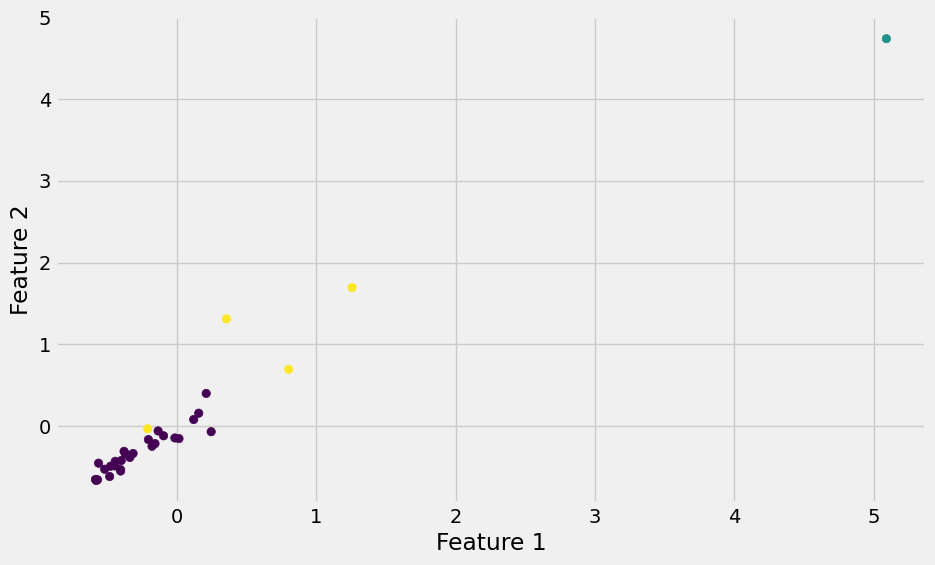

In [338]:
import mplcursors

# Escalar las características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_t)

# Ejecutar el agrupamiento
#kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=0)
labels = kmeans.fit_predict(scaled_features)

# Plotting de los resultados
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap="viridis")
mplcursors.cursor(scatter).connect("add", lambda sel: sel.annotation.set_text(df_t.index[sel.target.index.tolist()]))

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
plt.show()

##Estado de México por municipios y por año

Ahora vamos a agrupar a el estado de M
éxico con sus municipios para hacer el agrupamiento

In [339]:
total_rcmunem

Municipio  Total
0    Acambay de Ruíz Castañeda    350
1                      Acolman   2479
2                       Aculco    254
3       Almoloya de Alquisiras     35
4           Almoloya de Juárez   1297
..                         ...    ...
120                Zacazonapan      2
121                  Zacualpan     15
122               Zinacantepec   1740
123                Zumpahuacán     10
124                   Zumpango   3985

[125 rows x 2 columns]

In [340]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
estado_mexico = cochertodo.loc[cochertodo['Entidad'] == 'México', ['Año','Municipio','Modalidad', 'Total']].copy()
estado_mexico

Año                  Municipio  \
64525    2015  Acambay de Ruíz Castañeda   
64526    2015  Acambay de Ruíz Castañeda   
64623    2015                    Acolman   
64624    2015                    Acolman   
64721    2015                     Aculco   
...       ...                        ...   
1666924  2022                   Luvianos   
1667021  2022        San José del Rincón   
1667022  2022        San José del Rincón   
1667119  2022                  Tonanitla   
1667120  2022                  Tonanitla   

                                       Modalidad  Total  
64525    Robo de coche de 4 ruedas Con violencia      9  
64526    Robo de coche de 4 ruedas Sin violencia     25  
64623    Robo de coche de 4 ruedas Con violencia    129  
64624    Robo de coche de 4 ruedas Sin violencia    198  
64721    Robo de coche de 4 ruedas Con violencia      9  
...                                          ...    ...  
1666924  Robo de coche de 4 ruedas Sin violencia      1  
1667021  Robo de coche de 4 ruedas Con violencia      5  
1667022  Robo de coche de 4 ruedas Sin violencia     12  
1667119  Robo de coche de 4 ruedas Con violencia     71  
1667120  Robo de coche de 4 ruedas Sin violencia     11  

[2000 rows x 4 columns]

In [341]:
estado_mexico = estado_mexico.groupby(['Año', 'Municipio'])['Total'].sum().reset_index()
estado_mexico

Año                  Municipio  Total
0    2015  Acambay de Ruíz Castañeda     34
1    2015                    Acolman    327
2    2015                     Aculco     17
3    2015     Almoloya de Alquisiras      7
4    2015         Almoloya de Juárez    158
..    ...                        ...    ...
995  2022                Zacazonapan      0
996  2022                  Zacualpan      2
997  2022               Zinacantepec    146
998  2022                Zumpahuacán      2
999  2022                   Zumpango    406

[1000 rows x 3 columns]

In [342]:
municipios_em = estado_mexico.pivot(index='Año', columns='Municipio', values='Total').reset_index()
municipios_em.columns.name = None
municipios_em

Año  Acambay de Ruíz Castañeda  Acolman  Aculco  Almoloya de Alquisiras  \
0  2015                         34      327      17                       7   
1  2016                         31      267      17                       6   
2  2017                         17      383      39                       3   
3  2018                         81      425      35                       7   
4  2019                         62      358      34                       6   
5  2020                         35      214      46                       3   
6  2021                         52      244      25                       2   
7  2022                         38      261      41                       1   

   Almoloya de Juárez  Almoloya del Río  Amanalco  Amatepec  Amecameca  ...  \
0                 158                13         4         4         93  ...   
1                  82                10         5         4         44  ...   
2                 241                11         6         4         58  ...   
3                 166                 9         4         7        107  ...   
4                 162                 8         8         4         92  ...   
5                 179                 6         8         3         49  ...   
6                 168                 4         6         4         33  ...   
7                 141                 4         6         2         48  ...   

   Villa Victoria  Villa de Allende  Villa del Carbón  Xalatlaco  Xonacatlán  \
0              19                 7                14         24          52   
1              17                12                12         14          59   
2              31                12                 6         32          77   
3              44                23                25         22         100   
4              28                11                22         28         106   
5              30                11                19         27          88   
6              32                19                15         43          68   
7              53                19                 7         16          73   

   Zacazonapan  Zacualpan  Zinacantepec  Zumpahuacán  Zumpango  
0            0          6           194            1       505  
1            0          2           164            3       490  
2            0          2           313            1       570  
3            0          1           252            0       806  
4            0          0           245            0       485  
5            0          1           209            1       381  
6            2          1           217            2       342  
7            0          2           146            2       406  

[8 rows x 126 columns]

In [343]:
df_em = municipios_em.set_index('Año').T
df_em

Año                        2015  2016  2017  2018  2019  2020  2021  2022
Acambay de Ruíz Castañeda    34    31    17    81    62    35    52    38
Acolman                     327   267   383   425   358   214   244   261
Aculco                       17    17    39    35    34    46    25    41
Almoloya de Alquisiras        7     6     3     7     6     3     2     1
Almoloya de Juárez          158    82   241   166   162   179   168   141
...                         ...   ...   ...   ...   ...   ...   ...   ...
Zacazonapan                   0     0     0     0     0     0     2     0
Zacualpan                     6     2     2     1     0     1     1     2
Zinacantepec                194   164   313   252   245   209   217   146
Zumpahuacán                   1     3     1     0     0     1     2     2
Zumpango                    505   490   570   806   485   381   342   406

[125 rows x 8 columns]

In [344]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_em)

In [345]:
scaled_features[:5]

array([[-0.30495896, -0.29208873, -0.31330645, -0.26602257, -0.28254491,
        -0.28721029, -0.273518  , -0.32843115],
       [-0.01989421, -0.03908296,  0.04957381,  0.03875656,  0.03146932,
        -0.05501163,  0.01387887,  0.10251492],
       [-0.32149855, -0.30709755, -0.29149398, -0.30677792, -0.31224896,
        -0.2729411 , -0.31393319, -0.32263367],
       [-0.33122773, -0.31889019, -0.32718712, -0.33158552, -0.34195301,
        -0.32872067, -0.34836094, -0.39993341],
       [-0.18431722, -0.23741376, -0.0912158 , -0.19071377, -0.17645902,
        -0.1004136 , -0.09988239, -0.12938431]])

In [346]:
scaled_features.shape

(125, 8)

In [347]:
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [348]:
#Ejecutamos el agrupamiento
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4, n_init=10, random_state=42)

In [349]:
kmeans.inertia_

46.75992540210082

In [350]:
#Encontramos la ubicación de los centroides
kmeans.cluster_centers_

array([[ 1.11798654,  0.95947985,  0.9064295 ,  0.92129691,  1.00863822,
         0.91313141,  0.91415625,  1.09946688],
       [-0.25767168, -0.2520459 , -0.25162949, -0.24908507, -0.25340474,
        -0.24616737, -0.25403187, -0.27590562],
       [ 8.73441506,  8.75286766,  8.37400728,  8.78963877,  8.86099781,
         8.97738671,  8.46065272,  7.20442877],
       [ 2.45131556,  2.64722728,  2.84975023,  2.64178298,  2.54729616,
         2.53225227,  2.87736964,  3.38147338]])

In [351]:
#Número de iteraciones para que converga
kmeans.n_iter_

18

In [352]:
#Clusters obtenidos
kmeans.labels_[:5]

array([1, 1, 1, 1, 1], dtype=int32)

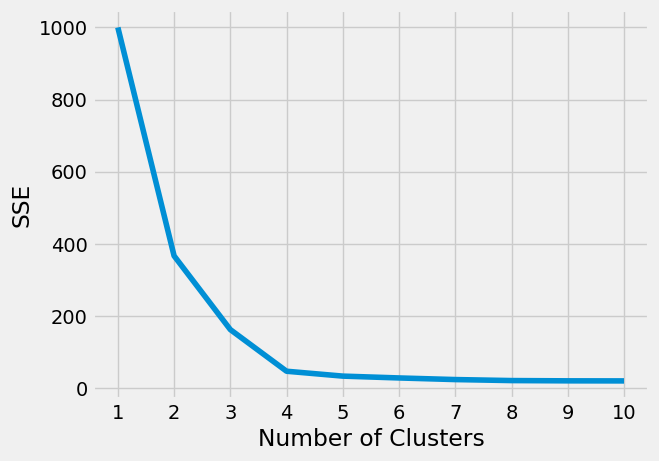

In [353]:
#Escogemos el número apropiado de Clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [354]:
#Verificamos el número de k obtenido
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

4

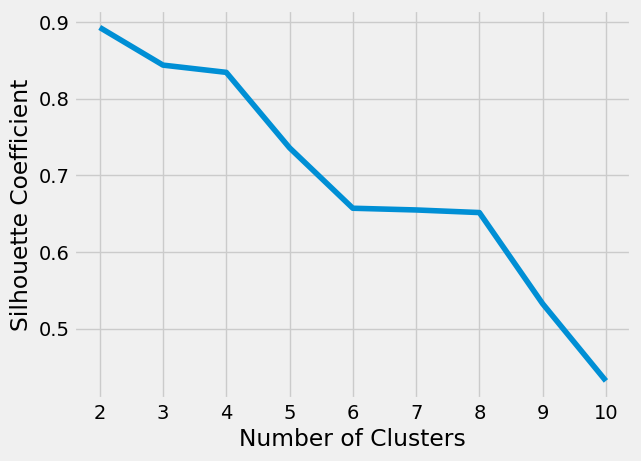

In [355]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [356]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4, init='k-means++', n_init= 10, random_state=0)
y_kmeans=kmeans.fit_predict(scaled_features)

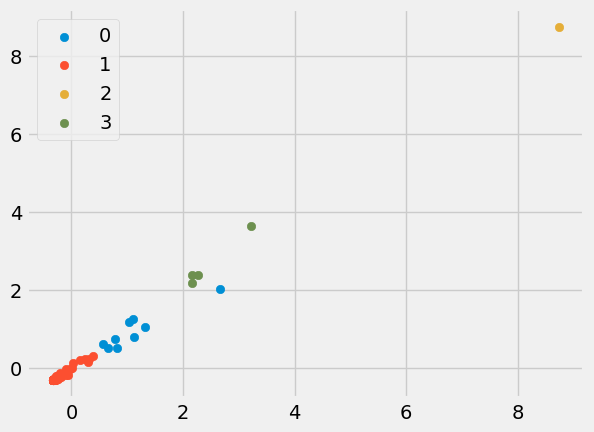

In [357]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
label = kmeans.labels_
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.legend()
plt.show()

In [358]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Crear un objeto de traza de plotly para cada etiqueta de grupo
traces = []
for label_ in set(labels):
    x_vals = scaled_features[labels == label_, 0]
    y_vals = scaled_features[labels == label_, 1]
    nombres_entidades = df_em.index[labels == label_].tolist()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', name=f'Grupo {label_}', marker=dict(color=label_, colorscale='Viridis'), text=nombres_entidades, textposition='top center')
    traces.append(trace)


# Crear un objeto de datos de plotly a partir de los objetos de traza
data = traces

# Crear un objeto de diseño de plotly con leyenda habilitada
layout = go.Layout(title='Agrupamiento K-Means', hovermode='closest', xaxis_title='Feature 1', yaxis_title='Feature 2', legend=dict(orientation='h'))

# Crear un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura en una ventana emergente
pyo.iplot(fig)


#Pregunta 3 de investigación

¿Cuáles son los estados y los municipios con menos incidencia de robo de coches?

Usamos el mismo código que el de la pregunta 2, solo vamos a cambiar los estados

In [359]:
df_t = Robos.set_index('Año').T
df_t

Año                               2015   2016   2017   2018   2019   2020  \
Aguascalientes                    1641   2601   2838   2523   1642   1106   
Baja California                  14138  16628  19732  15425  13412   9803   
Baja California Sur               1157   1746   1412   1233    761    594   
Campeche                            73    196    159    120    153    100   
Chiapas                           1488   1813   1832   1134    905    872   
Chihuahua                         4427   3746   4350   4818   4540   3496   
Ciudad de México                 10665   9624   9012  11782  10578   8085   
Coahuila de Zaragoza              1451    915    889    744    729    532   
Colima                             575   1070   1139    847    762    649   
Durango                           1443   1042   1198    958    754    787   
Guanajuato                        5457   5326   4944   4150   4538   4285   
Guerrero                          3805   3931   4162   3623   2714   1690   
Hidalgo                           2976   3610   4808   4881   3454   2365   
Jalisco                           7253  13943  20833  19910  16137   9956   
Michoacán de Ocampo               5734   5869   6120   5651   5057   4093   
Morelos                           3175   3034   2520   2445   2419   2621   
México                           43431  37932  41625  47657  41042  32051   
Nayarit                            188    168    221    703    281    230   
Nuevo León                        2134   2417   2301   1213   1237   1685   
Oaxaca                             243   1587   1577   1637   1553   1163   
Puebla                            2935   4532  10066  12512  11531   8159   
Querétaro                         3508   4347   5050   5291   4035   2939   
Quintana Roo                       851    446    870   1012   1516   1274   
San Luis Potosí                    903   1328   1750   2158   2276   1871   
Sinaloa                           3337   3266   4759   3764   2535   2018   
Sonora                            4651   3691   3483   2825   2399   2029   
Tabasco                           1708   2410   3252   4308   2460   1225   
Tamaulipas                        6416   4284   4949   3851   2751   2054   
Tlaxcala                          1131   1352   2157   1983   1595   1256   
Veracruz de Ignacio de la Llave   6144   7560   8927   6952   6635   4675   
Yucatán                            117    105     70     75     59     43   
Zacatecas                         1959   2077   1924   1802   1418   1145   

Año                               2021  
Aguascalientes                     778  
Baja California                  10875  
Baja California Sur                402  
Campeche                            76  
Chiapas                            665  
Chihuahua                         3702  
Ciudad de México                  5576  
Coahuila de Zaragoza               472  
Colima                             867  
Durango                            743  
Guanajuato                        3636  
Guerrero                          1468  
Hidalgo                           2167  
Jalisco                          10148  
Michoacán de Ocampo               4004  
Morelos                           2777  
México                           29341  
Nayarit                            305  
Nuevo León                        2774  
Oaxaca                             955  
Puebla                            6184  
Querétaro                         2905  
Quintana Roo                      1315  
San Luis Potosí                   2017  
Sinaloa                           2161  
Sonora                            1587  
Tabasco                           1193  
Tamaulipas                        2037  
Tlaxcala                          1424  
Veracruz de Ignacio de la Llave   4231  
Yucatán                             49  
Zacatecas                         1286

In [360]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_t)

In [361]:
scaled_features[:5]

array([[-0.37878458, -0.30976271, -0.3417248 , -0.34473443, -0.40841103,
        -0.43038072, -0.48939461],
       [ 1.2570059 ,  1.69475447,  1.75489162,  1.11878201,  1.14014164,
         1.07702154,  1.41060245],
       [-0.4421376 , -0.4319458 , -0.5186974 , -0.49106339, -0.52432224,
        -0.51912281, -0.56014819],
       [-0.5840274 , -0.65344731, -0.67419997, -0.61731466, -0.60431544,
        -0.60474506, -0.62149305],
       [-0.39881147, -0.42237122, -0.46657363, -0.50229329, -0.50537648,
        -0.47093863, -0.51065832]])

In [362]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [363]:
#Ejecutamos el agrupamiento
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [364]:
kmeans.inertia_

17.156310682849035

In [365]:
#Encontramos la ubicación de los centroides
kmeans.cluster_centers_

array([[ 5.09130297,  4.7391855 ,  4.47190495,  4.77496415,  4.77535916,
         4.93314266,  4.88543119],
       [-0.28875927, -0.33861287, -0.36584875, -0.35280129, -0.35856203,
        -0.34127865, -0.33352106],
       [ 0.4832876 ,  0.81294983,  1.00803252,  0.87957387,  0.90945071,
         0.78802044,  0.75722325]])

In [366]:
#Número de iteraciones para que converga
kmeans.n_iter_

11

In [367]:
#Clusters obtenidos
kmeans.labels_[:5]

array([1, 2, 1, 1, 1], dtype=int32)

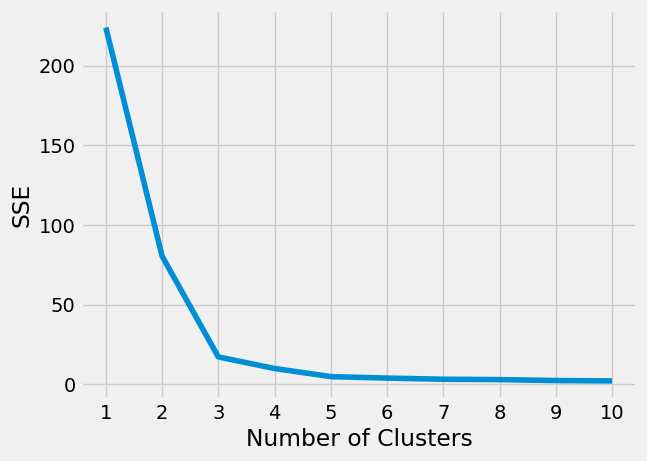

In [368]:
#Escogemos el número apropiado de Clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [369]:
#Verificamos el número de k obtenido
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

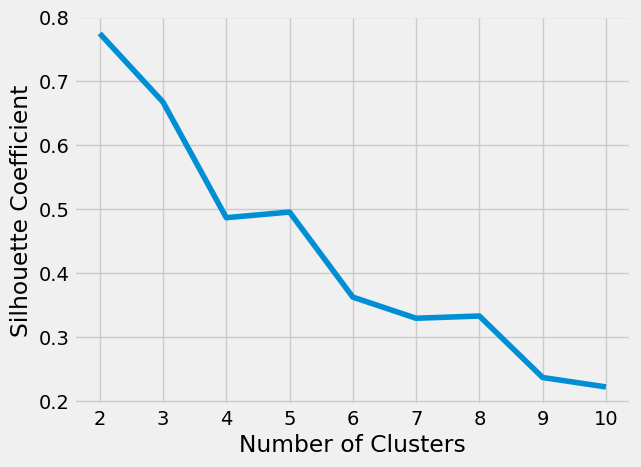

In [370]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [371]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3, init='k-means++', n_init= 10, random_state=0)
y_kmeans=kmeans.fit_predict(scaled_features)

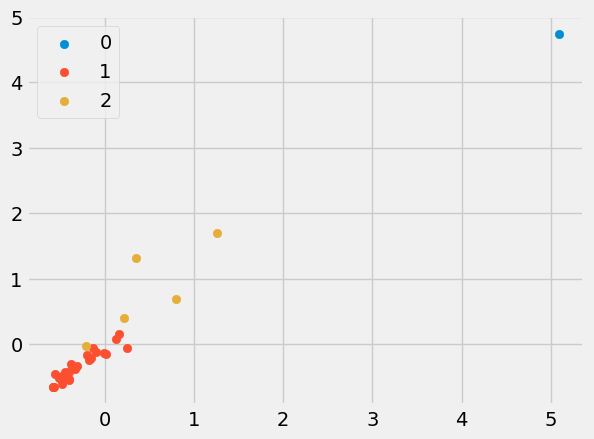

In [372]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
label = kmeans.labels_
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.legend()
plt.show()

In [373]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Crear un objeto de traza de plotly para cada etiqueta de grupo
traces = []
for label_ in set(labels):
    x_vals = scaled_features[labels == label_, 0]
    y_vals = scaled_features[labels == label_, 1]
    nombres_entidades = df_t.index[labels == label_].tolist()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', name=f'Grupo {label_}', marker=dict(color=label_, colorscale='Viridis'), text=nombres_entidades, textposition='top center')
    traces.append(trace)


# Crear un objeto de datos de plotly a partir de los objetos de traza
data = traces

# Crear un objeto de diseño de plotly con leyenda habilitada
layout = go.Layout(title='Agrupamiento K-Means', hovermode='closest', xaxis_title='Feature 1', yaxis_title='Feature 2', legend=dict(orientation='h'))

# Crear un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura en una ventana emergente
pyo.iplot(fig)


###Yucatán

In [374]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
yucatan = cochertodo.loc[cochertodo['Entidad'] == 'Yucatán', ['Año','Municipio','Modalidad', 'Total']].copy()
yucatan

Año Municipio                                Modalidad  Total
173207   2015     Abalá  Robo de coche de 4 ruedas Con violencia      0
173208   2015     Abalá  Robo de coche de 4 ruedas Sin violencia      0
173305   2015   Acanceh  Robo de coche de 4 ruedas Con violencia      0
173306   2015   Acanceh  Robo de coche de 4 ruedas Sin violencia      0
173403   2015      Akil  Robo de coche de 4 ruedas Con violencia      0
...       ...       ...                                      ...    ...
1826468  2022   Yaxcabá  Robo de coche de 4 ruedas Sin violencia      0
1826565  2022  Yaxkukul  Robo de coche de 4 ruedas Con violencia      0
1826566  2022  Yaxkukul  Robo de coche de 4 ruedas Sin violencia      0
1826663  2022    Yobaín  Robo de coche de 4 ruedas Con violencia      0
1826664  2022    Yobaín  Robo de coche de 4 ruedas Sin violencia      0

[1696 rows x 4 columns]

In [375]:
yucatan = yucatan.groupby(['Año', 'Municipio'])['Total'].sum().reset_index()
yucatan

Año   Municipio  Total
0    2015       Abalá      0
1    2015     Acanceh      0
2    2015        Akil      0
3    2015        Baca      0
4    2015      Bokobá      0
..    ...         ...    ...
843  2022  Valladolid      4
844  2022     Xocchel      0
845  2022     Yaxcabá      0
846  2022    Yaxkukul      0
847  2022      Yobaín      0

[848 rows x 3 columns]

In [376]:
municipios_yucatan = yucatan.pivot(index='Año', columns='Municipio', values='Total').reset_index()
municipios_yucatan.columns.name = None
municipios_yucatan

Año  Abalá  Acanceh  Akil  Baca  Bokobá  Buctzotz  Cacalchén  Calotmul  \
0  2015      0        0     0     0       0         0          0         0   
1  2016      0        0     0     0       0         0          0         0   
2  2017      0        0     0     0       0         0          0         0   
3  2018      0        0     0     0       0         0          0         0   
4  2019      0        0     0     0       0         0          0         0   
5  2020      0        0     0     0       0         0          0         0   
6  2021      0        0     0     0       0         0          0         0   
7  2022      0        0     0     0       0         0          0         0   

   Cansahcab  ...  Tunkás  Tzucacab  Uayma  Ucú  Umán  Valladolid  Xocchel  \
0          0  ...       0         0      0    0     0           3        0   
1          0  ...       0         0      0    0     0           5        0   
2          0  ...       0         0      0    0     2           4        0   
3          0  ...       0         0      0    0     1           1        0   
4          0  ...       0         0      0    0     0           4        0   
5          0  ...       0         0      0    0     0           4        0   
6          0  ...       0         0      0    0     4           3        0   
7          0  ...       0         0      0    0     3           4        0   

   Yaxcabá  Yaxkukul  Yobaín  
0        0         0       0  
1        0         0       0  
2        0         0       0  
3        0         0       0  
4        0         0       0  
5        0         0       0  
6        0         0       0  
7        0         0       0  

[8 rows x 107 columns]

In [377]:
df_yucatan = municipios_yucatan.set_index('Año').T
df_yucatan

Año         2015  2016  2017  2018  2019  2020  2021  2022
Abalá          0     0     0     0     0     0     0     0
Acanceh        0     0     0     0     0     0     0     0
Akil           0     0     0     0     0     0     0     0
Baca           0     0     0     0     0     0     0     0
Bokobá         0     0     0     0     0     0     0     0
...          ...   ...   ...   ...   ...   ...   ...   ...
Valladolid     3     5     4     1     4     4     3     4
Xocchel        0     0     0     0     0     0     0     0
Yaxcabá        0     0     0     0     0     0     0     0
Yaxkukul       0     0     0     0     0     0     0     0
Yobaín         0     0     0     0     0     0     0     0

[106 rows x 8 columns]

In [378]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_yucatan)

In [379]:
scaled_features[:5]

array([[-0.10872888, -0.12592671, -0.12817418, -0.10922679, -0.10641138,
        -0.12254493, -0.12819277, -0.15239764],
       [-0.10872888, -0.12592671, -0.12817418, -0.10922679, -0.10641138,
        -0.12254493, -0.12819277, -0.15239764],
       [-0.10872888, -0.12592671, -0.12817418, -0.10922679, -0.10641138,
        -0.12254493, -0.12819277, -0.15239764],
       [-0.10872888, -0.12592671, -0.12817418, -0.10922679, -0.10641138,
        -0.12254493, -0.12819277, -0.15239764],
       [-0.10872888, -0.12592671, -0.12817418, -0.10922679, -0.10641138,
        -0.12254493, -0.12819277, -0.15239764]])

In [380]:
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [381]:
#Ejecutamos el agrupamiento
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [382]:
kmeans.inertia_

16.17270000362522

In [383]:
#Encontramos la ubicación de los centroides
kmeans.cluster_centers_

array([[10.23445389, 10.17128041, 10.15871896, 10.23382192, 10.21729597,
        10.1484298 , 10.13246139,  9.8893711 ],
       [-0.09747099, -0.09686934, -0.0967497 , -0.09746497, -0.09730758,
        -0.09665171, -0.09649963, -0.09418449]])

In [384]:
#Número de iteraciones para que converga
kmeans.n_iter_

3

In [385]:
#Clusters obtenidos
kmeans.labels_[:5]

array([1, 1, 1, 1, 1], dtype=int32)

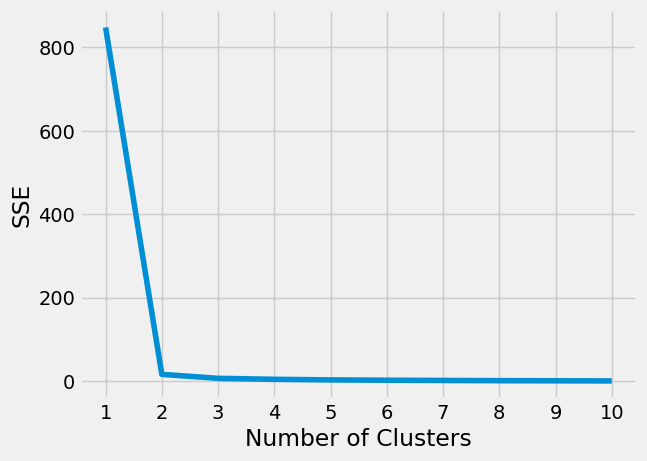

In [386]:
#Escogemos el número apropiado de Clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [387]:
#Verificamos el número de k obtenido
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

2

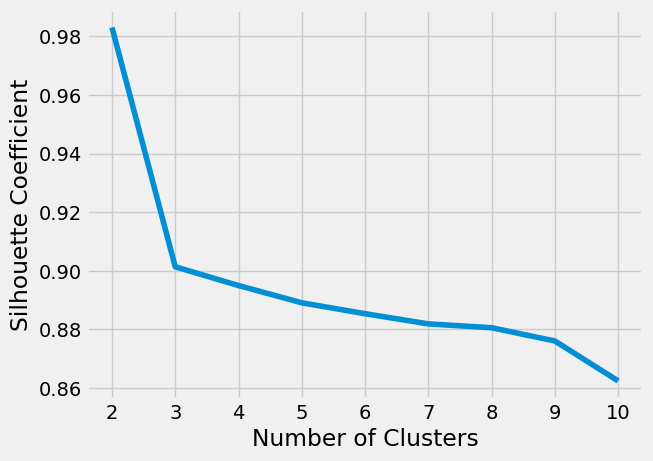

In [388]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [389]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=2, init='k-means++', n_init= 10, random_state=0)
y_kmeans=kmeans.fit_predict(scaled_features)

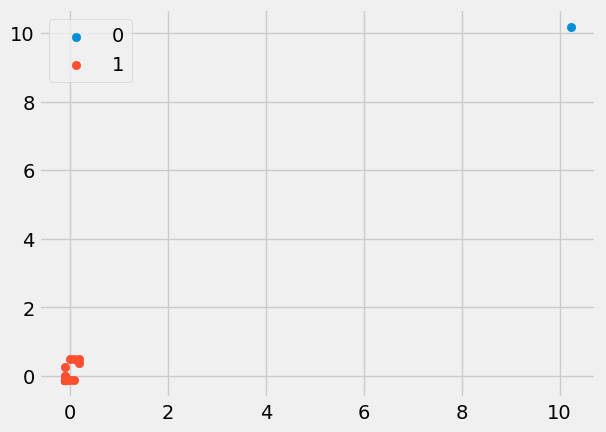

In [390]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
label = kmeans.labels_
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.legend()
plt.show()

In [391]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Crear un objeto de traza de plotly para cada etiqueta de grupo
traces = []
for label_ in set(labels):
    x_vals = scaled_features[labels == label_, 0]
    y_vals = scaled_features[labels == label_, 1]
    nombres_entidades = df_yucatan.index[labels == label_].tolist()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', name=f'Grupo {label_}', marker=dict(color=label_, colorscale='Viridis'), text=nombres_entidades, textposition='top center')
    traces.append(trace)


# Crear un objeto de datos de plotly a partir de los objetos de traza
data = traces

# Crear un objeto de diseño de plotly con leyenda habilitada
layout = go.Layout(title='Agrupamiento K-Means', hovermode='closest', xaxis_title='Feature 1', yaxis_title='Feature 2', legend=dict(orientation='h'))

# Crear un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura en una ventana emergente
pyo.iplot(fig)


##Campeche

In [392]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
campeche = cochertodo.loc[cochertodo['Entidad'] == 'Campeche', ['Año','Municipio','Modalidad', 'Total']].copy()
campeche

Año   Municipio                                Modalidad  Total
2099     2015     Calkiní  Robo de coche de 4 ruedas Con violencia      0
2100     2015     Calkiní  Robo de coche de 4 ruedas Sin violencia      1
2197     2015    Campeche  Robo de coche de 4 ruedas Con violencia      0
2198     2015    Campeche  Robo de coche de 4 ruedas Sin violencia     64
2295     2015      Carmen  Robo de coche de 4 ruedas Con violencia      0
...       ...         ...                                      ...    ...
1592738  2022  Candelaria  Robo de coche de 4 ruedas Sin violencia      8
1592835  2022  Seybaplaya  Robo de coche de 4 ruedas Con violencia      0
1592836  2022  Seybaplaya  Robo de coche de 4 ruedas Sin violencia      1
1592933  2022  Dzitbalché  Robo de coche de 4 ruedas Con violencia      0
1592934  2022  Dzitbalché  Robo de coche de 4 ruedas Sin violencia      0

[184 rows x 4 columns]

In [393]:
campeche = campeche.groupby(['Año', 'Municipio'])['Total'].sum().reset_index()
campeche

Año    Municipio  Total
0   2015     Calakmul      1
1   2015      Calkiní      1
2   2015     Campeche     64
3   2015   Candelaria      2
4   2015       Carmen      3
..   ...          ...    ...
87  2022  Hecelchakán      1
88  2022    Hopelchén      0
89  2022     Palizada      1
90  2022   Seybaplaya      1
91  2022       Tenabo      0

[92 rows x 3 columns]

In [394]:
municipios_campeche = campeche.pivot(index='Año', columns='Municipio', values='Total').reset_index()
municipios_campeche.columns.name = None
municipios_campeche

Año  Calakmul  Calkiní  Campeche  Candelaria  Carmen  Champotón  \
0  2015       1.0      1.0      64.0         2.0     3.0        2.0   
1  2016       0.0      5.0      66.0         5.0   111.0        6.0   
2  2017       0.0      0.0      66.0         1.0    81.0        5.0   
3  2018       0.0      3.0      51.0         1.0    53.0        2.0   
4  2019       1.0      1.0      61.0         5.0    70.0        3.0   
5  2020       1.0      5.0      56.0         2.0    17.0        4.0   
6  2021       1.0      3.0      44.0         2.0    18.0        6.0   
7  2022       2.0      1.0      78.0         8.0    44.0       10.0   

   Dzitbalché  Escárcega  Hecelchakán  Hopelchén  Palizada  Seybaplaya  Tenabo  
0         NaN        0.0          0.0        0.0       0.0         NaN     0.0  
1         NaN        3.0          0.0        0.0       0.0         NaN     0.0  
2         NaN        6.0          0.0        0.0       0.0         NaN     0.0  
3         NaN       10.0          0.0        0.0       0.0         NaN     0.0  
4         NaN        9.0          2.0        0.0       0.0         NaN     1.0  
5         NaN       13.0          1.0        0.0       1.0         NaN     0.0  
6         0.0        1.0          0.0        1.0       0.0         0.0     0.0  
7         0.0        6.0          1.0        0.0       1.0         1.0     0.0

In [395]:
#Borramos dos municipios ya que se agregaron en el 2021 
municipios_campeche.drop(['Dzitbalché', 'Seybaplaya'], axis=1, inplace=True)
municipios_campeche

Año  Calakmul  Calkiní  Campeche  Candelaria  Carmen  Champotón  \
0  2015       1.0      1.0      64.0         2.0     3.0        2.0   
1  2016       0.0      5.0      66.0         5.0   111.0        6.0   
2  2017       0.0      0.0      66.0         1.0    81.0        5.0   
3  2018       0.0      3.0      51.0         1.0    53.0        2.0   
4  2019       1.0      1.0      61.0         5.0    70.0        3.0   
5  2020       1.0      5.0      56.0         2.0    17.0        4.0   
6  2021       1.0      3.0      44.0         2.0    18.0        6.0   
7  2022       2.0      1.0      78.0         8.0    44.0       10.0   

   Escárcega  Hecelchakán  Hopelchén  Palizada  Tenabo  
0        0.0          0.0        0.0       0.0     0.0  
1        3.0          0.0        0.0       0.0     0.0  
2        6.0          0.0        0.0       0.0     0.0  
3       10.0          0.0        0.0       0.0     0.0  
4        9.0          2.0        0.0       0.0     1.0  
5       13.0          1.0        0.0       1.0     0.0  
6        1.0          0.0        1.0       0.0     0.0  
7        6.0          1.0        0.0       1.0     0.0

In [396]:
municipios_campeche.shape

(8, 12)

In [397]:
df_campeche = municipios_campeche.set_index('Año').T
df_campeche

Año          2015   2016  2017  2018  2019  2020  2021  2022
Calakmul      1.0    0.0   0.0   0.0   1.0   1.0   1.0   2.0
Calkiní       1.0    5.0   0.0   3.0   1.0   5.0   3.0   1.0
Campeche     64.0   66.0  66.0  51.0  61.0  56.0  44.0  78.0
Candelaria    2.0    5.0   1.0   1.0   5.0   2.0   2.0   8.0
Carmen        3.0  111.0  81.0  53.0  70.0  17.0  18.0  44.0
Champotón     2.0    6.0   5.0   2.0   3.0   4.0   6.0  10.0
Escárcega     0.0    3.0   6.0  10.0   9.0  13.0   1.0   6.0
Hecelchakán   0.0    0.0   0.0   0.0   2.0   1.0   0.0   1.0
Hopelchén     0.0    0.0   0.0   0.0   0.0   0.0   1.0   0.0
Palizada      0.0    0.0   0.0   0.0   0.0   1.0   0.0   1.0
Tenabo        0.0    0.0   0.0   0.0   1.0   0.0   0.0   0.0

In [398]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_campeche)

In [399]:
scaled_features[:5]

array([[-0.3102483 , -0.51282199, -0.51454425, -0.55730225, -0.52641719,
        -0.51331159, -0.46362387, -0.49580192],
       [-0.3102483 , -0.36891786, -0.51454425, -0.40404413, -0.52641719,
        -0.25953957, -0.30670502, -0.53807961],
       [ 3.15752703,  1.38671252,  1.8348842 ,  2.04808577,  1.92031059,
         2.97605372,  2.91013135,  2.71730201],
       [-0.25520425, -0.36891786, -0.47894685, -0.50621621, -0.363302  ,
        -0.44986859, -0.38516444, -0.24213582],
       [-0.20016019,  2.68184968,  2.36884521,  2.15025785,  2.28731976,
         0.5017765 ,  0.87018633,  1.27986078]])

In [400]:
scaled_features.shape

(11, 8)

In [401]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [402]:
#Ejecutamos el agrupamiento
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [403]:
kmeans.inertia_

1.395080405533965

In [404]:
#Encontramos la ubicación de los centroides
kmeans.cluster_centers_

array([[-0.20016019,  2.68184968,  2.36884521,  2.15025785,  2.28731976,
         0.5017765 ,  0.87018633,  1.27986078],
       [ 3.15752703,  1.38671252,  1.8348842 ,  2.04808577,  1.92031059,
         2.97605372,  2.91013135,  2.71730201],
       [-0.32859632, -0.45206247, -0.46708104, -0.46648263, -0.46751448,
        -0.38642558, -0.4200353 , -0.4441292 ]])

In [405]:
#Número de iteraciones para que converga
kmeans.n_iter_

2

In [406]:
#Clusters obtenidos
kmeans.labels_[:5]

array([2, 2, 1, 2, 0], dtype=int32)

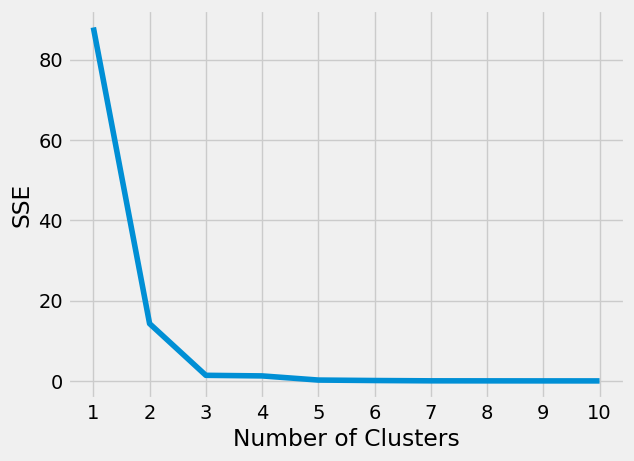

In [407]:
#Escogemos el número apropiado de Clusters
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
    }

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [408]:
#Verificamos el número de k obtenido
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.elbow

3

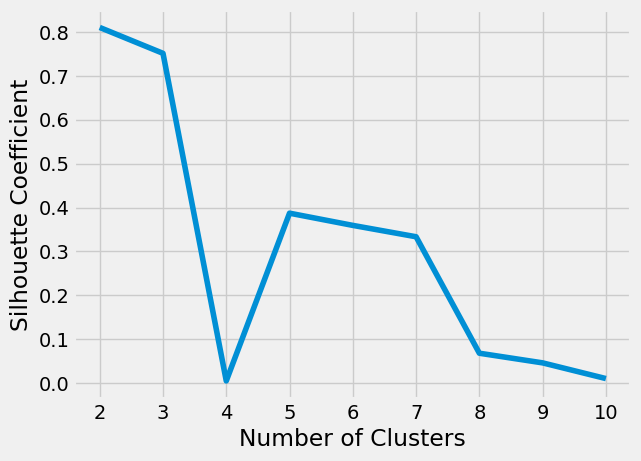

In [409]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []
   
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [410]:
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=3, init='k-means++', n_init= 10, random_state=0)
y_kmeans=kmeans.fit_predict(scaled_features)

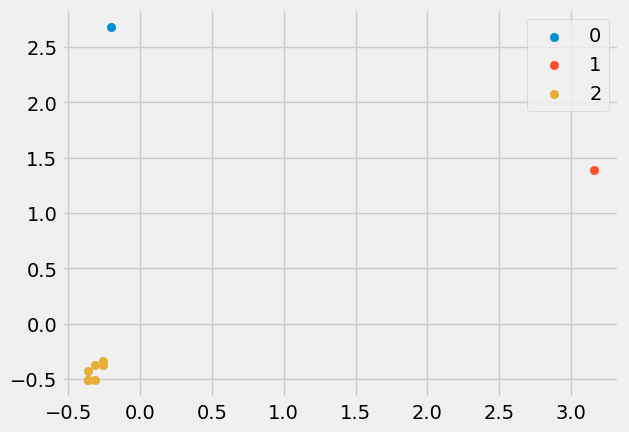

In [411]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
label = kmeans.labels_
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(scaled_features[label == i , 0] , scaled_features[label == i , 1] , label = i)
plt.legend()
plt.show()

In [412]:
# Ejecutar el agrupamiento
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )
kmeans.fit(scaled_features)
labels = kmeans.labels_

# Crear un objeto de traza de plotly para cada etiqueta de grupo
traces = []
for label_ in set(labels):
    x_vals = scaled_features[labels == label_, 0]
    y_vals = scaled_features[labels == label_, 1]
    nombres_entidades = df_campeche.index[labels == label_].tolist()
    trace = go.Scatter(x=x_vals, y=y_vals, mode='markers', name=f'Grupo {label_}', marker=dict(color=label_, colorscale='Viridis'), text=nombres_entidades, textposition='top center')
    traces.append(trace)


# Crear un objeto de datos de plotly a partir de los objetos de traza
data = traces

# Crear un objeto de diseño de plotly con leyenda habilitada
layout = go.Layout(title='Agrupamiento K-Means', hovermode='closest', xaxis_title='Feature 1', yaxis_title='Feature 2', legend=dict(orientation='h'))

# Crear un objeto figura de plotly a partir del objeto de datos y de diseño
fig = go.Figure(data=data, layout=layout)

# Mostrar la figura en una ventana emergente
pyo.iplot(fig)


#Pregunta 4 de investigación

¿Hay alguna diferencia entre los robos de autos en ciertas épocas del año?

##No profe


In [413]:
cochertodo.head()

Año  Clave_Ent         Entidad  Cve. Municipio       Municipio  \
41   2015          1  Aguascalientes            1001  Aguascalientes   
42   2015          1  Aguascalientes            1001  Aguascalientes   
139  2015          1  Aguascalientes            1002        Asientos   
140  2015          1  Aguascalientes            1002        Asientos   
237  2015          1  Aguascalientes            1003        Calvillo   

    Bien jurídico afectado Tipo de delito           Subtipo de delito  \
41           El patrimonio           Robo  Robo de vehículo automotor   
42           El patrimonio           Robo  Robo de vehículo automotor   
139          El patrimonio           Robo  Robo de vehículo automotor   
140          El patrimonio           Robo  Robo de vehículo automotor   
237          El patrimonio           Robo  Robo de vehículo automotor   

                                   Modalidad  Enero  ...  Abril  Mayo  Junio  \
41   Robo de coche de 4 ruedas Con violencia      4  ...      3     0      1   
42   Robo de coche de 4 ruedas Sin violencia    114  ...    124   138     94   
139  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   
140  Robo de coche de 4 ruedas Sin violencia      0  ...      0     0      1   
237  Robo de coche de 4 ruedas Con violencia      0  ...      0     0      0   

     Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total  
41       1       5           2        5          6          4     36  
42      89      93         126      105        152        171   1434  
139      0       0           0        1          0          1      2  
140      2       0           1        1          1          3      9  
237      0       0           0        0          0          0      0  

[5 rows x 22 columns]

In [414]:
#Borramos dos municipios ya que se agregaron en el 2021 
meses = cochertodo.drop(['Clave_Ent', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito'], axis=1)
meses.head()

Año         Entidad  Cve. Municipio       Municipio  \
41   2015  Aguascalientes            1001  Aguascalientes   
42   2015  Aguascalientes            1001  Aguascalientes   
139  2015  Aguascalientes            1002        Asientos   
140  2015  Aguascalientes            1002        Asientos   
237  2015  Aguascalientes            1003        Calvillo   

                                   Modalidad  Enero  Febrero  Marzo  Abril  \
41   Robo de coche de 4 ruedas Con violencia      4        1      4      3   
42   Robo de coche de 4 ruedas Sin violencia    114      106    122    124   
139  Robo de coche de 4 ruedas Con violencia      0        0      0      0   
140  Robo de coche de 4 ruedas Sin violencia      0        0      0      0   
237  Robo de coche de 4 ruedas Con violencia      0        0      0      0   

     Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  \
41      0      1      1       5           2        5          6          4   
42    138     94     89      93         126      105        152        171   
139     0      0      0       0           0        1          0          1   
140     0      1      2       0           1        1          1          3   
237     0      0      0       0           0        0          0          0   

     Total  
41      36  
42    1434  
139      2  
140      9  
237      0

In [415]:
prueba1 = meses.groupby(['Año', 'Entidad'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum().reset_index()
prueba1

Año                          Entidad  Enero  Febrero  Marzo  Abril  \
0    2015                   Aguascalientes    132      123    143    138   
1    2015                  Baja California   1056      941   1022   1056   
2    2015              Baja California Sur    103      105    103     77   
3    2015                         Campeche      1        5      2      2   
4    2015                          Chiapas    102      118    147    114   
..    ...                              ...    ...      ...    ...    ...   
251  2022                       Tamaulipas    140      122    155    147   
252  2022                         Tlaxcala    107       97    118     95   
253  2022  Veracruz de Ignacio de la Llave    328      359    359    338   
254  2022                          Yucatán      3        2      2      1   
255  2022                        Zacatecas    111       79    107     83   

     Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
0     147    107    111     112         146      121        174        187  
1    1107   1187   1224    1139        1241     1393       1420       1352  
2      93     80     91      96         119       95         94        101  
3       2     13      8       2          10        9          9         10  
4     119    123    105     139         135      127        127        132  
..    ...    ...    ...     ...         ...      ...        ...        ...  
251   117    132    152     181         130      142        142        129  
252   135    128    123     132         101      116         92        125  
253   290    267    273     266         277      309        316        305  
254     3      4      5       1           4        5          4          3  
255   110    113    117     118         121      134        134        134  

[256 rows x 14 columns]

In [416]:
prueba1 = prueba1.groupby(['Año'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum().reset_index()
prueba1

Año  Enero  Febrero  Marzo  Abril   Mayo  Junio  Julio  Agosto  \
0  2015  12973    12053  12528  11283  11710  11849  11729   12000   
1  2016  11576    12034  12351  11867  12123  12403  12875   13051   
2  2017  14869    13638  14909  13887  14998  14694  14973   15787   
3  2018  15980    14365  15166  14440  15239  14230  14836   15271   
4  2019  14304    12321  13715  12515  13404  12413  12961   12392   
5  2020  11871    10912  10923   8548   8703   8853   9318    9076   
6  2021   8624     8221   9155   8623   8849   9035   9272    9283   
7  2022   8772     8065   8807   8153   8650   8420   8196    8575   

   Septiembre  Octubre  Noviembre  Diciembre  
0       12303    12461      12464      11761  
1       13408    13574      13465      13869  
2       15077    15963      15414      14720  
3       13683    15544      14828      14405  
4       11946    12411      11978      11518  
5        9020     9597       9058       8972  
6        9207     9535       9224       9092  
7        8169     8624       8566       8167

In [417]:
from scipy.stats import f_oneway

# Separar las columnas del DataFrame en diferentes series
enero = prueba1['Enero']
febrero = prueba1['Febrero']
marzo = prueba1['Marzo']
abril = prueba1['Abril']
mayo = prueba1['Mayo']
junio = prueba1['Junio']
julio = prueba1['Julio']
agosto = prueba1['Agosto']
septiembre = prueba1['Septiembre']
octubre = prueba1['Octubre']
noviembre = prueba1['Noviembre']
diciembre = prueba1['Diciembre']

# Ejecutar el análisis de varianza
result = f_oneway(enero, febrero, marzo, abril, mayo, junio, julio, agosto, septiembre, octubre, noviembre, diciembre)

# Imprimir los resultados
print("Estadístico F =", result.statistic)
print("valor p =", result.pvalue)

Estadístico F = 0.15121473724919426
valor p = 0.9992337062961419


El resultado obtenido del análisis de varianza indica que no hay suficiente evidencia estadística para rechazar la hipótesis nula, que en este caso es que no hay diferencias significativas en el número de robos de autos entre las diferentes épocas del año. Es decir, no se puede afirmar con certeza que haya alguna época del año con más robos de autos que las demás, ya que los datos no proporcionan suficiente información para llegar a esa conclusión.


La prueba ANOVA se utiliza para determinar si hay una diferencia significativa entre las medias de tres o más grupos. En tu caso, estás usando la prueba ANOVA para determinar si hay una diferencia significativa entre las medias de los robos de autos en diferentes meses del año.

La prueba ANOVA devuelve dos valores: el estadístico F y el valor p. El estadístico F mide la diferencia entre las medias de los grupos y la variabilidad dentro de los grupos. Cuanto mayor sea el valor de F, mayor será la diferencia entre las medias de los grupos en comparación con la variabilidad dentro de los grupos. El valor p mide la probabilidad de obtener una diferencia tan grande entre las medias de los grupos si las medias de los grupos son en realidad iguales. Si el valor p es menor que un nivel de significancia establecido (por ejemplo, 0,05), se rechaza la hipótesis nula de que las medias de los grupos son iguales y se concluye que hay una diferencia significativa entre al menos dos de las medias de los grupos.

En tu caso, el valor del estadístico F es muy bajo (0.15121473724919426) y el valor p es muy alto (0.9992337062961419). Esto indica que la diferencia entre las medias de los grupos (es decir, los robos de autos en diferentes meses del año) es muy pequeña en comparación con la variabilidad dentro de los grupos. Además, el valor p es muy alto, lo que sugiere que la probabilidad de obtener una diferencia tan grande entre las medias de los grupos si las medias de los grupos son iguales es muy alta. Por lo tanto, no se puede concluir que hay una diferencia significativa entre los robos de autos en diferentes meses del año.

In [418]:
from scipy.stats import f_oneway

result = f_oneway(prueba1['Enero'], prueba1['Febrero'], prueba1['Marzo'],prueba1['Abril'],prueba1['Mayo'],prueba1['Junio'],
                  prueba1['Julio'],prueba1['Agosto'],prueba1['Septiembre'],prueba1['Octubre'],prueba1['Noviembre'],prueba1['Diciembre'])
print(result)

F_onewayResult(statistic=0.15121473724919426, pvalue=0.9992337062961419)


El resultado de la prueba ANOVA es una tupla que contiene dos valores: el valor F y el valor p.

El valor F es la relación entre la varianza de los grupos y la varianza dentro de los grupos. En este caso, el valor de F es de 0.151, lo que indica que no hay una gran diferencia entre las medias de los grupos y que la varianza dentro de los grupos es alta en comparación con la varianza entre los grupos.

El valor p es el nivel de significancia de la prueba, es decir, la probabilidad de que los resultados observados se deban solo al azar. En este caso, el valor p es de 0.999, lo que indica que no hay evidencia estadística para rechazar la hipótesis nula de que no hay diferencia significativa entre las medias de los grupos.

En resumen, el resultado de la prueba ANOVA sugiere que no hay diferencias significativas entre las medias de los grupos, es decir, que los valores de los meses en el dataframe prueba1 no difieren significativamente entre sí.

##Profe


In [419]:
#Borramos dos municipios ya que se agregaron en el 2021 
meses = cochertodo.drop(['Clave_Ent', 'Bien jurídico afectado', 'Tipo de delito', 'Subtipo de delito'], axis=1)
meses.head()

Año         Entidad  Cve. Municipio       Municipio  \
41   2015  Aguascalientes            1001  Aguascalientes   
42   2015  Aguascalientes            1001  Aguascalientes   
139  2015  Aguascalientes            1002        Asientos   
140  2015  Aguascalientes            1002        Asientos   
237  2015  Aguascalientes            1003        Calvillo   

                                   Modalidad  Enero  Febrero  Marzo  Abril  \
41   Robo de coche de 4 ruedas Con violencia      4        1      4      3   
42   Robo de coche de 4 ruedas Sin violencia    114      106    122    124   
139  Robo de coche de 4 ruedas Con violencia      0        0      0      0   
140  Robo de coche de 4 ruedas Sin violencia      0        0      0      0   
237  Robo de coche de 4 ruedas Con violencia      0        0      0      0   

     Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  \
41      0      1      1       5           2        5          6          4   
42    138     94     89      93         126      105        152        171   
139     0      0      0       0           0        1          0          1   
140     0      1      2       0           1        1          1          3   
237     0      0      0       0           0        0          0          0   

     Total  
41      36  
42    1434  
139      2  
140      9  
237      0

In [420]:
prueba1 = meses.groupby(['Año', 'Entidad'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum().reset_index()
prueba1

Año                          Entidad  Enero  Febrero  Marzo  Abril  \
0    2015                   Aguascalientes    132      123    143    138   
1    2015                  Baja California   1056      941   1022   1056   
2    2015              Baja California Sur    103      105    103     77   
3    2015                         Campeche      1        5      2      2   
4    2015                          Chiapas    102      118    147    114   
..    ...                              ...    ...      ...    ...    ...   
251  2022                       Tamaulipas    140      122    155    147   
252  2022                         Tlaxcala    107       97    118     95   
253  2022  Veracruz de Ignacio de la Llave    328      359    359    338   
254  2022                          Yucatán      3        2      2      1   
255  2022                        Zacatecas    111       79    107     83   

     Mayo  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  
0     147    107    111     112         146      121        174        187  
1    1107   1187   1224    1139        1241     1393       1420       1352  
2      93     80     91      96         119       95         94        101  
3       2     13      8       2          10        9          9         10  
4     119    123    105     139         135      127        127        132  
..    ...    ...    ...     ...         ...      ...        ...        ...  
251   117    132    152     181         130      142        142        129  
252   135    128    123     132         101      116         92        125  
253   290    267    273     266         277      309        316        305  
254     3      4      5       1           4        5          4          3  
255   110    113    117     118         121      134        134        134  

[256 rows x 14 columns]

In [421]:
prueba2 = prueba1.groupby(['Entidad'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].mean().reset_index()
prueba2

Entidad     Enero   Febrero     Marzo     Abril  \
0                    Aguascalientes   150.625   136.500   153.875   147.875   
1                   Baja California  1299.000  1153.750  1192.000  1132.375   
2               Baja California Sur    95.250    85.500    86.125    66.875   
3                          Campeche     9.375     8.500    10.500    11.125   
4                           Chiapas   101.875   103.000   102.875    88.000   
5                         Chihuahua   366.875   323.625   355.125   311.750   
6                  Ciudad de México   778.000   723.250   773.125   683.375   
7              Coahuila de Zaragoza    71.625    64.500    73.875    71.125   
8                            Colima    64.625    58.500    62.500    57.750   
9                           Durango    84.750    78.250    79.375    75.250   
10                       Guanajuato   393.375   388.875   383.125   361.375   
11                         Guerrero   253.625   225.500   251.375   218.375   
12                          Hidalgo   311.875   292.000   281.750   250.625   
13                          Jalisco  1139.500  1058.250  1093.500   998.250   
14              Michoacán de Ocampo   452.625   393.750   429.375   381.500   
15                          Morelos   219.625   217.500   239.250   215.250   
16                           México  3203.875  3018.250  3279.750  2999.625   
17                          Nayarit    27.125    28.000    29.625    22.875   
18                       Nuevo León   167.750   168.750   186.375   168.375   
19                           Oaxaca   114.250   108.250   102.250    90.375   
20                           Puebla   668.250   590.000   637.875   620.750   
21                        Querétaro   320.625   286.500   316.125   295.875   
22                     Quintana Roo    84.125    78.000    96.375    75.250   
23                  San Luis Potosí   162.875   148.250   139.500   147.250   
24                          Sinaloa   263.000   244.250   267.500   239.875   
25                           Sonora   278.375   235.500   248.125   225.250   
26                          Tabasco   190.000   157.500   178.625   162.625   
27                       Tamaulipas   292.625   295.625   317.750   300.875   
28                         Tlaxcala   123.625   116.625   127.750   114.625   
29  Veracruz de Ignacio de la Llave   536.000   532.375   564.750   501.875   
30                          Yucatán     6.125     6.375     5.875     5.625   
31                        Zacatecas   139.875   125.625   128.250   122.500   

        Mayo     Junio     Julio    Agosto  Septiembre   Octubre  Noviembre  \
0    142.750   128.125   139.125   145.875     137.375   152.500    150.250   
1   1136.500  1084.000  1118.000  1129.000    1104.375  1145.625   1196.500   
2     78.375    78.375    71.625    69.125      80.875    82.250     77.750   
3      9.375    13.250    13.125    10.500      11.250    11.875     11.000   
4     99.750    98.375   100.875   105.125      94.250    93.375     88.000   
5    315.000   326.625   335.500   363.125     344.875   361.375    329.875   
6    721.000   708.750   741.250   731.750     700.125   733.500    715.875   
7     66.750    65.875    67.750    60.625      61.250    62.125     50.250   
8     64.625    70.000    69.000    66.250      69.000    79.125     79.625   
9     70.500    78.000    79.375    83.375      74.875    87.000     80.750   
10   366.625   366.000   391.250   375.125     353.875   377.250    376.750   
11   241.375   225.375   247.625   247.375     223.500   252.000    248.125   
12   272.500   277.750   254.000   256.125     285.875   301.625    302.500   
13  1073.250  1152.500  1185.625  1188.875    1092.250  1179.000   1154.250   
14   403.500   402.250   416.250   421.625     408.625   424.000    416.125   
15   219.375   230.250   233.125   234.375     235.125   246.750    231.750   
16  3212.375  3012.500  3108.375  3175.500    3142.500  3241.875   3117.000  

In [422]:
prueba2.shape

(32, 13)

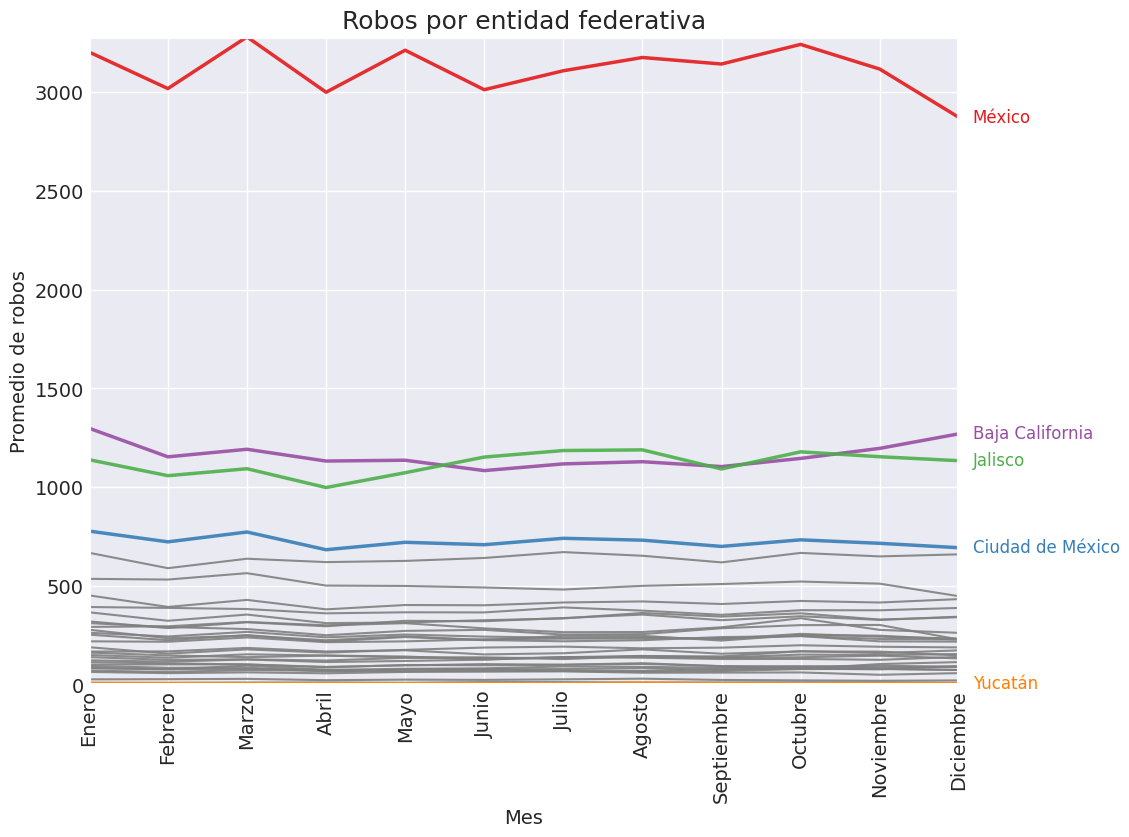

In [423]:
# Inicializar el estilo del gráfico
sns.set_style('darkgrid')
 
# Crear una paleta de colores
palette = plt.get_cmap('Set1')
 
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10,8))
 
# Lista de entidades federativas a las que se les agregará un nombre
named_states = ['México', 'Ciudad de México', 'Jalisco',
             'Baja California', 'Yucatán']

COLOR_SCALE = ["#7F3C8D", "#11A579", "#3969AC", "#F2B701", "#E73F74", "#80BA5A", "#E68310"]

for i, row in prueba2.iterrows():
    if row[0] in named_states:
        # Si el estado está en named_states, usar un color de la paleta
        color = palette(named_states.index(row[0]))
        linewidth = 2.5
        
    else:
        # Si el estado no está en named_states, usar gris claro
        color = 'gray'
        linewidth = 1.5
 
    ax.plot(prueba2.columns[1:], row[1:], marker='', color=color, linewidth=linewidth, alpha=0.9, label=row[0])
 
    # Agregar etiquetas al final de cada línea
    if row[0] in named_states:
        ax.annotate(row[0], xy=(prueba2.columns[-1], row.iloc[-1]), xytext=(10, 0), color=color, 
                    textcoords='offset points', size=12, va='center')
 
# Establecer límites para los ejes x e y
ax.set_xlim(prueba2.columns[1], prueba2.columns[-1])
ax.set_ylim(0, prueba2.iloc[:,1:].max().max()+1)
 
# Agregar títulos y etiquetas a los ejes
ax.set_title('Robos por entidad federativa', size=18)
ax.set_xlabel('Mes', size=14)
ax.set_ylabel('Promedio de robos', size=14)
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

In [424]:
corre = prueba1.groupby('Año')[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum().reset_index()corre

SyntaxError: ignored

In [ ]:
# Calculamos la media de robos de autos para cada mes a través de los años
means = np.mean(corre.iloc[:,1:], axis=0)

# Creamos un gráfico de barras para visualizar los resultados
plt.bar(range(len(means)), means, color='lightsalmon', edgecolor='mediumaquamarine')
plt.xticks(range(len(means)), corre.columns[1:], rotation=90)
plt.ylabel('Media de robos de autos')
plt.xlabel('Mes')
plt.title('Media de robos de autos por mes a través de los años')
plt.show()


#Pregunta 5 de investigación

Regresión para predecir el número de robos en el futuro

In [ ]:
prueba1

In [ ]:
prueba2 = prueba1.set_index('Año')
prueba2

In [ ]:
test = prueba2.iloc[-1:]
test

In [ ]:
train = prueba2.iloc[:-1]
train

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# establecer el índice de tiempo
prueba2 = prueba1.set_index('Año')

# dividir el conjunto de datos en entrenamiento y prueba
train = prueba2.iloc[:-1]
test = prueba2.iloc[-1:]

# ajustar un modelo SARIMA al conjunto de entrenamiento
model = SARIMAX(train.values.flatten(), order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# hacer una predicción para el año 2023
forecast = results.forecast(steps=12)

# crear un dataframe con la predicción
prediccion = pd.DataFrame({'Año': range(2023, 2024), 'Enero': forecast[0], 'Febrero': forecast[1], 'Marzo': forecast[2], 'Abril': forecast[3], 'Mayo': forecast[4], 'Junio': forecast[5], 'Julio': forecast[6], 'Agosto': forecast[7], 'Septiembre': forecast[8], 'Octubre': forecast[9], 'Noviembre': forecast[10], 'Diciembre': forecast[11]})

# mostrar la predicción
prediccion

In [ ]:
test

##QUIEN SABE

In [ ]:
Robos2023 = Robos2.pivot(index='Año', columns='Entidad', values='Total').reset_index()
Robos2023.columns.name = None
Robos2023

In [ ]:
Aguas = Robos2023[['Año', 'Aguascalientes']]
Aguas

In [ ]:
Aguas_copy = Aguas.copy()
Aguas_copy['Año'] = pd.to_datetime(Aguas_copy['Año'], format='%Y', errors='coerce')
Aguas_copy.set_index('Año', inplace=True)
Aguas_copy.head(5)

In [ ]:
plt.figure(figsize=(7,7))
plt.title("Número de robos al año")
plt.xlabel('Año')
plt.ylabel('Aguascalientes')
plt.plot(Aguas_copy)
plt.show()

In [ ]:
#Determine rolling statistics
Aguas_copy["rolling_avg"] = Aguas_copy["Aguascalientes"].rolling(window=1).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
Aguas_copy["rolling_std"] = Aguas_copy["Aguascalientes"].rolling(window=1).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(Aguas_copy["Aguascalientes"], color='#379BDB', label='Original')
plt.plot(Aguas_copy["rolling_avg"], color='#D22A0D', label='Rolling Mean')
#plt.plot(Aguas_copy["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
#Augmented Dickey–Fuller test:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey Fuller Test:')
dftest = adfuller(Aguas_copy['Aguascalientes'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

In [ ]:
Aguas_copy

In [ ]:
# Crear un nuevo DataFrame que contenga sólo las columnas de interés
Mensual = cochertodo.loc[cochertodo['Entidad'] == 'México', ['Municipio','Modalidad', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].copy()
Mensual

In [ ]:
prueba = Mensual.groupby(['Municipio'])[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 
                                    'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']].sum().reset_index()
prueba.head()

In [ ]:
# Transponer el dataframe
df_transpuesto = prueba.set_index('Municipio').T

# Sumar cada fila
df_suma = df_transpuesto.sum(axis=1)

# Volver a transponer el dataframe
df_final = df_suma.to_frame(name='Total').T
df_final.index = ['México']

# Imprimir el resultado
df_final


In [ ]:
prueba['Enero'].sum()

In [ ]:
df_ts_train = Robos2023[Robos2023["Año"] <= 2018]
df_ts_train

In [ ]:
df_ts_test = Robos2023[Robos2023["Año"] == 2019]
df_ts_test

In [ ]:
endog_train = df_ts_train['Aguascalientes']
endog_train

In [ ]:
Aguas.plot();

In [ ]:
import statsmodels.api as sm

# Define tus variables exógenas y endógenas
endog_train = df_ts_train['Aguascalientes']
exog_train = df_ts_train['Año']

endog_test = df_ts_test['Aguascalientes']
exog_test = df_ts_test['Año']

# Divide tus datos en entrenamiento y prueba
train_data = endog_train.iloc[:-1]
train_exog = exog_train.iloc[:-1]
test_data = endog_test.iloc[-1:]
test_exog = exog_test.iloc[-1:]

# Ajusta el modelo SARIMAX
model = sm.tsa.statespace.SARIMAX(endog=train_data, exog=train_exog, order=(1,1,1), seasonal_order=(1,0,0,12))
results = model.fit()

# Predice los valores para el año 2023
pred = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=test_exog)
pred

In [ ]:
Robos2023['Aguascalientes']

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Define tus variables exógenas y endógenas
endog = Robos2023[['México']]
exog = Robos2023['Año']

# Divide tus datos en entrenamiento y prueba
train_data = endog.iloc[:-1]
train_exog = exog.iloc[:-1]
test_data = endog.iloc[-1:]
test_exog = exog.iloc[-1:]

# Ajusta el modelo SARIMAX
model = sm.tsa.statespace.SARIMAX(endog=train_data, exog=train_exog, order=(1,1,1), seasonal_order=(1,1,1,1))
results = model.fit()

# Predice los valores para el año 2023
pred = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, exog=test_exog)
pred

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
plt.plot(df)
plt.xlabel('Año')
plt.ylabel('Número de robos de coches')
plt.show()

In [ ]:
Aguas = Robos2023[['Año', 'Aguascalientes']]
Aguas

In [ ]:
Aguas_copy = Aguas.copy()
Aguas_copy['Año'] = pd.to_datetime(Aguas_copy['Año'], format='%Y', errors='coerce')
Aguas_copy.set_index('Año', inplace=True)
Aguas_copy.head(5)

In [ ]:
plt.plot(Aguas_copy)
plt.xlabel('Año')
plt.ylabel('Número de robos de coches')
plt.show()

In [ ]:
train_data = Aguas_copy.iloc[:-3]
train_data

In [ ]:
test_data = Aguas_copy.iloc[-3:]
test_data

In [ ]:
# ARIMA
model_arima = ARIMA(train_data, order=(1,1,1))
results_arima = model_arima.fit()

# SARIMA
model_sarima = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
results_sarima = model_sarima.fit()

In [ ]:
# ARIMA
predictions_arima = results_arima.predict(start=test_data.index[0], end=test_data.index[-1])

# SARIMA
predictions_sarima = results_sarima.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
predictions_sarima

In [ ]:
predictions_arima

In [ ]:
Aguas_copy

In [ ]:
# Calcular el MSE
mse_arima = ((predictions_arima - test_data['Aguascalientes'].values)**2).mean()
mse_sarima = ((predictions_sarima - test_data['Aguascalientes'].values)**2).mean()

# Calcular el MAE
mae_arima = np.abs(predictions_arima - test_data['Aguascalientes'].values).mean()
mae_sarima = np.abs(predictions_sarima - test_data['Aguascalientes'].values).mean()

print("MSE ARIMA:", mse_arima)
print("MSE SARIMA:", mse_sarima)
print("MAE ARIMA:", mae_arima)
print("MAE SARIMA:", mae_sarima)

In [ ]:
train_data

In [ ]:
test_data

In [ ]:
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(predictions_arima, label='ARIMA')
plt.plot(predictions_sarima, label='SARIMA')
plt.legend(loc='best')
plt.show()

Prueba 2

In [ ]:
Aguas = Robos2023[['Año', 'México']]
Aguas

In [ ]:
Aguas_copy = Aguas.copy()
Aguas_copy['Año'] = pd.to_datetime(Aguas_copy['Año'], format='%Y', errors='coerce')
Aguas_copy.set_index('Año', inplace=True)
Aguas_copy.head(5)

In [ ]:
train_data = Aguas_copy.iloc[:-3]
train_data

In [ ]:
test_data = Aguas_copy.iloc[-3:]
test_data

In [ ]:
# ARIMA
model_arima = ARIMA(Aguas_copy['México'],order=(1, 0, 0))
results_arima = model_arima.fit()

# SARIMA
model_sarima = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
results_sarima = model_sarima.fit()

In [ ]:
# ARIMA
predictions_arima = results_arima.predict(start=test_data.index[0], end=test_data.index[-1])

# SARIMA
predictions_sarima = results_sarima.predict(start=test_data.index[0], end=test_data.index[-1])

In [ ]:
predictions_sarima

In [ ]:
predictions_arima

In [ ]:
Aguas_copy

In [ ]:
# Calcular el MSE
mse_arima = ((predictions_arima - test_data['México'].values)**2).mean()
mse_sarima = ((predictions_sarima - test_data['México'].values)**2).mean()

# Calcular el MAE
mae_arima = np.abs(predictions_arima - test_data['México'].values).mean()
mae_sarima = np.abs(predictions_sarima - test_data['México'].values).mean()

print("MSE ARIMA:", mse_arima)
print("MSE SARIMA:", mse_sarima)
print("MAE ARIMA:", mae_arima)
print("MAE SARIMA:", mae_sarima)

In [ ]:
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(predictions_arima, label='ARIMA')
plt.plot(predictions_sarima, label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
pip install pmdarima

In [ ]:
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(Aguas_copy["México"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=1, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
forecast(SARIMA_model)

In [ ]:
# hacer predicciones utilizando el modelo SARIMA ajustado
predicciones = SARIMA_model.predict(n_periods = 10)

# imprimir las predicciones
print(predicciones)

De nuevo

In [ ]:
Aguas = Robos2023[['Año', 'México']]
Aguas

In [ ]:
Aguas_copy = Aguas.copy()
Aguas_copy['Año'] = pd.to_datetime(Aguas_copy['Año'], format='%Y', errors='coerce')
Aguas_copy.set_index('Año', inplace=True)
Aguas_copy.head(5)

In [ ]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(Aguas_copy['México'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

In [ ]:
#Standard ARIMA Model
ARIMA_model = pm.auto_arima(Aguas_copy['México'], 
                      start_p=1, 
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=False, #logs 
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())

In [ ]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
index_of_fc = pd.date_range(Aguas_copy.index[-1] + pd.DateOffset(years=1), periods = n_periods, freq='Y')
index_of_fc

In [ ]:
def forecast(ARIMA_model, periods=5):
    # Forecast
    n_periods = periods
    fitted, confint = ARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(Aguas_copy.index[-1] + pd.DateOffset(years=1), periods = n_periods, freq='Y')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(Aguas_copy["México"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("ARIMA/SARIMA - Robo de coches")
    plt.show()

forecast(ARIMA_model)

In [ ]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(Aguas_copy["México"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=1, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

In [ ]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
forecast(SARIMA_model)

In [ ]:
#adding exogenous variable
Aguas_copy['Year'] = Aguas.index

# SARIMAX Model
SARIMAX_model = pm.auto_arima(Aguas_copy[['México']], exogenous=Aguas_copy[['Year']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=1,
                           start_P=0, seasonal=True,
                           d=None, D=1, 
                           trace=False,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

In [ ]:
pip install pmdarima

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults,ARMA,ARMAResults
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
import pmdarima as pm
Sarimax_model = auto_arima(Aguas_copy['México'],
                       start_P=1,
                       start_q=1,
                       max_p=3,
                       max_q=3,
                       m=1,
                       seasonal=True,
                       d=None,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)
Sarimax_model.summary()

In [ ]:
model_arima = ARIMA(train_data, order=(1,1,1))
results_arima = model_arima.fit()

model = ARIMA(Aguas_copy['México'],order=(1, 0, 0))
results = model_arima.fit()

In [ ]:
forecast = results.predict(start = len(Aguas_copy), end=len(Aguas_copy)+5,
                           typ='levels').rename('data sarimax (1,0,1) forecast')

In [ ]:
Aguas_copy['México'].plot(figsize=(12,8),legend=True)
forecast.plot(legend=True)

In [ ]:
def sarimax_forecast(SARIMAX_model, periods=5):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"Year":pd.date_range(Aguas_copy.index[-1], periods = n_periods, freq='Y').year},
                    index = pd.date_range(Aguas_copy.index[-1]+ pd.DateOffset(years=1), periods = n_periods, freq='Y'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['Year']])
    index_of_fc = pd.date_range(Aguas_copy.index[-1] + pd.DateOffset(years=1), periods = n_periods, freq='Y')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(Aguas_copy["México"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Airline Passengers")
    plt.show()
        # Print forecast results
    forecast_results = pd.DataFrame({'fitted': fitted_series, 'lower': lower_series, 'upper': upper_series})
    forecast_results.index.name = 'Date'
    print(forecast_results)


sarimax_forecast(SARIMAX_model, periods=5)

In [ ]:
Aguas_copy.index[-1] 